In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

710it [00:01, 651.72it/s]
100%|██████████| 710/710 [00:07<00:00, 94.43it/s] 
7920it [00:00, 228471.81it/s]
7560it [00:00, 220392.27it/s]
720it [00:01, 704.22it/s]
100%|██████████| 720/720 [00:07<00:00, 91.92it/s] 
8280it [00:00, 223381.11it/s]
720it [00:00, 748.78it/s]
100%|██████████| 720/720 [00:07<00:00, 91.46it/s] 
8280it [00:00, 226124.23it/s]
700it [00:00, 716.12it/s]
100%|██████████| 700/700 [00:07<00:00, 97.10it/s] 
8280it [00:00, 224247.99it/s]
509it [00:00, 1098.72it/s]
100%|██████████| 509/509 [00:02<00:00, 189.16it/s]
3664it [00:00, 225085.39it/s]
700it [00:00, 772.91it/s]
100%|██████████| 700/700 [00:07<00:00, 97.20it/s] 
8280it [00:00, 228186.45it/s]
700it [00:00, 782.08it/s]
100%|██████████| 700/700 [00:07<00:00, 96.82it/s] 
8280it [00:00, 74321.42it/s]
710it [00:01, 365.32it/s]
100%|██████████| 710/710 [00:07<00:00, 94.98it/s] 
8280it [00:00, 225060.35it/s]
710it [00:01, 362.41it/s]
100%|██████████| 710/710 [00:07<00:00, 94.60it/s] 
8280it [00:00, 226522.45it/s]
710it [

In [8]:
len(data_train), len(data_val), len(data_test)

(7920, 7560, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
device = 'cuda:0'

In [13]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.19373


100%|██████████| 237/237 [00:17<00:00, 13.54it/s]


Mean val loss: 0.051764


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.040974


100%|██████████| 237/237 [00:17<00:00, 13.49it/s]


Mean val loss: 0.033606


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.032471


100%|██████████| 237/237 [00:17<00:00, 13.48it/s]


Mean val loss: 0.032827


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.02973


100%|██████████| 237/237 [00:17<00:00, 13.47it/s]


Mean val loss: 0.02772


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.028072


100%|██████████| 237/237 [00:17<00:00, 13.47it/s]


Mean val loss: 0.026556


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.026811


100%|██████████| 237/237 [00:17<00:00, 13.46it/s]


Mean val loss: 0.02556


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.026053


100%|██████████| 237/237 [00:17<00:00, 13.41it/s]


Mean val loss: 0.024919


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.025387


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.024963
EarlyStopping counter: 1 out of 15
Epoch 8...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.02499


100%|██████████| 237/237 [00:17<00:00, 13.45it/s]


Mean val loss: 0.024049


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.024202


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.024167
EarlyStopping counter: 1 out of 15
Epoch 10...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.023951


100%|██████████| 237/237 [00:17<00:00, 13.39it/s]


Mean val loss: 0.023424


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.023584


100%|██████████| 237/237 [00:17<00:00, 13.44it/s]


Mean val loss: 0.022911


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 12...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.02327


100%|██████████| 237/237 [00:17<00:00, 13.46it/s]


Mean val loss: 0.022575


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.023002


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.023121
EarlyStopping counter: 1 out of 15
Epoch 14...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.022723


100%|██████████| 237/237 [00:17<00:00, 13.41it/s]


Mean val loss: 0.022532


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.022723


100%|██████████| 237/237 [00:17<00:00, 13.41it/s]


Mean val loss: 0.022022


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.022273


100%|██████████| 237/237 [00:17<00:00, 13.39it/s]


Mean val loss: 0.021665


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.021894


100%|██████████| 237/237 [00:17<00:00, 13.40it/s]


Mean val loss: 0.021472


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 18...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.0217


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.022019
EarlyStopping counter: 1 out of 15
Epoch 19...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.021427


100%|██████████| 237/237 [00:17<00:00, 13.38it/s]


Mean val loss: 0.021155


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.021223


100%|██████████| 237/237 [00:17<00:00, 13.42it/s]


Mean val loss: 0.020801


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 21...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.021051


100%|██████████| 237/237 [00:17<00:00, 13.40it/s]


Mean val loss: 0.020725


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020778


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020763
EarlyStopping counter: 1 out of 15
Epoch 23...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020817


100%|██████████| 237/237 [00:17<00:00, 13.40it/s]


Mean val loss: 0.020506


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020546


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.021332
EarlyStopping counter: 1 out of 15
Epoch 25...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020329


100%|██████████| 237/237 [00:17<00:00, 13.40it/s]


Mean val loss: 0.020039


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020332


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.02057
EarlyStopping counter: 1 out of 15
Epoch 27...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020198


100%|██████████| 237/237 [00:17<00:00, 13.41it/s]


Mean val loss: 0.020012


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 28...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.020114


100%|██████████| 237/237 [00:17<00:00, 13.39it/s]


Mean val loss: 0.019883


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 29...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019868


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020704
EarlyStopping counter: 1 out of 15
Epoch 30...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019776


100%|██████████| 237/237 [00:17<00:00, 13.42it/s]


Mean val loss: 0.019507
Epoch 31...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019739


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019553
EarlyStopping counter: 1 out of 15
Epoch 32...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019599


100%|██████████| 237/237 [00:17<00:00, 13.35it/s]


Mean val loss: 0.019478


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 33...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019574


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019574
EarlyStopping counter: 1 out of 15
Epoch 34...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019494


100%|██████████| 237/237 [00:17<00:00, 13.40it/s]


Mean val loss: 0.019215


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 35...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019373


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020019
EarlyStopping counter: 1 out of 15
Epoch 36...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019285


100%|██████████| 237/237 [00:17<00:00, 13.39it/s]


Mean val loss: 0.019111


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 37...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019265


100%|██████████| 237/237 [00:17<00:00, 13.38it/s]


Mean val loss: 0.019026


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.019175


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019832
EarlyStopping counter: 1 out of 15
Epoch 39...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.018969


100%|██████████| 237/237 [00:17<00:00, 13.41it/s]


Mean val loss: 0.018896


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 40...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.018819


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019452
EarlyStopping counter: 1 out of 15
Epoch 41...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.018654


100%|██████████| 237/237 [00:17<00:00, 13.43it/s]


Mean val loss: 0.018853


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 42...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.018392


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019366
EarlyStopping counter: 1 out of 15
Epoch 43...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.018148


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.018977
EarlyStopping counter: 2 out of 15
Epoch 44...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.017685


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019373
EarlyStopping counter: 3 out of 15
Epoch 45...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.017138


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019719
EarlyStopping counter: 4 out of 15
Epoch 46...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.016378


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.019867
EarlyStopping counter: 5 out of 15
Epoch 47...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.015709


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.020158
EarlyStopping counter: 6 out of 15
Epoch 48...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.013079


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.021875
EarlyStopping counter: 9 out of 15
Epoch 51...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.012262


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.02243
EarlyStopping counter: 10 out of 15
Epoch 52...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.011564


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.023134
EarlyStopping counter: 11 out of 15
Epoch 53...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.01076


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.024401
EarlyStopping counter: 12 out of 15
Epoch 54...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.010037


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.024949
EarlyStopping counter: 13 out of 15
Epoch 55...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.0093234


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.025903
EarlyStopping counter: 14 out of 15
Epoch 56...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.0086439


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026166
EarlyStopping counter: 15 out of 15


 92%|█████████▏| 239/259 [02:57<00:15,  1.31it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:a
#     pickle.dump(results, f)

IndentationError: unexpected indent (<ipython-input-16-fce14bc5cc92>, line 3)

In [17]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [18]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [19]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

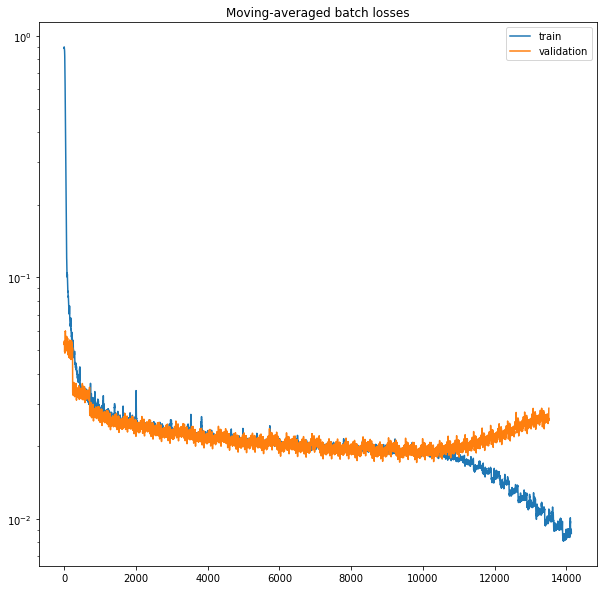

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

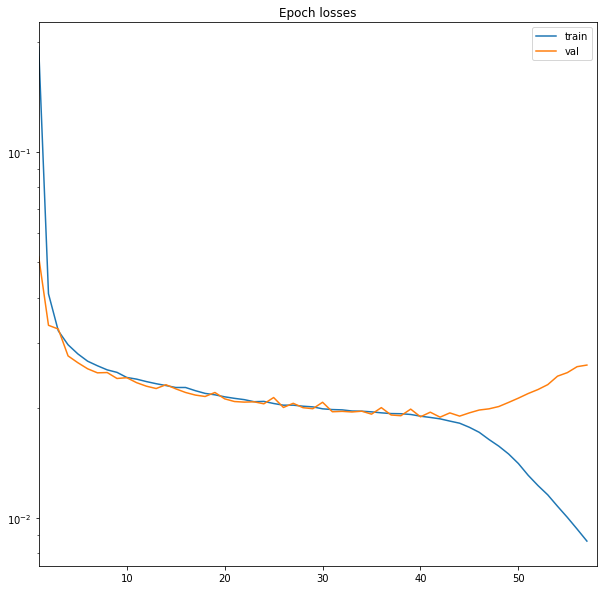

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [26]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


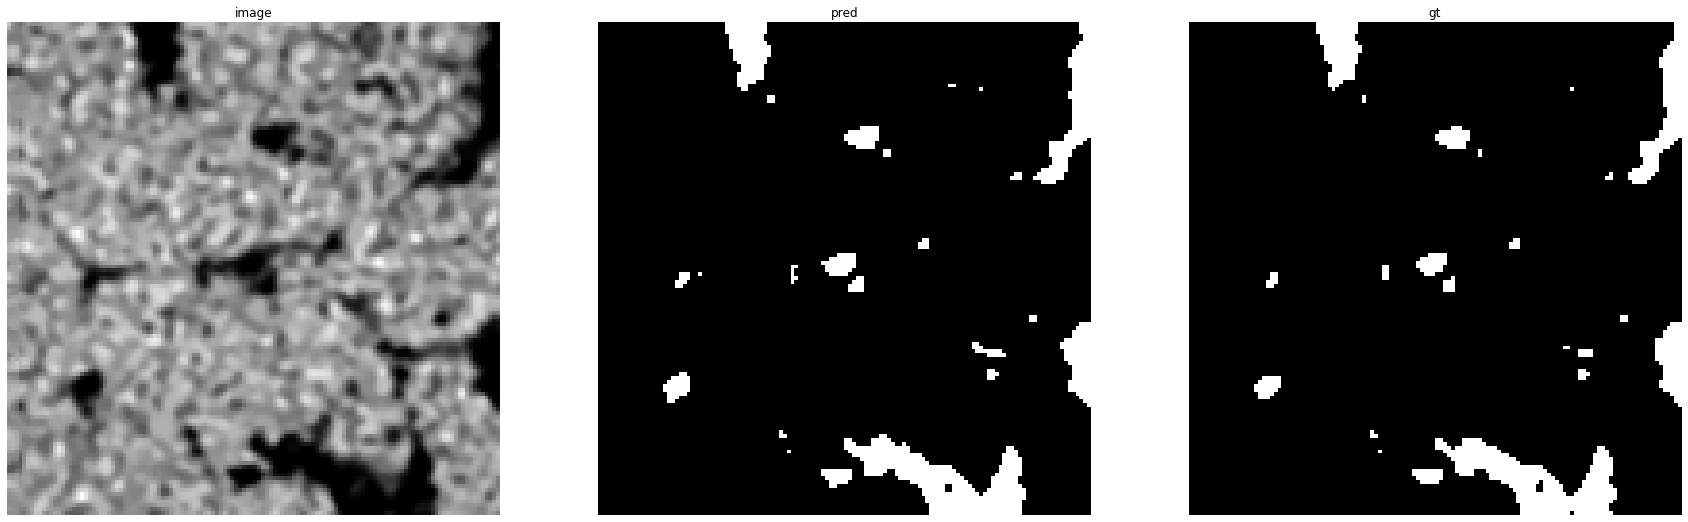

accuracy    : 0.9951171875
precision   : 0.9336778639104221
recall      : 0.9972401103955841
f1          : 0.9644128113879004
pr_auc      : 0.9980252416844166
iou         : 0.9312714776632303


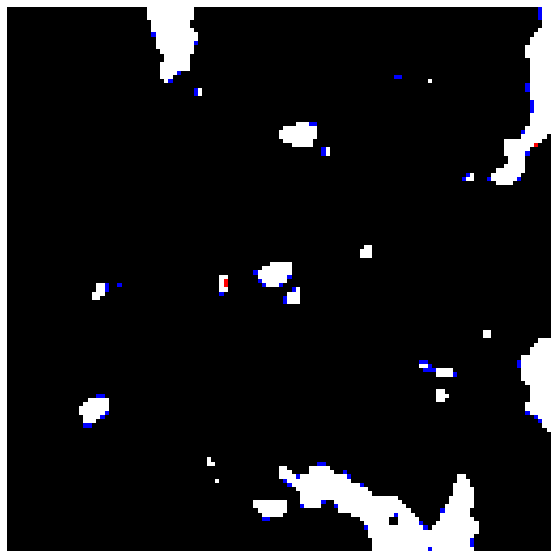

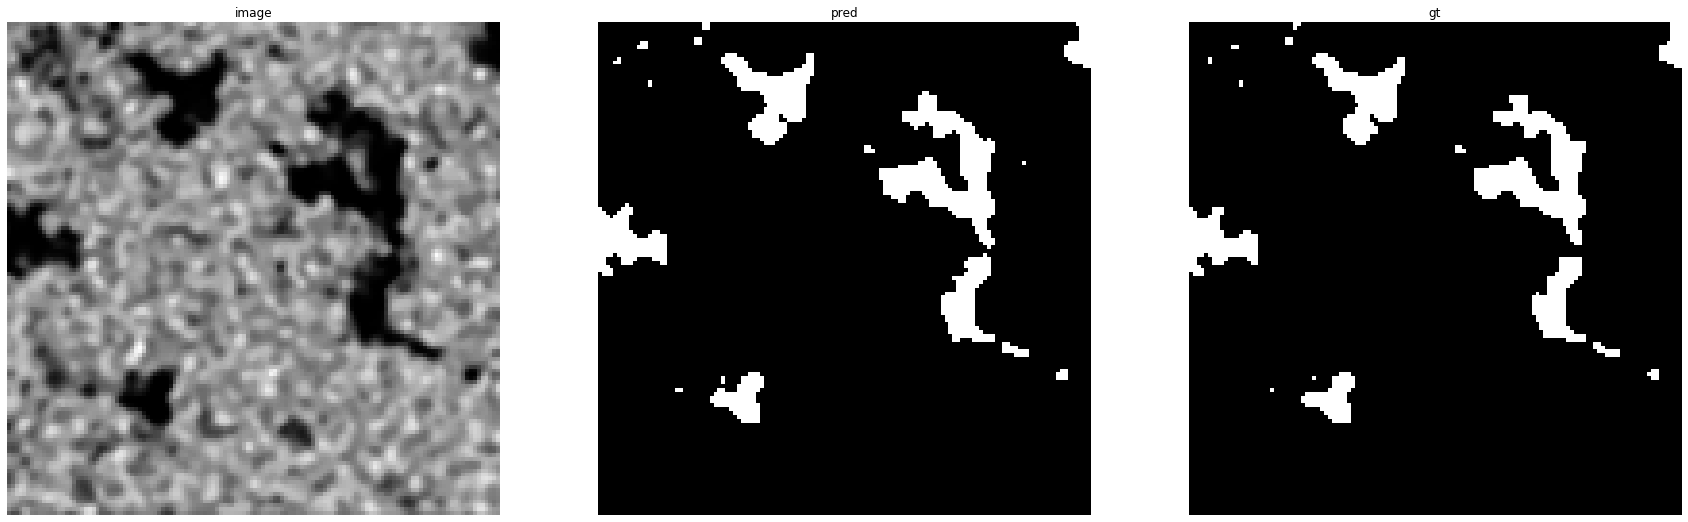

accuracy    : 0.99591064453125
precision   : 0.9486983154670751
recall      : 1.0
f1          : 0.9736738703339883
pr_auc      : 0.998560213661172
iou         : 0.9486983154670751


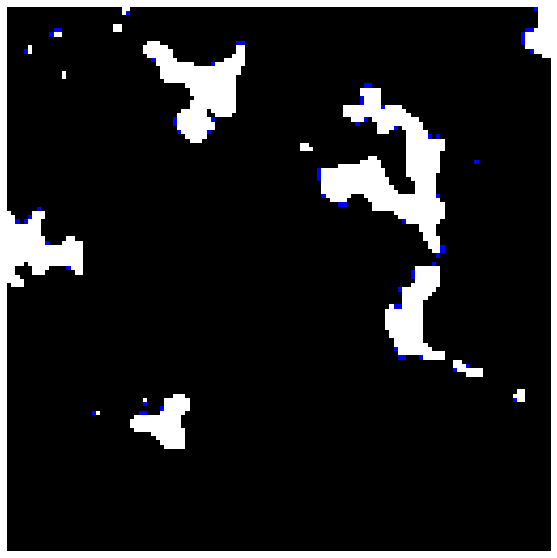

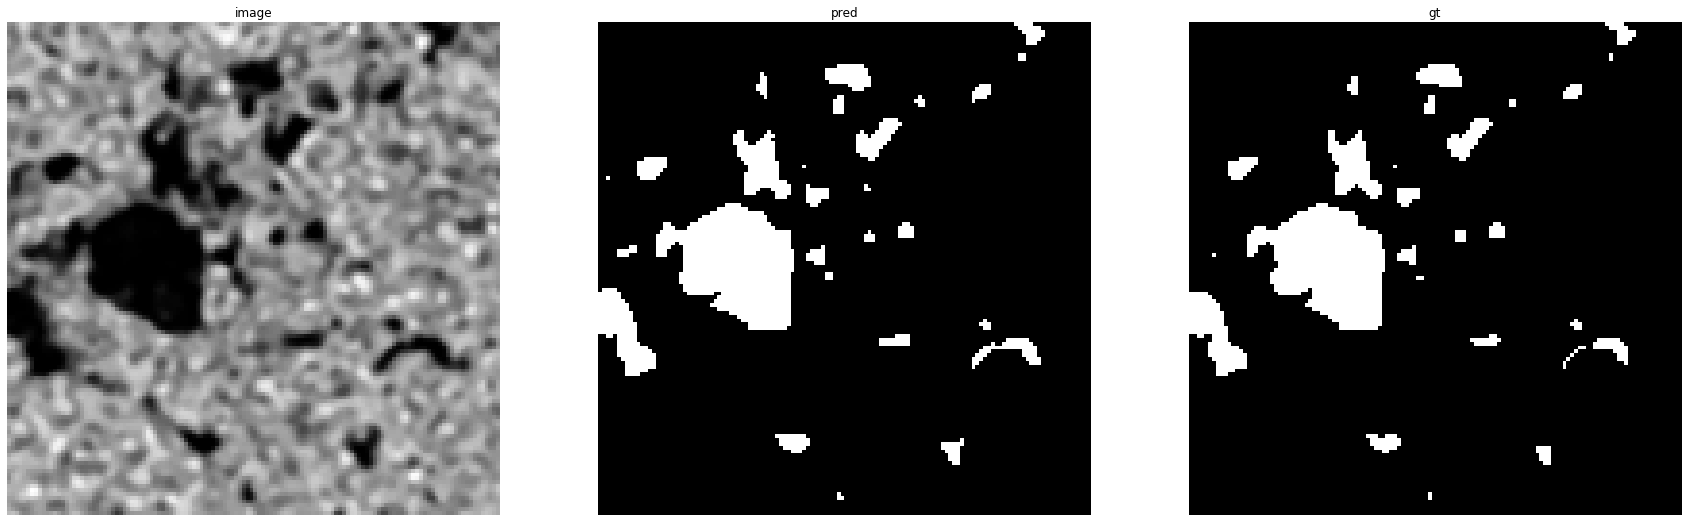

accuracy    : 0.9935302734375
precision   : 0.9343949044585987
recall      : 0.9979591836734694
f1          : 0.9651315789473685
pr_auc      : 0.998031227401819
iou         : 0.9326128417037508


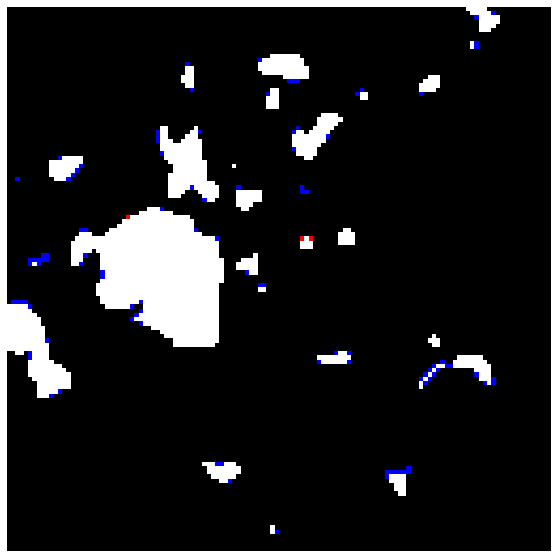

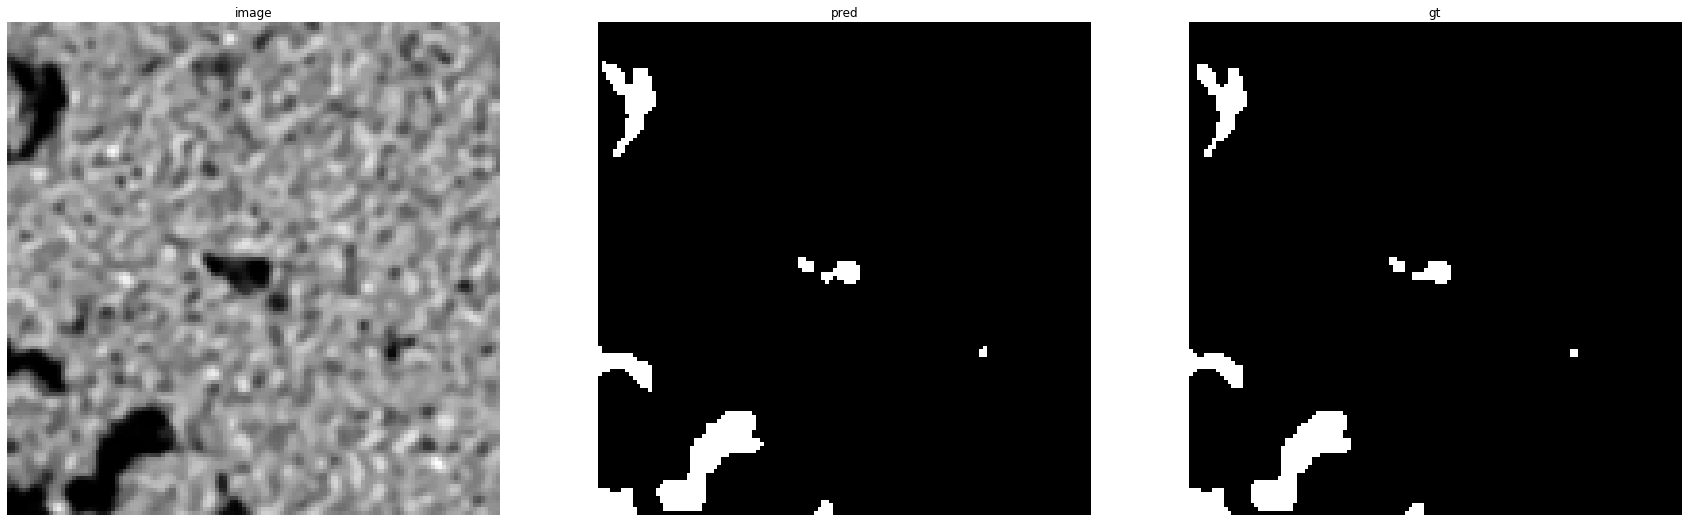

accuracy    : 0.9979248046875
precision   : 0.9523076923076923
recall      : 0.9951768488745981
f1          : 0.9732704402515724
pr_auc      : 0.998490646951514
iou         : 0.9479326186830015


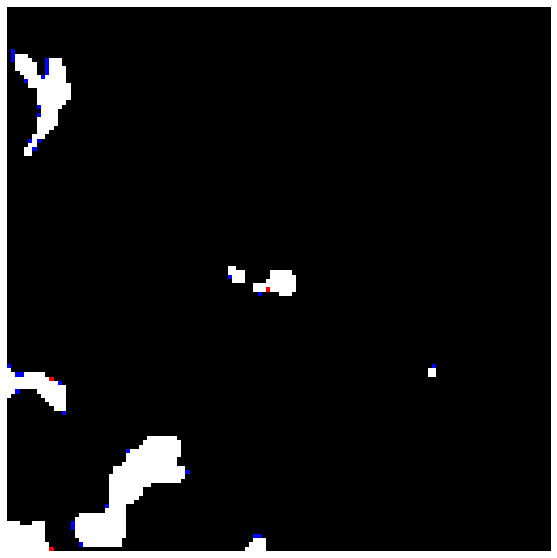

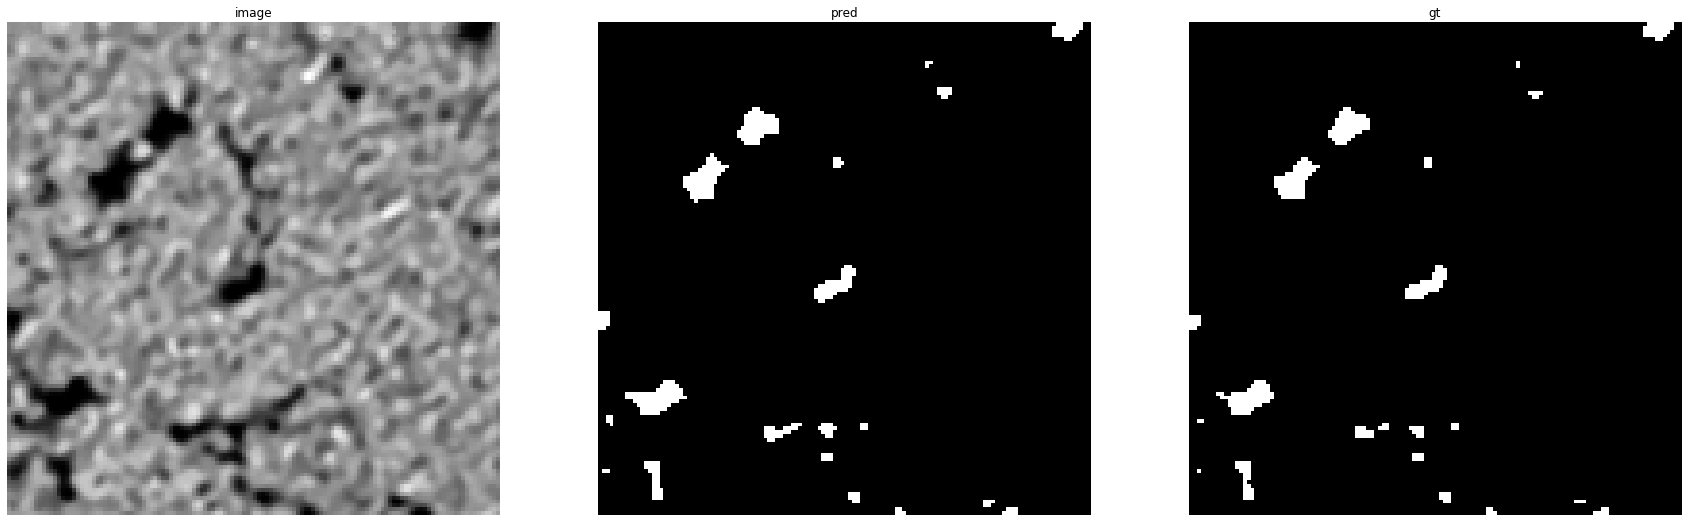

accuracy    : 0.9969482421875
precision   : 0.8923766816143498
recall      : 0.995
f1          : 0.9408983451536643
pr_auc      : 0.9939299566587495
iou         : 0.8883928571428571


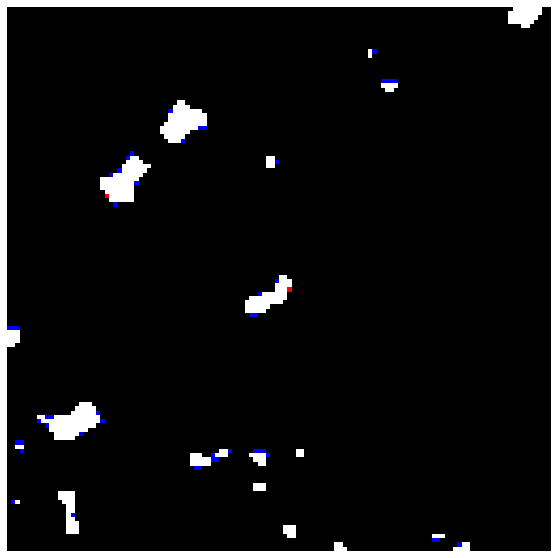

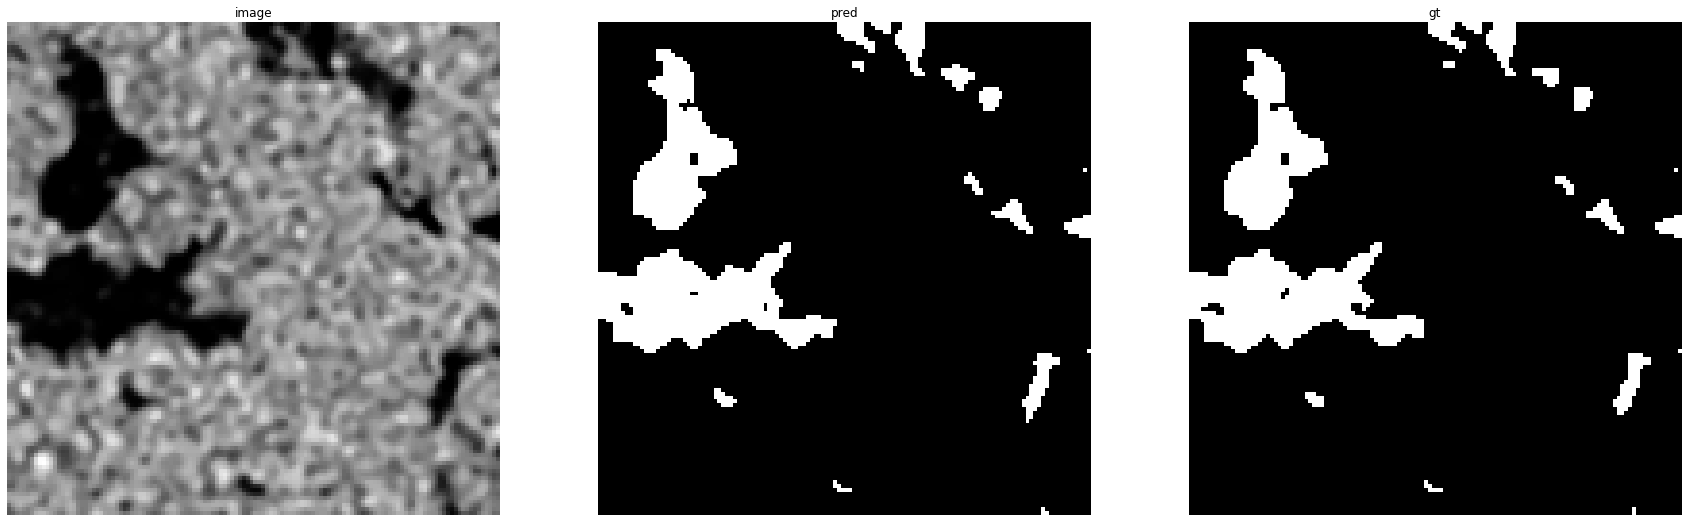

accuracy    : 0.9949951171875
precision   : 0.9590461378952825
recall      : 0.9983810037776578
f1          : 0.9783183500793231
pr_auc      : 0.998971171457163
iou         : 0.9575569358178054


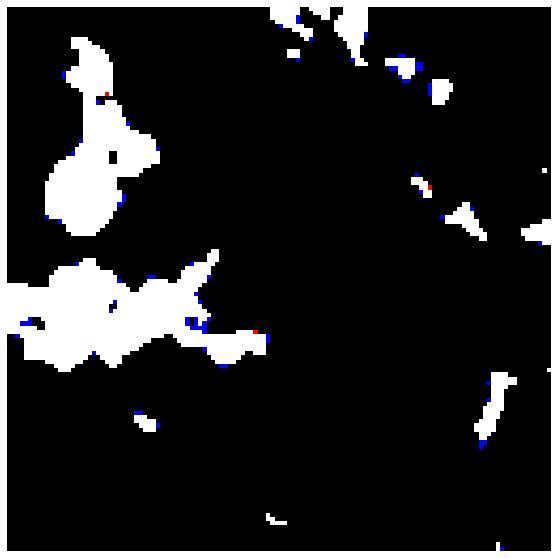

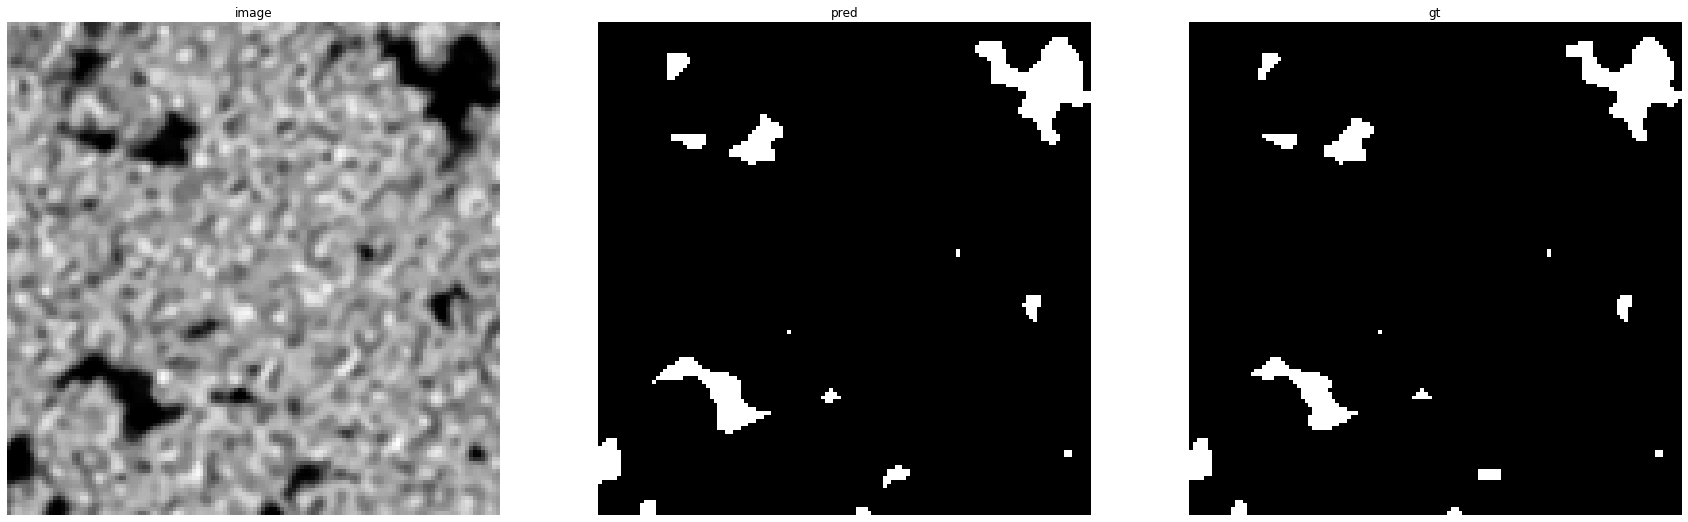

accuracy    : 0.99554443359375
precision   : 0.9166666666666666
recall      : 0.9974457215836526
f1          : 0.9553516819571866
pr_auc      : 0.9977714446850807
iou         : 0.914519906323185


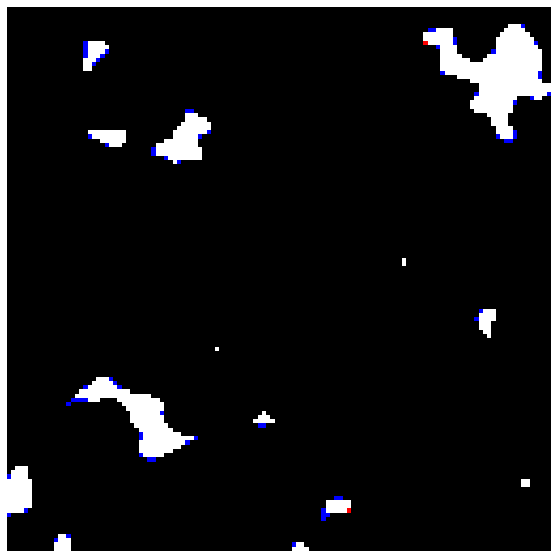

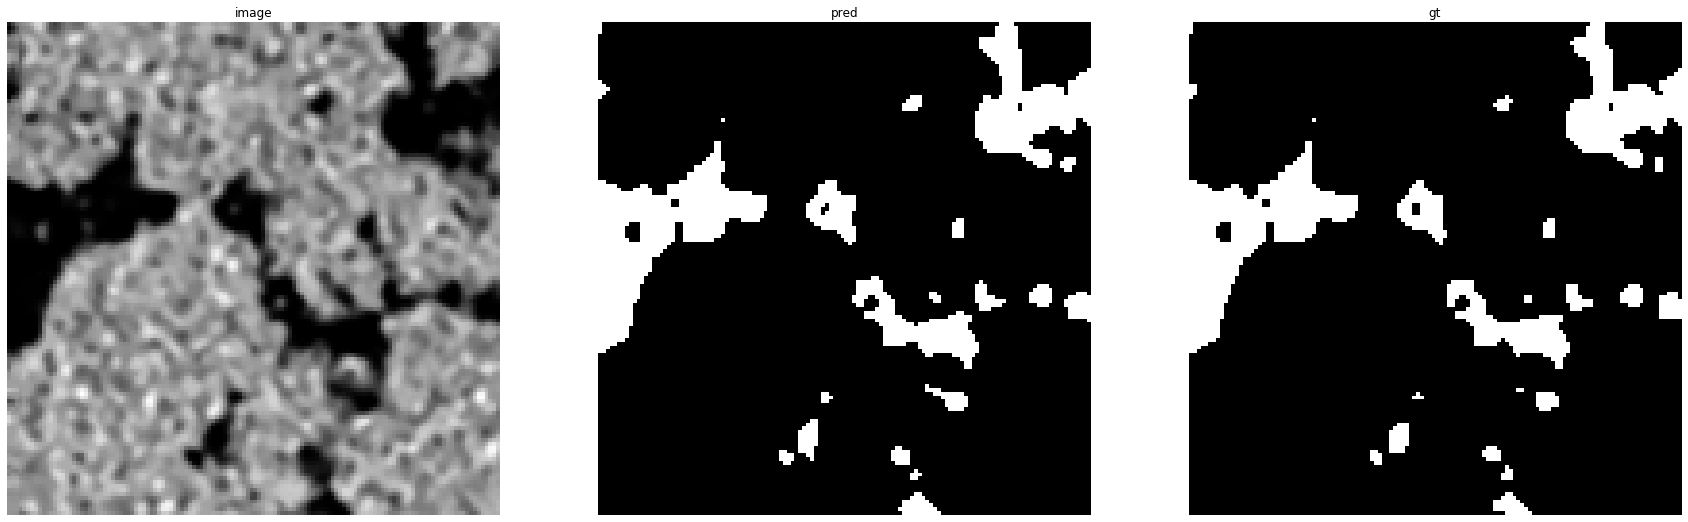

accuracy    : 0.99346923828125
precision   : 0.9541704857928506
recall      : 0.996649114408808
f1          : 0.9749473191290096
pr_auc      : 0.9989256917124287
iou         : 0.9511192325262677


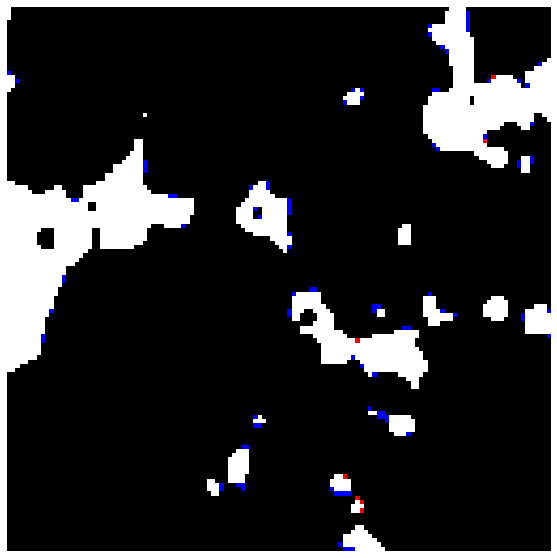

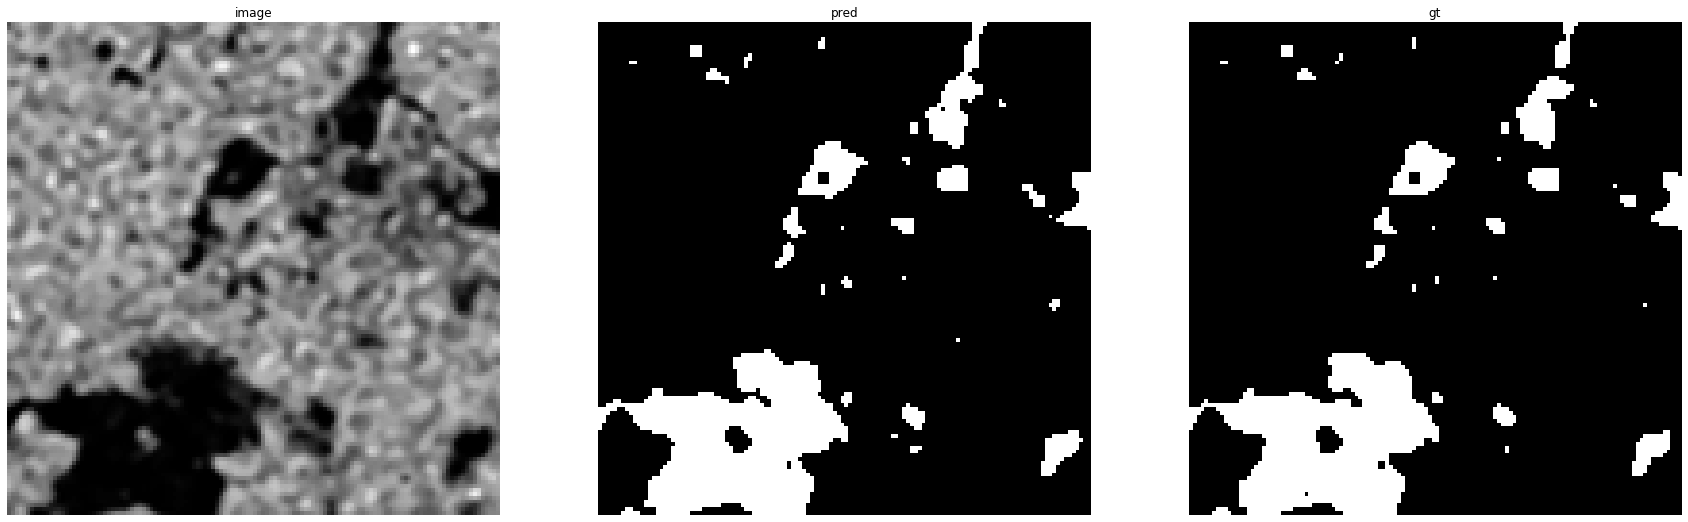

accuracy    : 0.9925537109375
precision   : 0.9515770768547313
recall      : 0.9939675174013921
f1          : 0.9723104857013164
pr_auc      : 0.9984267662461459
iou         : 0.946113074204947


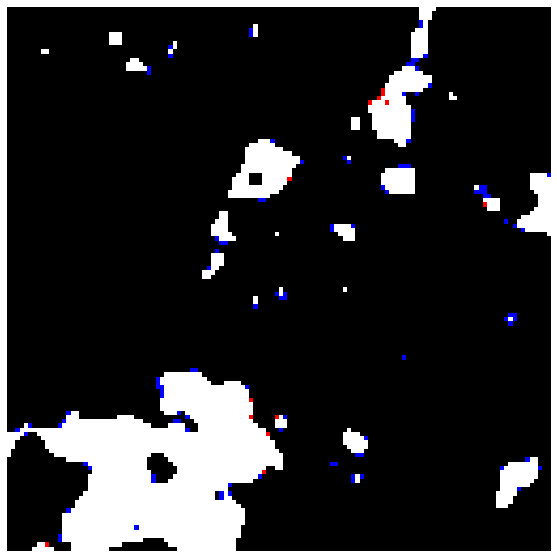

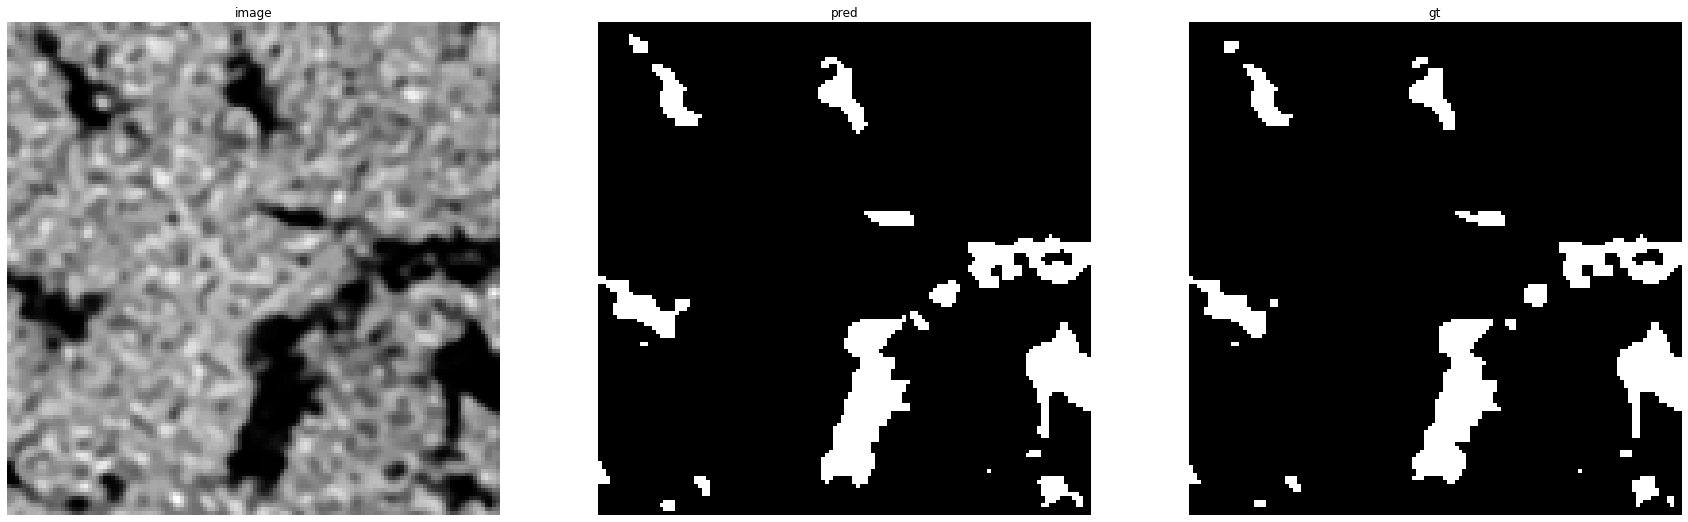

accuracy    : 0.992919921875
precision   : 0.9288389513108615
recall      : 0.9986577181208054
f1          : 0.96248382923674
pr_auc      : 0.9977898026399885
iou         : 0.9276807980049875


Prediction for carb71:


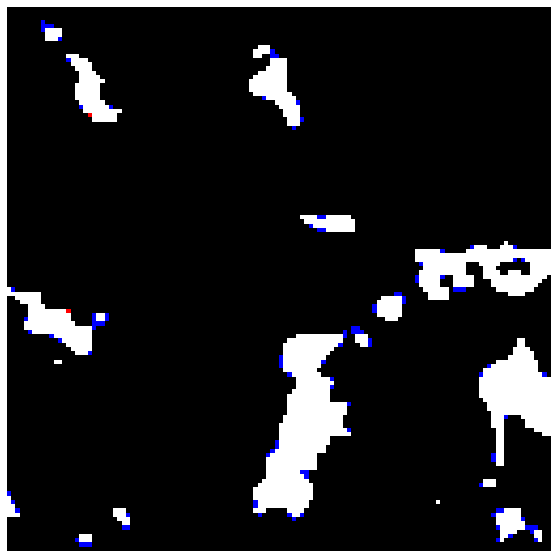

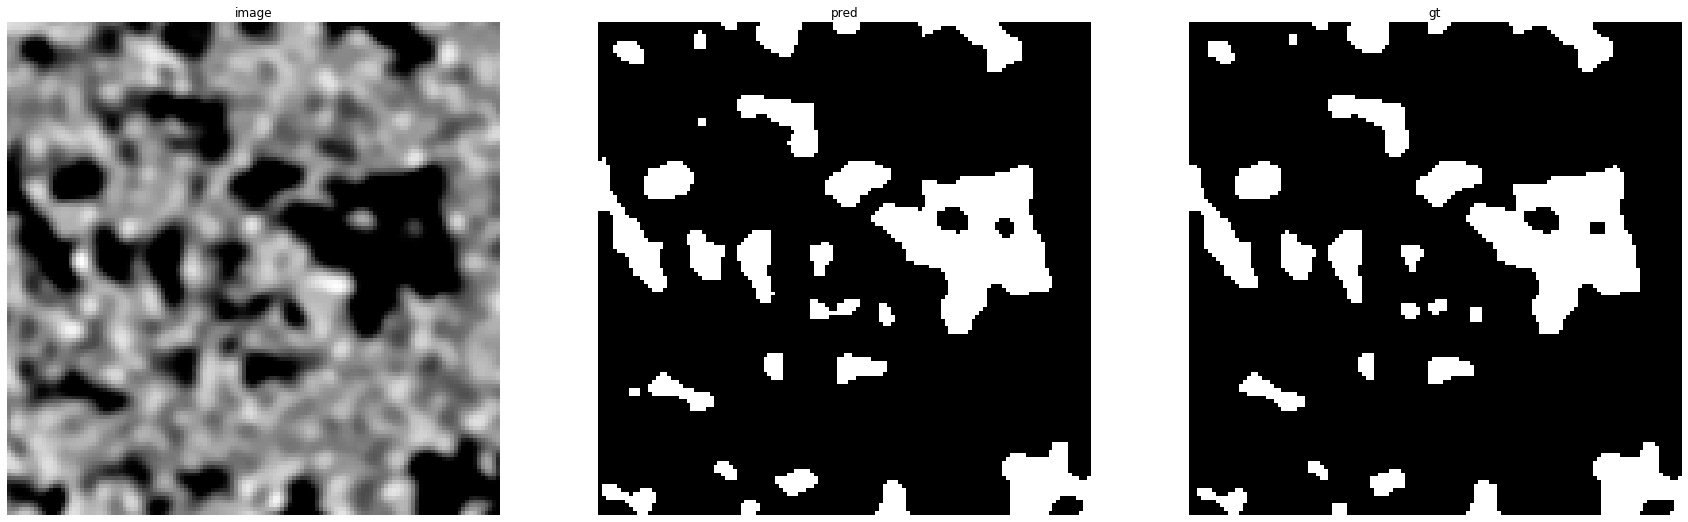

accuracy    : 0.9876708984375
precision   : 0.9410361281526926
recall      : 0.9896057347670251
f1          : 0.9647099930118798
pr_auc      : 0.9952804089352933
iou         : 0.9318258521768478


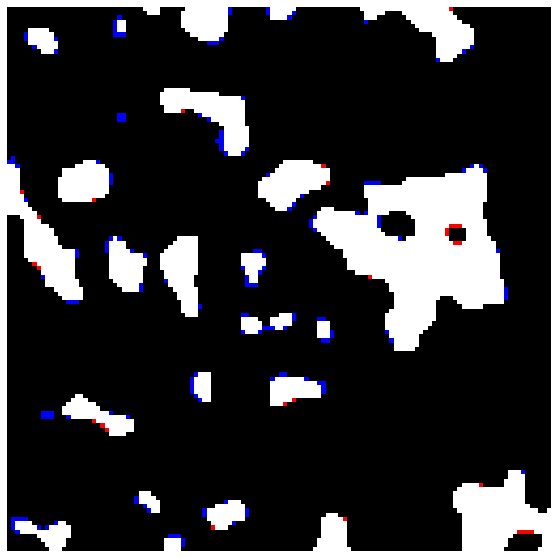

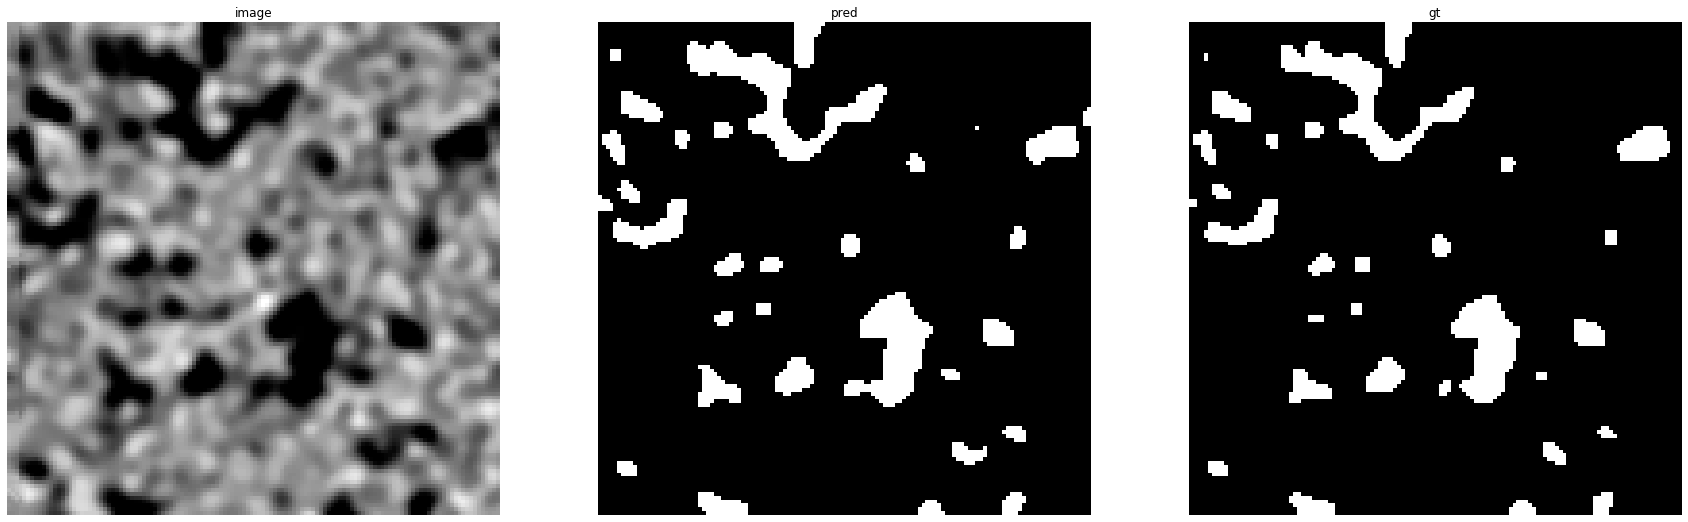

accuracy    : 0.9852294921875
precision   : 0.8739448508722566
recall      : 0.988542329726289
f1          : 0.9277180406212664
pr_auc      : 0.9895166659080973
iou         : 0.8651810584958217


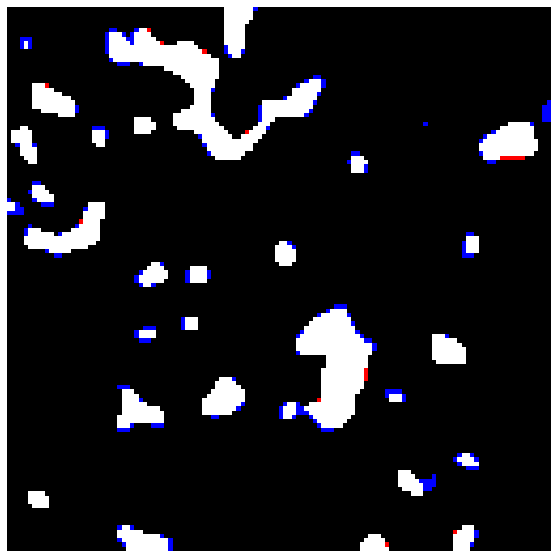

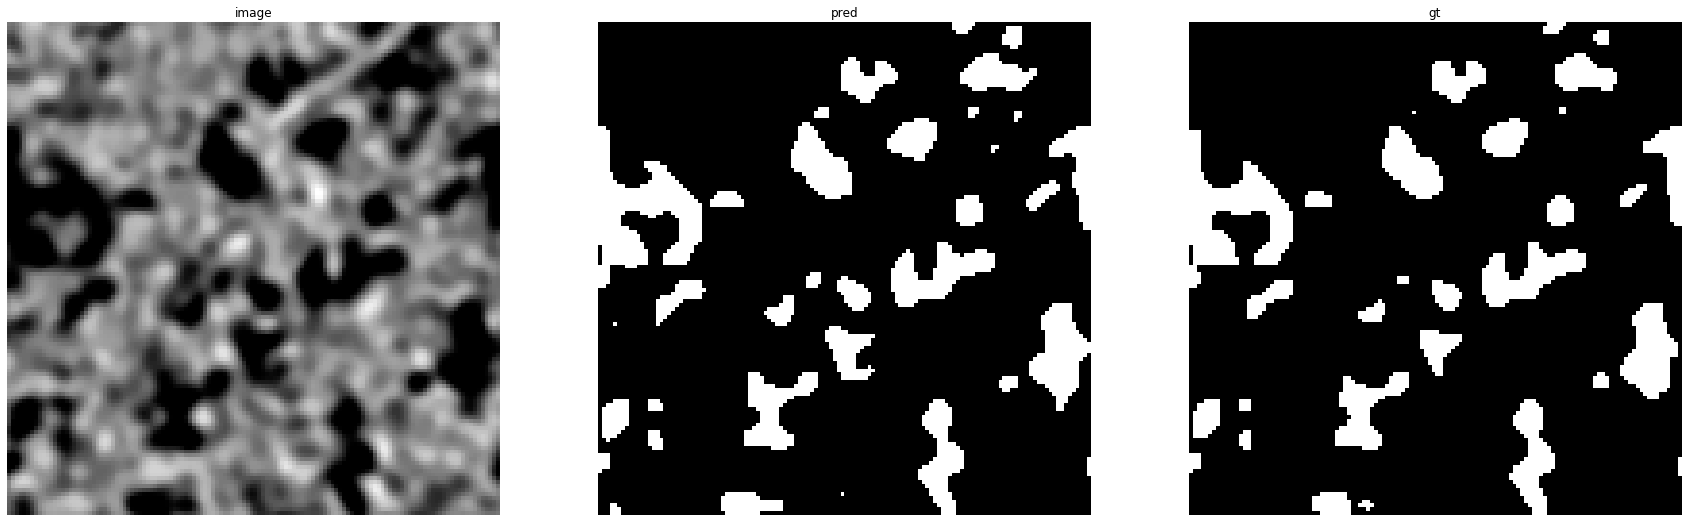

accuracy    : 0.981689453125
precision   : 0.8969607116382505
recall      : 0.990990990990991
f1          : 0.9416342412451362
pr_auc      : 0.98977910673201
iou         : 0.8897058823529411


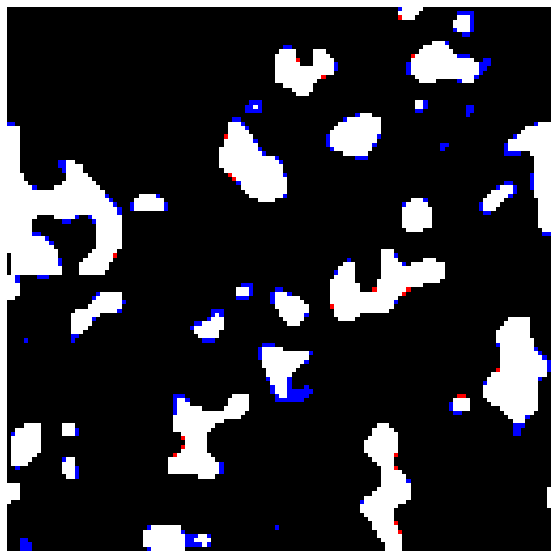

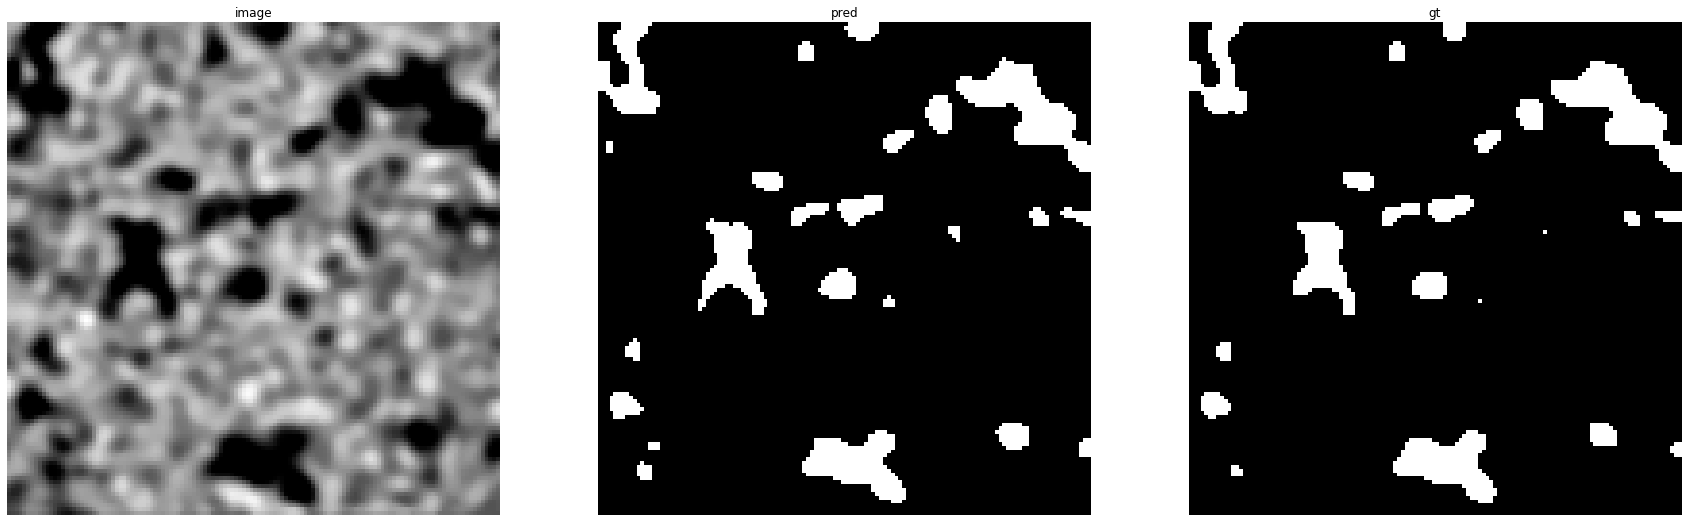

accuracy    : 0.99072265625
precision   : 0.9183046683046683
recall      : 0.987450462351387
f1          : 0.9516231699554423
pr_auc      : 0.9918445610365847
iou         : 0.9077109896782027


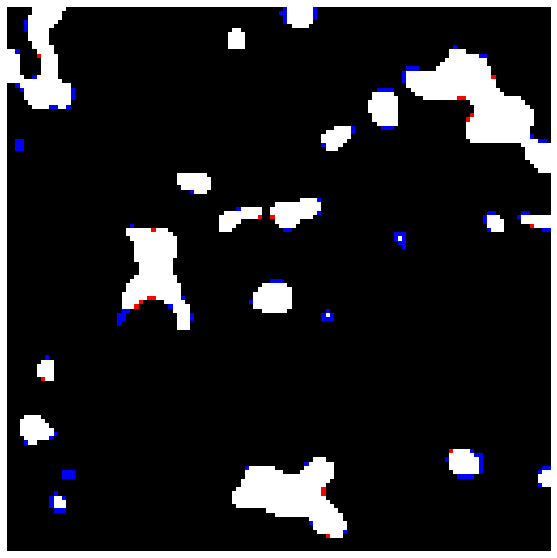

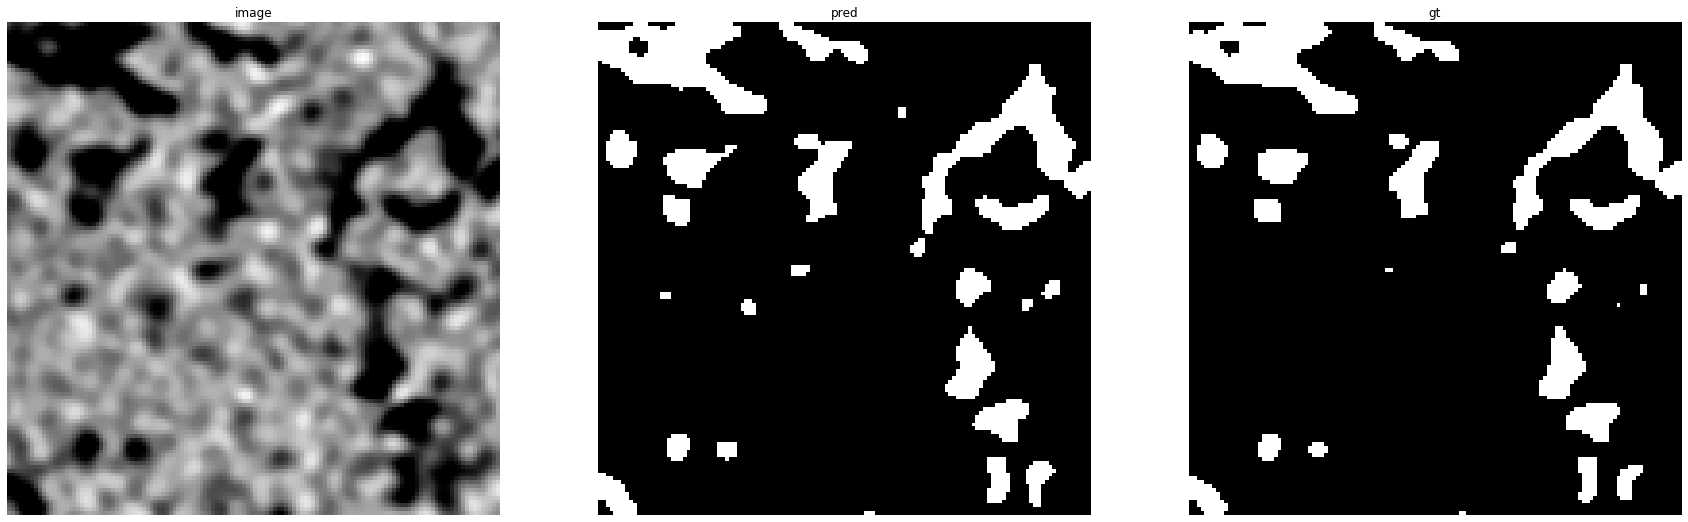

accuracy    : 0.9853515625
precision   : 0.907108591365024
recall      : 0.9871855719031799
f1          : 0.9454545454545455
pr_auc      : 0.9808672060263941
iou         : 0.896551724137931


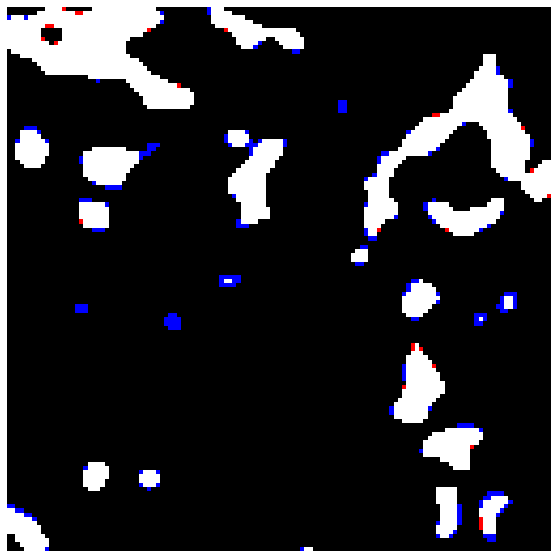

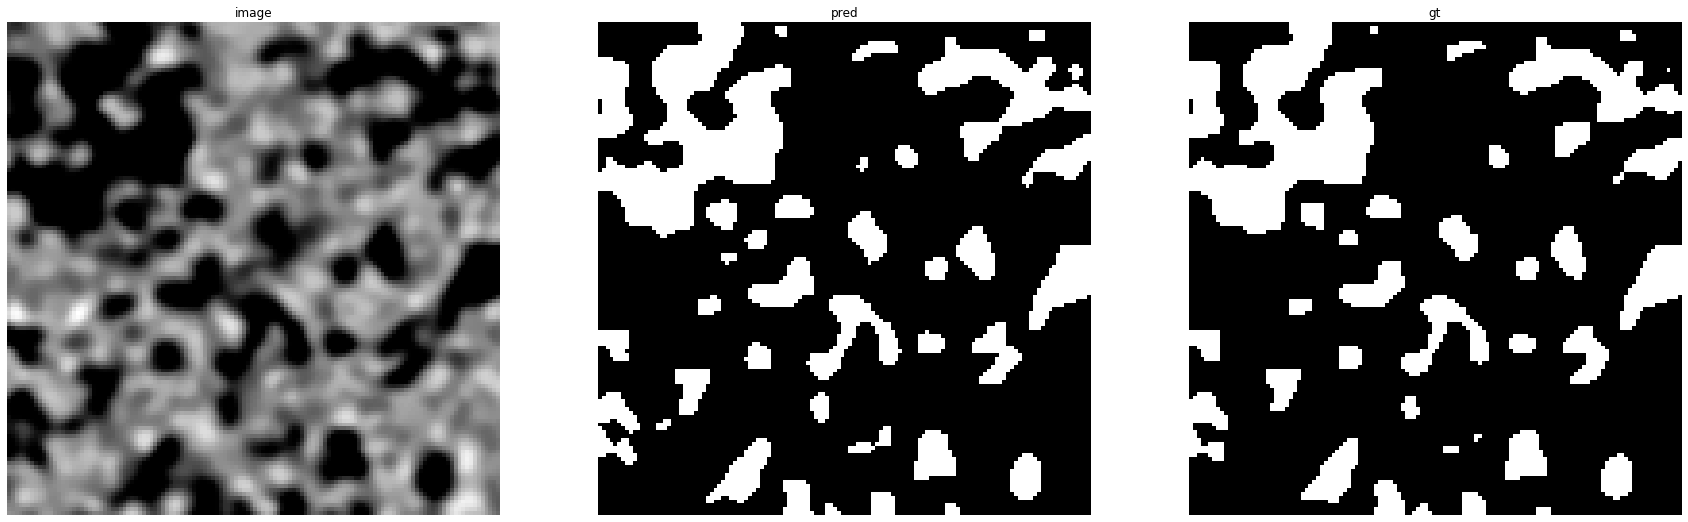

accuracy    : 0.97943115234375
precision   : 0.929740619491312
recall      : 0.9845333333333334
f1          : 0.9563528040409274
pr_auc      : 0.9913341562902653
iou         : 0.9163564159841152


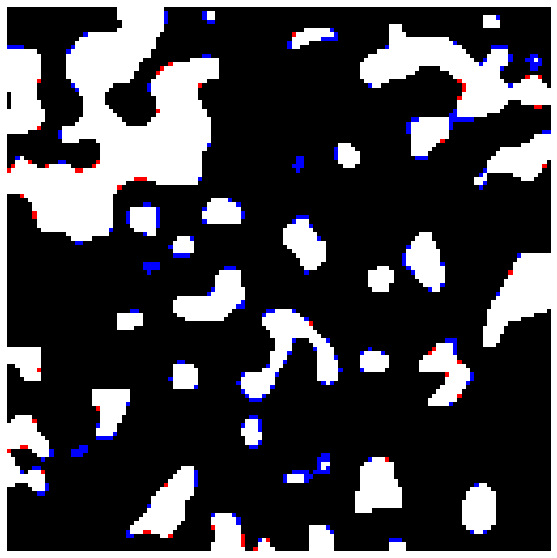

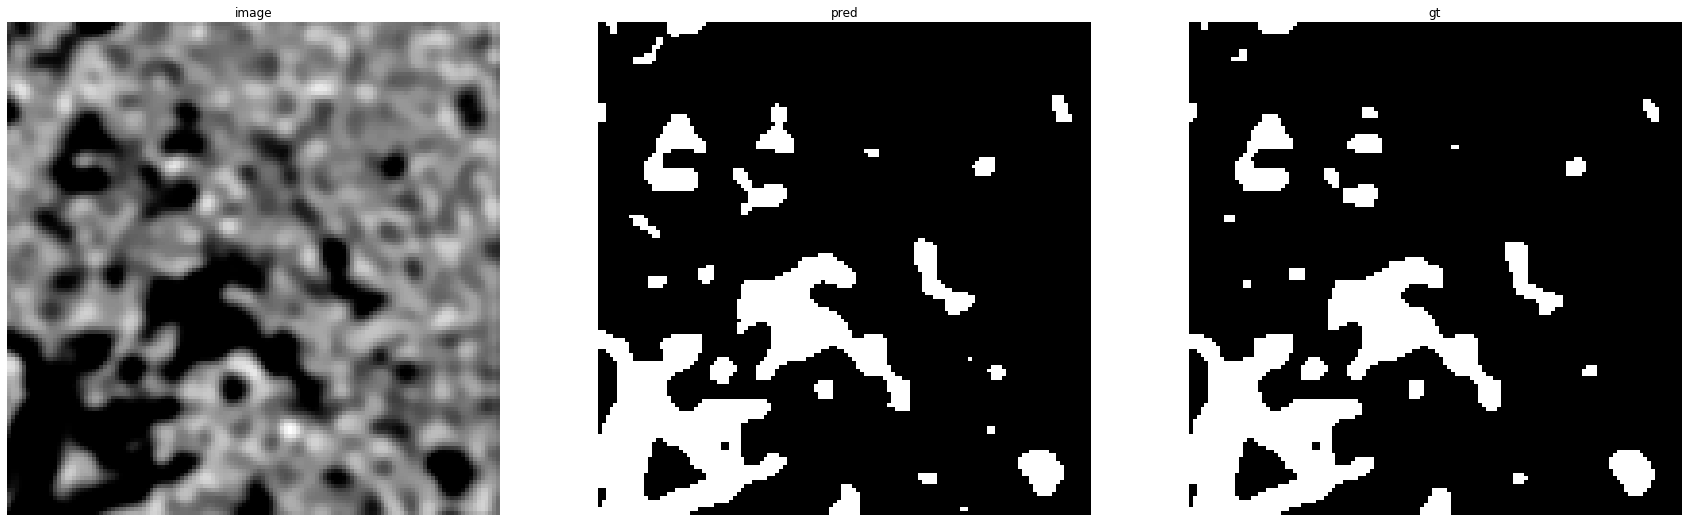

accuracy    : 0.98577880859375
precision   : 0.9295925661186561
recall      : 0.9863481228668942
f1          : 0.9571297148114075
pr_auc      : 0.9945291119551237
iou         : 0.9177840508115738


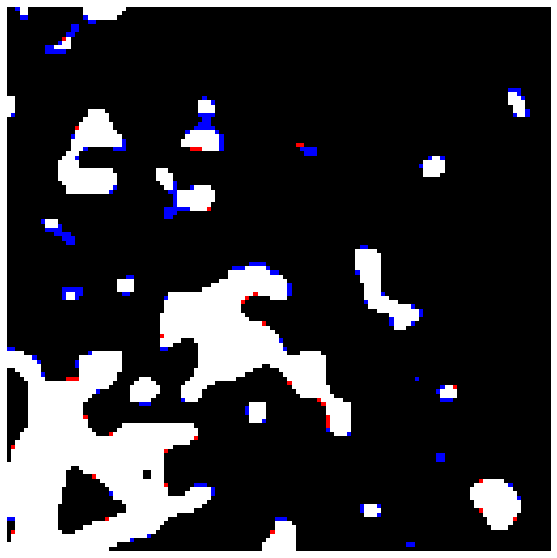

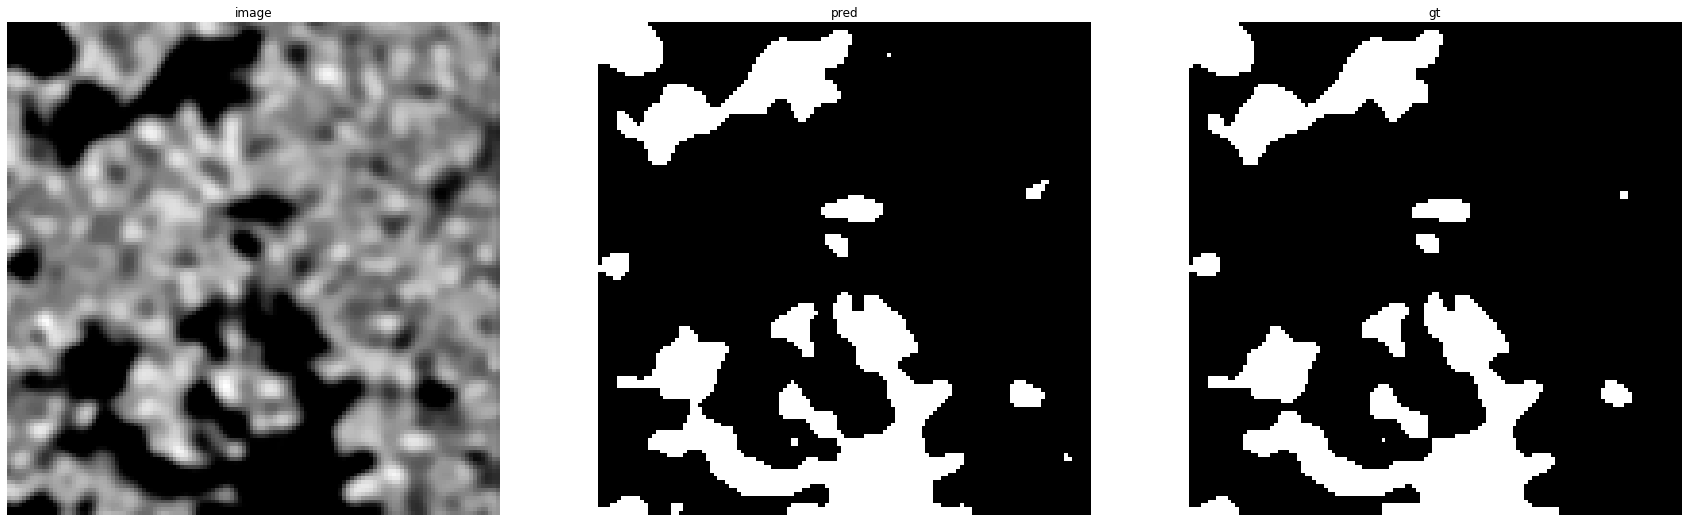

accuracy    : 0.9906005859375
precision   : 0.966789667896679
recall      : 0.9855799373040752
f1          : 0.9760943806271344
pr_auc      : 0.9945916964106863
iou         : 0.9533050333535477


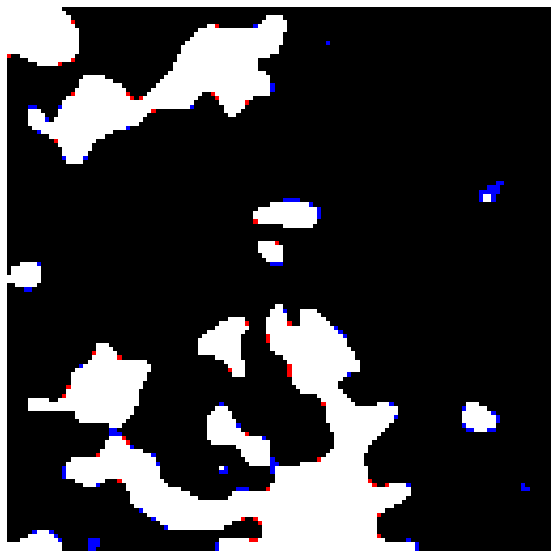

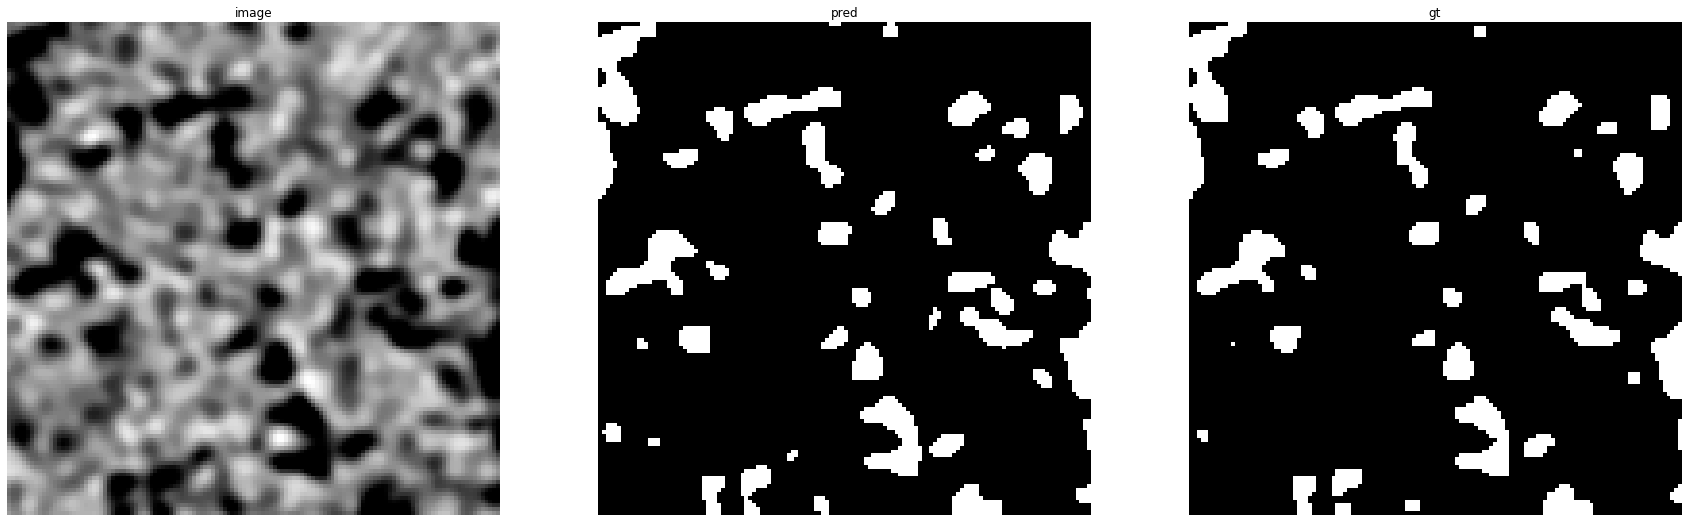

accuracy    : 0.983154296875
precision   : 0.8847549909255898
recall      : 0.9888438133874239
f1          : 0.9339080459770114
pr_auc      : 0.983412881466755
iou         : 0.876010781671159


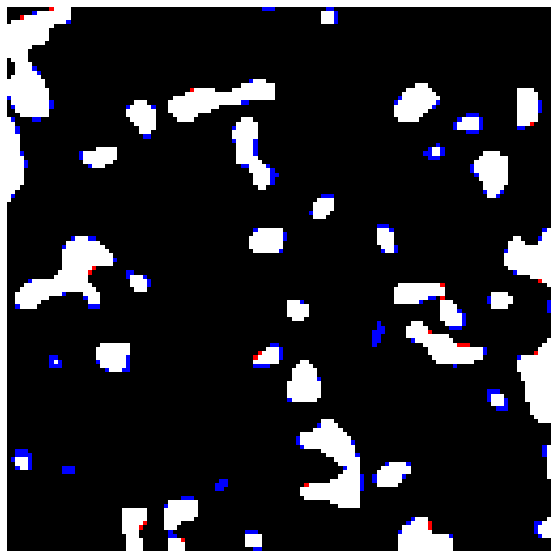

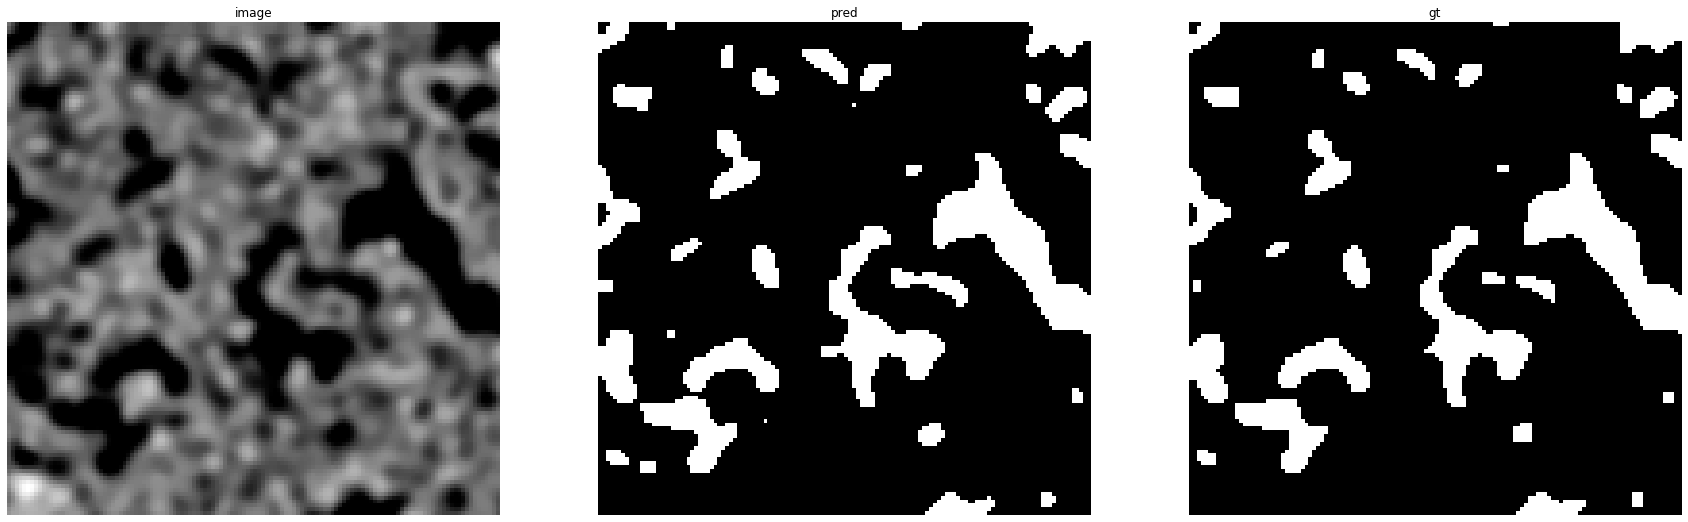

accuracy    : 0.9825439453125
precision   : 0.9050036258158085
recall      : 0.9904761904761905
f1          : 0.9458128078817735
pr_auc      : 0.9905337265555371
iou         : 0.897196261682243


Prediction for carbRNF:


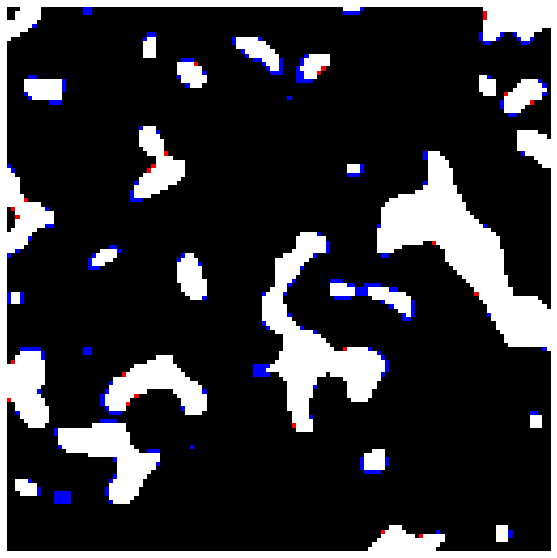

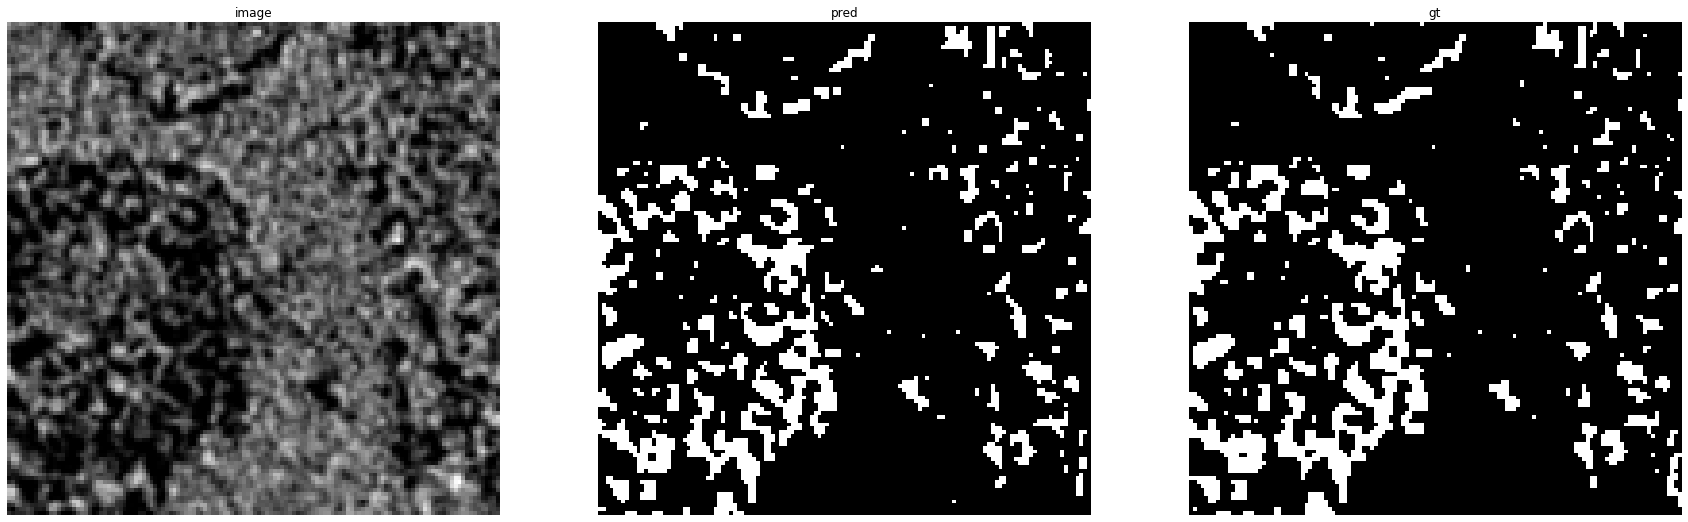

accuracy    : 0.97637939453125
precision   : 0.9525395503746877
recall      : 0.8934010152284264
f1          : 0.922022969977836
pr_auc      : 0.9863014848632744
iou         : 0.8553271028037384


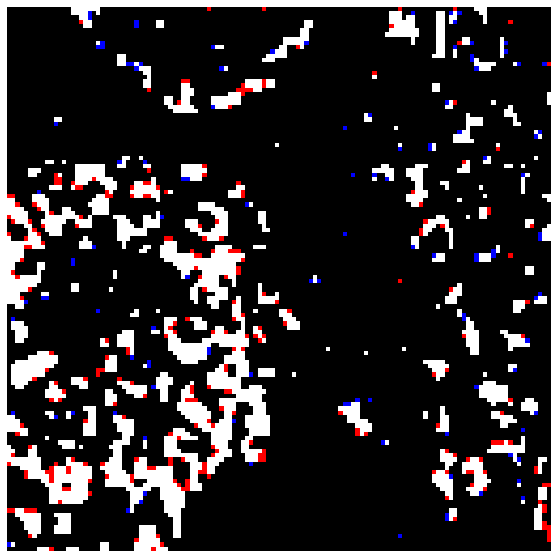

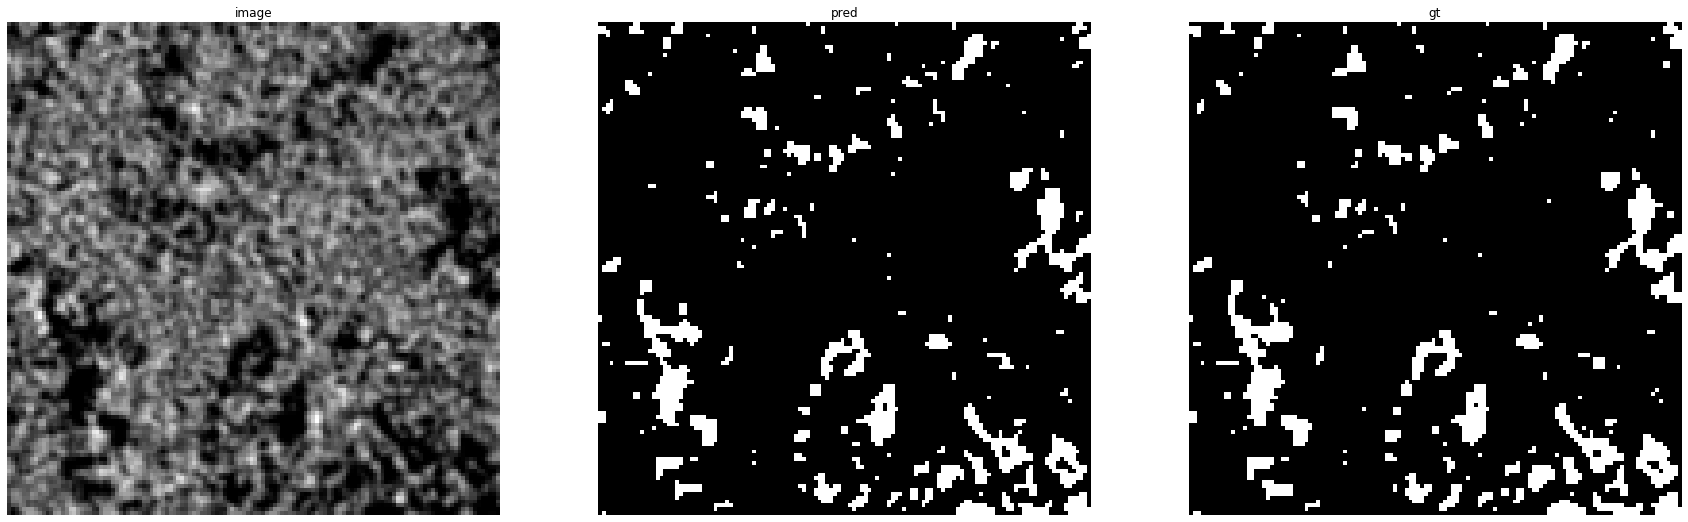

accuracy    : 0.9866943359375
precision   : 0.9602237414543194
recall      : 0.909358446144791
f1          : 0.93409915356711
pr_auc      : 0.9892641325257021
iou         : 0.8763471355643789


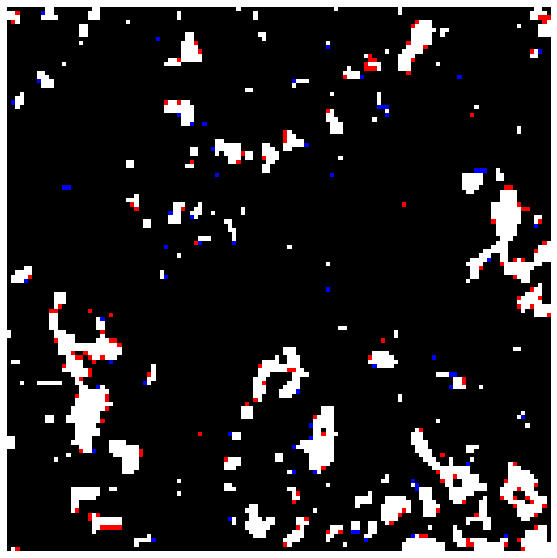

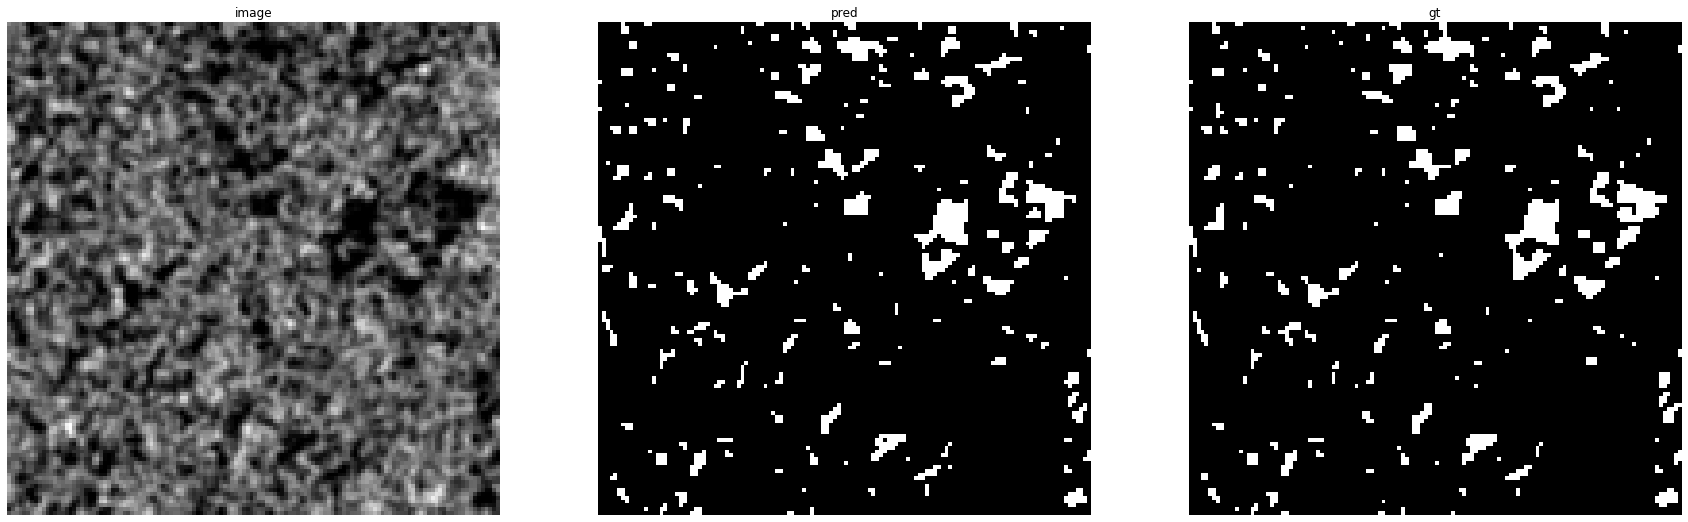

accuracy    : 0.98876953125
precision   : 0.9361179361179361
recall      : 0.9151321056845476
f1          : 0.9255060728744939
pr_auc      : 0.9809673003701046
iou         : 0.8613413715146948


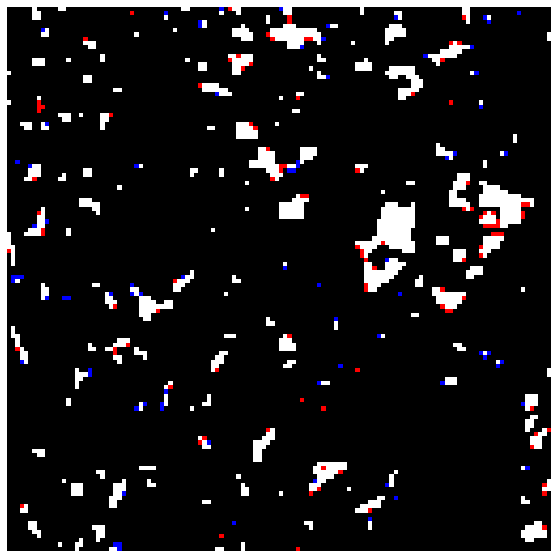

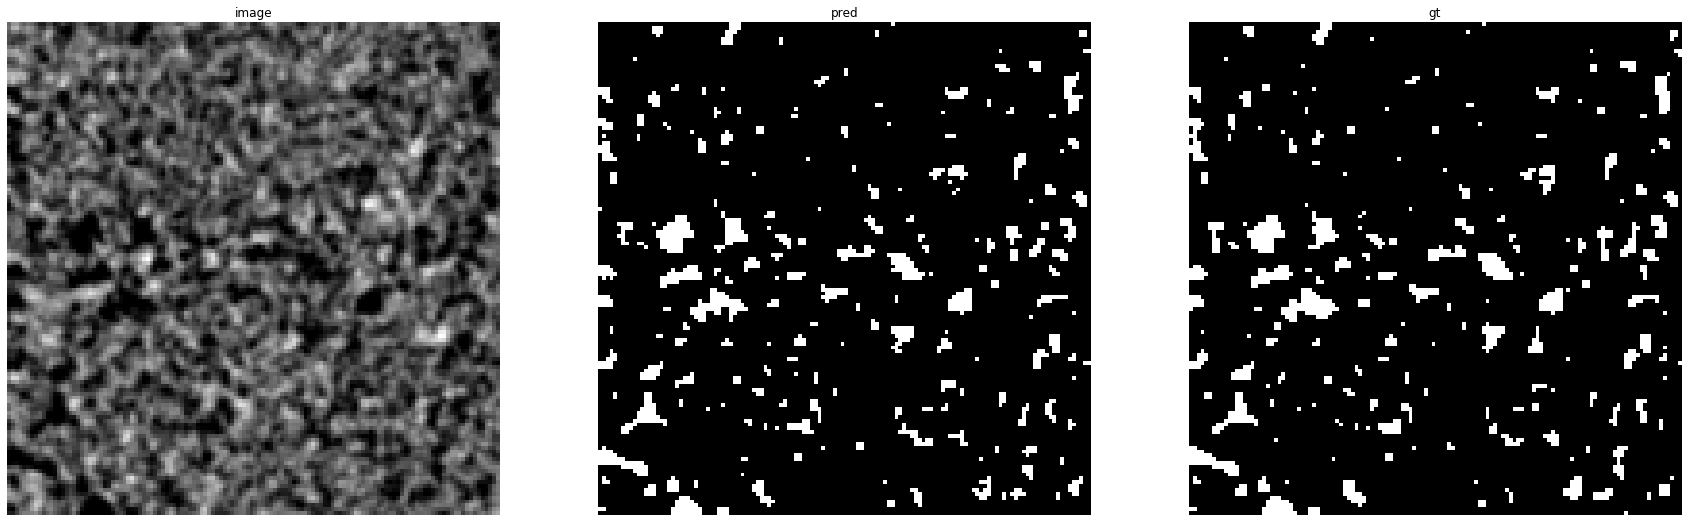

accuracy    : 0.9844970703125
precision   : 0.9157427937915743
recall      : 0.8984771573604061
f1          : 0.9070278184480235
pr_auc      : 0.9761453915623043
iou         : 0.8298727394507702


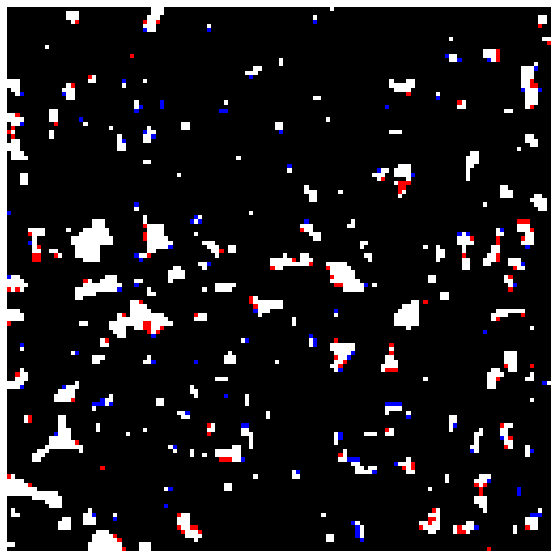

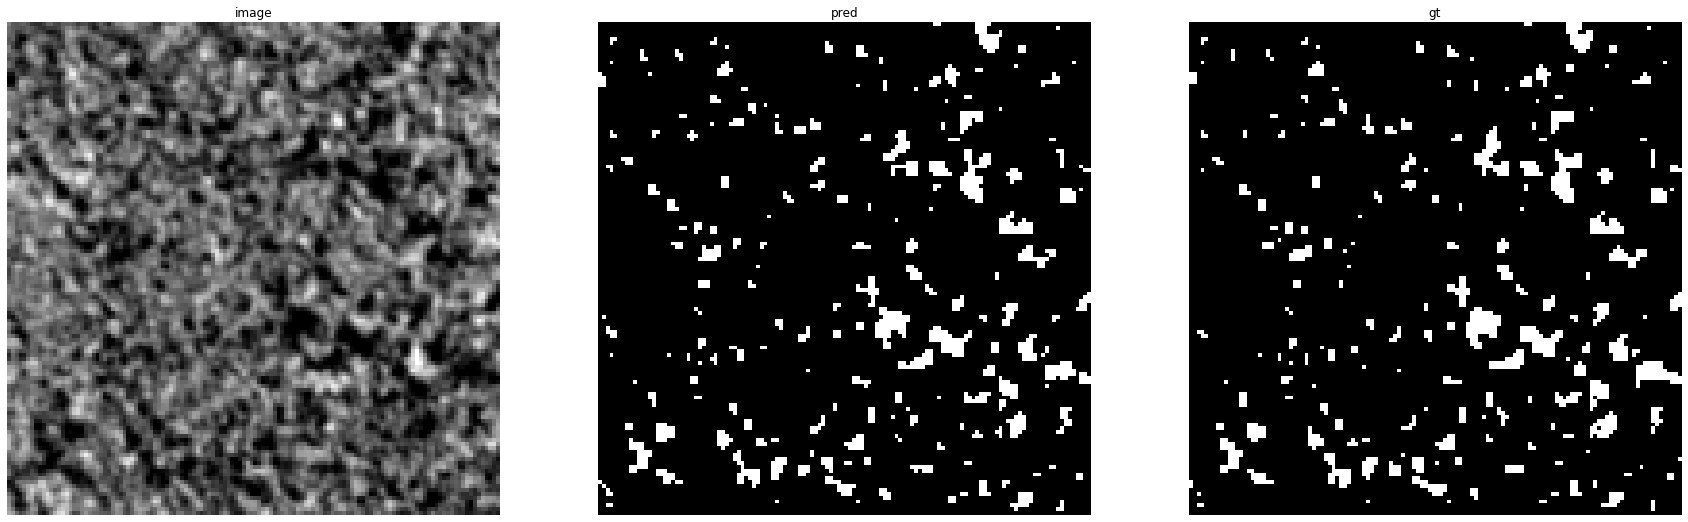

accuracy    : 0.98602294921875
precision   : 0.9279279279279279
recall      : 0.9028487947406866
f1          : 0.915216586449463
pr_auc      : 0.9810692621221682
iou         : 0.8436860068259385


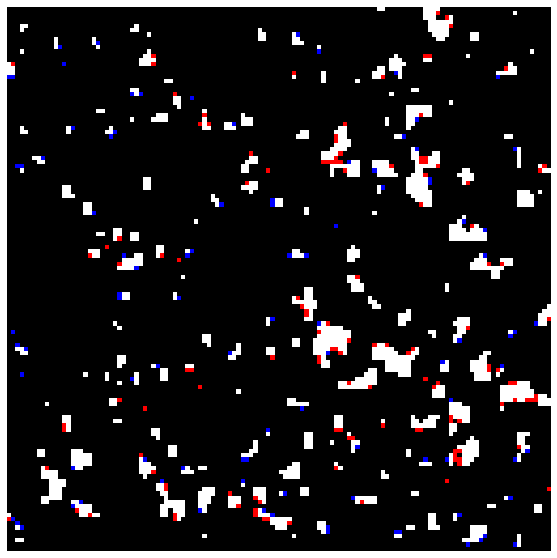

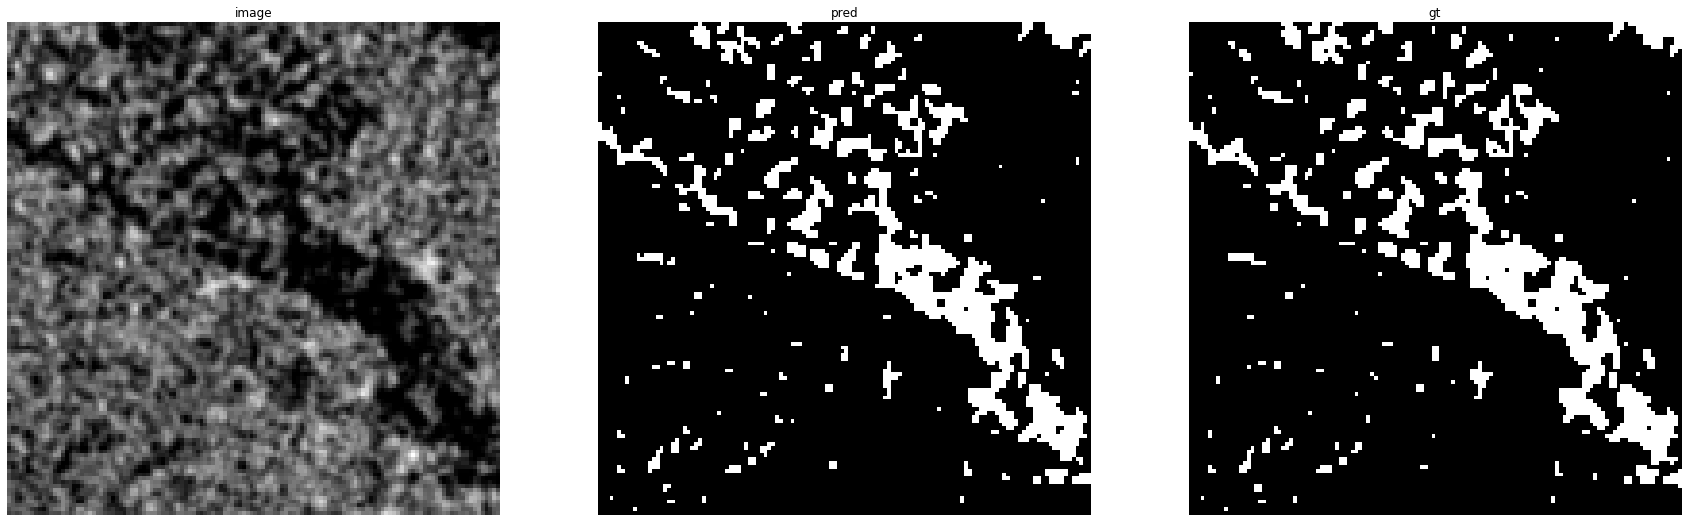

accuracy    : 0.982666015625
precision   : 0.9675904180366369
recall      : 0.9054945054945055
f1          : 0.9355131698455948
pr_auc      : 0.9900311267678651
iou         : 0.878839590443686


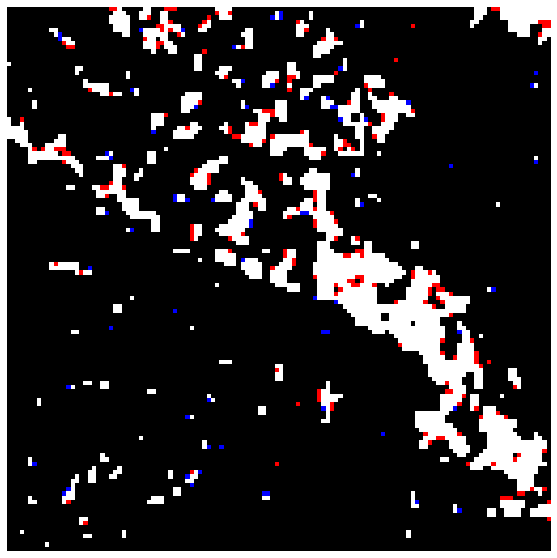

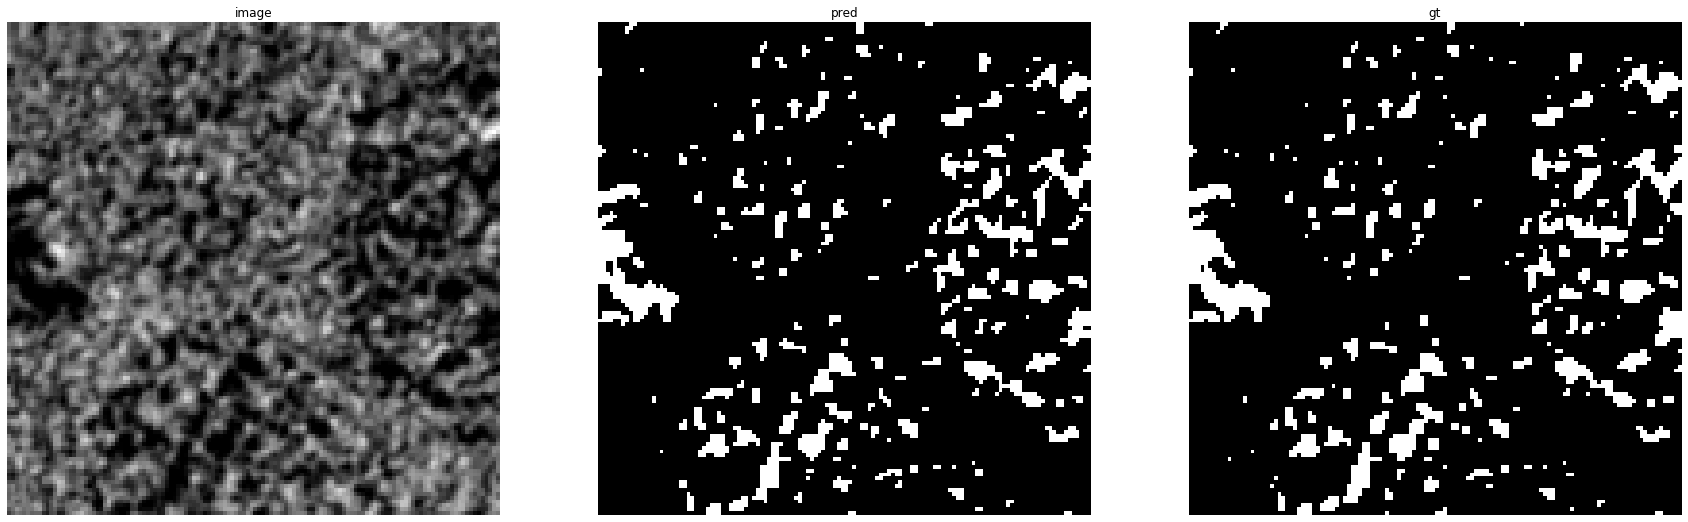

accuracy    : 0.9840087890625
precision   : 0.9518773135906927
recall      : 0.91324200913242
f1          : 0.9321595028482652
pr_auc      : 0.9858811186773256
iou         : 0.8729388942774006


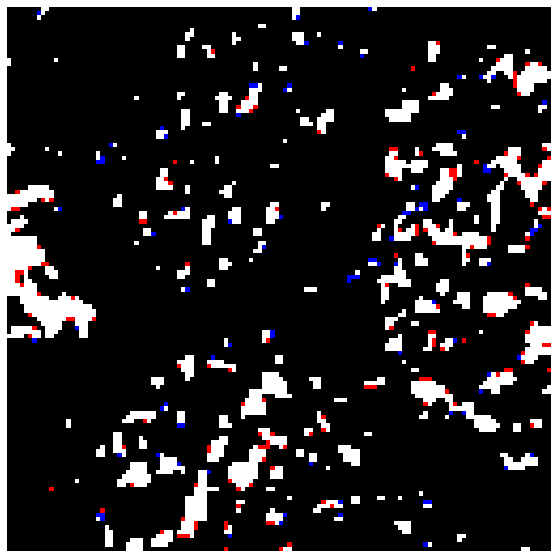

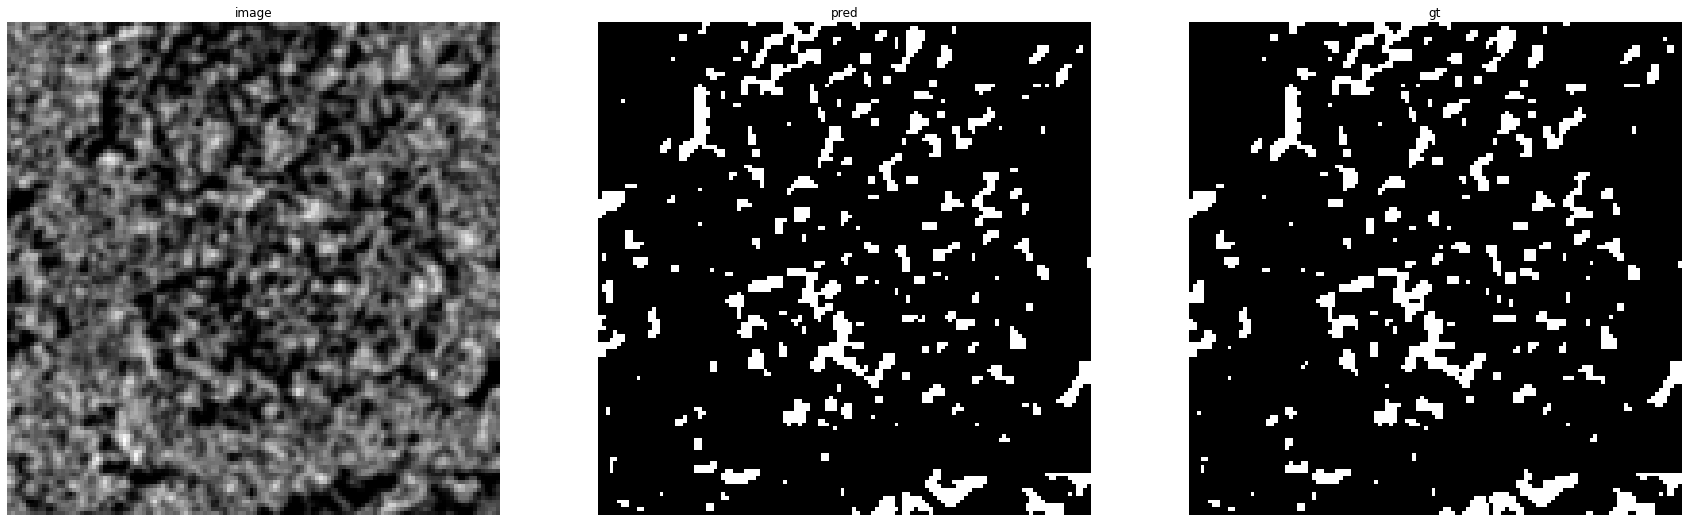

accuracy    : 0.98199462890625
precision   : 0.9399574920297555
recall      : 0.9067145053818555
f1          : 0.9230367858074615
pr_auc      : 0.9828626549531846
iou         : 0.8570736434108527


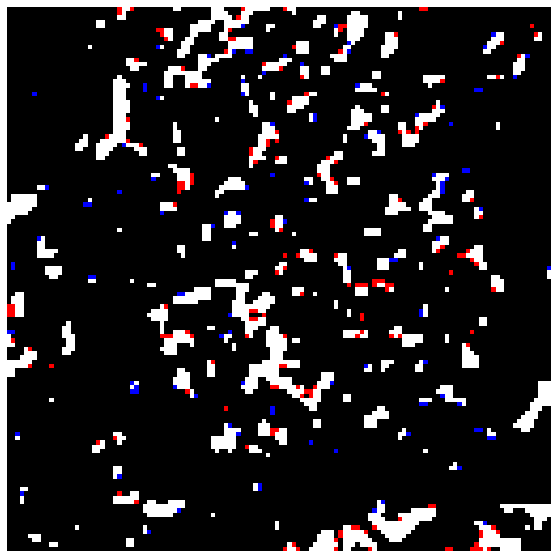

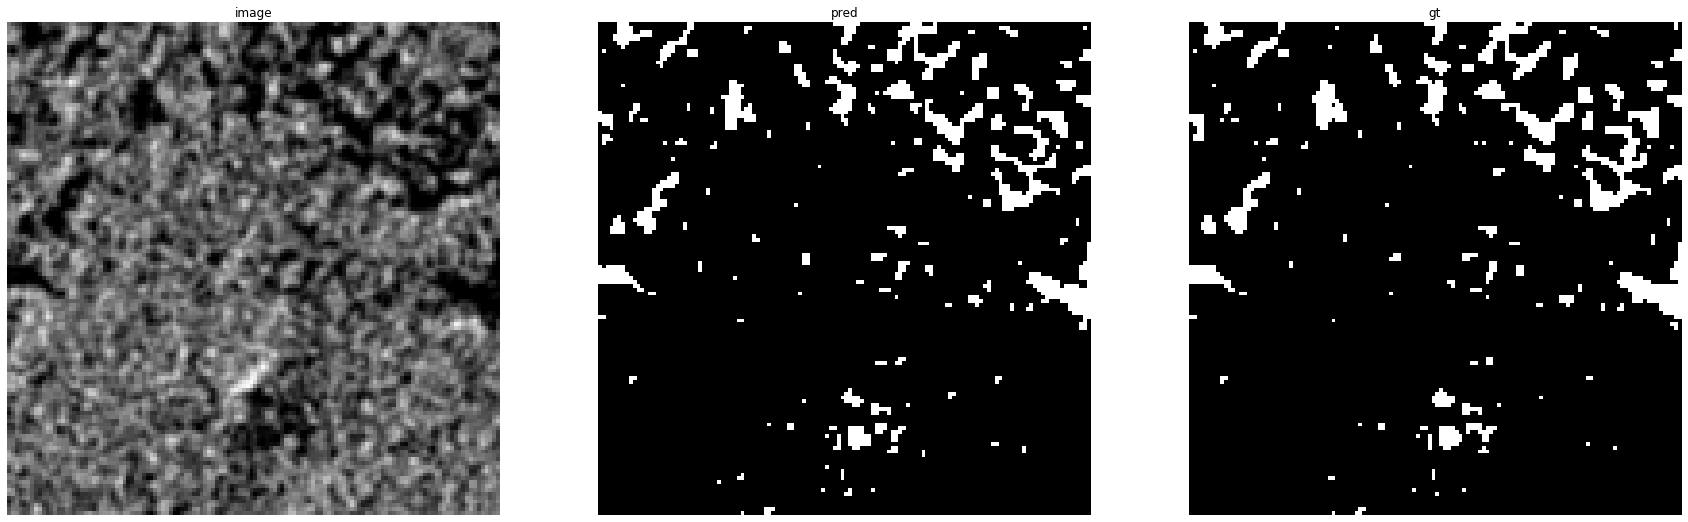

accuracy    : 0.9879150390625
precision   : 0.9447900466562986
recall      : 0.9053651266766021
f1          : 0.9246575342465754
pr_auc      : 0.9852568793158072
iou         : 0.8598726114649682


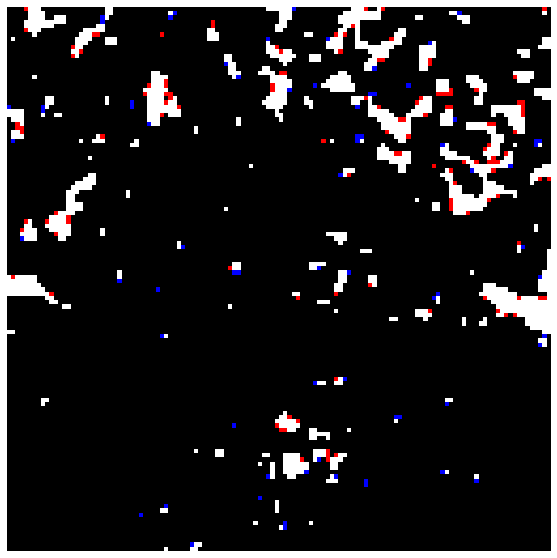

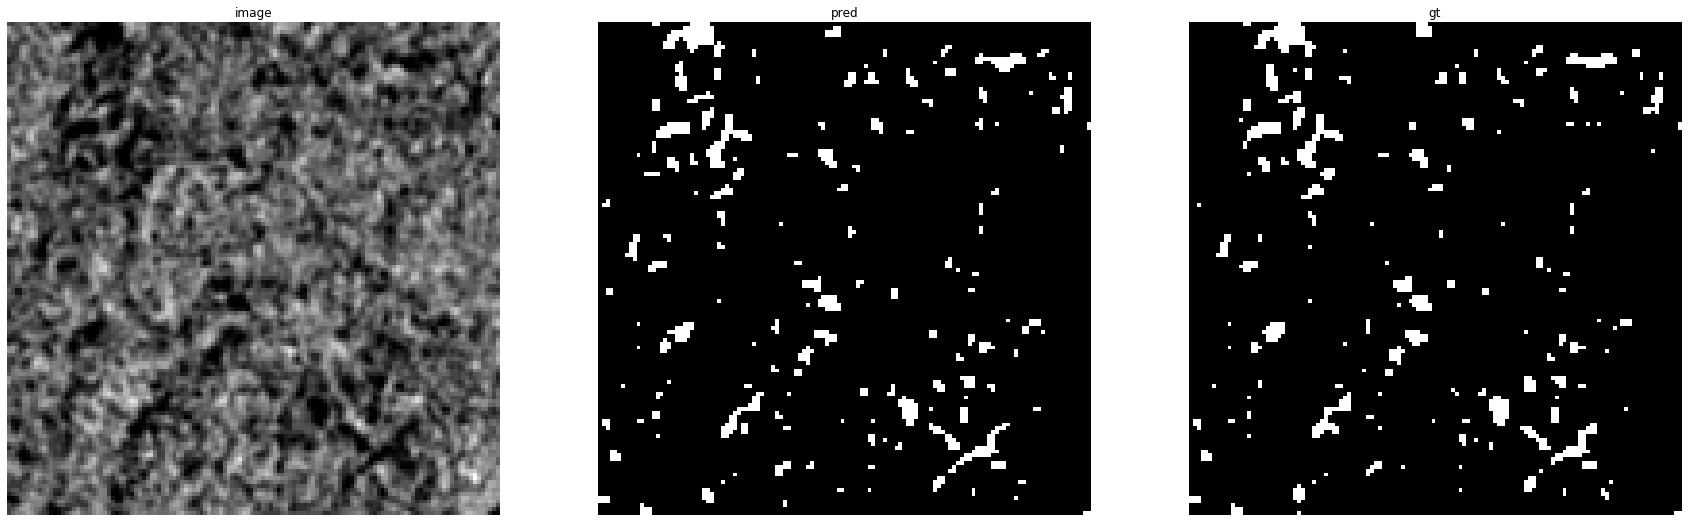

accuracy    : 0.98846435546875
precision   : 0.8800436205016358
recall      : 0.9108352144469526
f1          : 0.8951747088186357
pr_auc      : 0.9751591939297917
iou         : 0.8102409638554217


Prediction for SPE_carb10_58_box3:


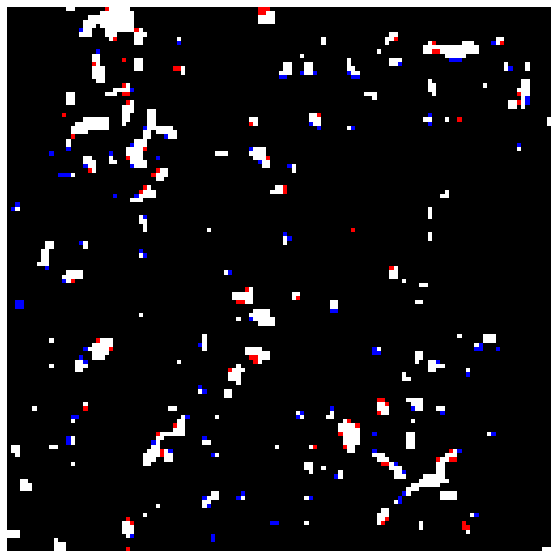

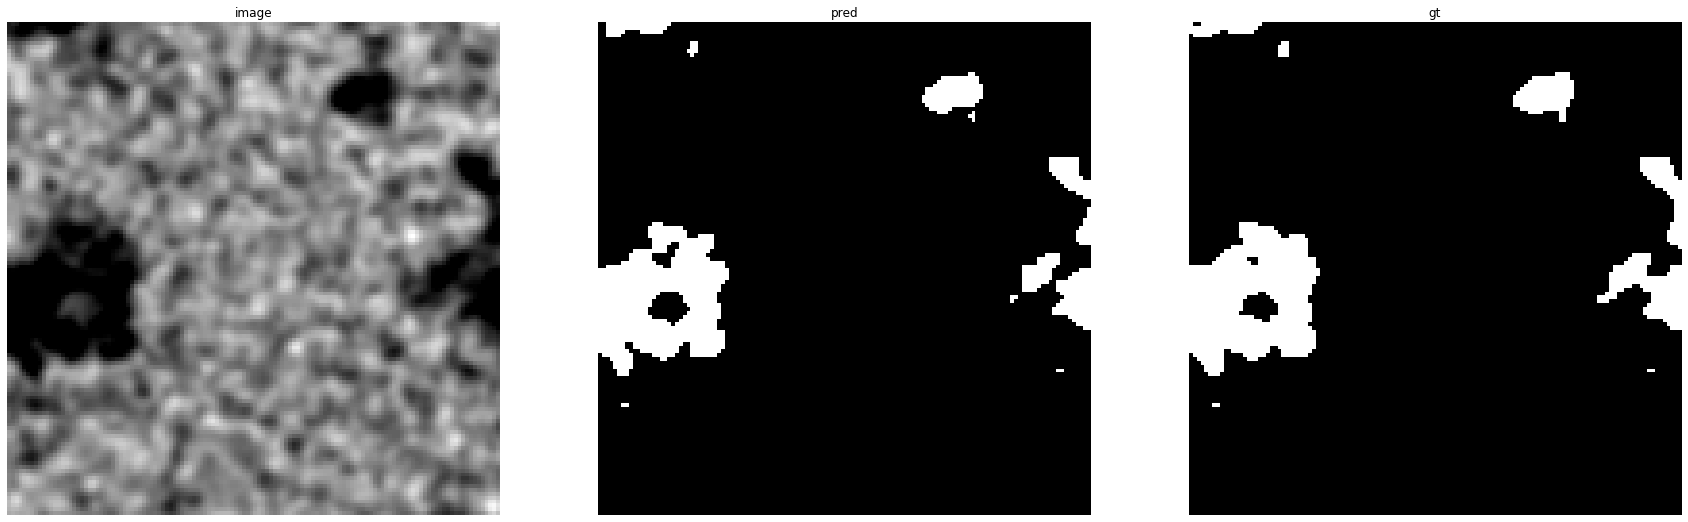

accuracy    : 0.99102783203125
precision   : 0.9954407294832827
recall      : 0.9028256374913852
f1          : 0.9468738706179978
pr_auc      : 0.9974933490482771
iou         : 0.8991077556623198


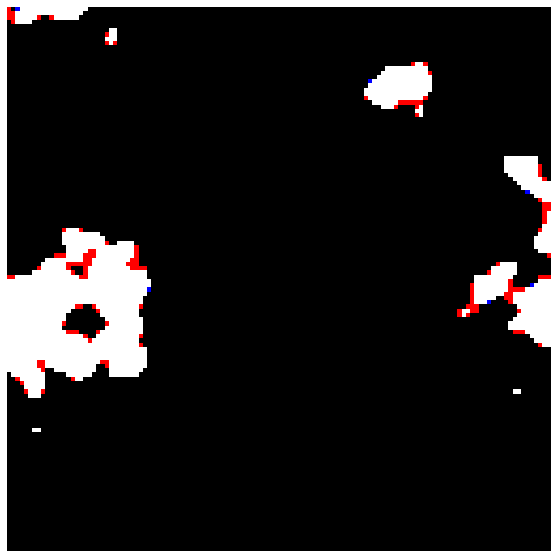

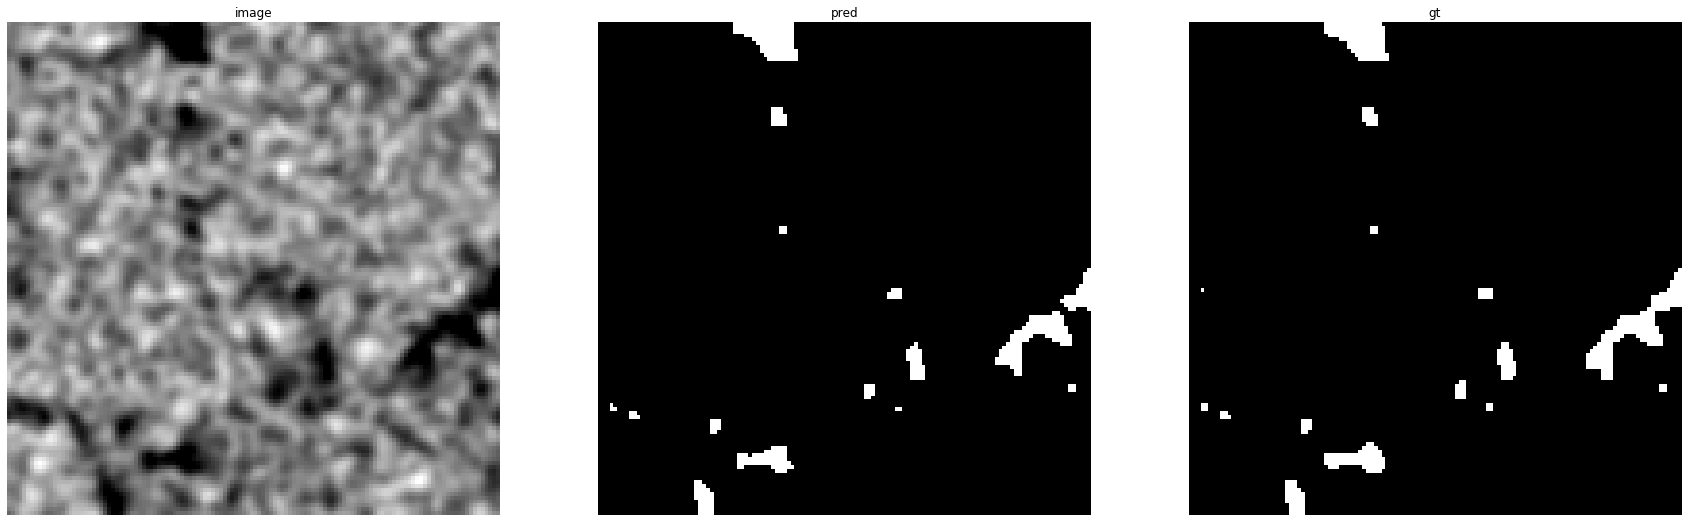

accuracy    : 0.996337890625
precision   : 0.9875776397515528
recall      : 0.8983050847457628
f1          : 0.9408284023668639
pr_auc      : 0.9946954986538024
iou         : 0.888268156424581


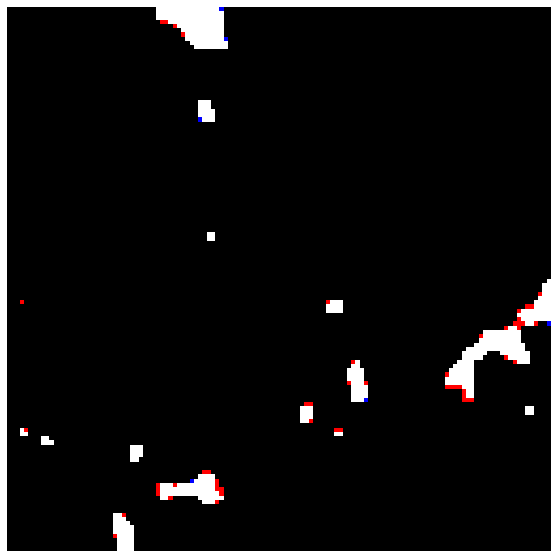

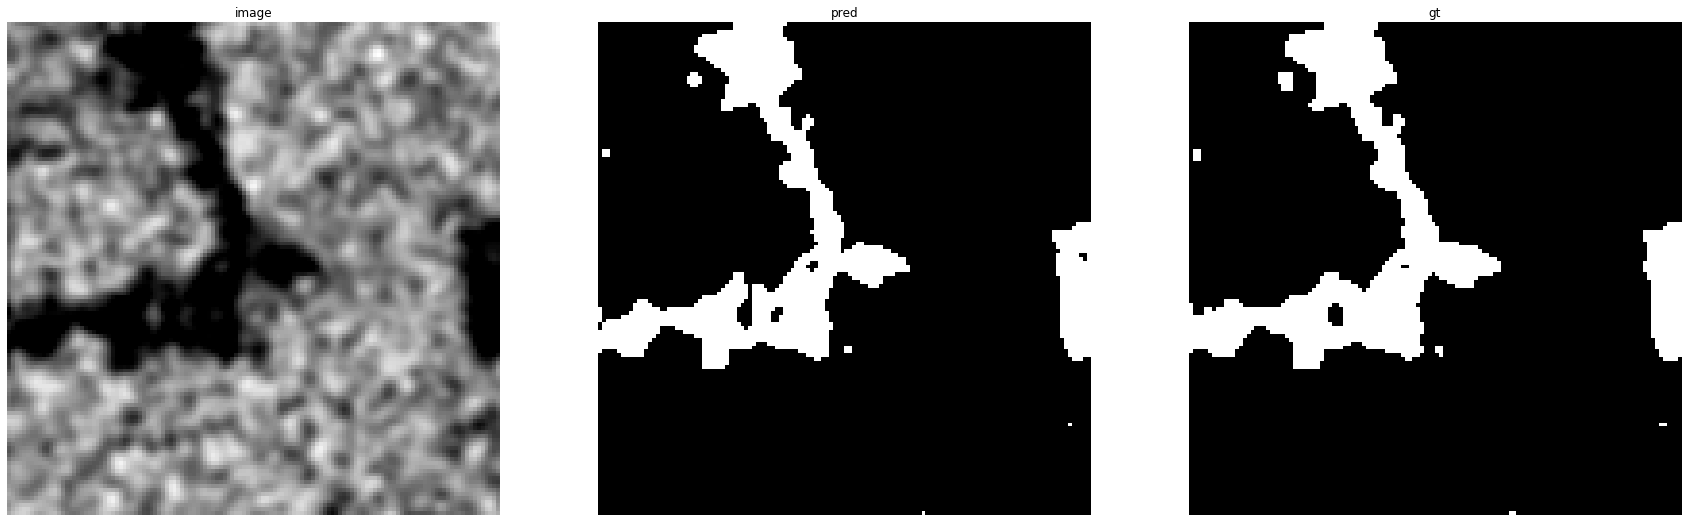

accuracy    : 0.989990234375
precision   : 0.9985322896281801
recall      : 0.9268846503178928
f1          : 0.9613754121526144
pr_auc      : 0.9988098601056443
iou         : 0.9256235827664399


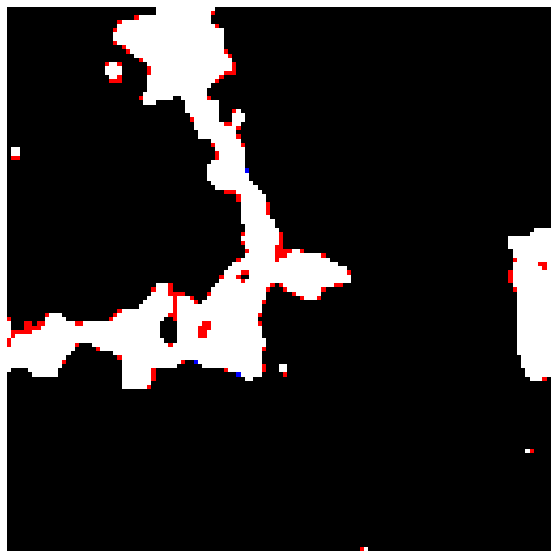

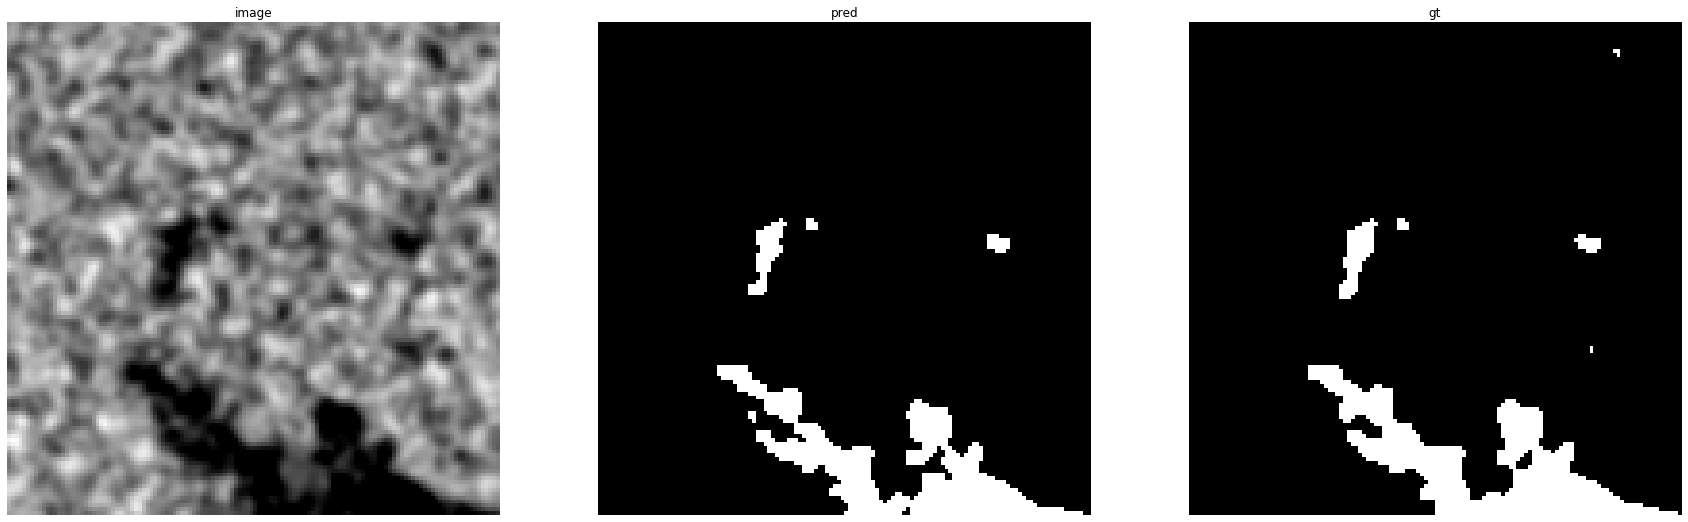

accuracy    : 0.9918212890625
precision   : 0.9991228070175439
recall      : 0.8954402515723271
f1          : 0.9444444444444444
pr_auc      : 0.9973766128284576
iou         : 0.8947368421052632


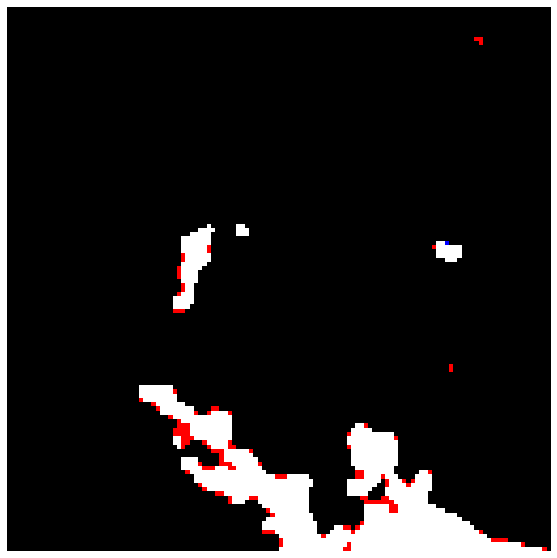

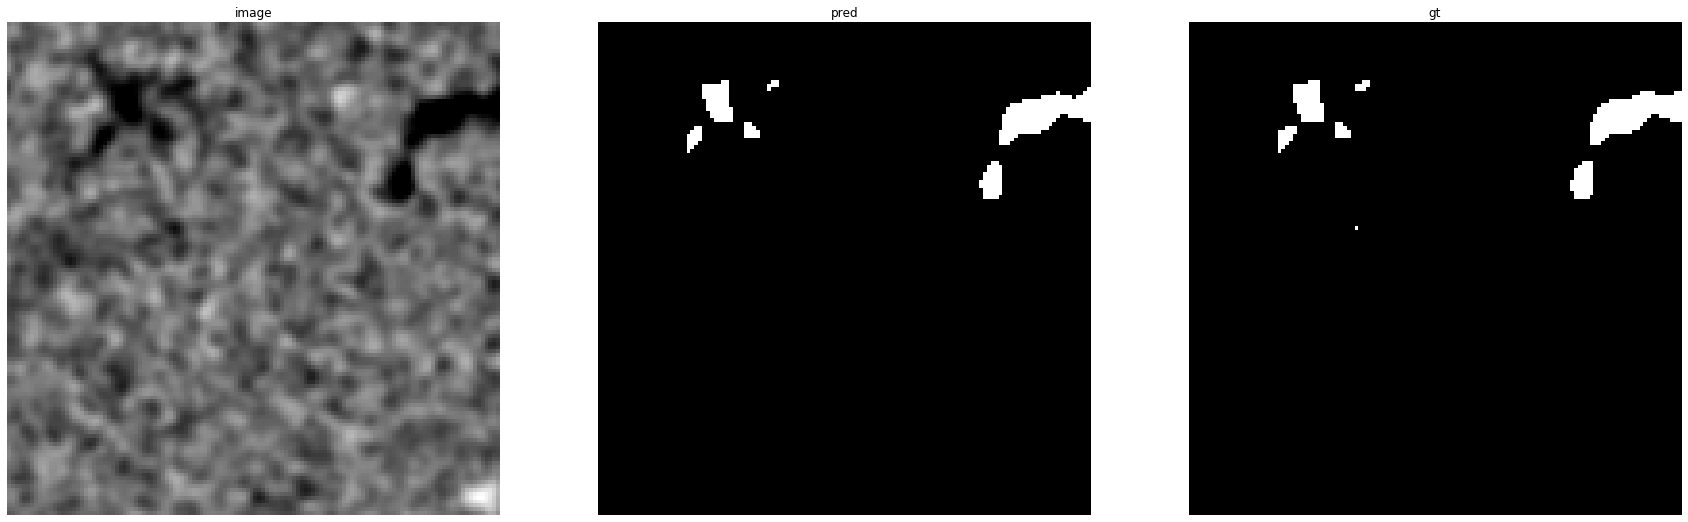

accuracy    : 0.99853515625
precision   : 0.9970059880239521
recall      : 0.9353932584269663
f1          : 0.9652173913043478
pr_auc      : 0.9981482154337284
iou         : 0.9327731092436975


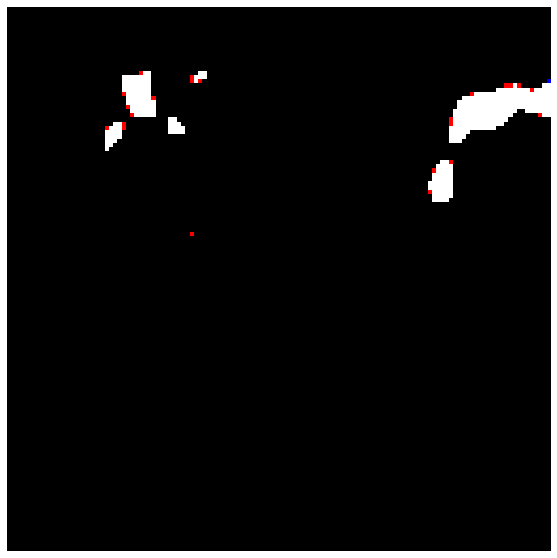

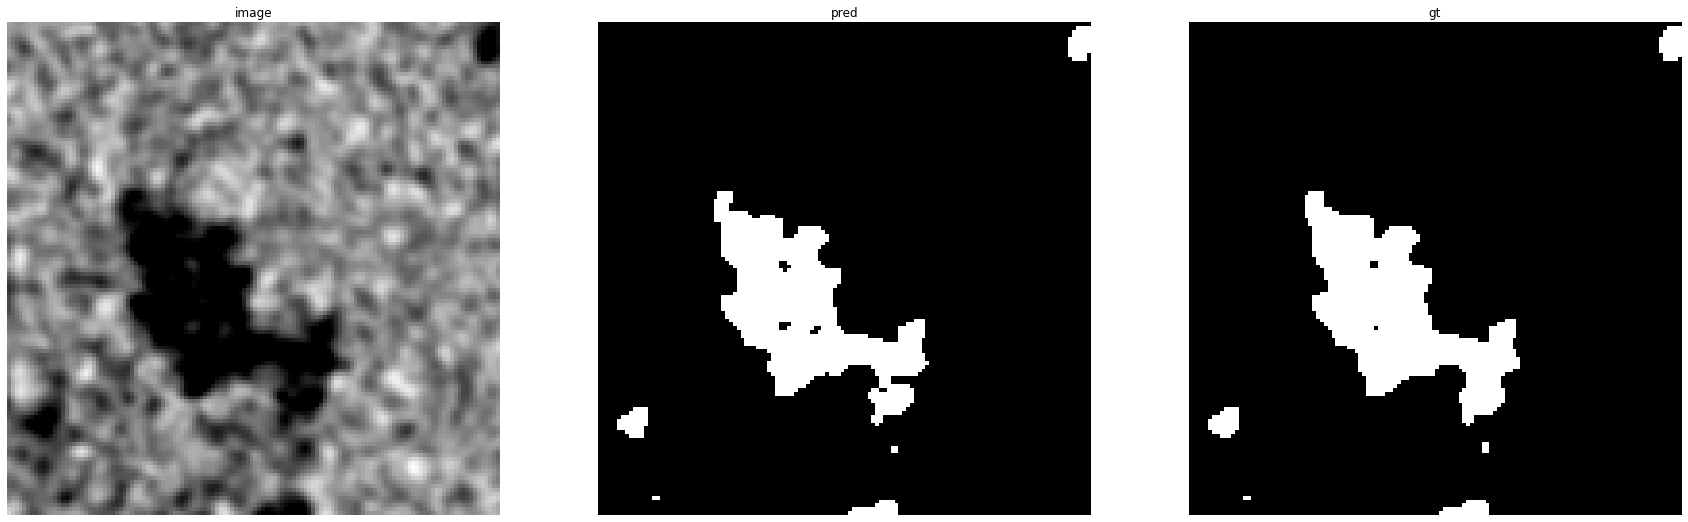

accuracy    : 0.99517822265625
precision   : 0.997364953886693
recall      : 0.9528005034612964
f1          : 0.9745735436112005
pr_auc      : 0.9991610421830064
iou         : 0.9504080351537979


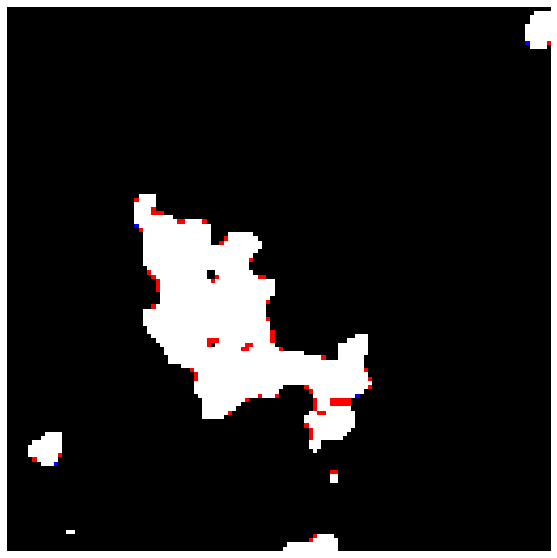

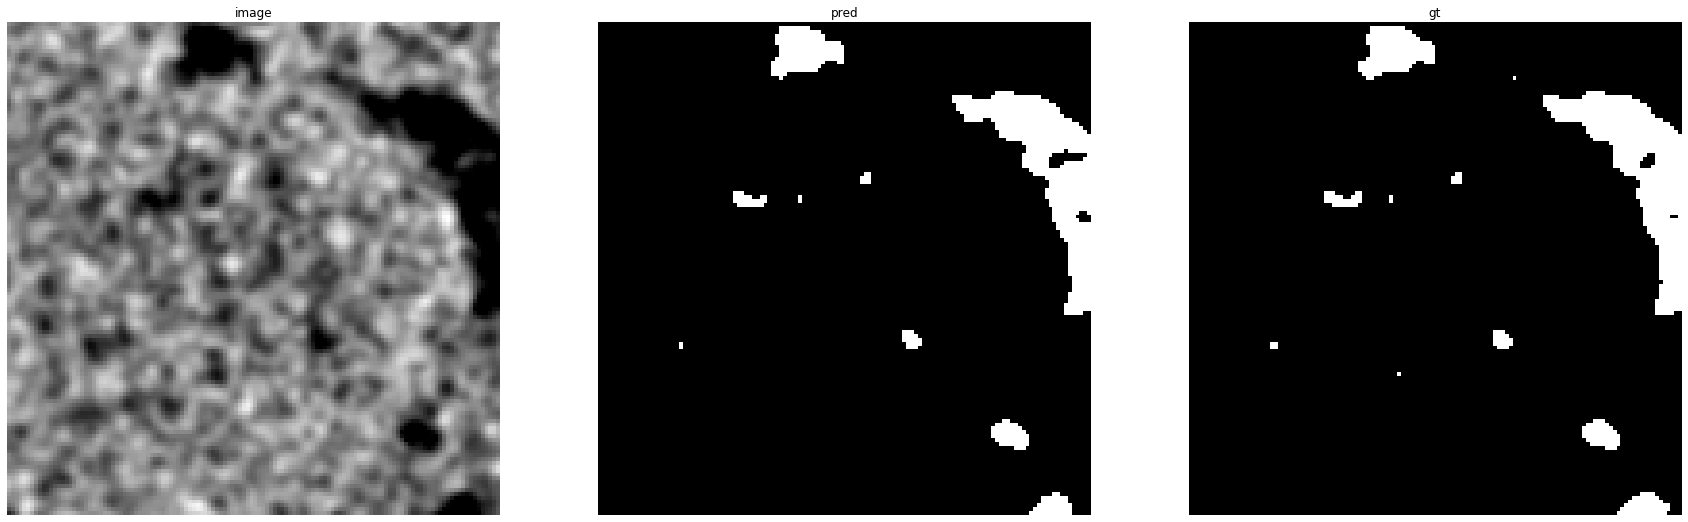

accuracy    : 0.99566650390625
precision   : 0.998062015503876
recall      : 0.9372156505914467
f1          : 0.9666823087752229
pr_auc      : 0.9977042975184435
iou         : 0.935513169845595


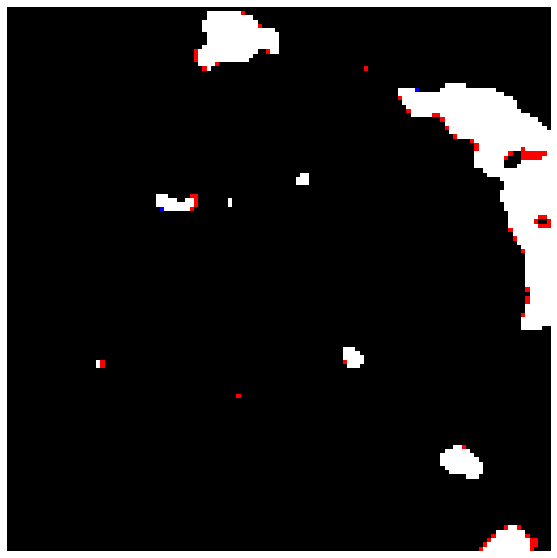

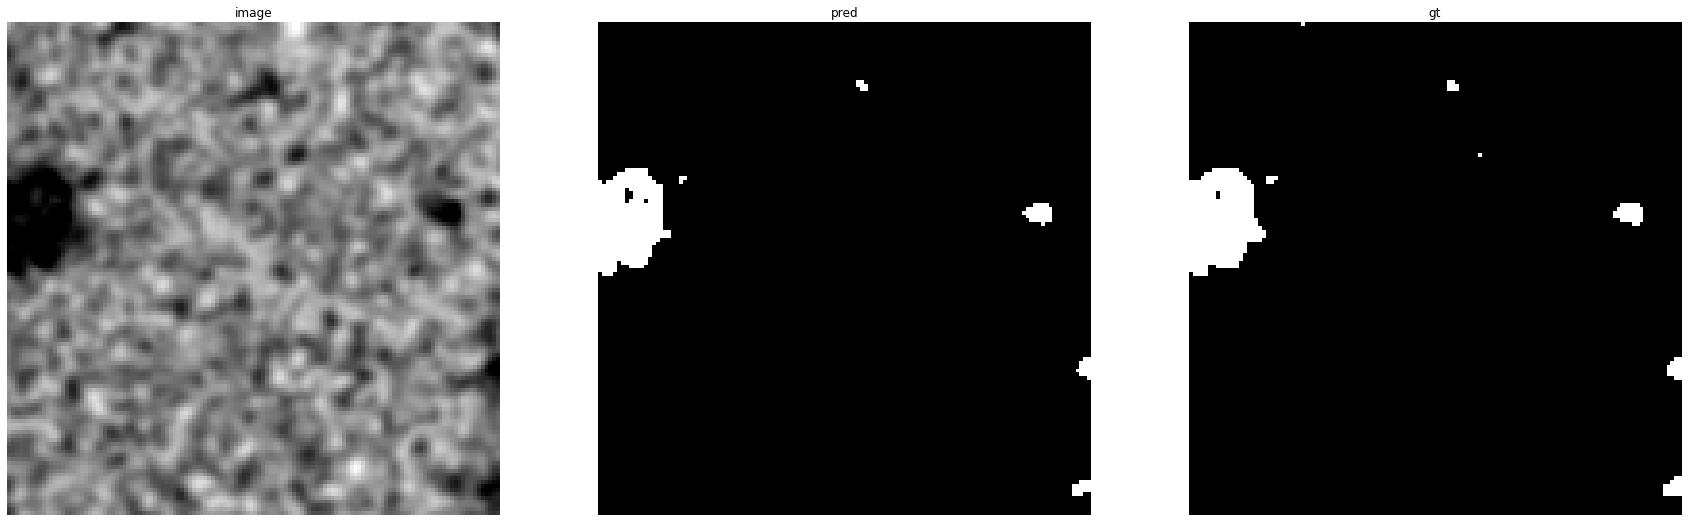

accuracy    : 0.99737548828125
precision   : 1.0
recall      : 0.9150197628458498
f1          : 0.95562435500516
pr_auc      : 0.998688950644936
iou         : 0.9150197628458498


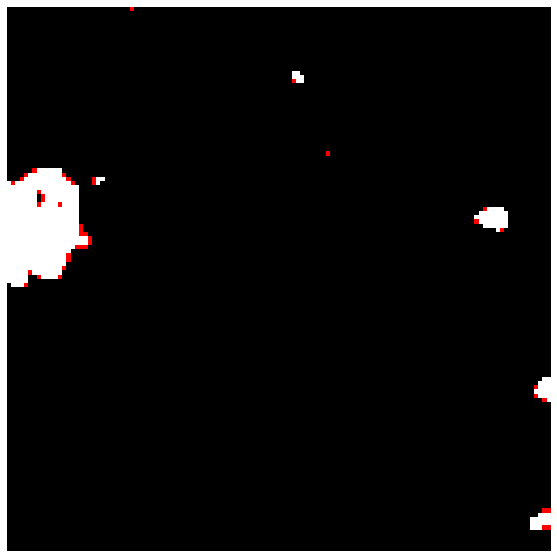

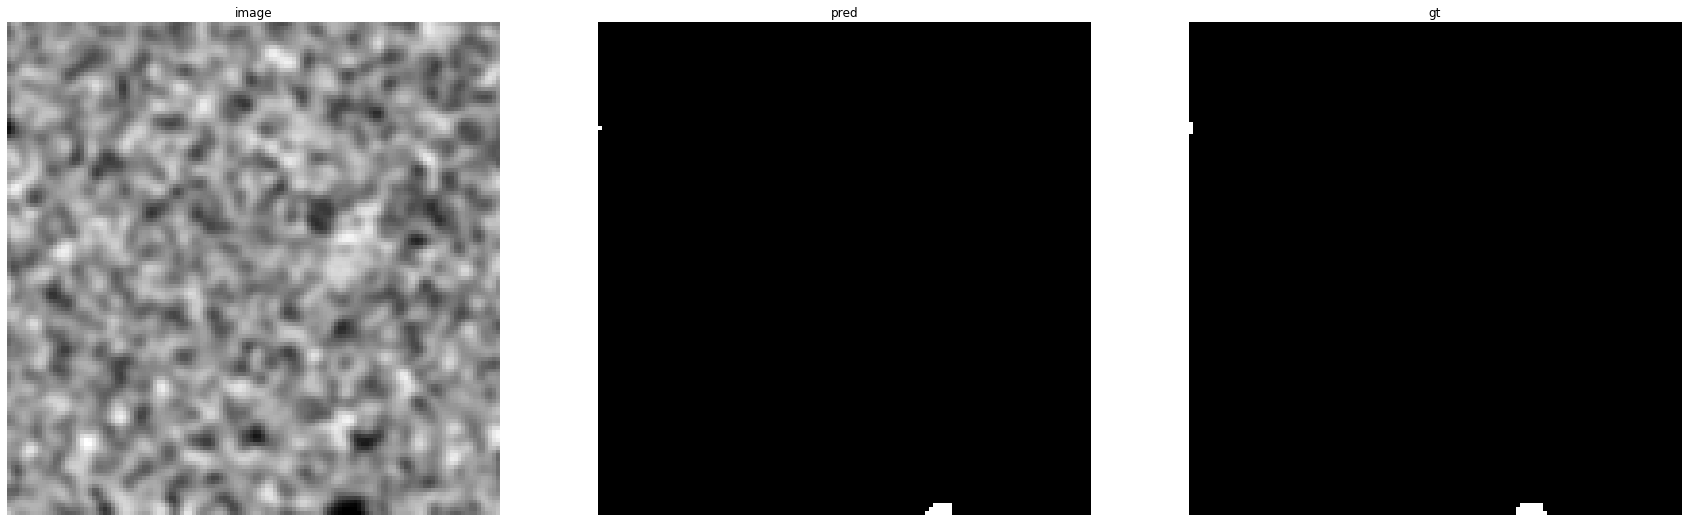

accuracy    : 0.99969482421875
precision   : 1.0
recall      : 0.7916666666666666
f1          : 0.8837209302325582
pr_auc      : 0.9965972222222221
iou         : 0.7916666666666666


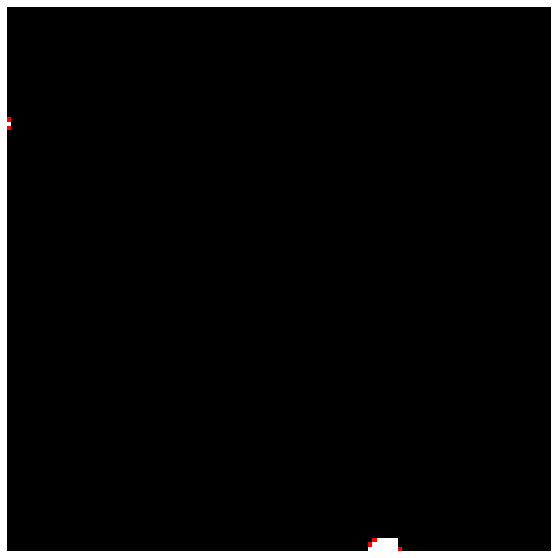

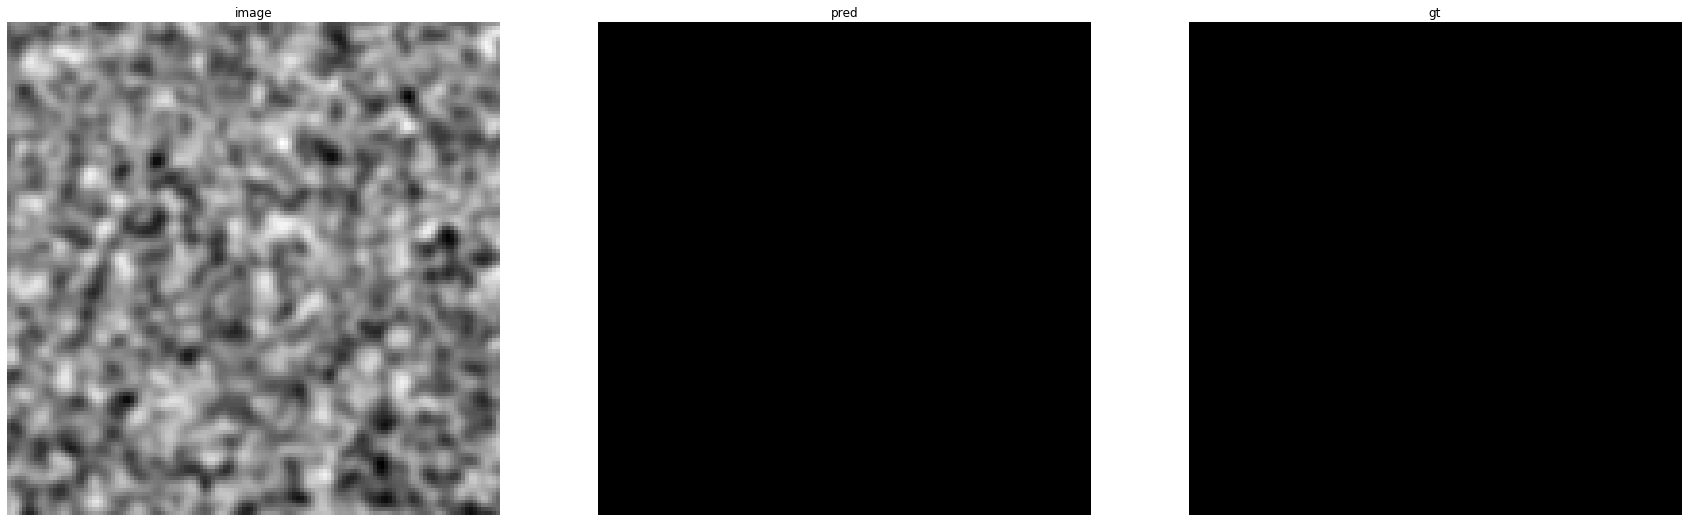

accuracy    : 1.0
precision   : 0.0
recall      : 0.0
f1          : 0.0
pr_auc      : nan
iou         : nan


/home/evlavrukhin/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/evlavrukhin/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/evlavrukhin/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/evlavrukhin/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/evlavrukhin/anacond



Prediction for SoilAh-1:


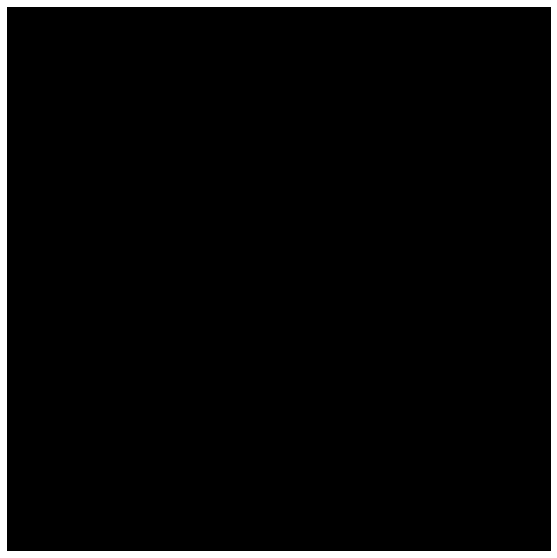

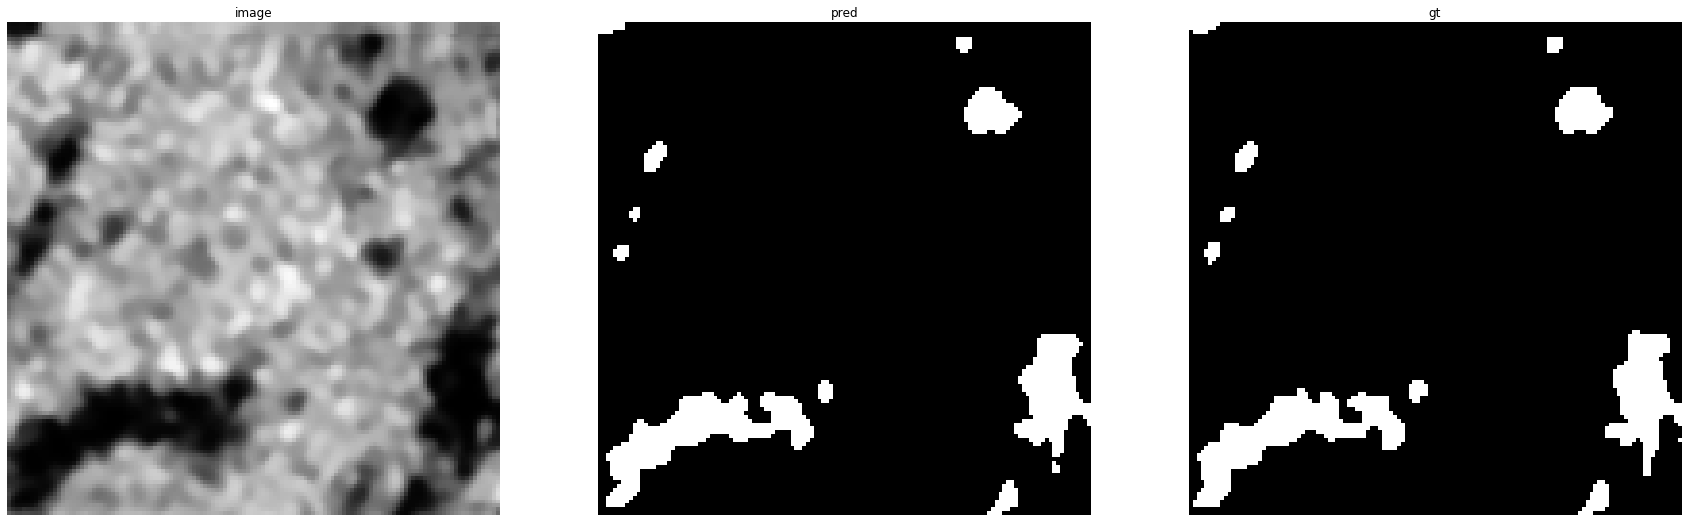

accuracy    : 0.99365234375
precision   : 0.974089068825911
recall      : 0.9435294117647058
f1          : 0.9585657370517928
pr_auc      : 0.9960255822330306
iou         : 0.9204284621270085


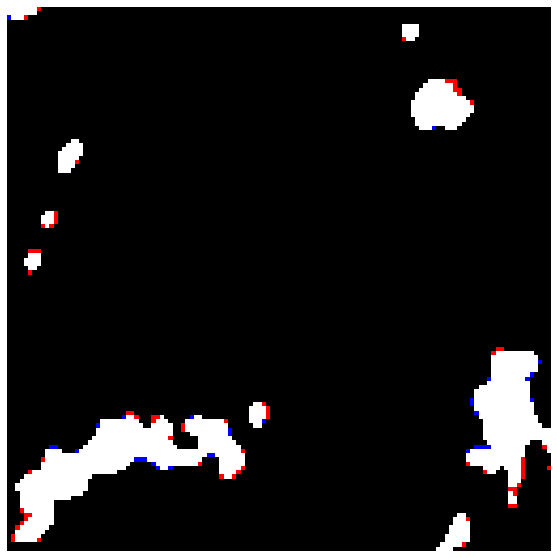

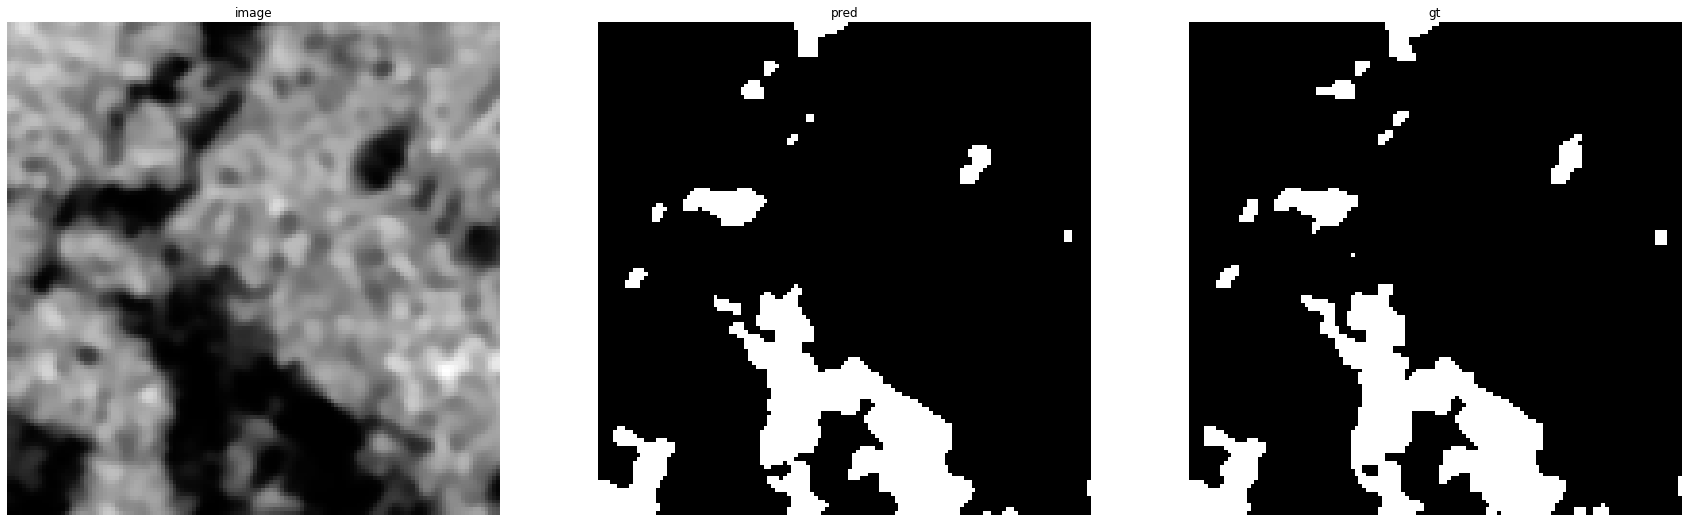

accuracy    : 0.9891357421875
precision   : 0.9884579870729455
recall      : 0.9333042720139494
f1          : 0.9600896860986547
pr_auc      : 0.9964603304159044
iou         : 0.9232427770590772


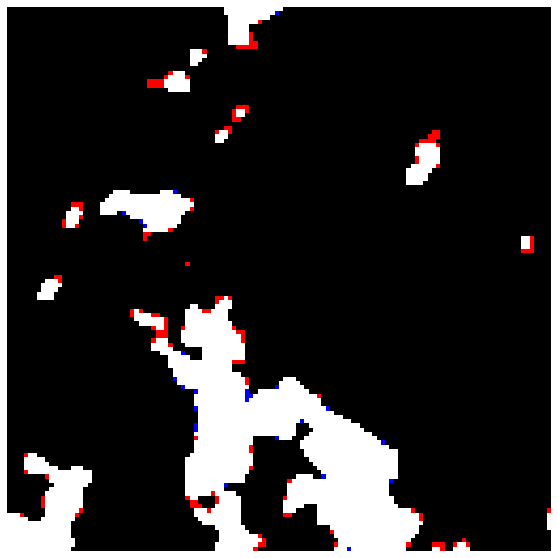

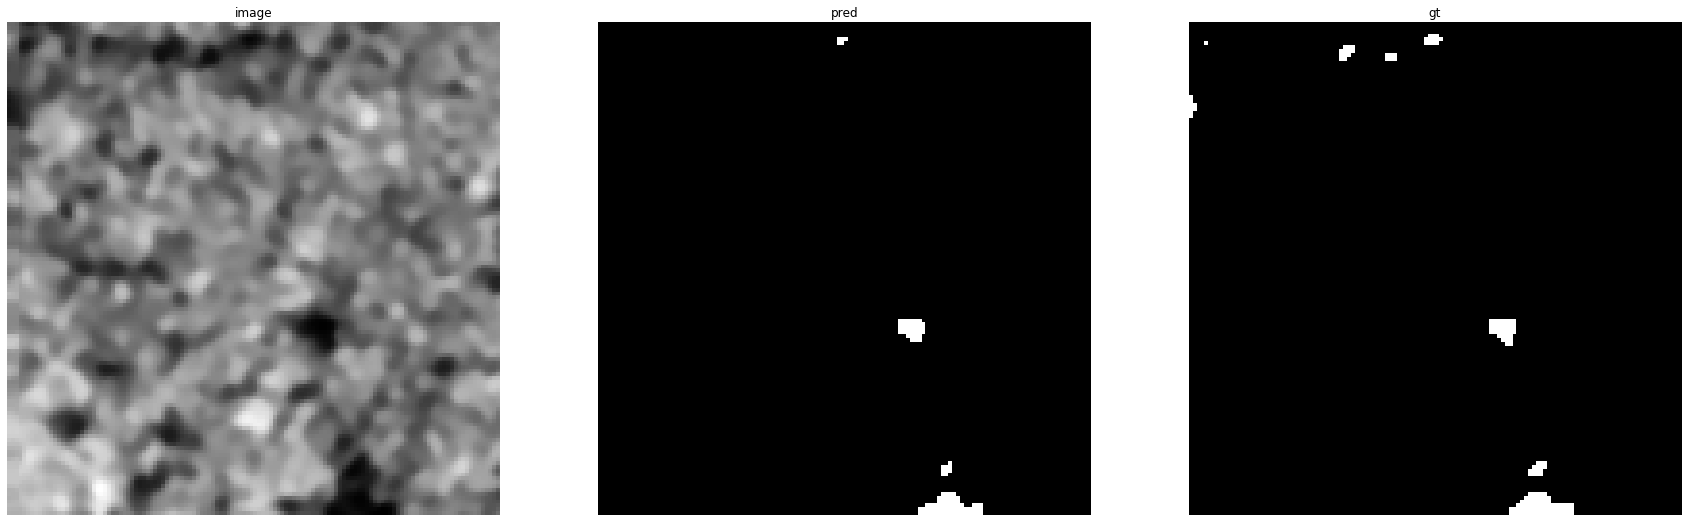

accuracy    : 0.99700927734375
precision   : 1.0
recall      : 0.69375
f1          : 0.8191881918819187
pr_auc      : 0.969262497276418
iou         : 0.69375


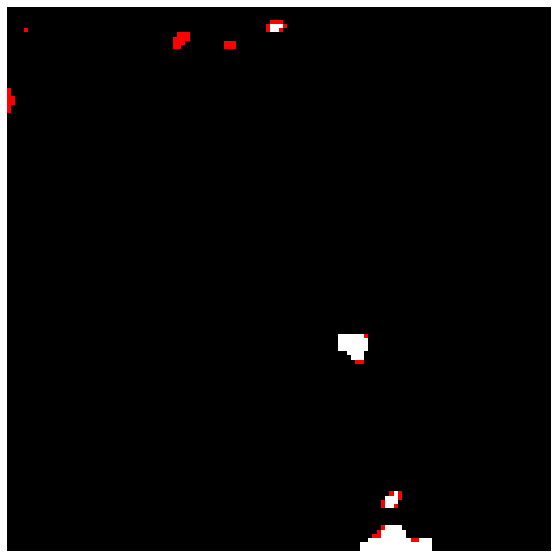

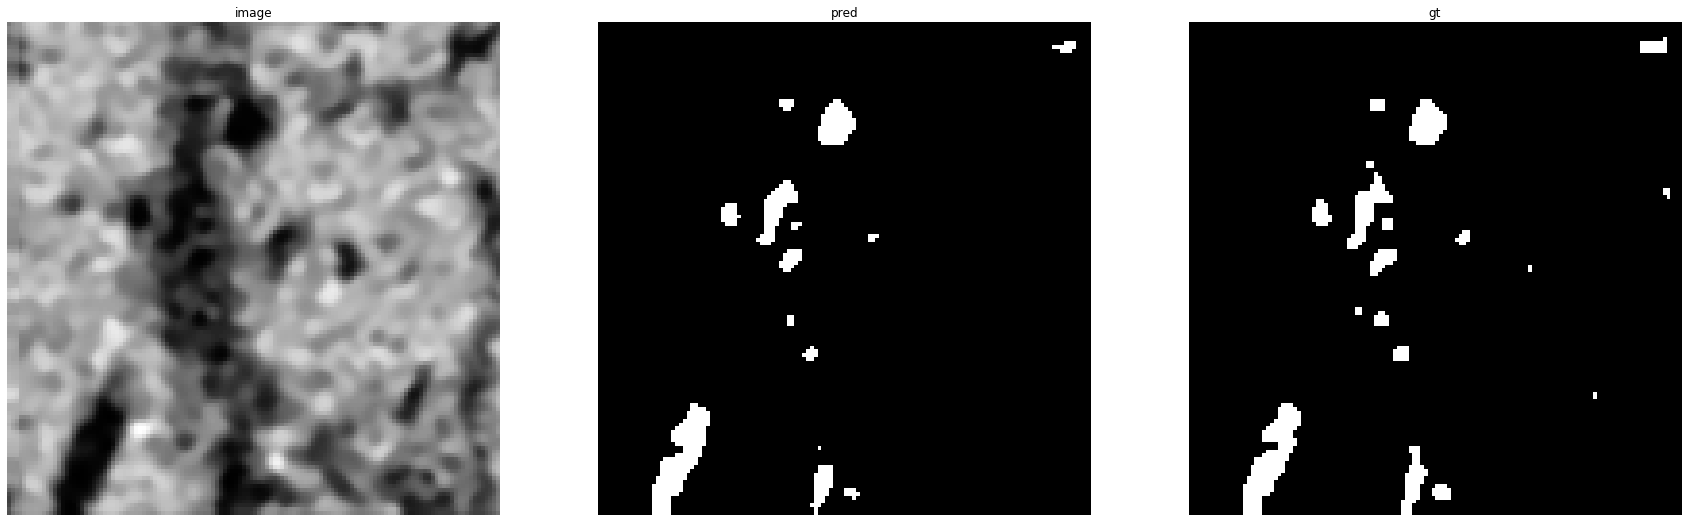

accuracy    : 0.992431640625
precision   : 0.9749518304431599
recall      : 0.820097244732577
f1          : 0.8908450704225351
pr_auc      : 0.986723248892661
iou         : 0.8031746031746032


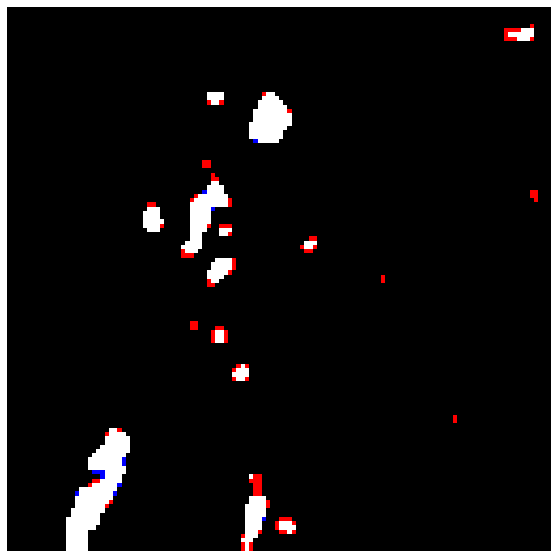

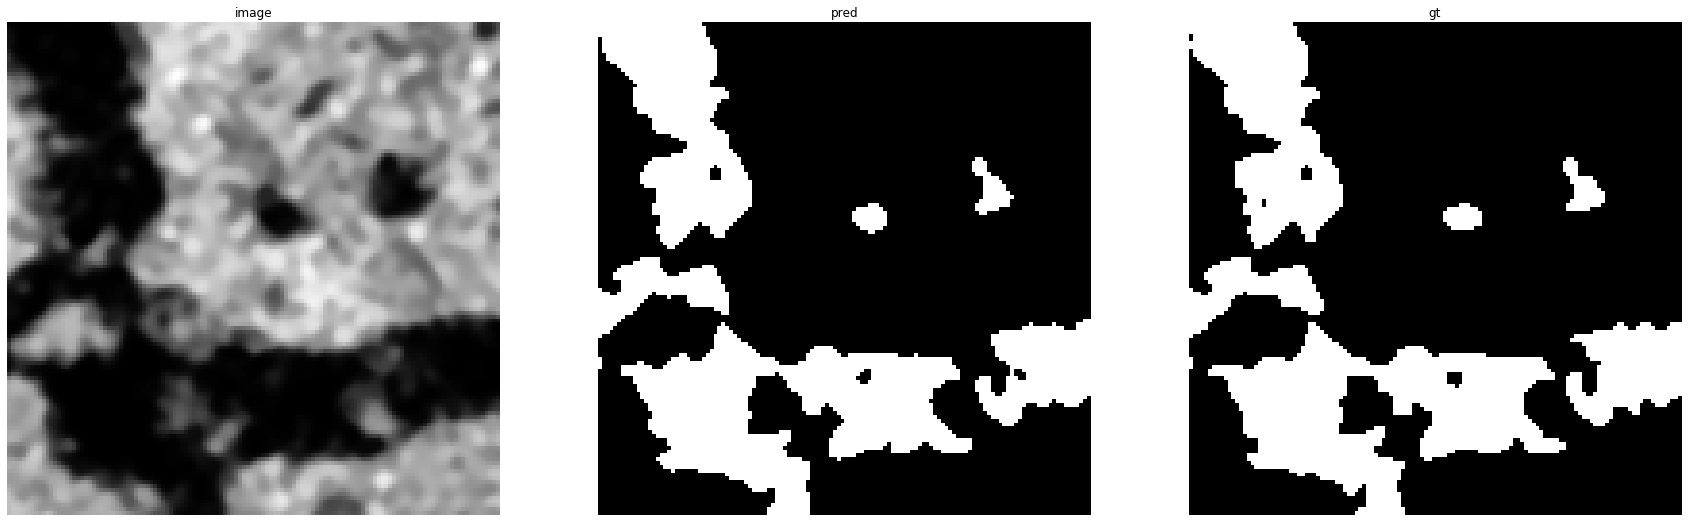

accuracy    : 0.98895263671875
precision   : 0.9855880985588099
recall      : 0.9727001605872907
f1          : 0.9791017203556172
pr_auc      : 0.9988674741602002
iou         : 0.9590590364171002


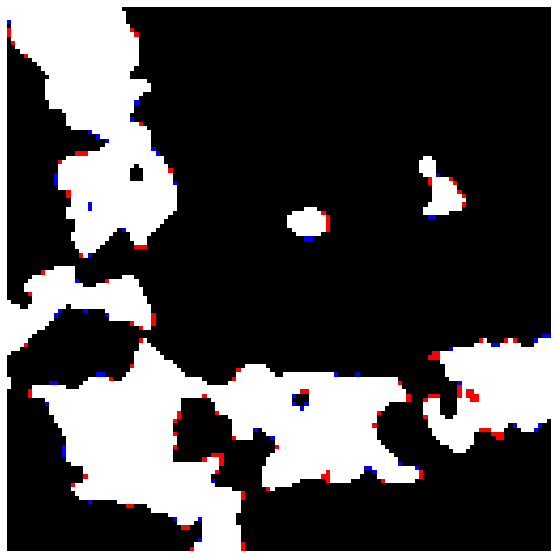

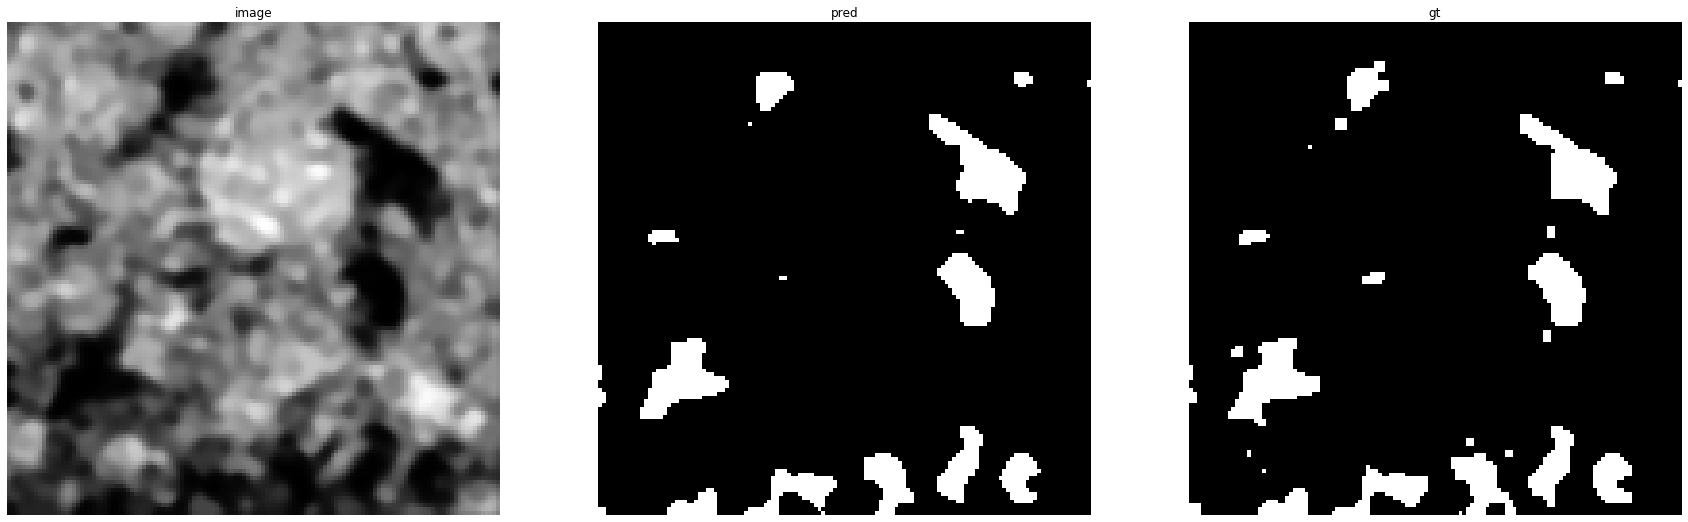

accuracy    : 0.98907470703125
precision   : 0.9794268919911829
recall      : 0.8982479784366577
f1          : 0.9370826010544815
pr_auc      : 0.9924577070286502
iou         : 0.8816137566137566


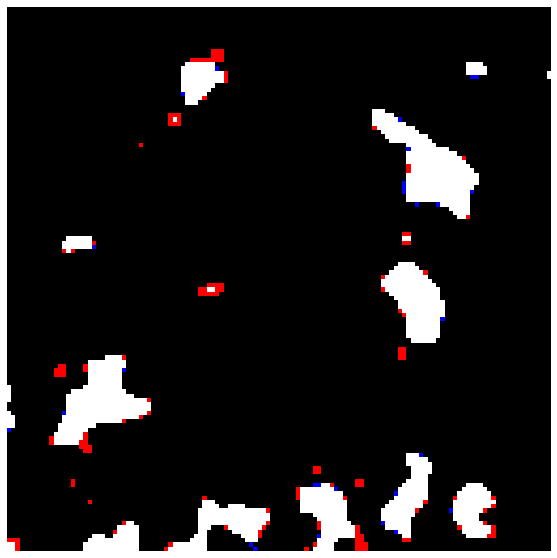

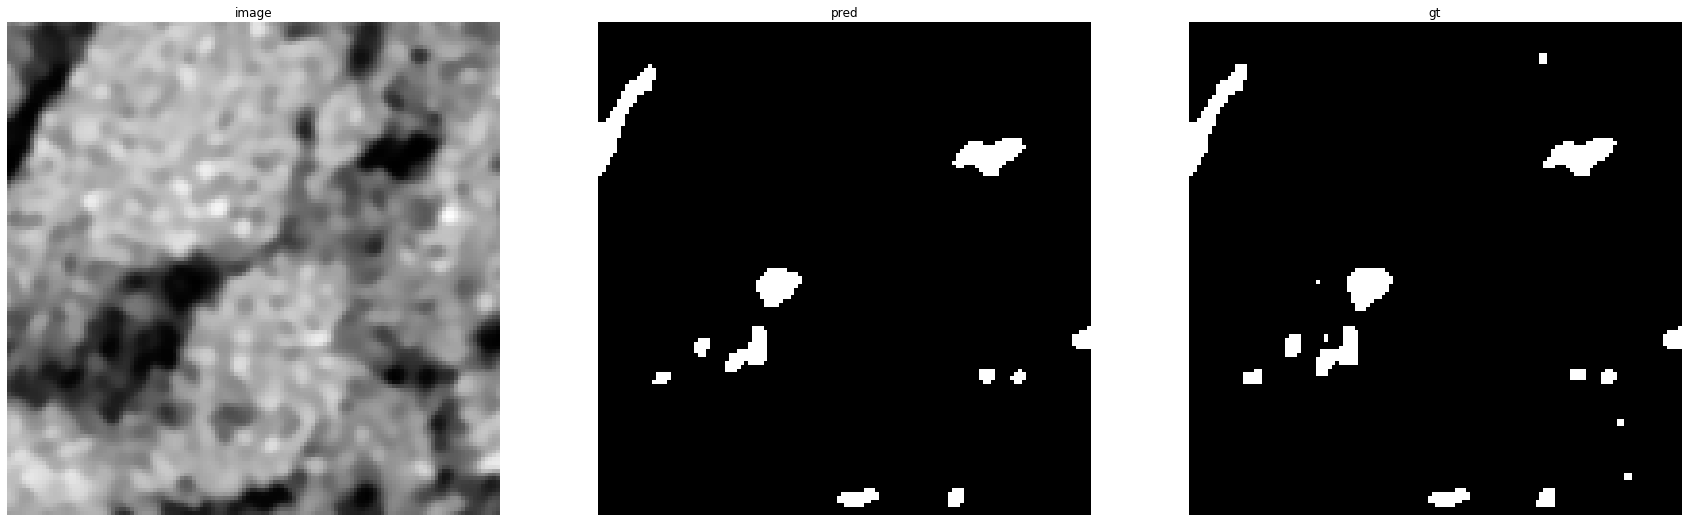

accuracy    : 0.99609375
precision   : 0.9847619047619047
recall      : 0.9022687609075044
f1          : 0.9417122040072861
pr_auc      : 0.9886079655416236
iou         : 0.8898450946643718


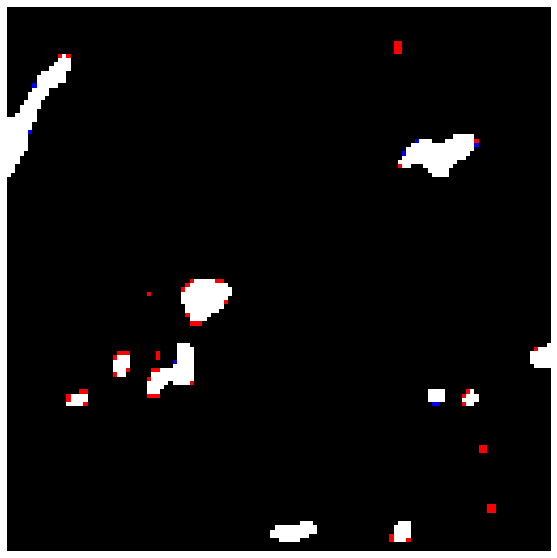

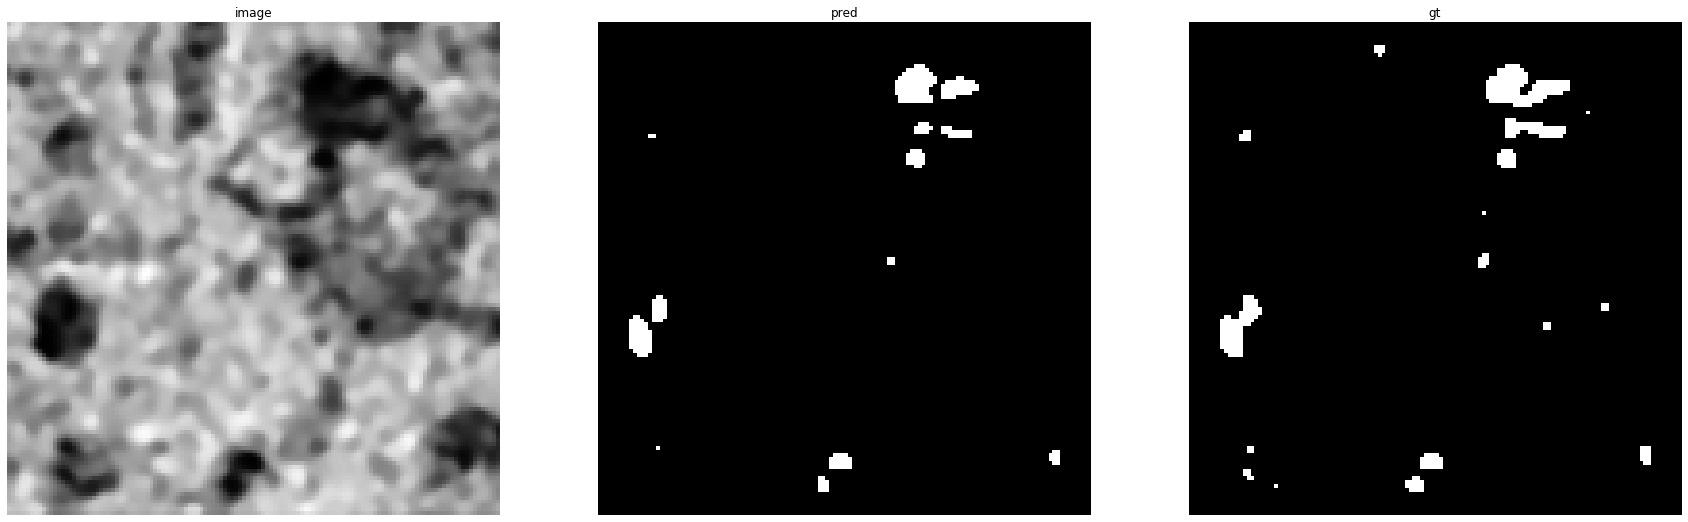

accuracy    : 0.993408203125
precision   : 0.9868421052631579
recall      : 0.7425742574257426
f1          : 0.8474576271186441
pr_auc      : 0.9751350997425327
iou         : 0.7352941176470589


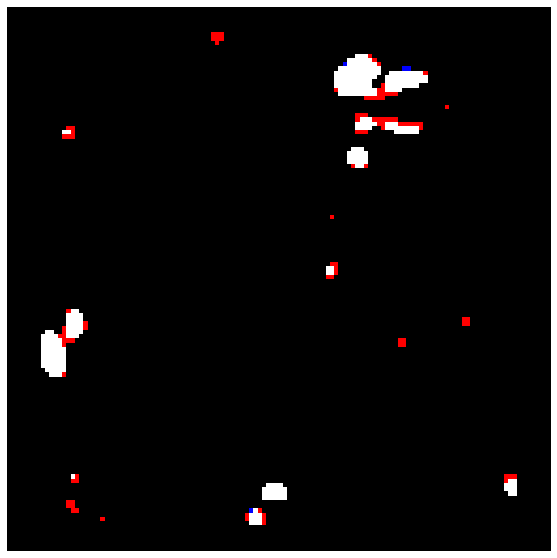

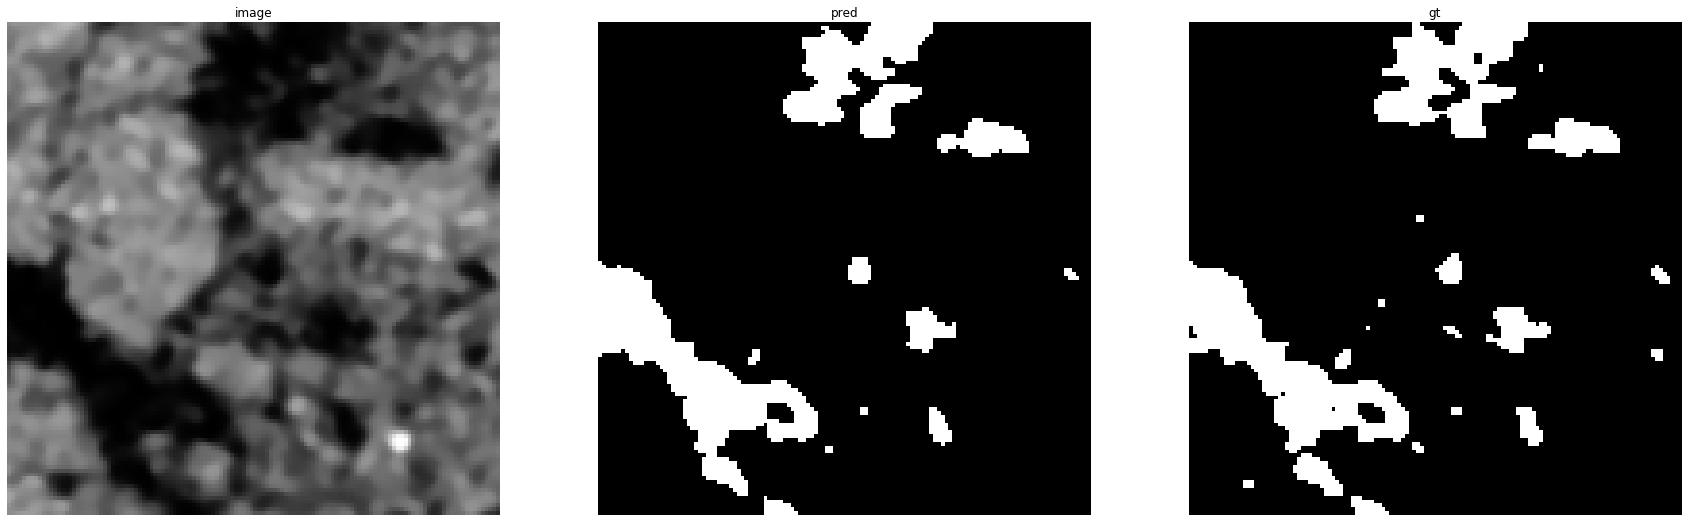

accuracy    : 0.98712158203125
precision   : 0.9789112309955861
recall      : 0.922365988909427
f1          : 0.9497977635022602
pr_auc      : 0.9943718597203262
iou         : 0.9043951064793838


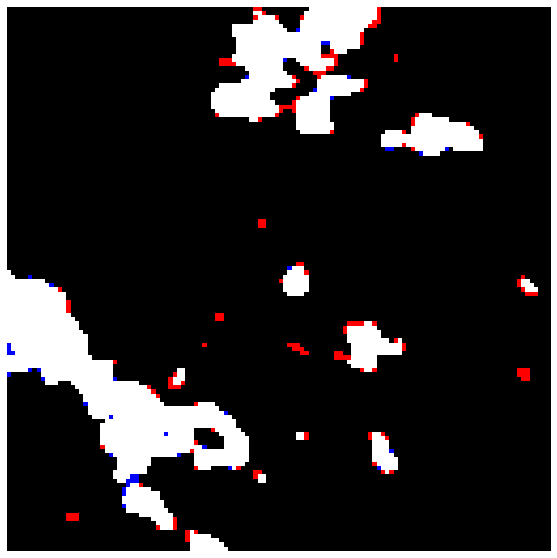

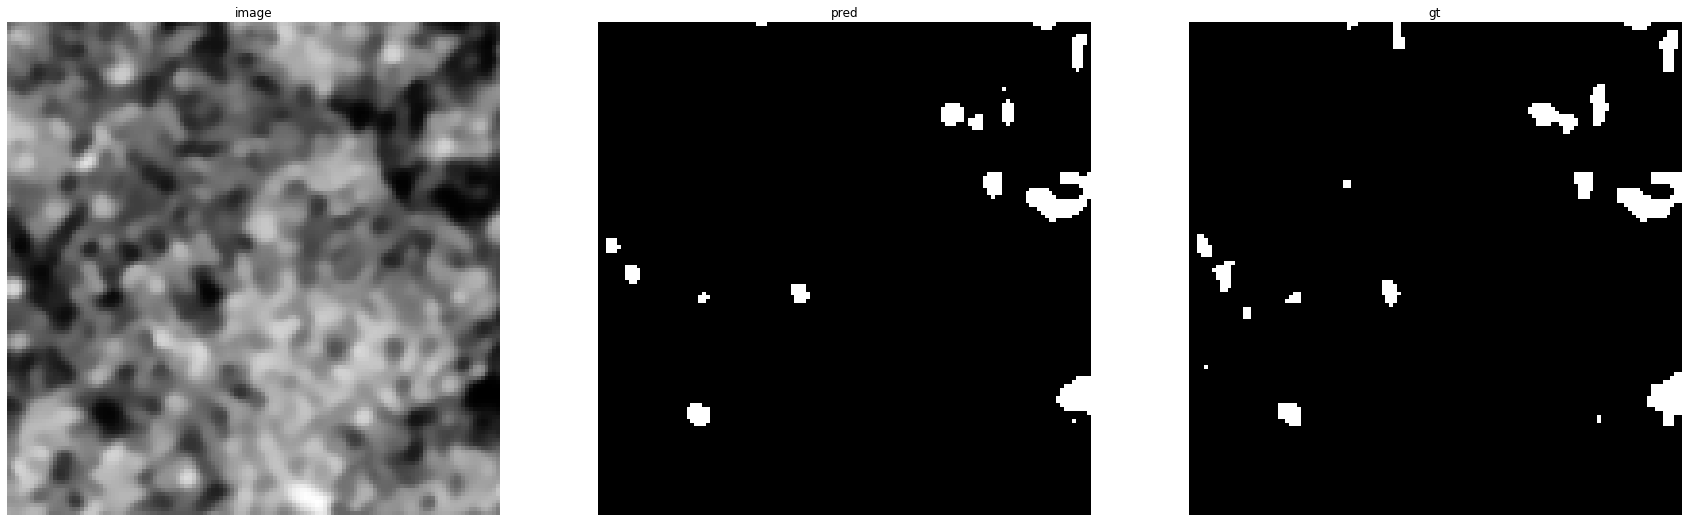

accuracy    : 0.99188232421875
precision   : 0.9748743718592965
recall      : 0.7592954990215264
f1          : 0.8536853685368536
pr_auc      : 0.9757093475373844
iou         : 0.744721689059501


Prediction for SoilB-2:


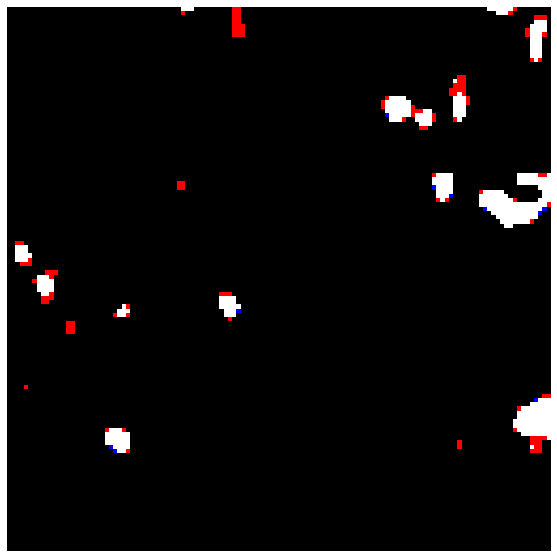

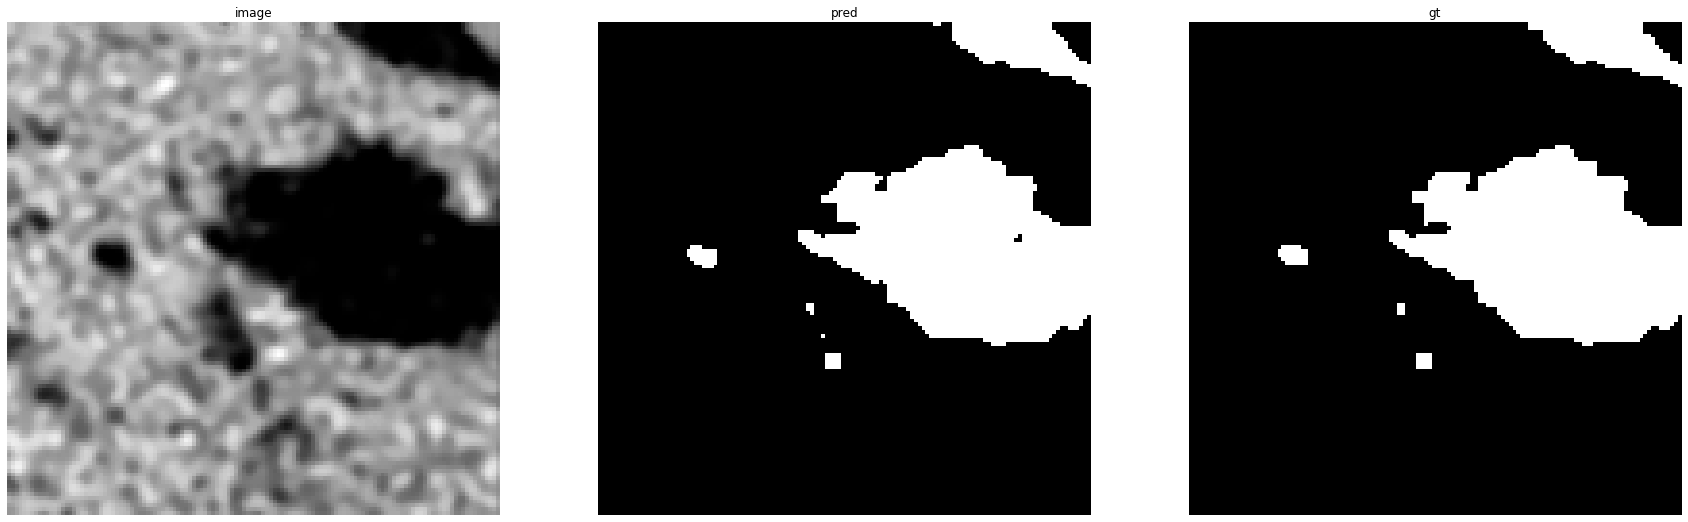

accuracy    : 0.99688720703125
precision   : 0.993127147766323
recall      : 0.9893871961656967
f1          : 0.9912536443148687
pr_auc      : 0.9997156342032877
iou         : 0.9826589595375722


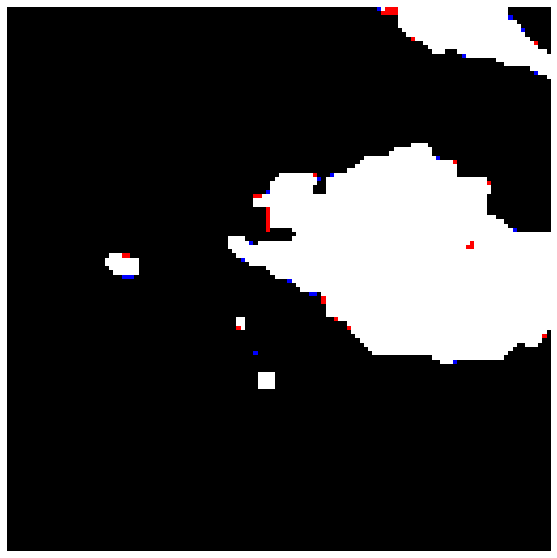

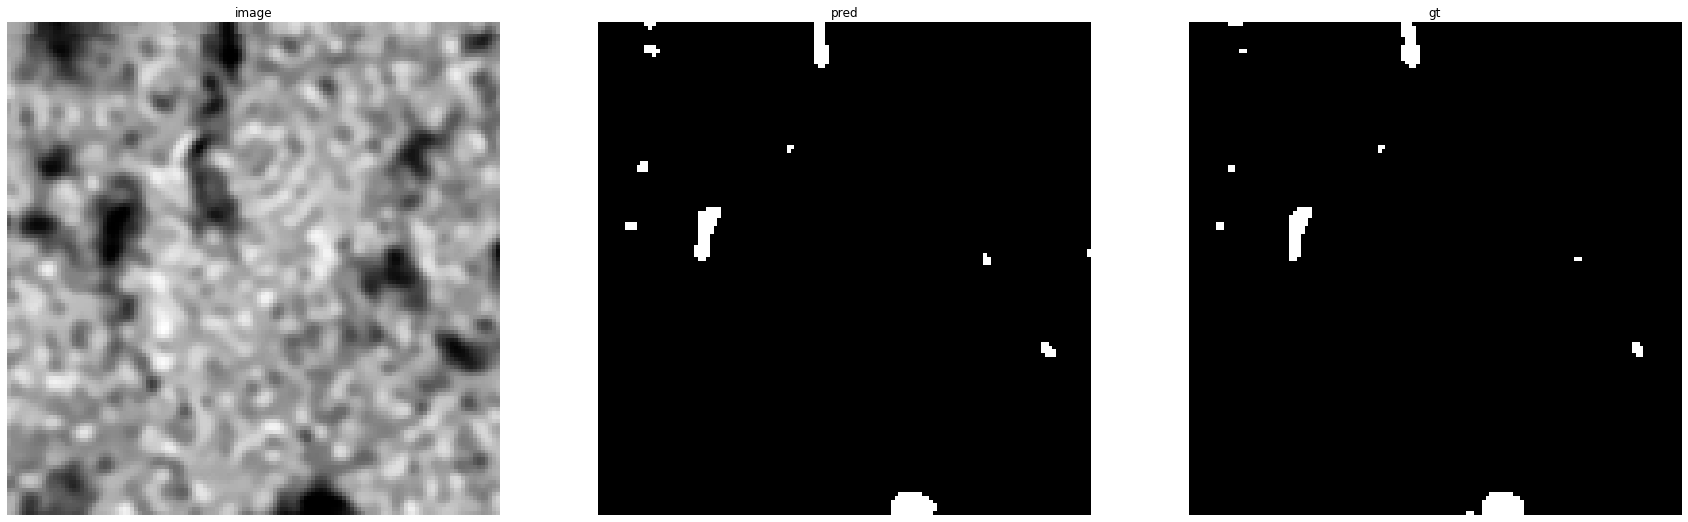

accuracy    : 0.99755859375
precision   : 0.8640776699029126
recall      : 0.9368421052631579
f1          : 0.898989898989899
pr_auc      : 0.9756715096113164
iou         : 0.8165137614678899


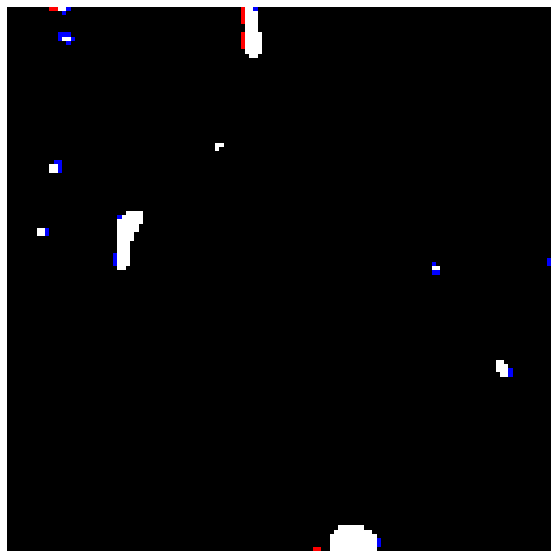

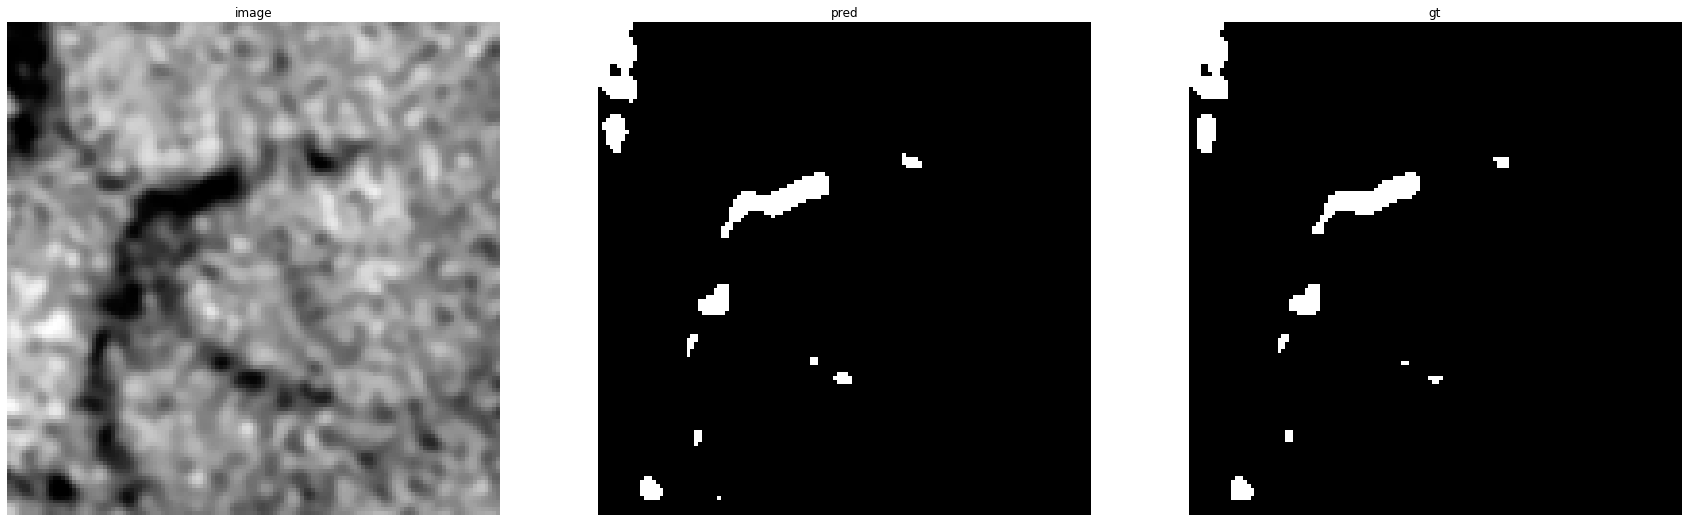

accuracy    : 0.997314453125
precision   : 0.9363817097415507
recall      : 0.9751552795031055
f1          : 0.9553752535496957
pr_auc      : 0.9951864833225974
iou         : 0.9145631067961165


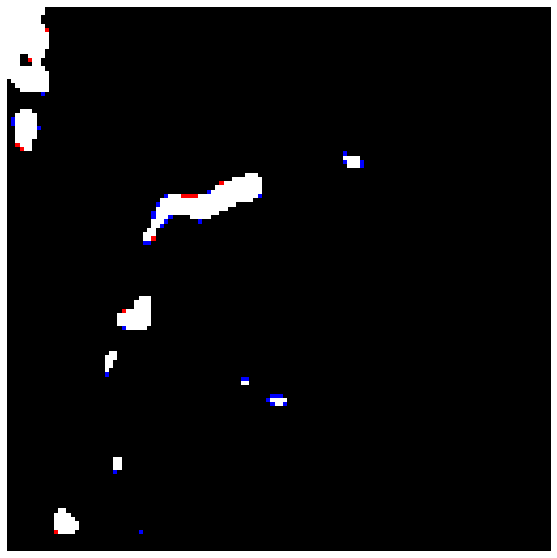

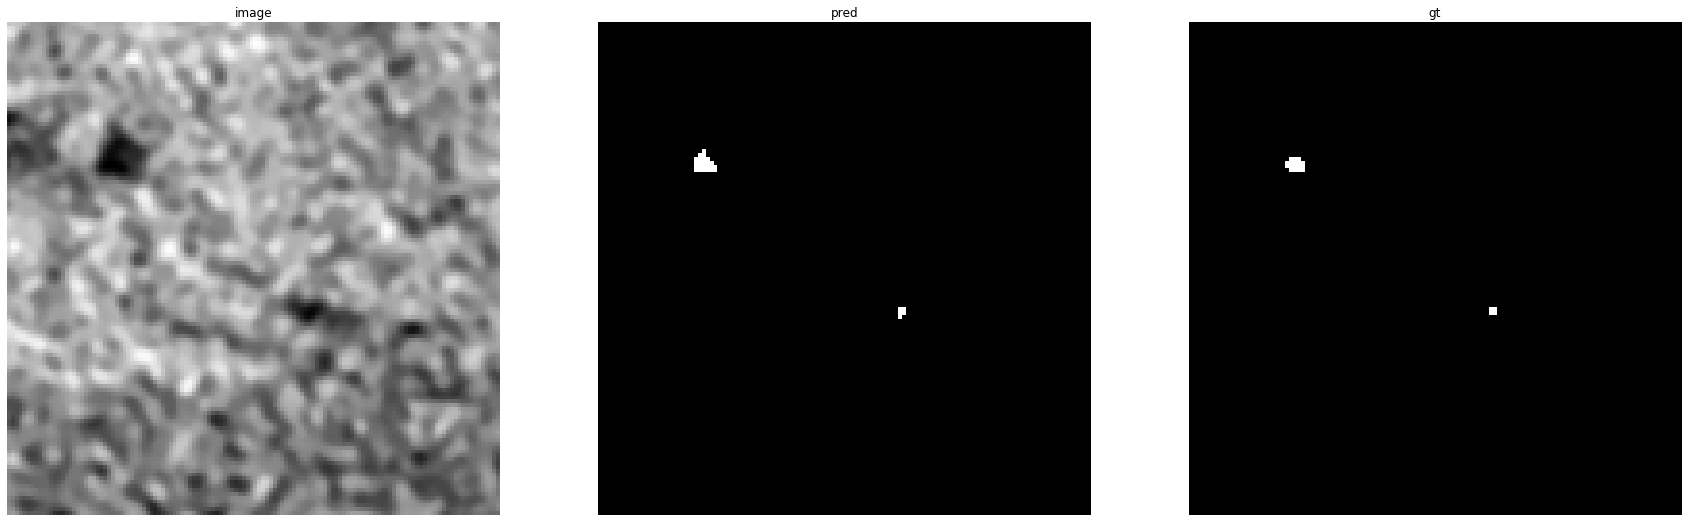

accuracy    : 0.99951171875
precision   : 0.7241379310344828
recall      : 1.0
f1          : 0.8400000000000001
pr_auc      : 0.9634477994278359
iou         : 0.7241379310344828


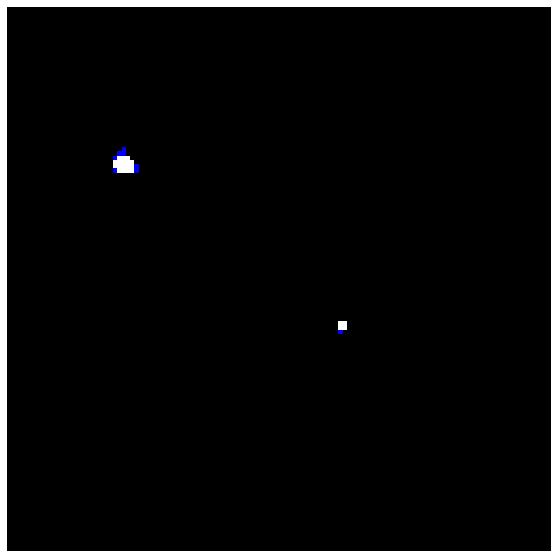

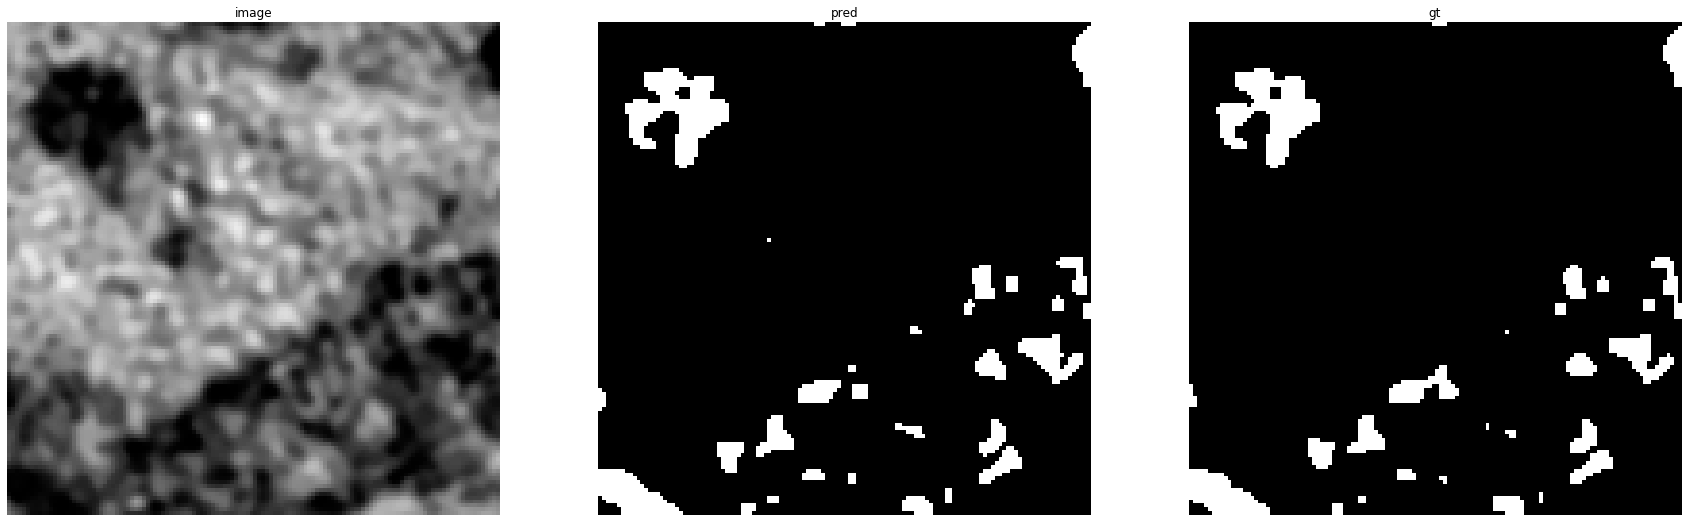

accuracy    : 0.99176025390625
precision   : 0.9291014014839242
recall      : 0.9583333333333334
f1          : 0.9434910004185851
pr_auc      : 0.990779221231254
iou         : 0.893026941362916


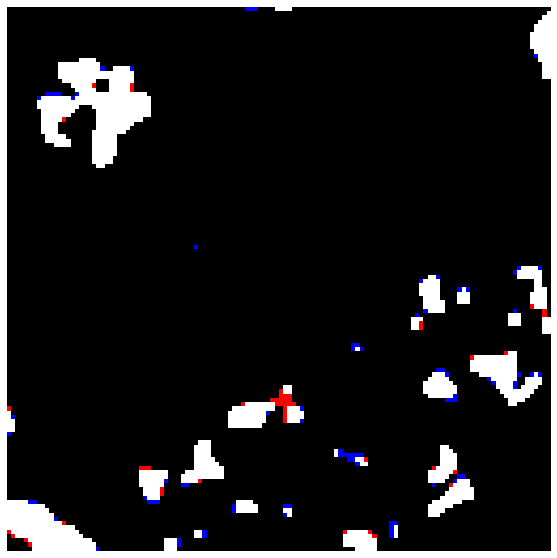

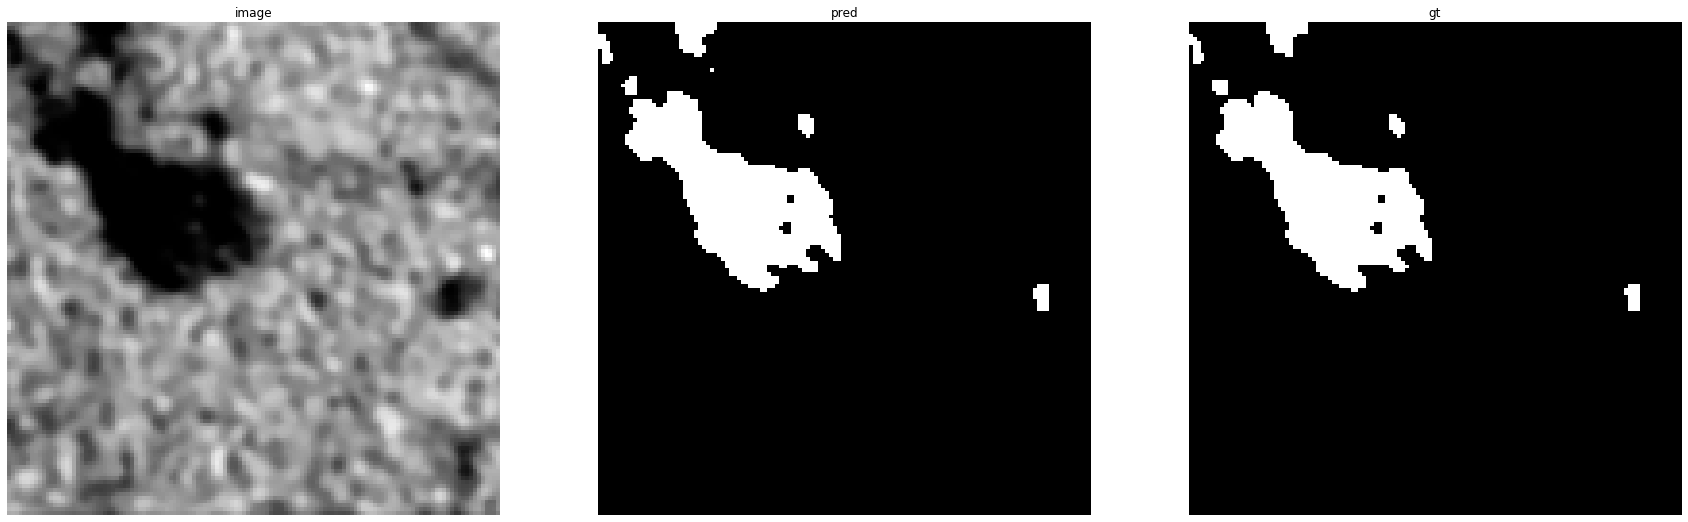

accuracy    : 0.99725341796875
precision   : 0.9770992366412213
recall      : 0.9915492957746479
f1          : 0.9842712338343237
pr_auc      : 0.9991567035617365
iou         : 0.969029593943565


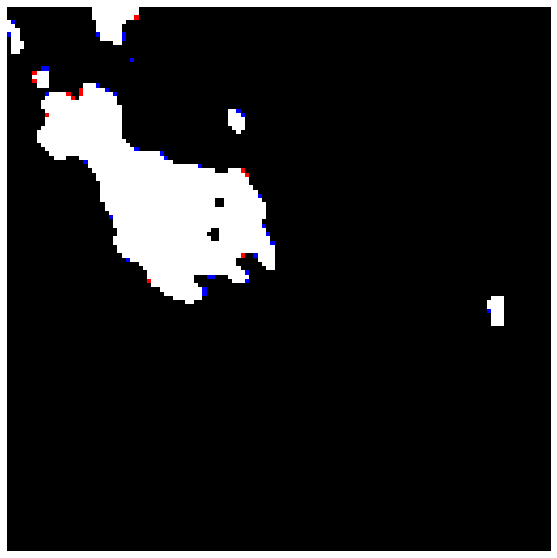

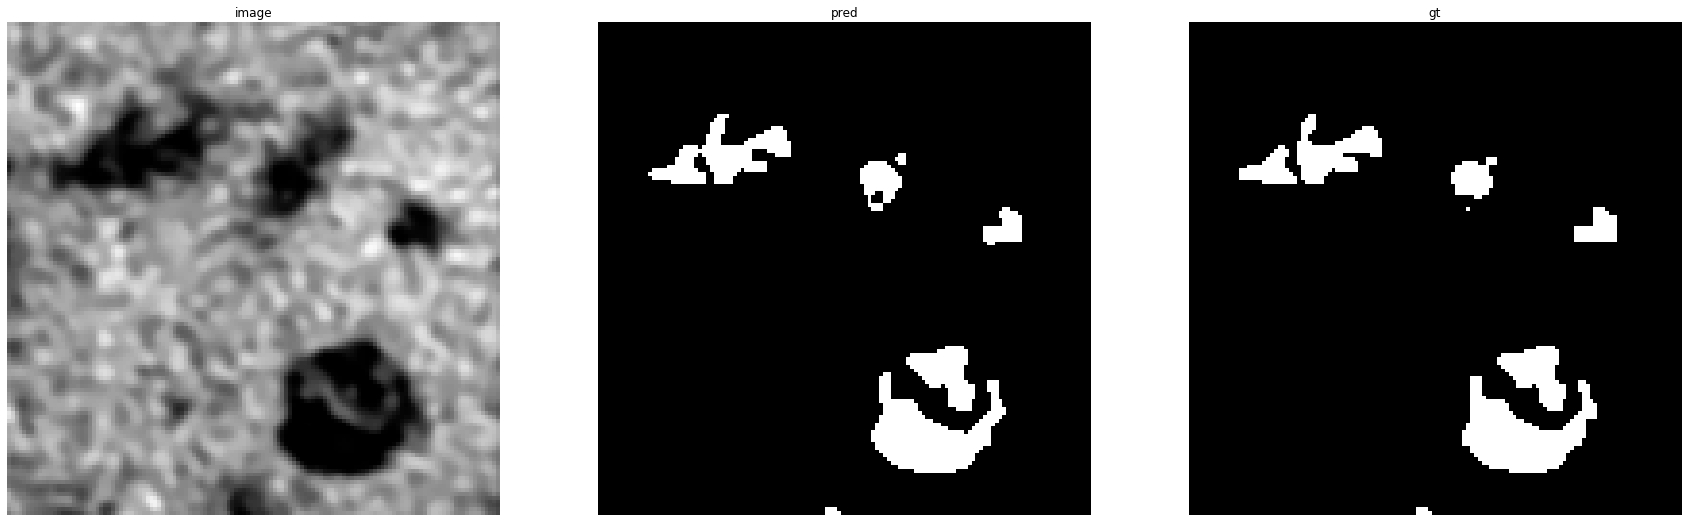

accuracy    : 0.99468994140625
precision   : 0.9595484477892756
recall      : 0.9586466165413534
f1          : 0.9590973201692524
pr_auc      : 0.9959714694672243
iou         : 0.9214092140921409


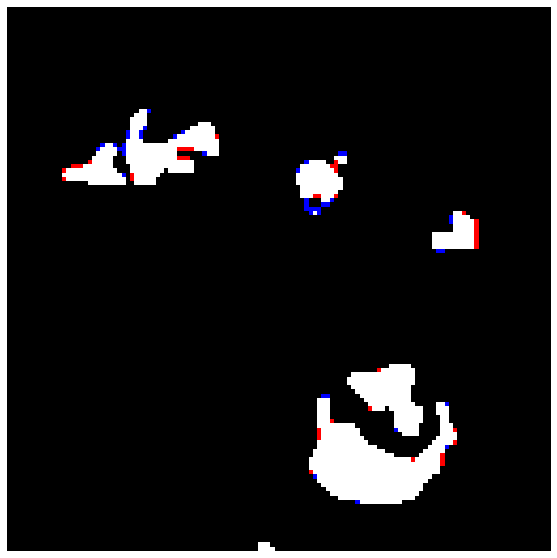

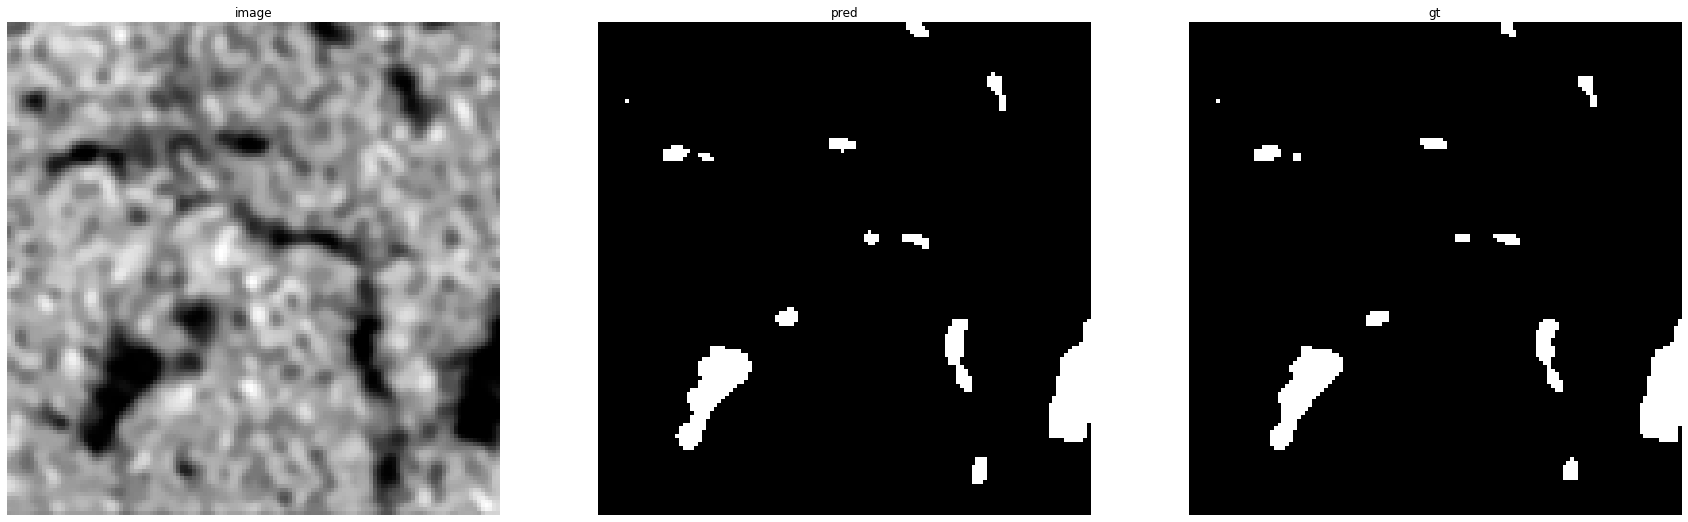

accuracy    : 0.9962158203125
precision   : 0.9352112676056338
recall      : 0.9764705882352941
f1          : 0.9553956834532373
pr_auc      : 0.9963087951474361
iou         : 0.9146005509641874


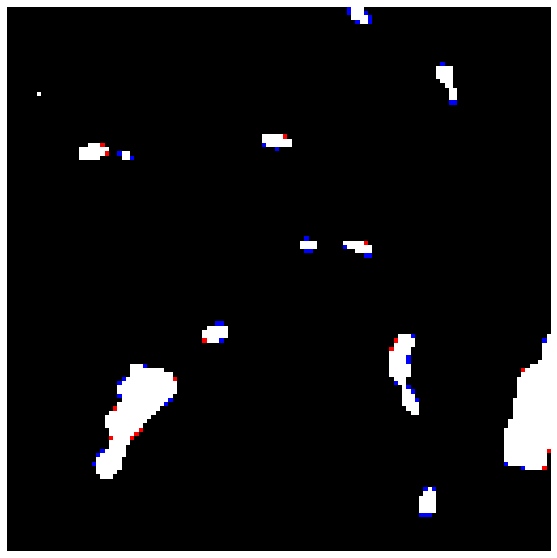

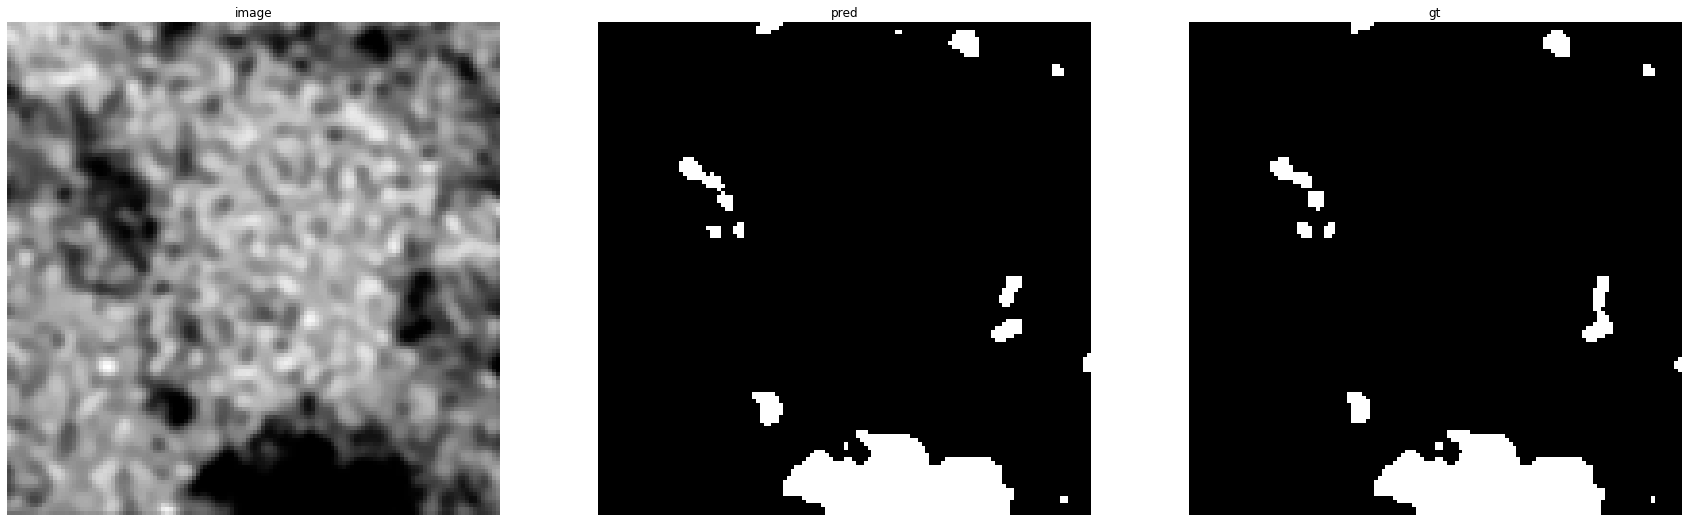

accuracy    : 0.99603271484375
precision   : 0.9673539518900344
recall      : 0.9765828274067649
f1          : 0.9719464825205005
pr_auc      : 0.9972117690122974
iou         : 0.945424013434089


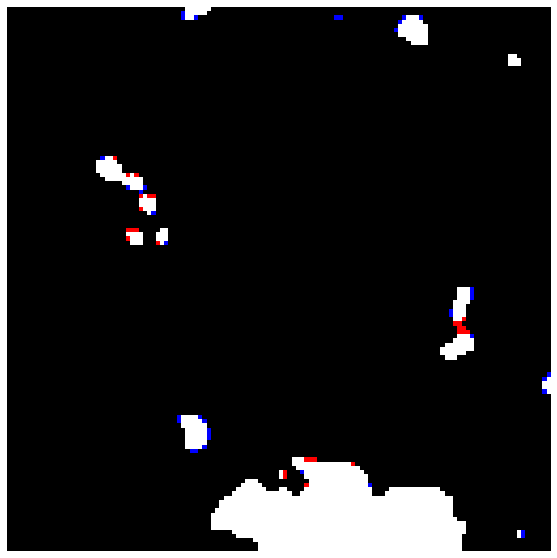

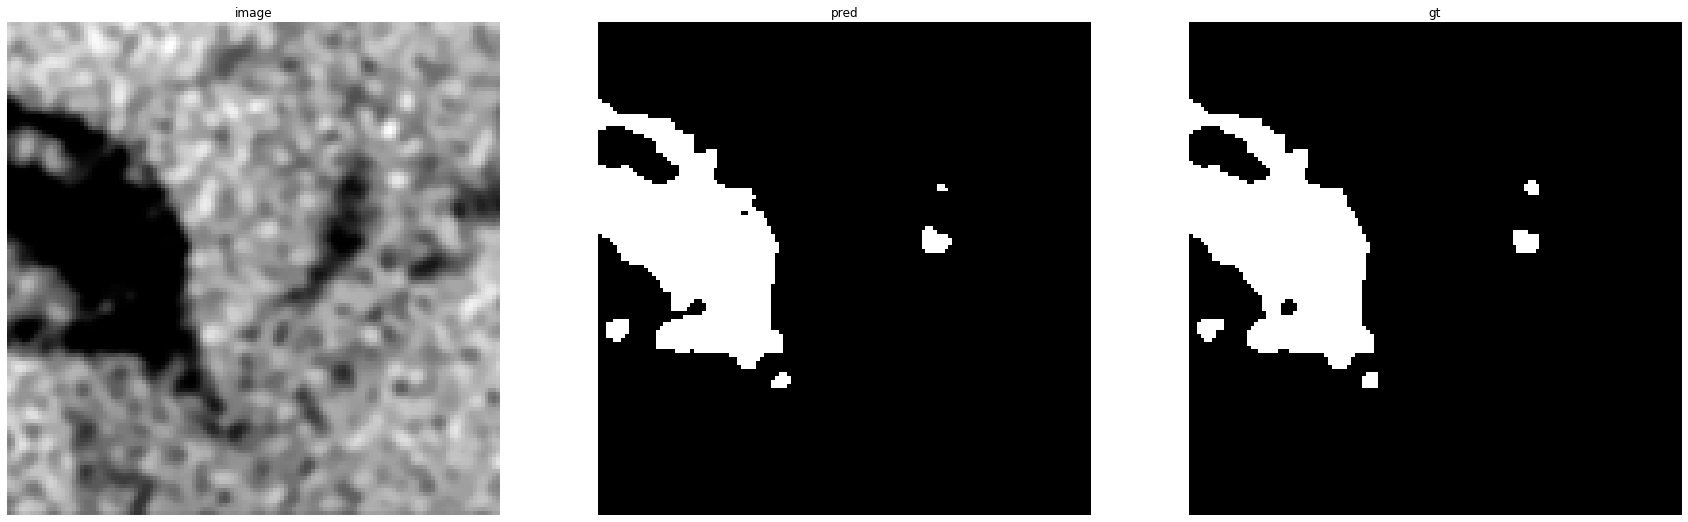

accuracy    : 0.99615478515625
precision   : 0.9911642411642412
recall      : 0.9764464925755248
f1          : 0.9837503224142379
pr_auc      : 0.9993261063180559
iou         : 0.968020304568528


Prediction for TeTree_subset1:


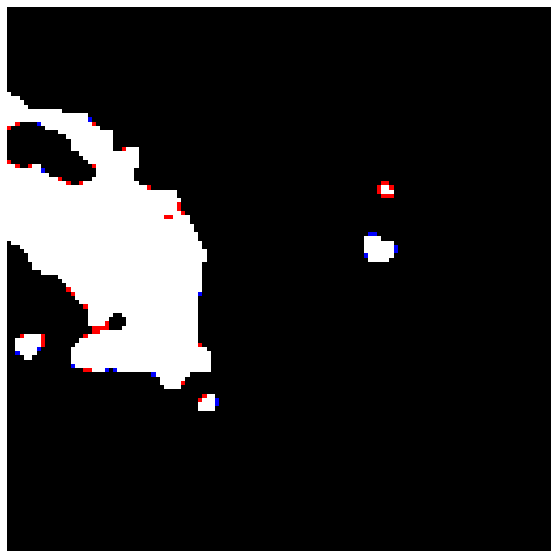

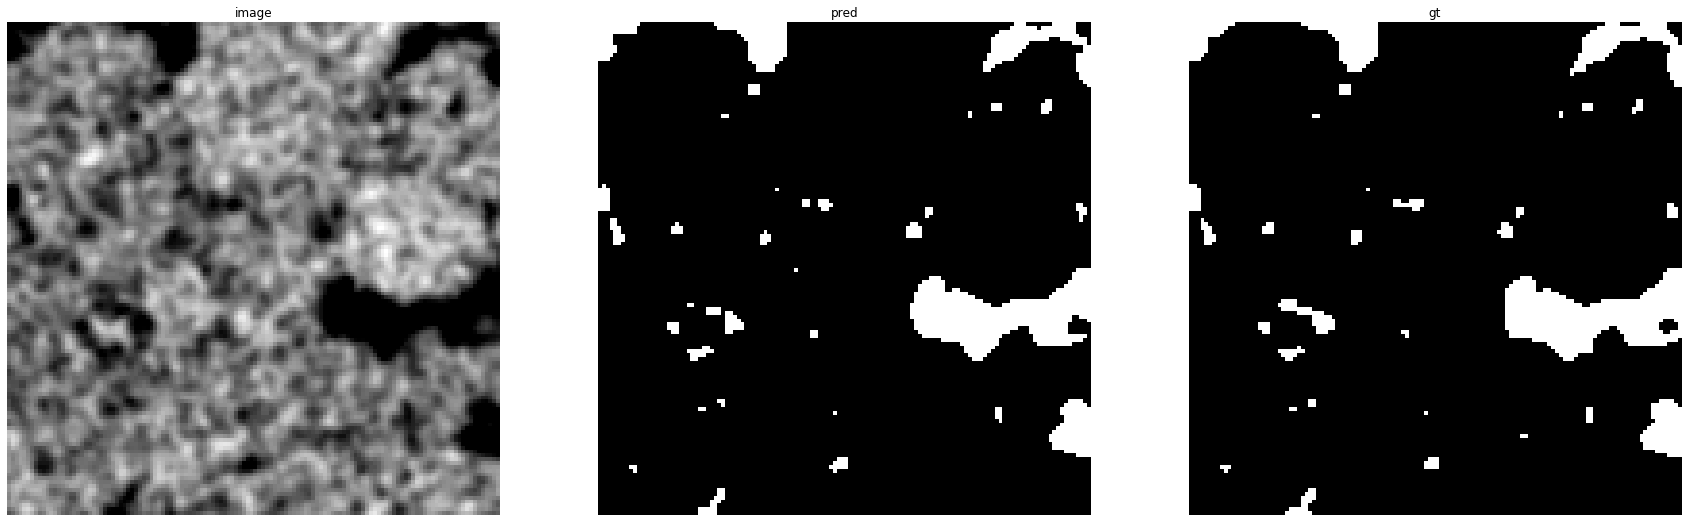

accuracy    : 0.99359130859375
precision   : 0.9863842662632375
recall      : 0.9374550682961897
f1          : 0.961297456690011
pr_auc      : 0.9959373402381475
iou         : 0.9254790631653655


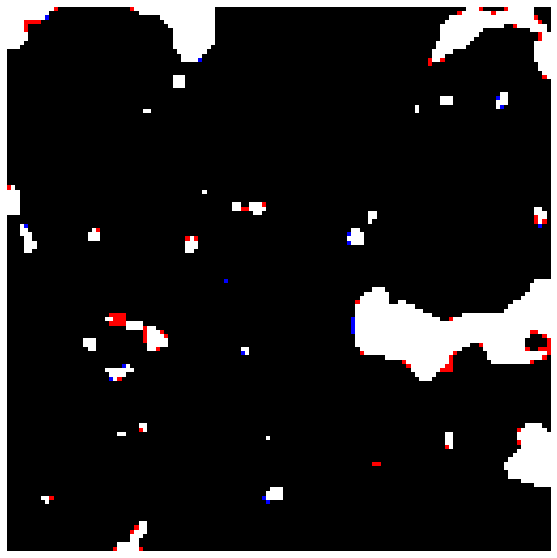

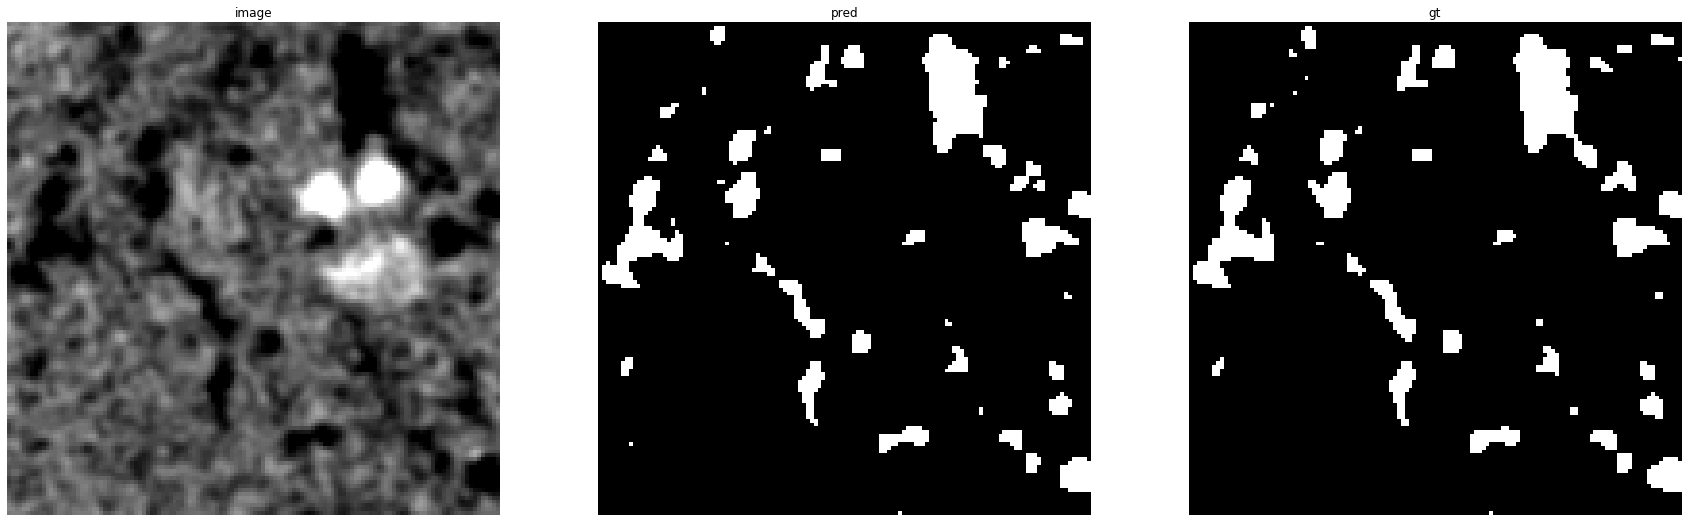

accuracy    : 0.99017333984375
precision   : 0.9870483980913429
recall      : 0.9106918238993711
f1          : 0.9473339875695126
pr_auc      : 0.9942019348271179
iou         : 0.8999378495960224


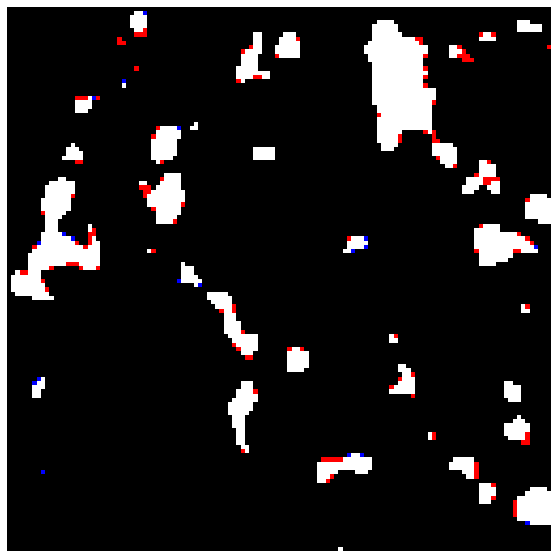

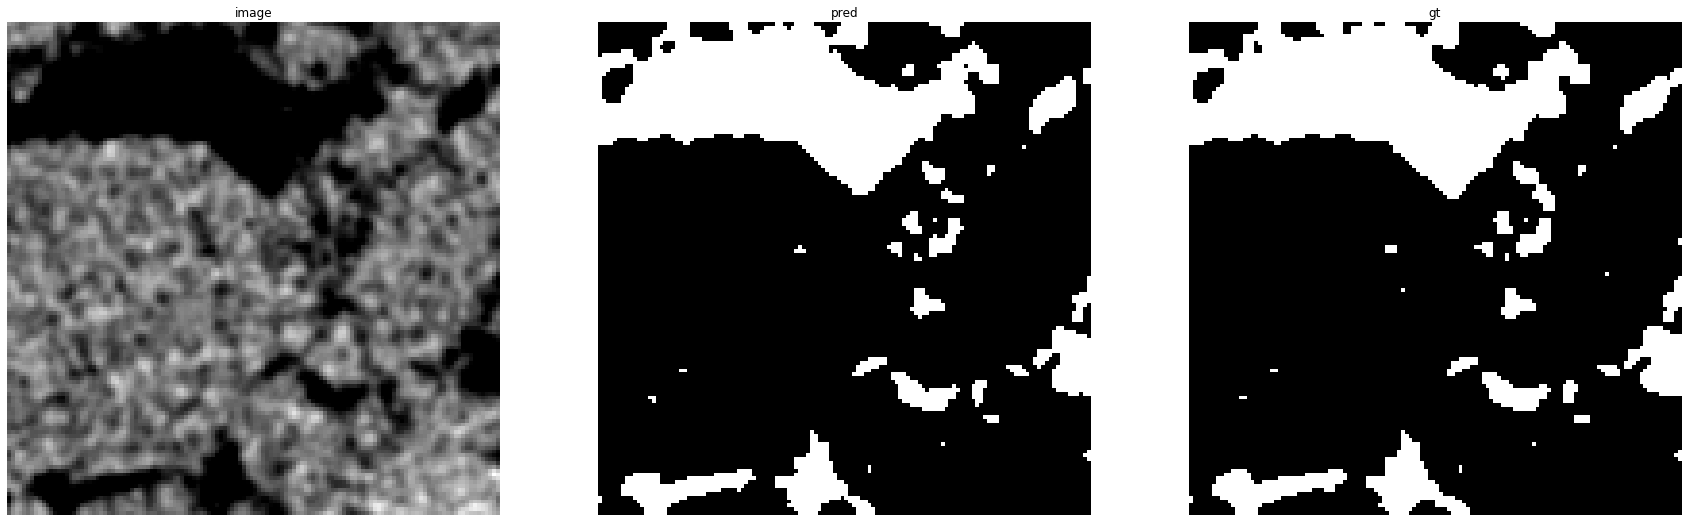

accuracy    : 0.9874267578125
precision   : 0.9963888888888889
recall      : 0.948941798941799
f1          : 0.9720867208672088
pr_auc      : 0.9990091250855707
iou         : 0.945689427893488


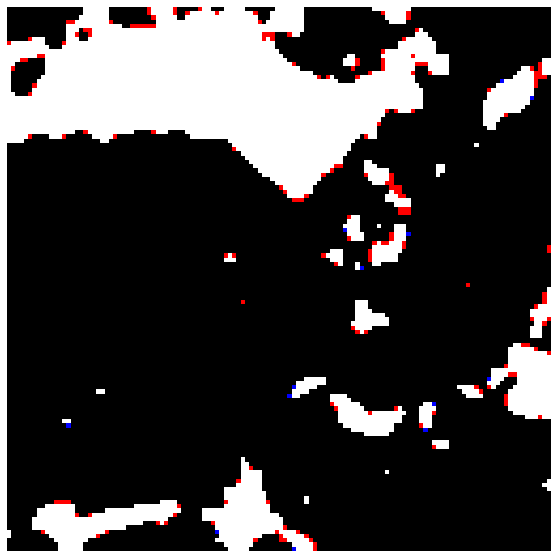

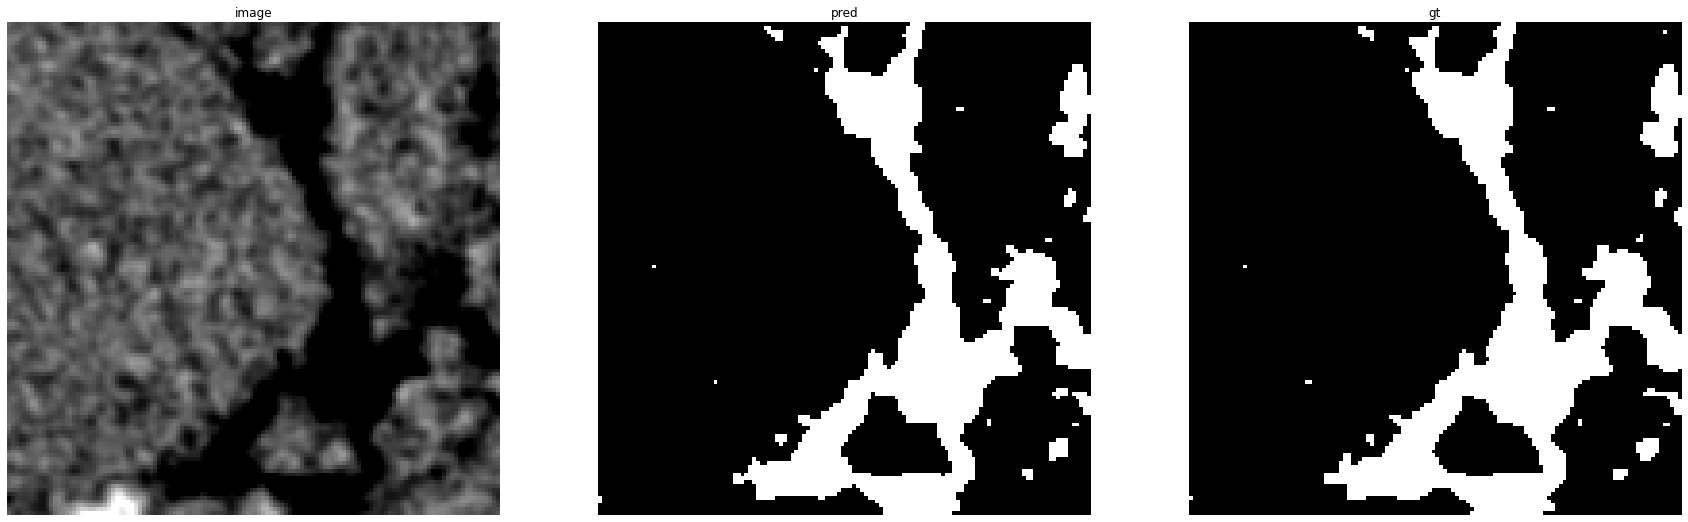

accuracy    : 0.98944091796875
precision   : 0.9947797716150082
recall      : 0.9510293200249532
f1          : 0.9724126933503427
pr_auc      : 0.9988567171278024
iou         : 0.9463066418373681


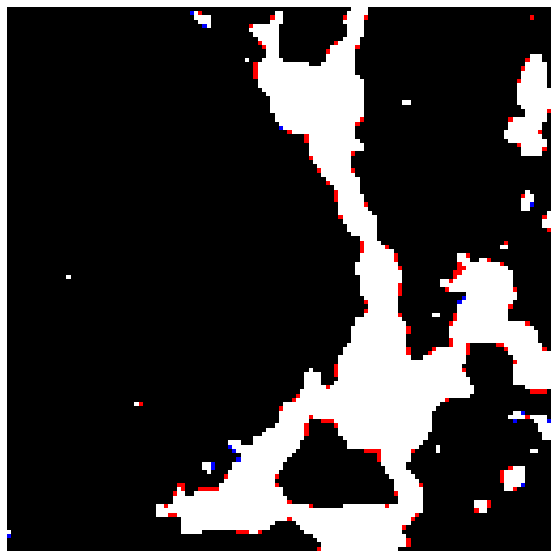

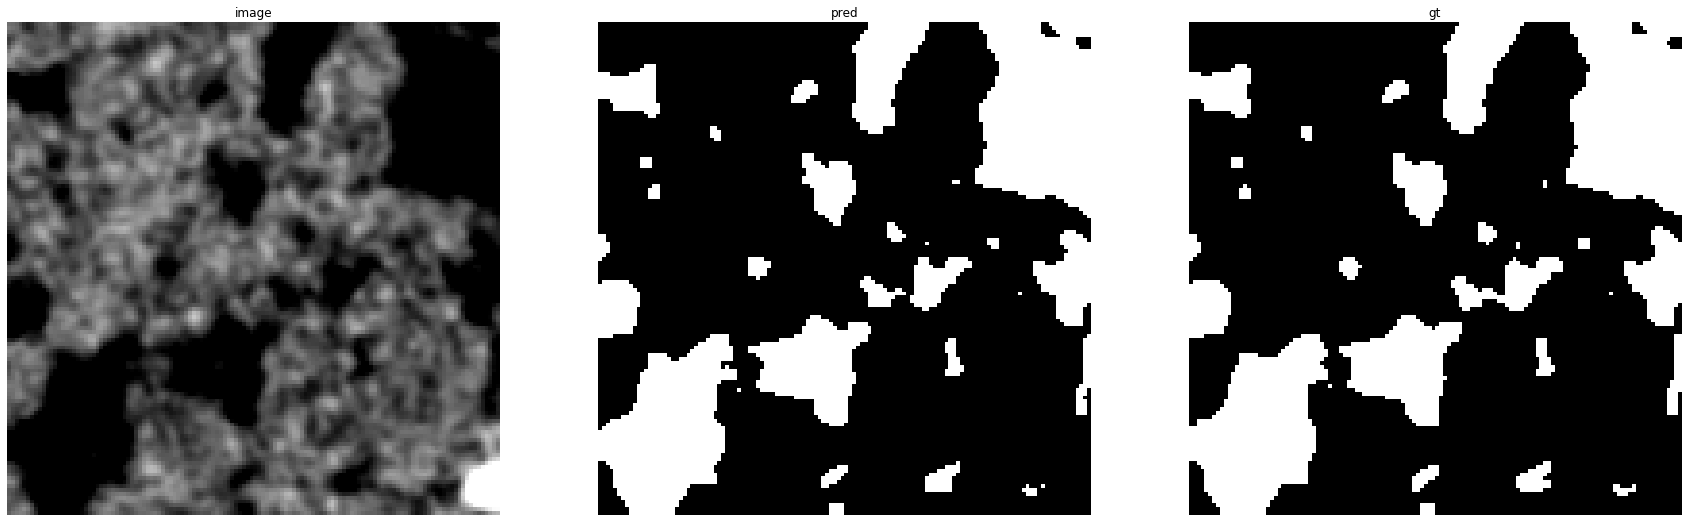

accuracy    : 0.9906005859375
precision   : 0.9958168719498025
recall      : 0.9692377290205836
f1          : 0.9823475469967904
pr_auc      : 0.9994486521948557
iou         : 0.9653075016895697


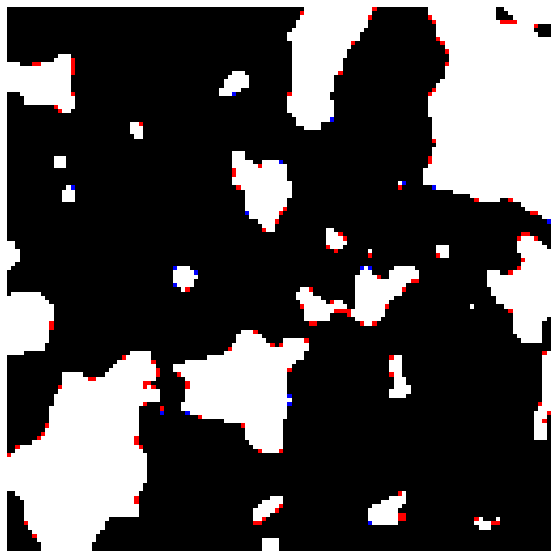

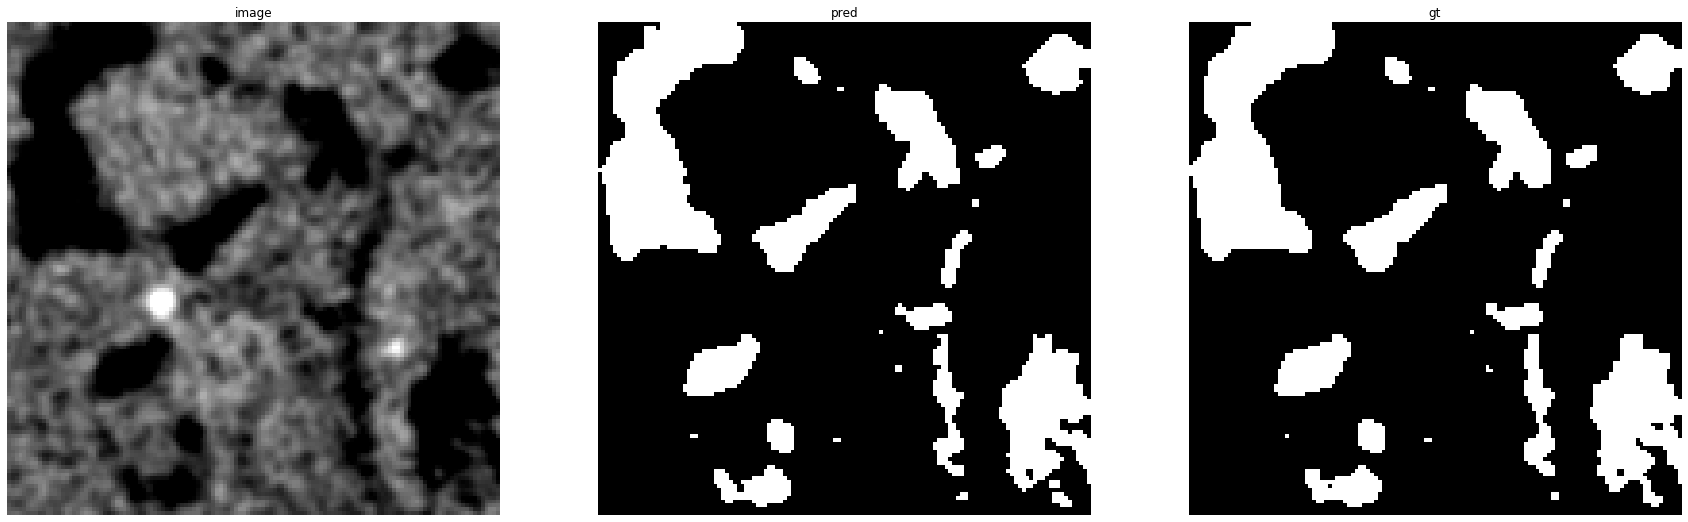

accuracy    : 0.99017333984375
precision   : 0.9964518036664696
recall      : 0.9576584256891162
f1          : 0.9766700478191567
pr_auc      : 0.9993332718572054
iou         : 0.9544038516001133


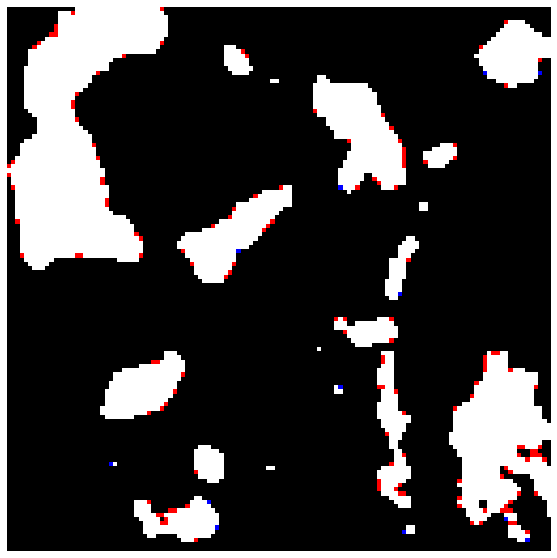

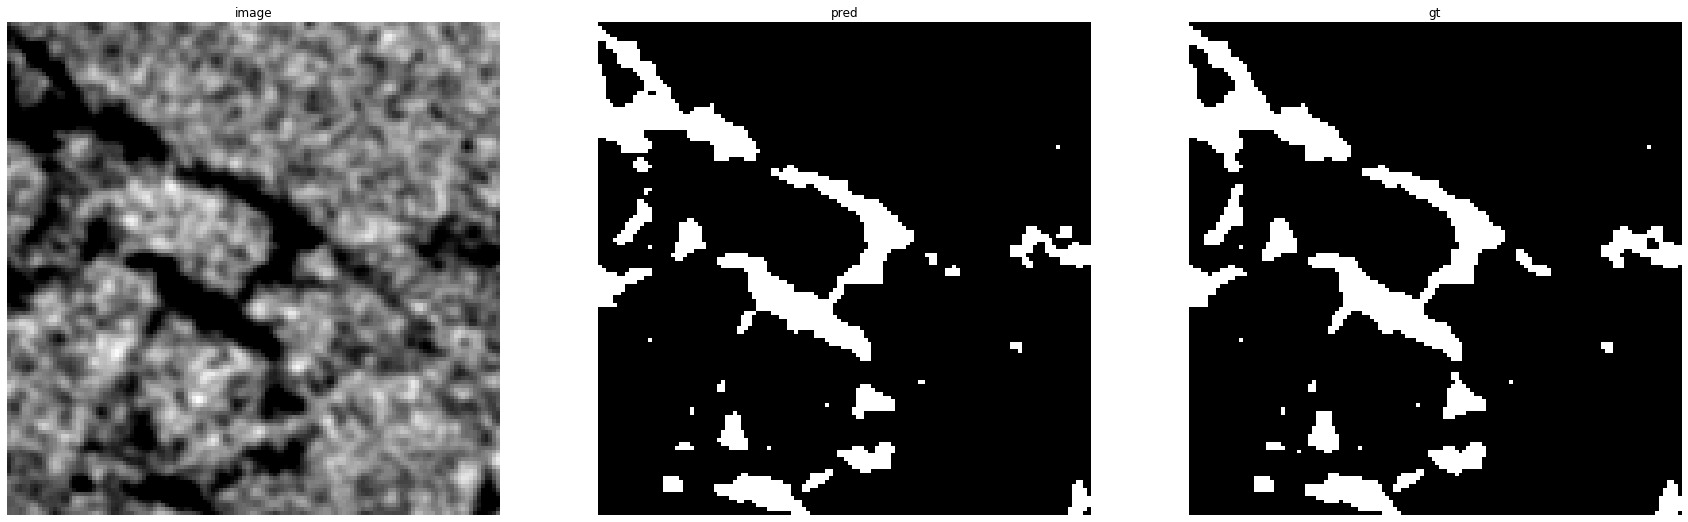

accuracy    : 0.98822021484375
precision   : 0.9943647540983607
recall      : 0.9142722562411681
f1          : 0.9526380368098158
pr_auc      : 0.9960496529890559
iou         : 0.9095595126522962


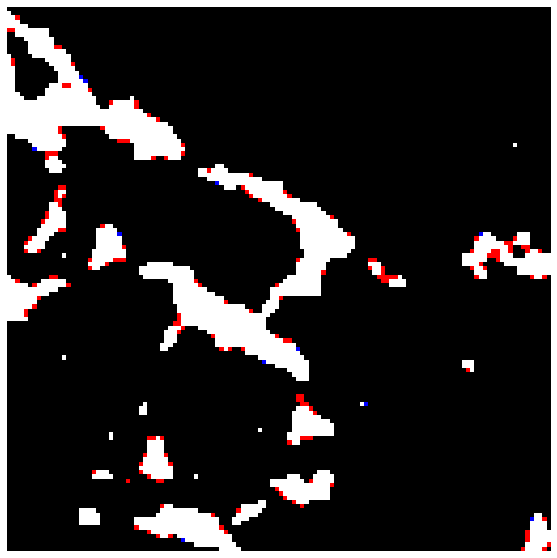

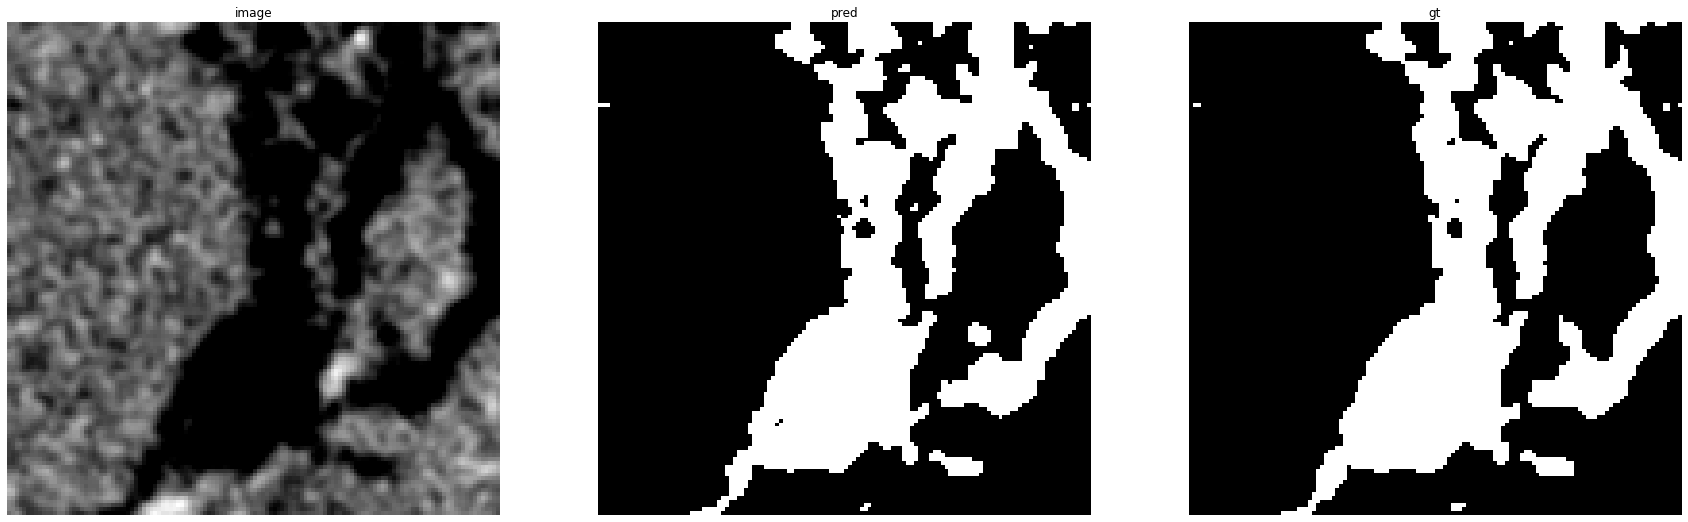

accuracy    : 0.98480224609375
precision   : 0.9966791199667911
recall      : 0.9537239324726912
f1          : 0.9747285090835279
pr_auc      : 0.9993408904488909
iou         : 0.9507028311225499


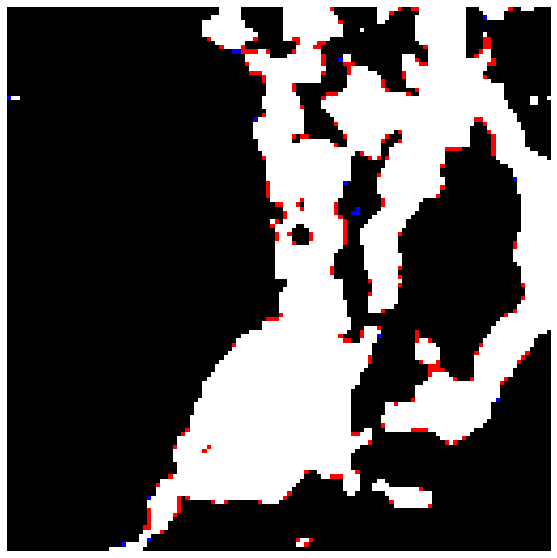

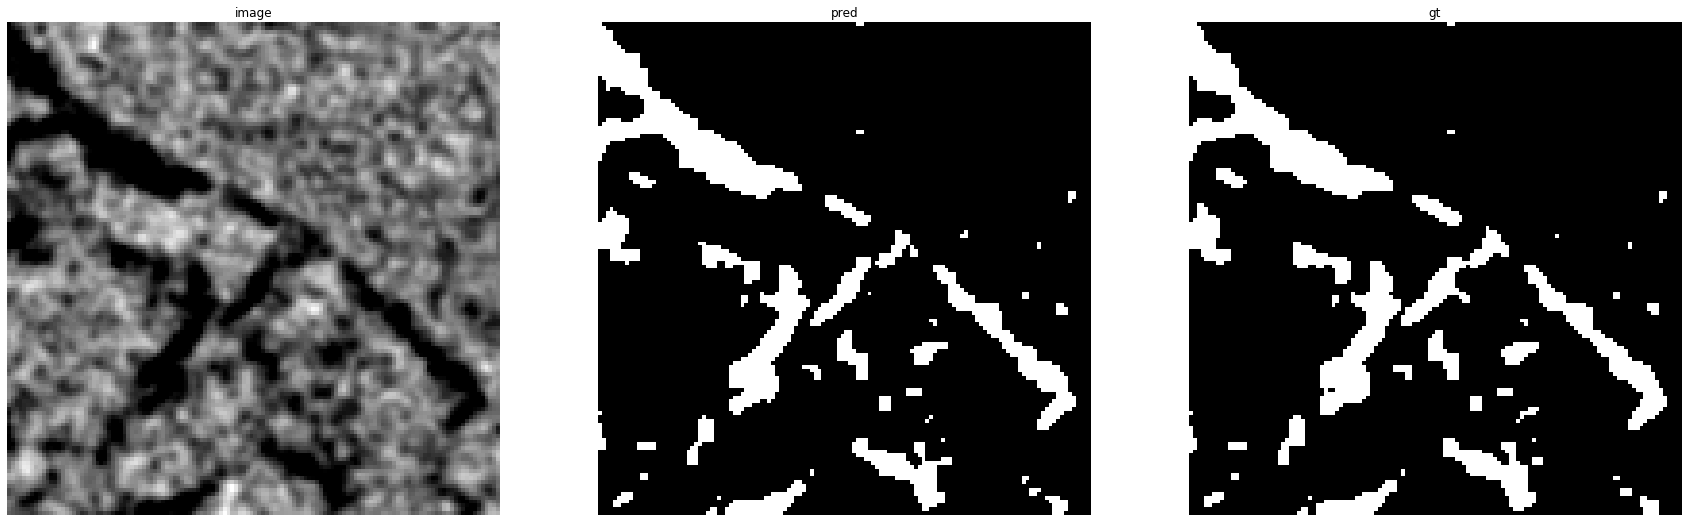

accuracy    : 0.98785400390625
precision   : 0.987329892069451
recall      : 0.9244288224956063
f1          : 0.9548445654640345
pr_auc      : 0.9959970196627768
iou         : 0.9135909683022145


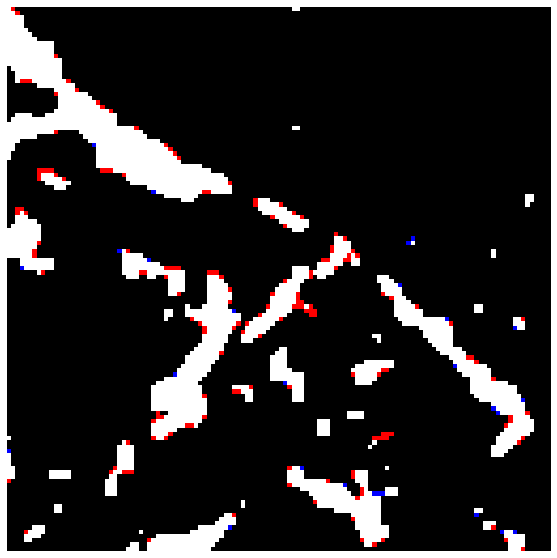

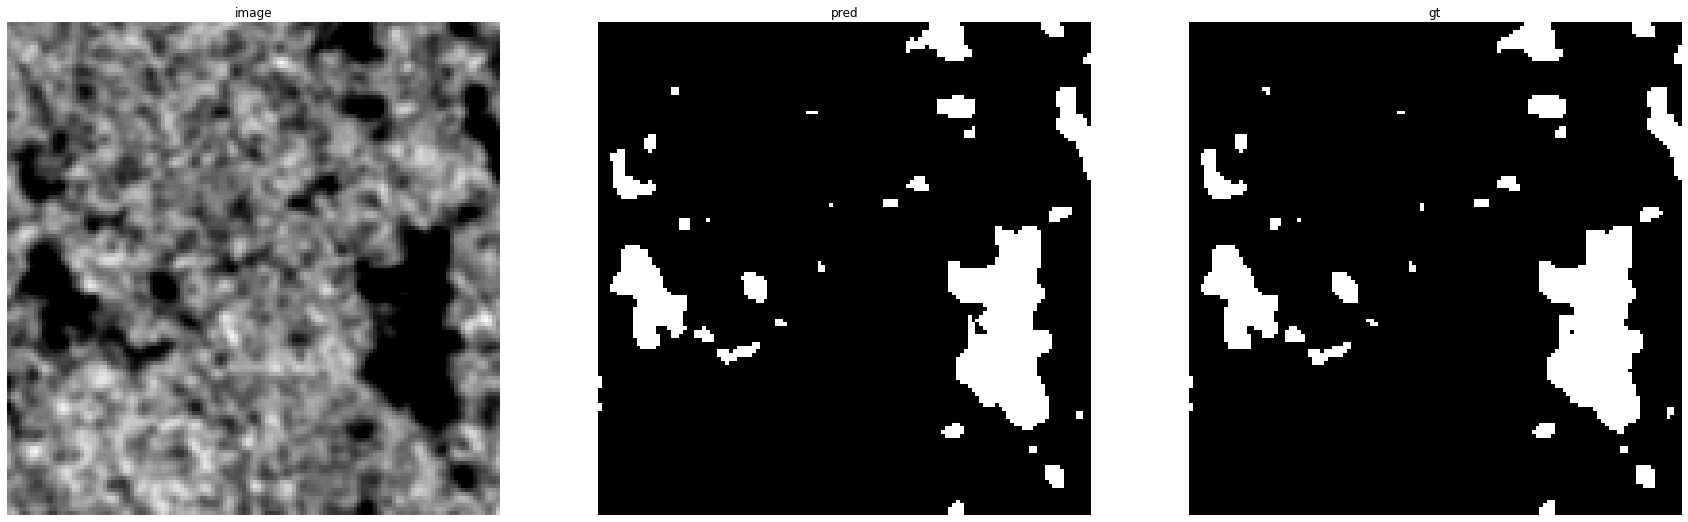

accuracy    : 0.9940185546875
precision   : 0.9904655075715086
recall      : 0.9561451001624256
f1          : 0.9730027548209366
pr_auc      : 0.9981421597323252
iou         : 0.9474248927038627


Prediction for TiTree_subset2:


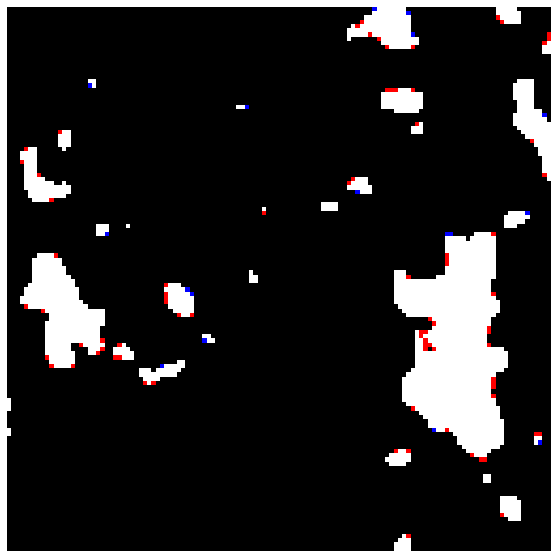

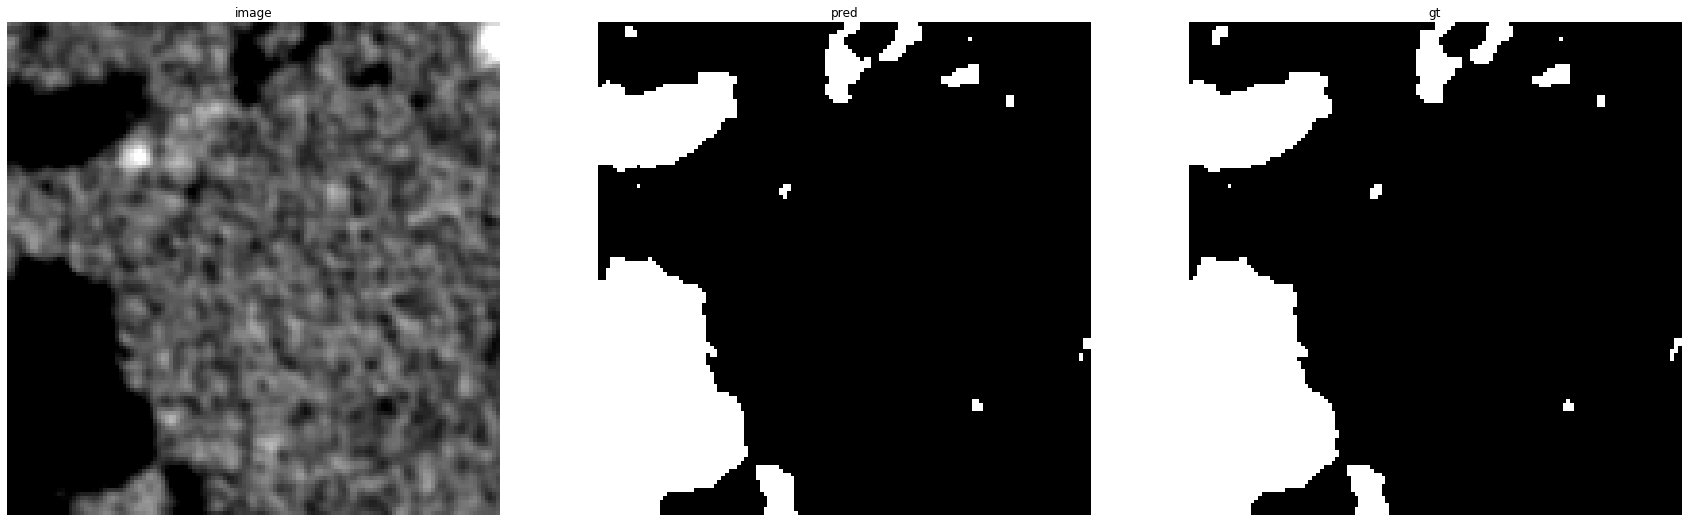

accuracy    : 0.99517822265625
precision   : 0.9963173752929361
recall      : 0.9776609724047306
f1          : 0.9869010114408887
pr_auc      : 0.9996404286811473
iou         : 0.9741407528641571


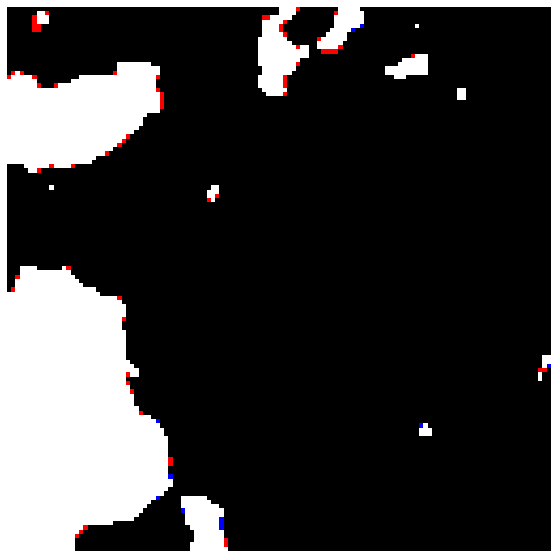

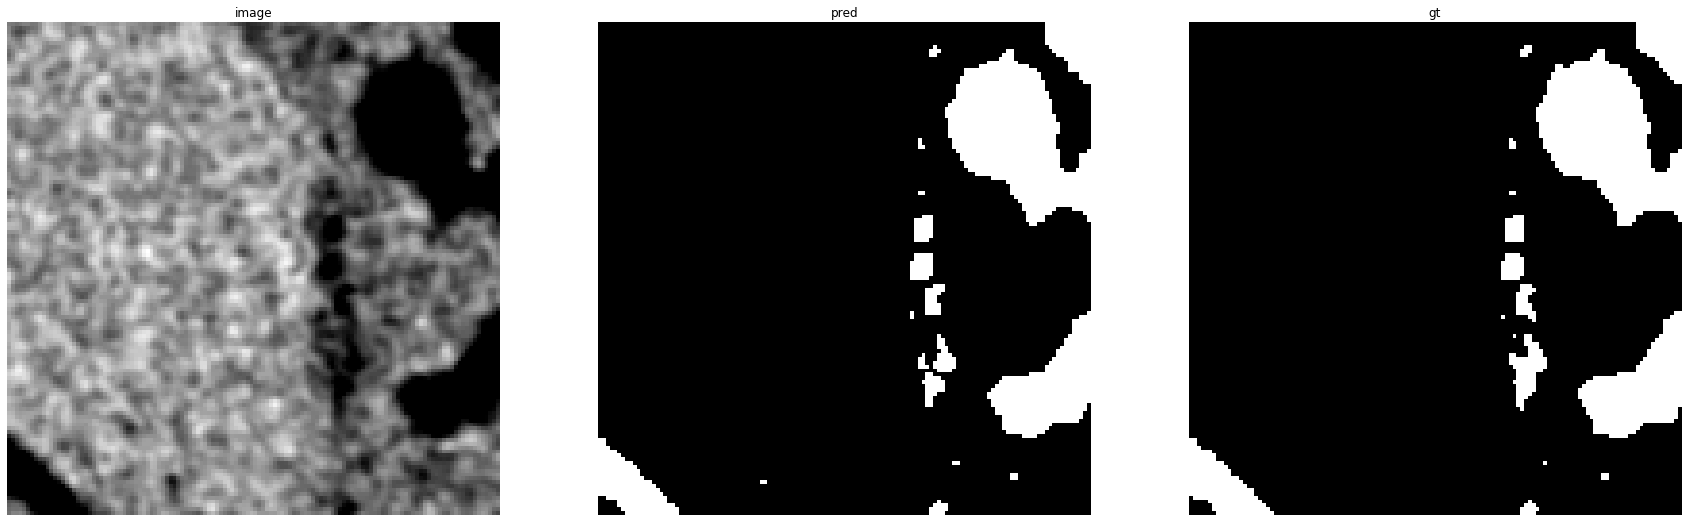

accuracy    : 0.99481201171875
precision   : 0.9929789368104313
recall      : 0.9653827401267674
f1          : 0.9789864029666254
pr_auc      : 0.9993106161414083
iou         : 0.9588377723970944


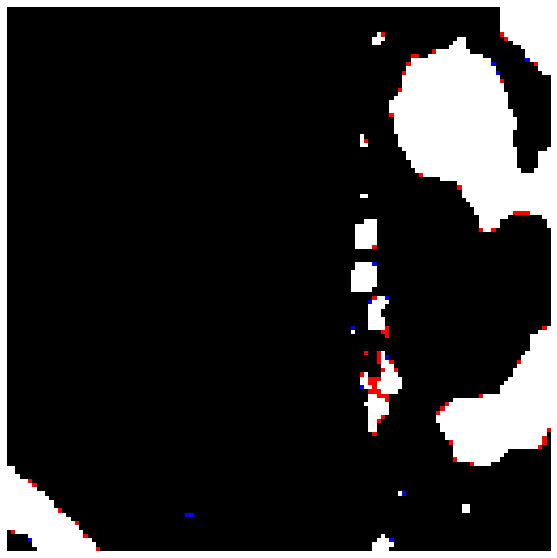

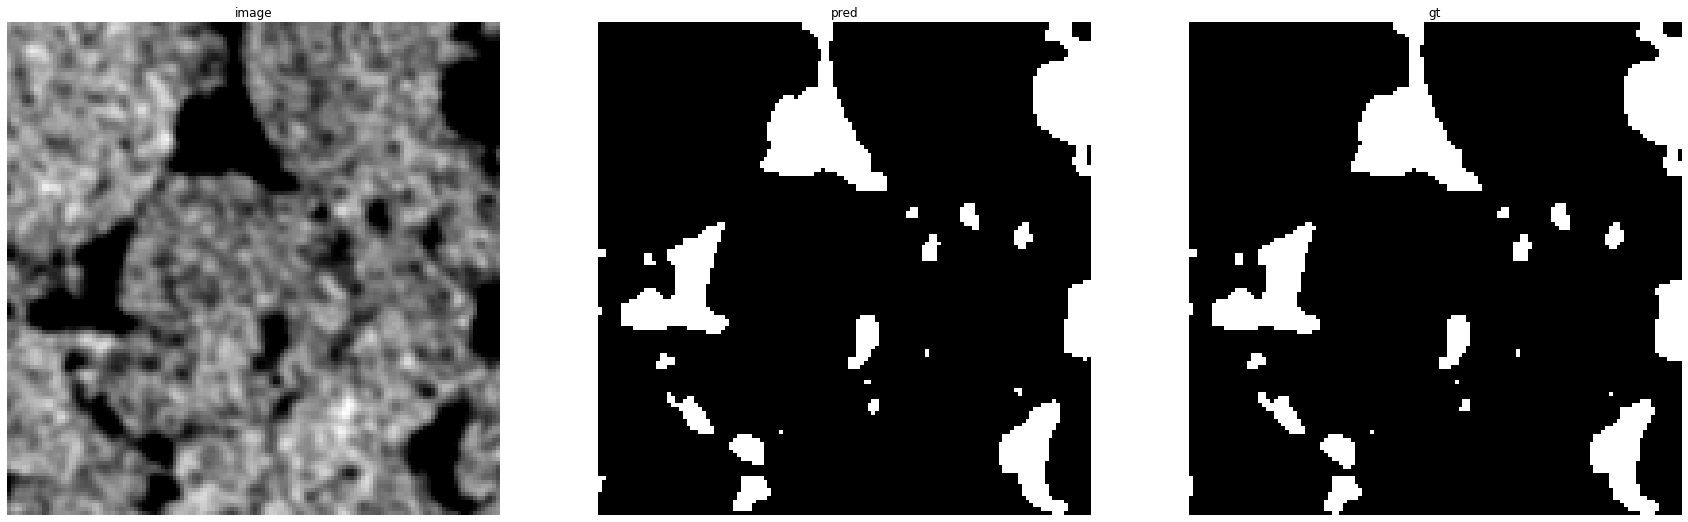

accuracy    : 0.99456787109375
precision   : 0.9939110070257611
recall      : 0.9654231119199272
f1          : 0.979459958458343
pr_auc      : 0.999241449993251
iou         : 0.9597467209407508


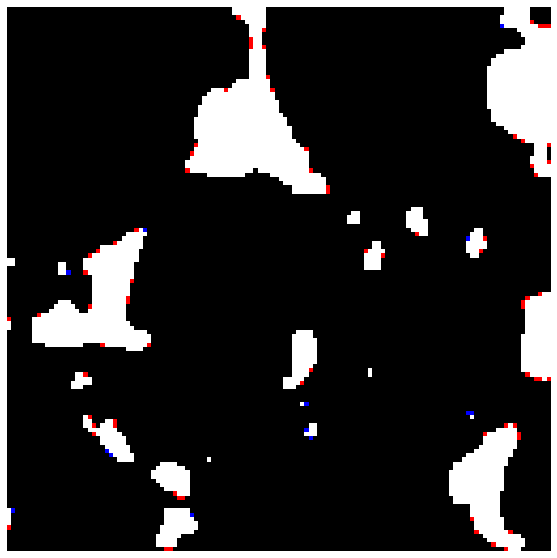

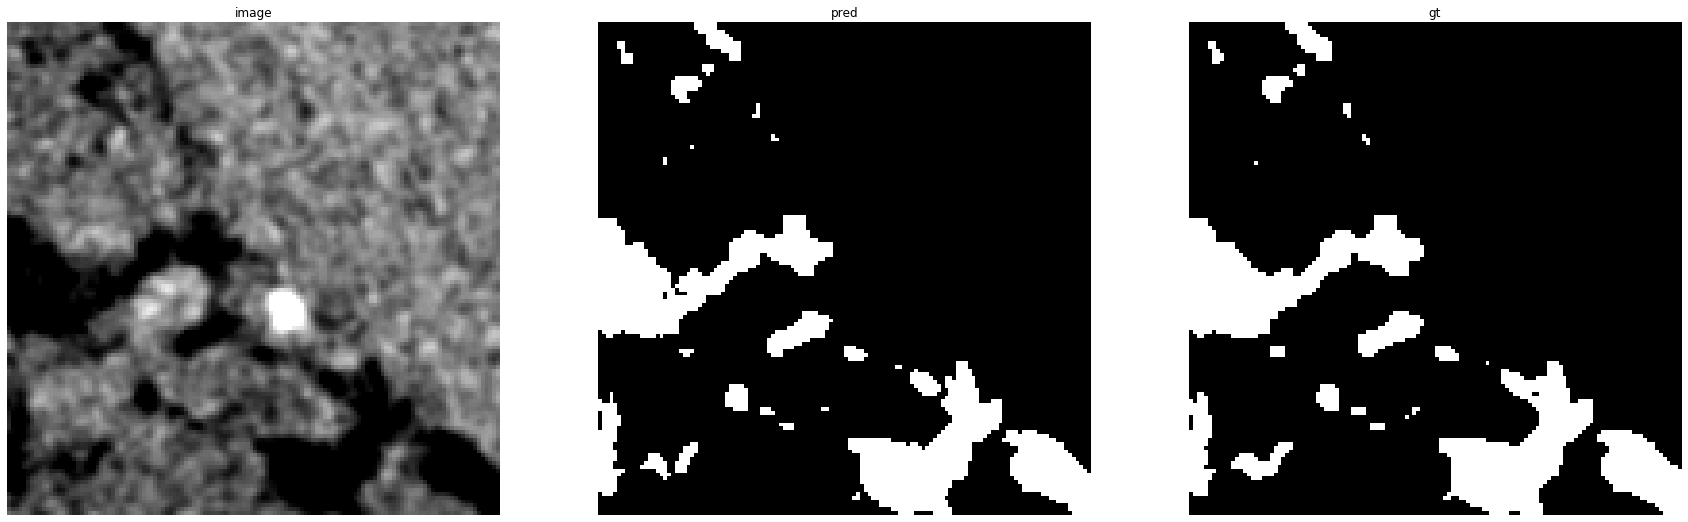

accuracy    : 0.99029541015625
precision   : 0.9931682322801024
recall      : 0.9420818144997974
f1          : 0.96695073789233
pr_auc      : 0.9985218890721361
iou         : 0.9360160965794768


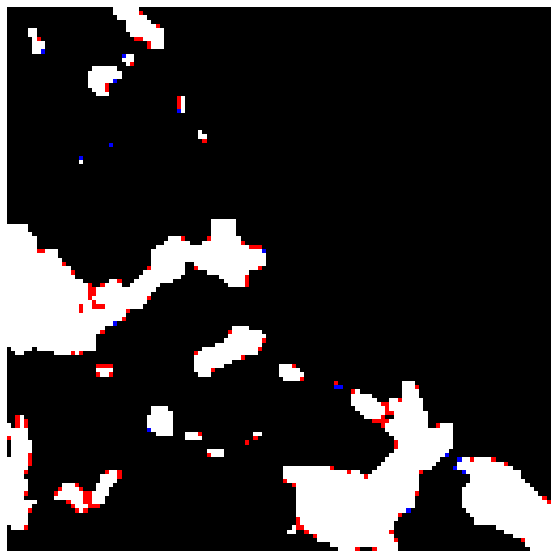

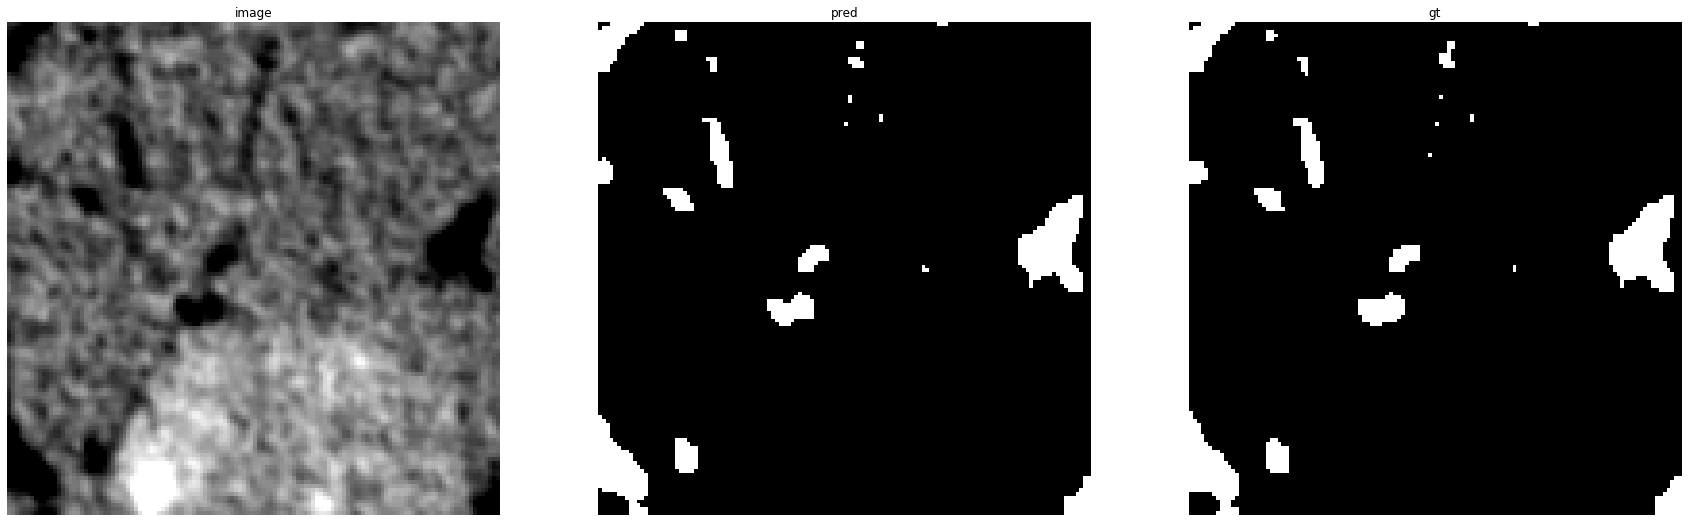

accuracy    : 0.99639892578125
precision   : 0.9877641824249166
recall      : 0.9487179487179487
f1          : 0.9678474114441417
pr_auc      : 0.9978211475270536
iou         : 0.9376979936642027


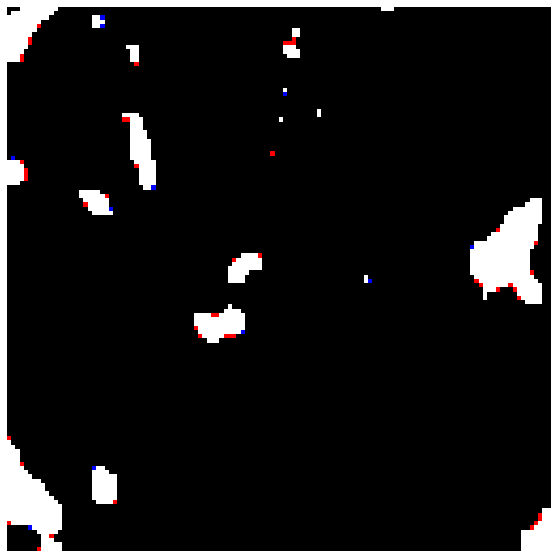

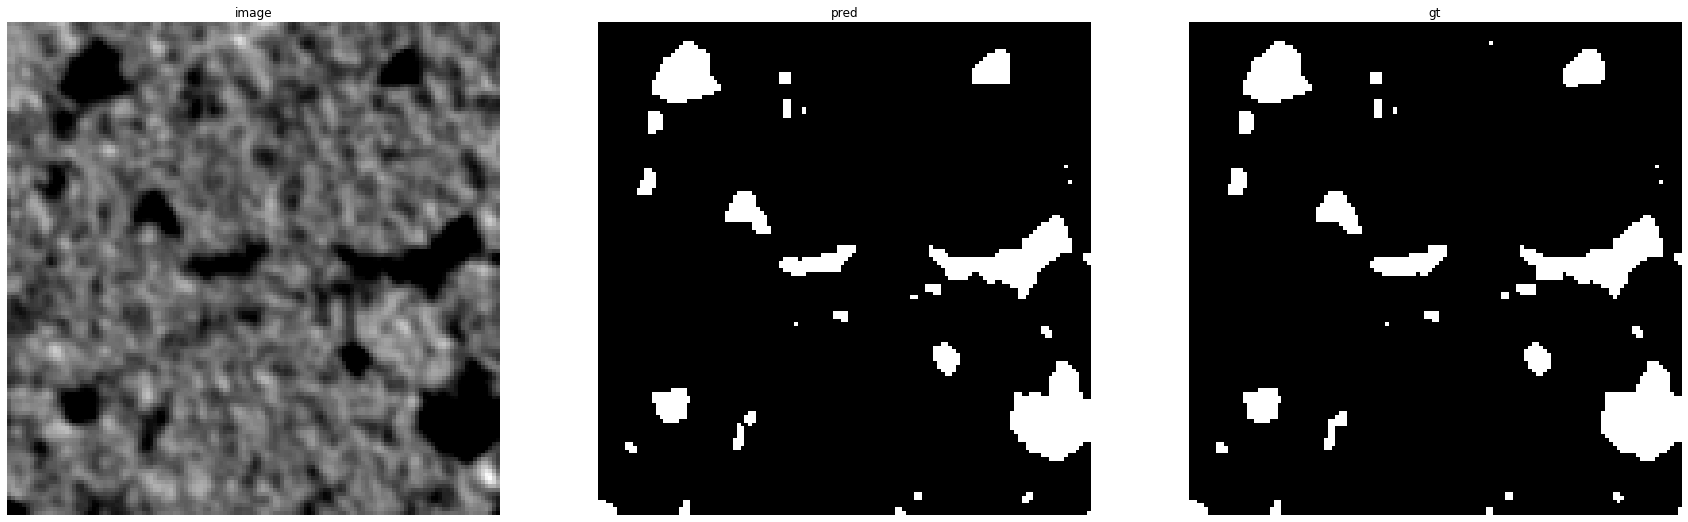

accuracy    : 0.9952392578125
precision   : 0.9949090909090909
recall      : 0.9506601806810285
f1          : 0.9722814498933902
pr_auc      : 0.9984049513264214
iou         : 0.946058091286307


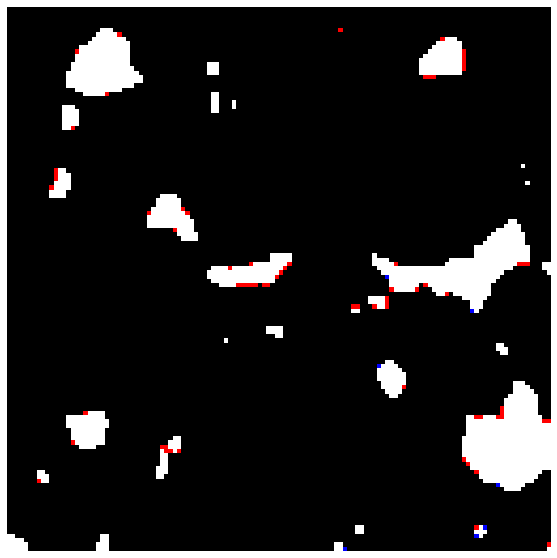

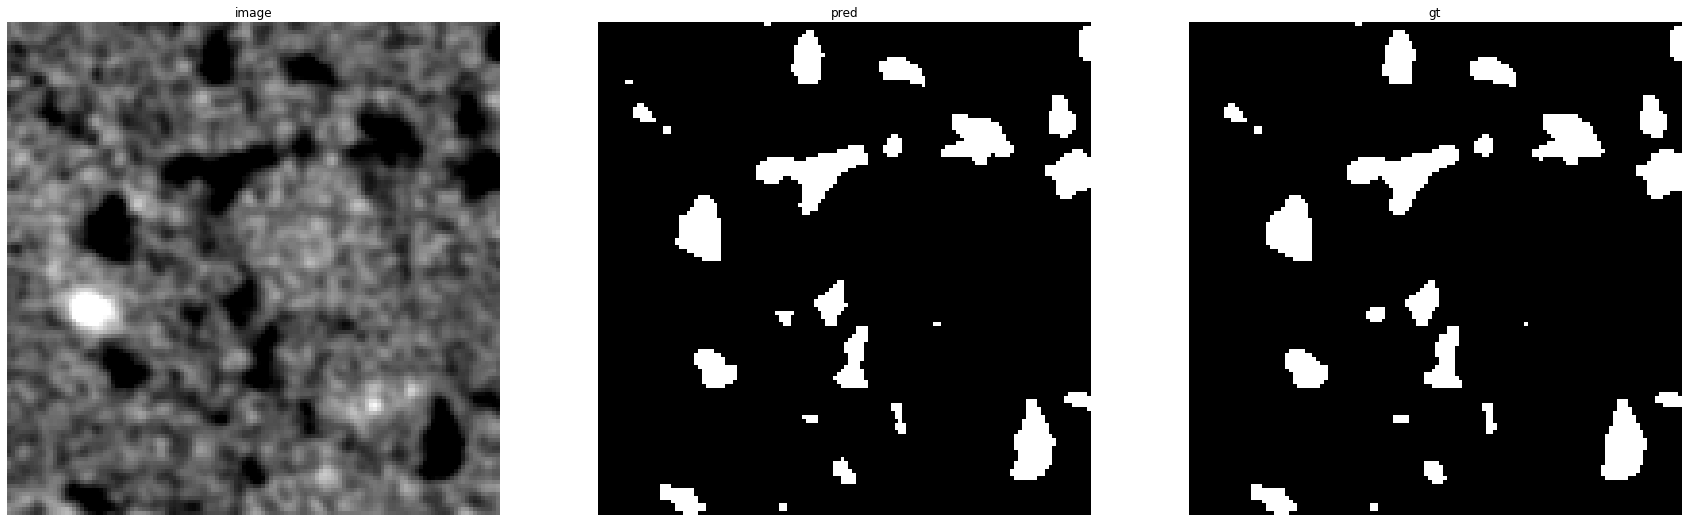

accuracy    : 0.99395751953125
precision   : 0.9874913134120917
recall      : 0.9460719041278296
f1          : 0.9663379802788167
pr_auc      : 0.998106939356904
iou         : 0.9348684210526316


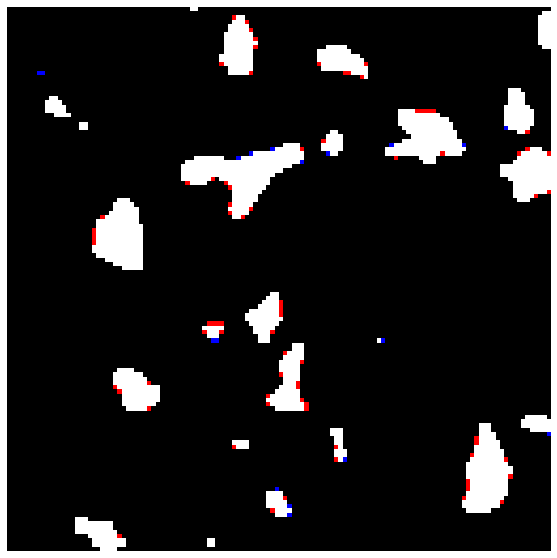

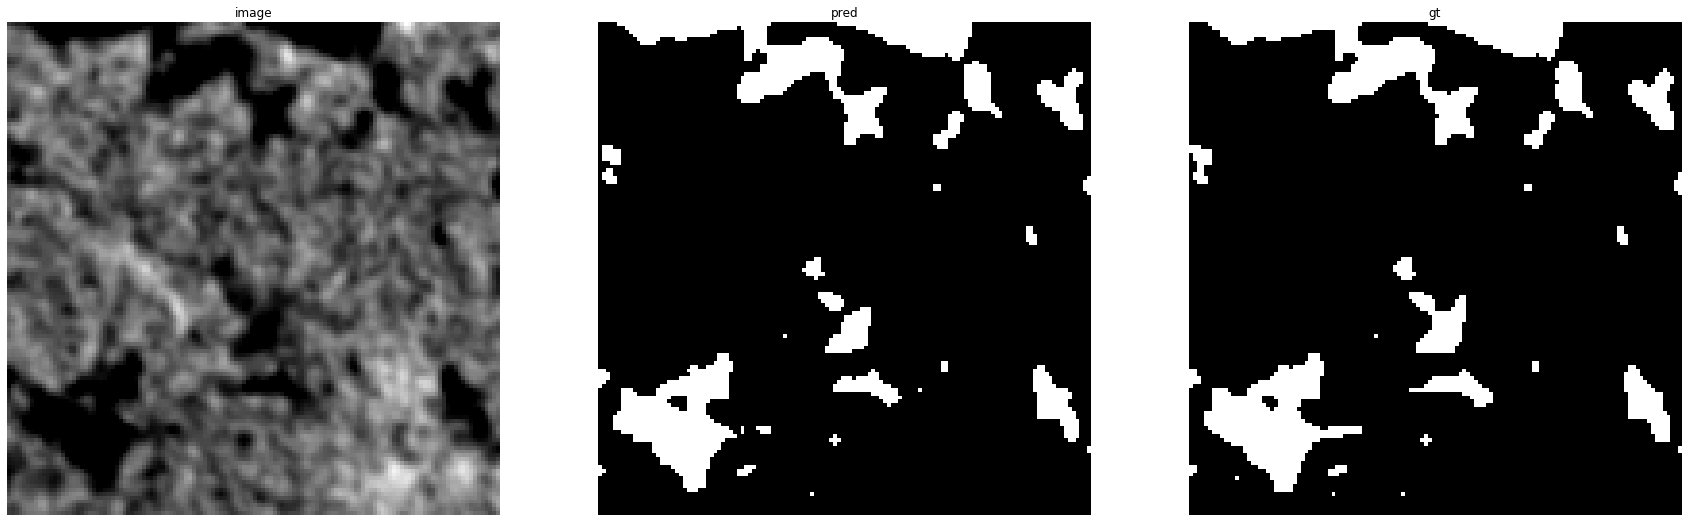

accuracy    : 0.9906005859375
precision   : 0.9924774322968907
recall      : 0.9343720491029273
f1          : 0.9625486381322956
pr_auc      : 0.9976961307645179
iou         : 0.9278012189404594


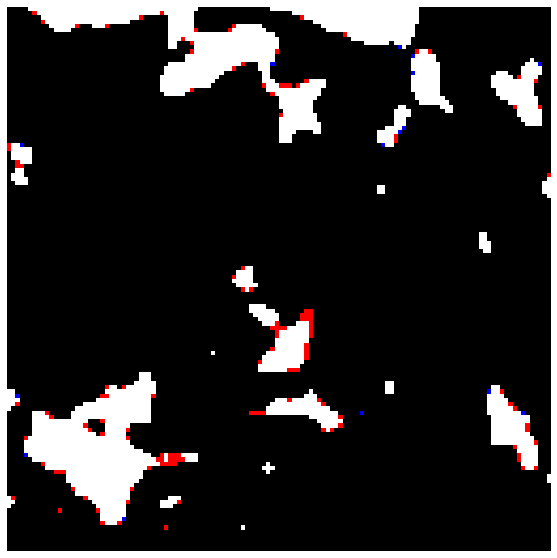

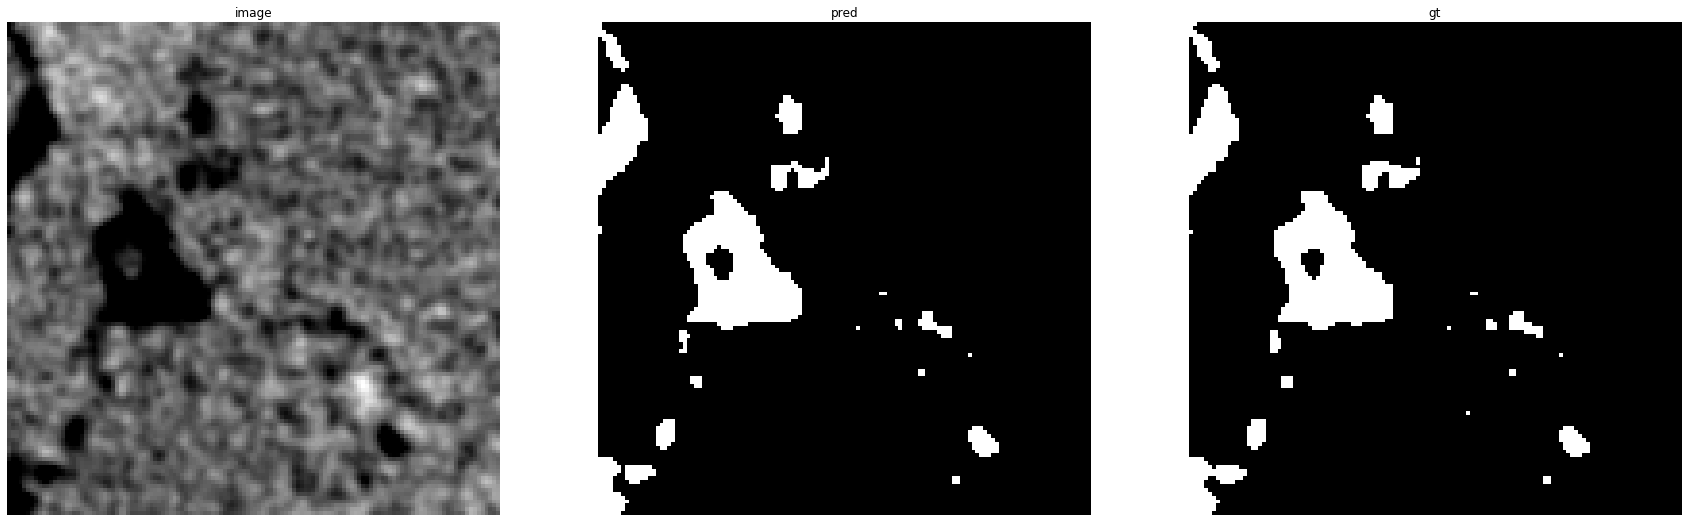

accuracy    : 0.9949951171875
precision   : 0.9937254901960785
recall      : 0.9448173005219985
f1          : 0.9686544342507645
pr_auc      : 0.9983143183997438
iou         : 0.9392142327650111


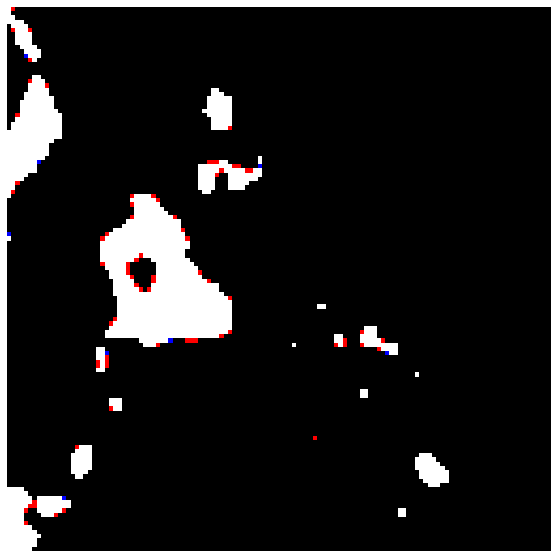

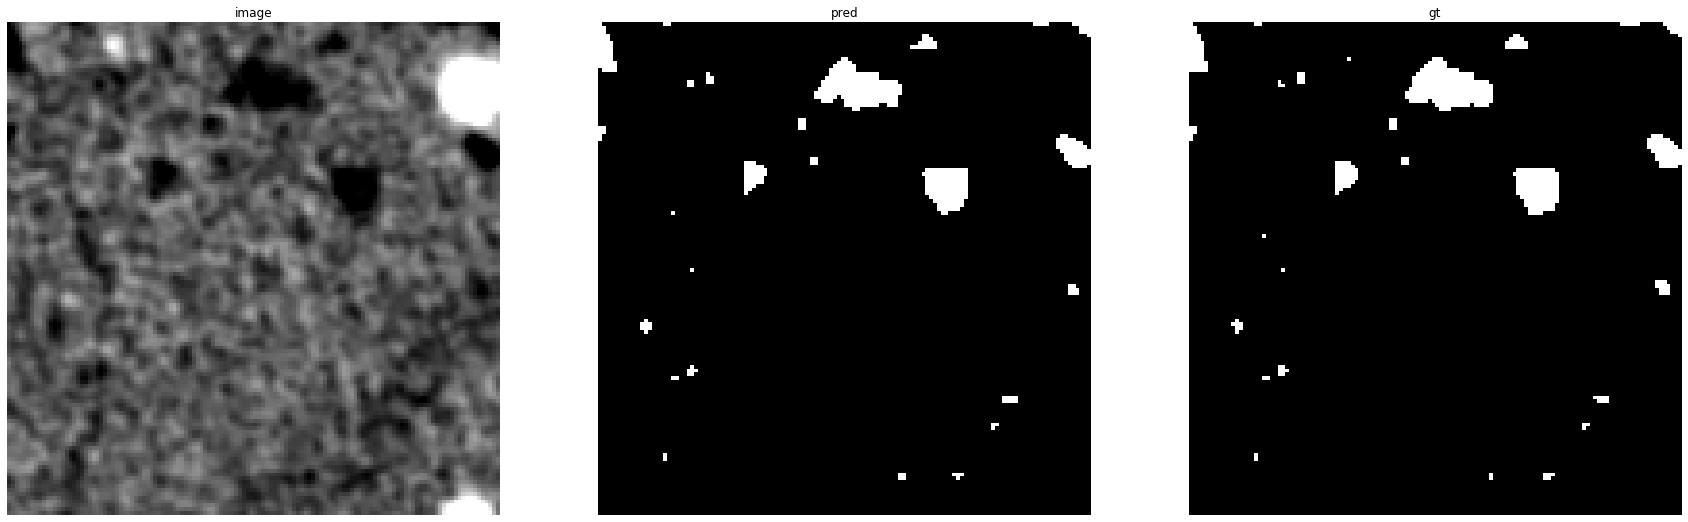

accuracy    : 0.99688720703125
precision   : 0.9851024208566108
recall      : 0.9248251748251748
f1          : 0.9540126239855726
pr_auc      : 0.9941621519565242
iou         : 0.9120689655172414


Prediction for Urna_22:


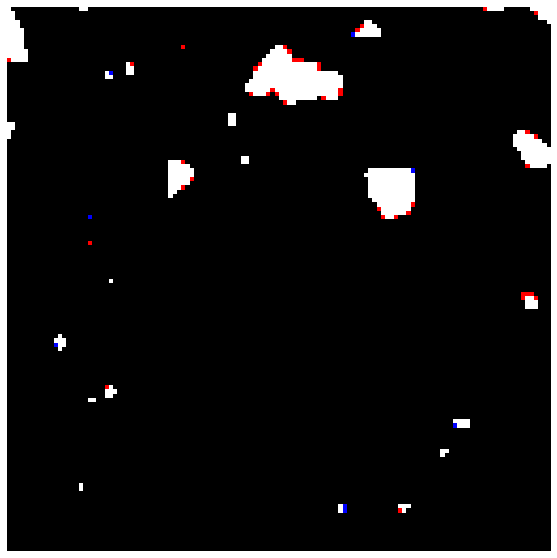

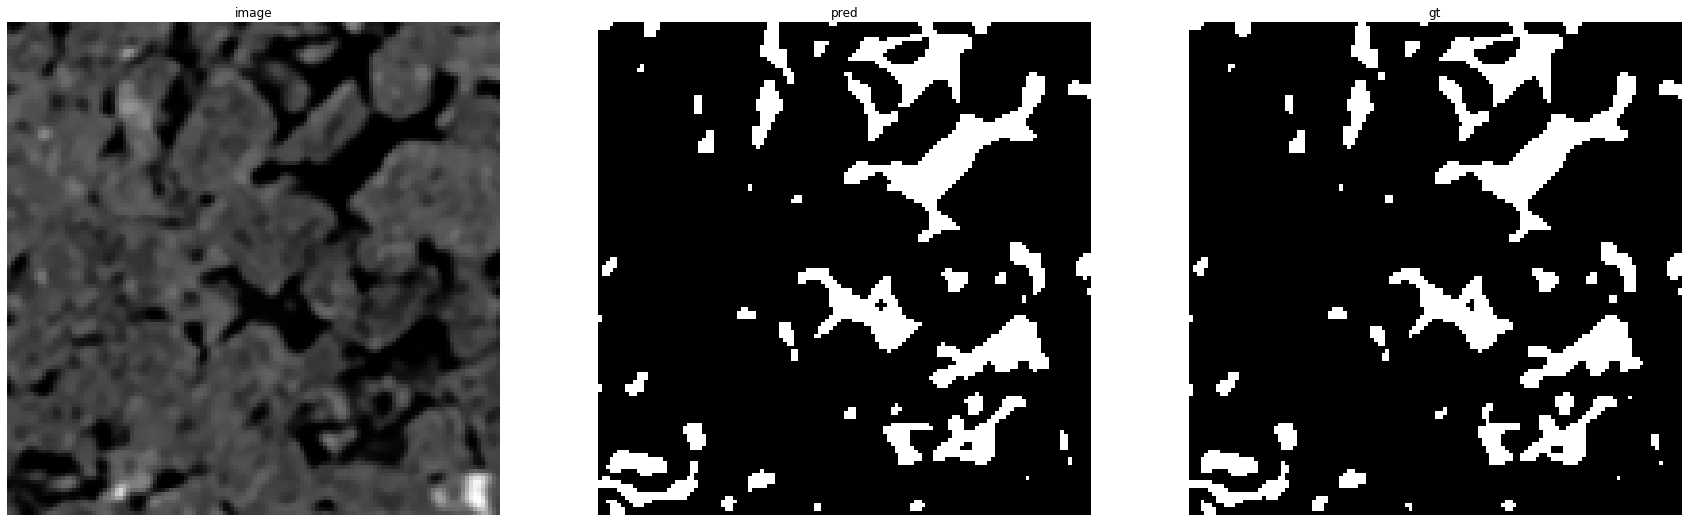

accuracy    : 0.99169921875
precision   : 0.9668485102811583
recall      : 0.9758576874205845
f1          : 0.9713322091062395
pr_auc      : 0.997417498877514
iou         : 0.9442622950819672


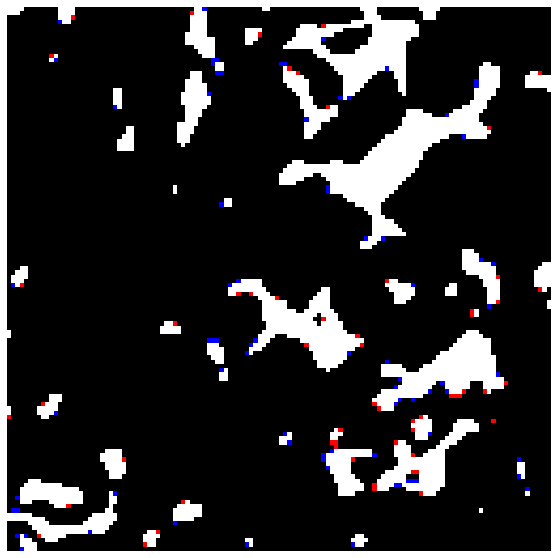

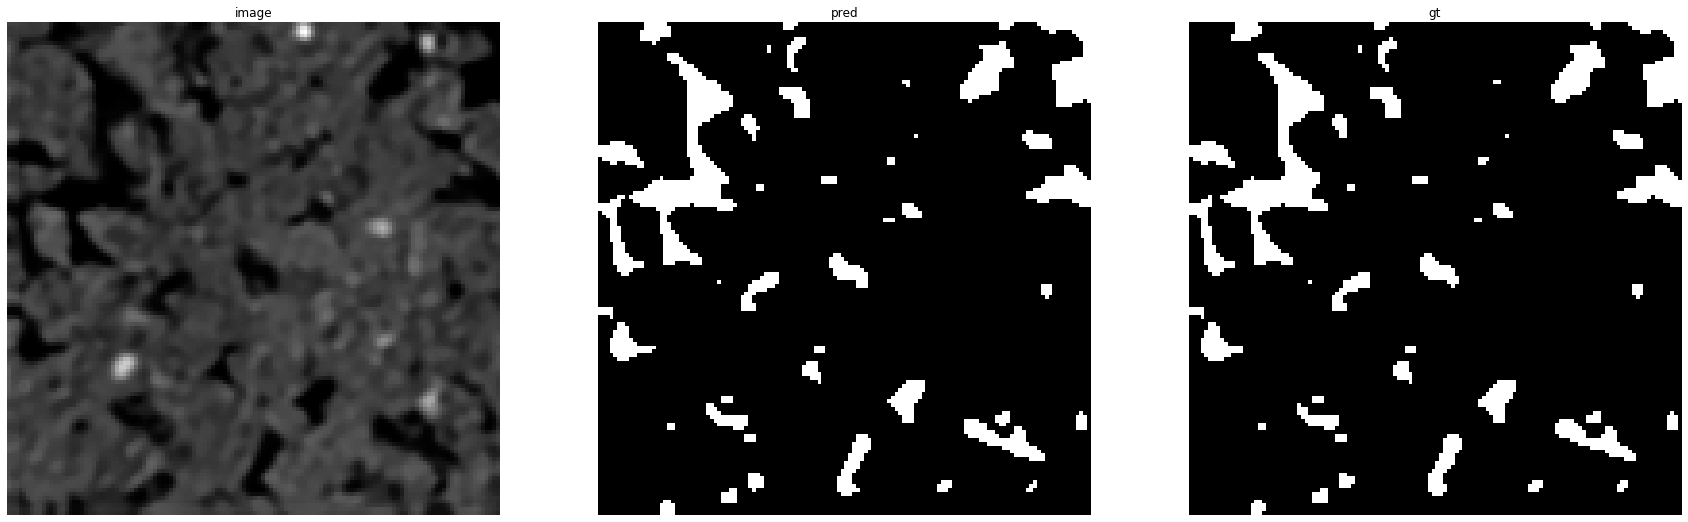

accuracy    : 0.9949951171875
precision   : 0.9732868757259001
recall      : 0.9789719626168224
f1          : 0.9761211415259173
pr_auc      : 0.998108962347089
iou         : 0.9533560864618885


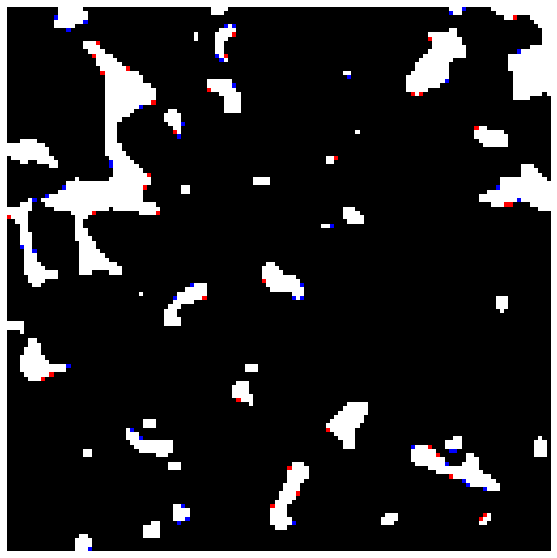

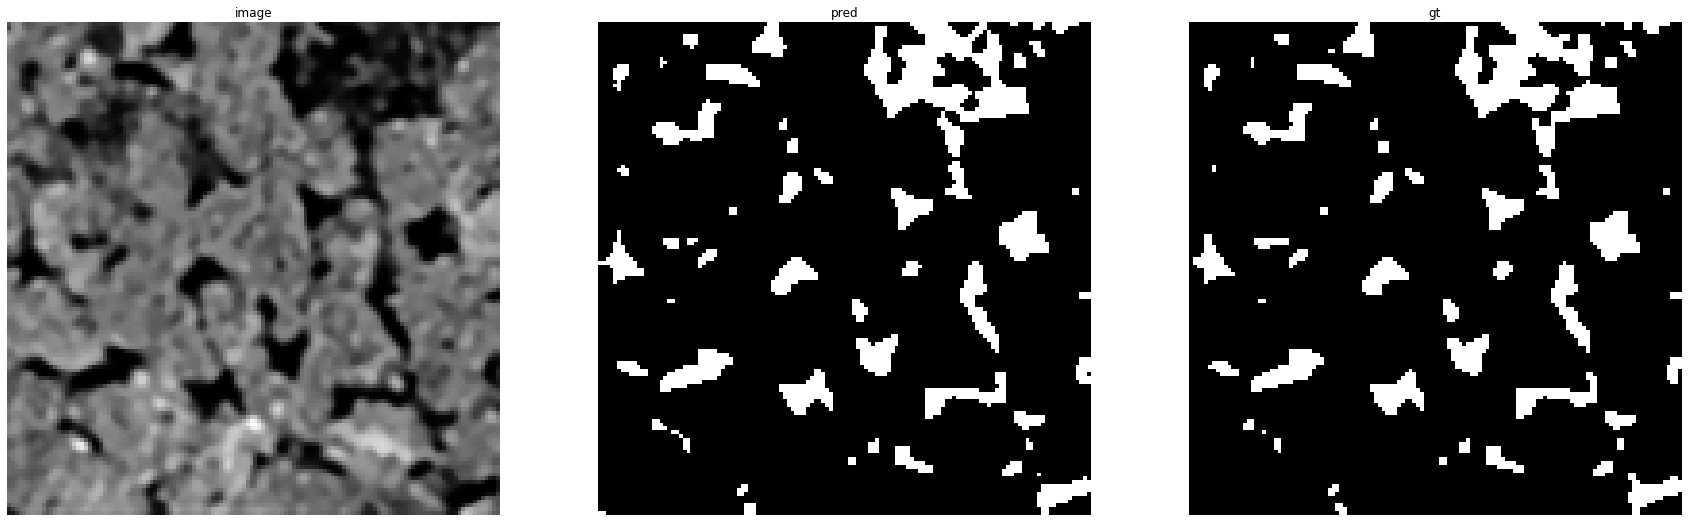

accuracy    : 0.99078369140625
precision   : 0.9538904899135446
recall      : 0.9730524252817246
f1          : 0.9633761823914625
pr_auc      : 0.9957993751659734
iou         : 0.9293401965372017


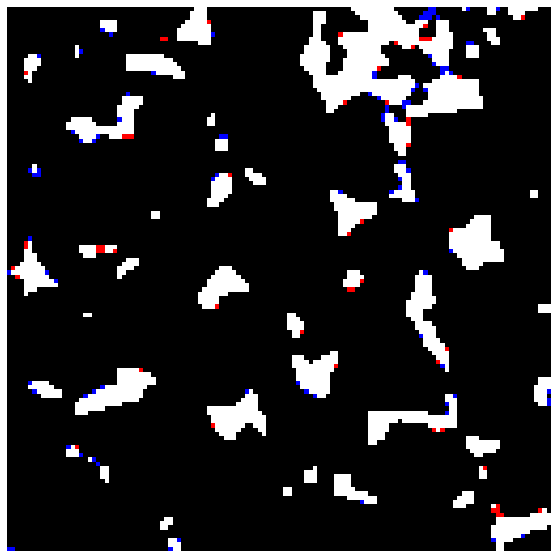

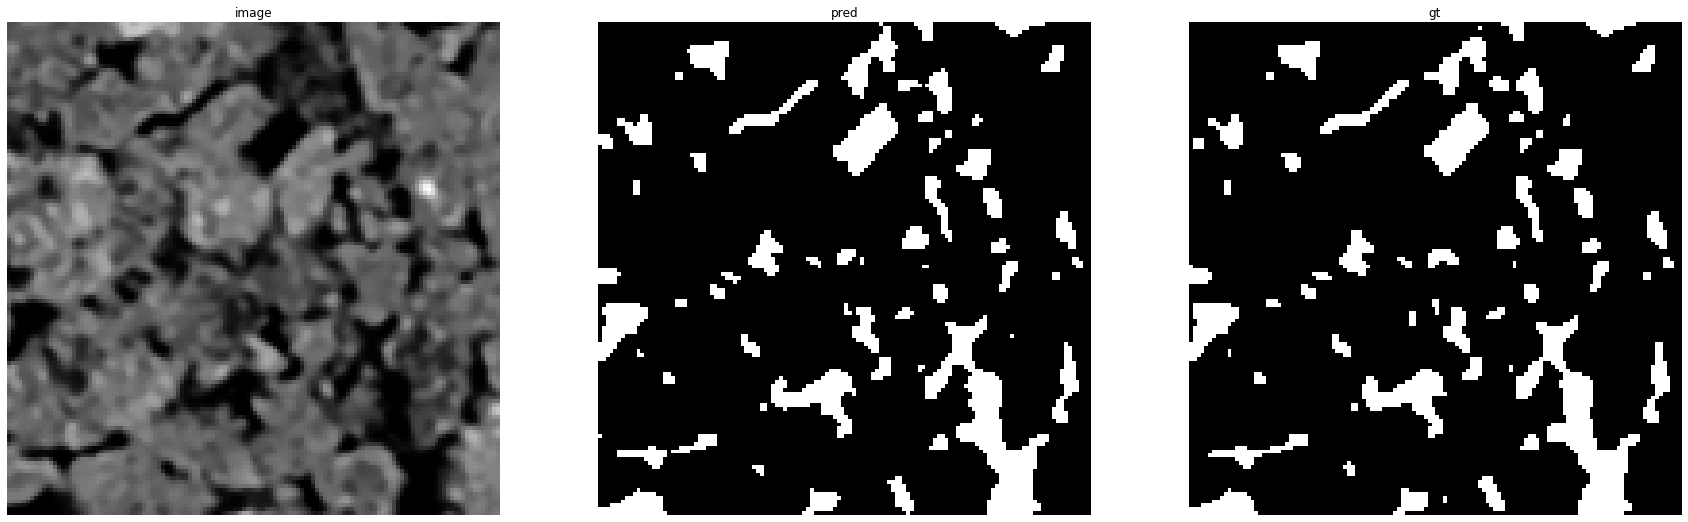

accuracy    : 0.98956298828125
precision   : 0.9700044111160123
recall      : 0.9552562988705473
f1          : 0.9625738673670388
pr_auc      : 0.9957406521346317
iou         : 0.9278481012658227


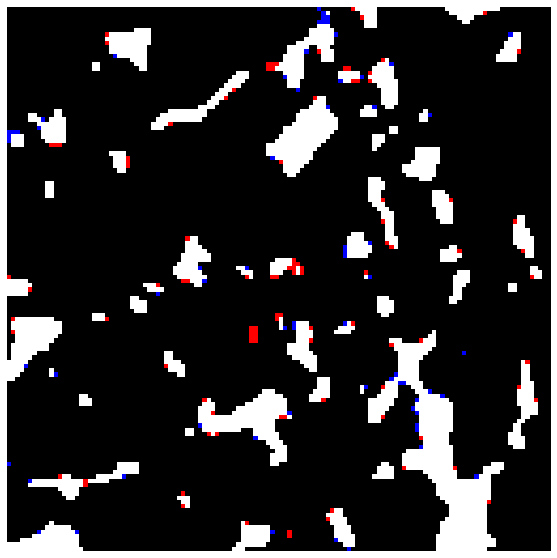

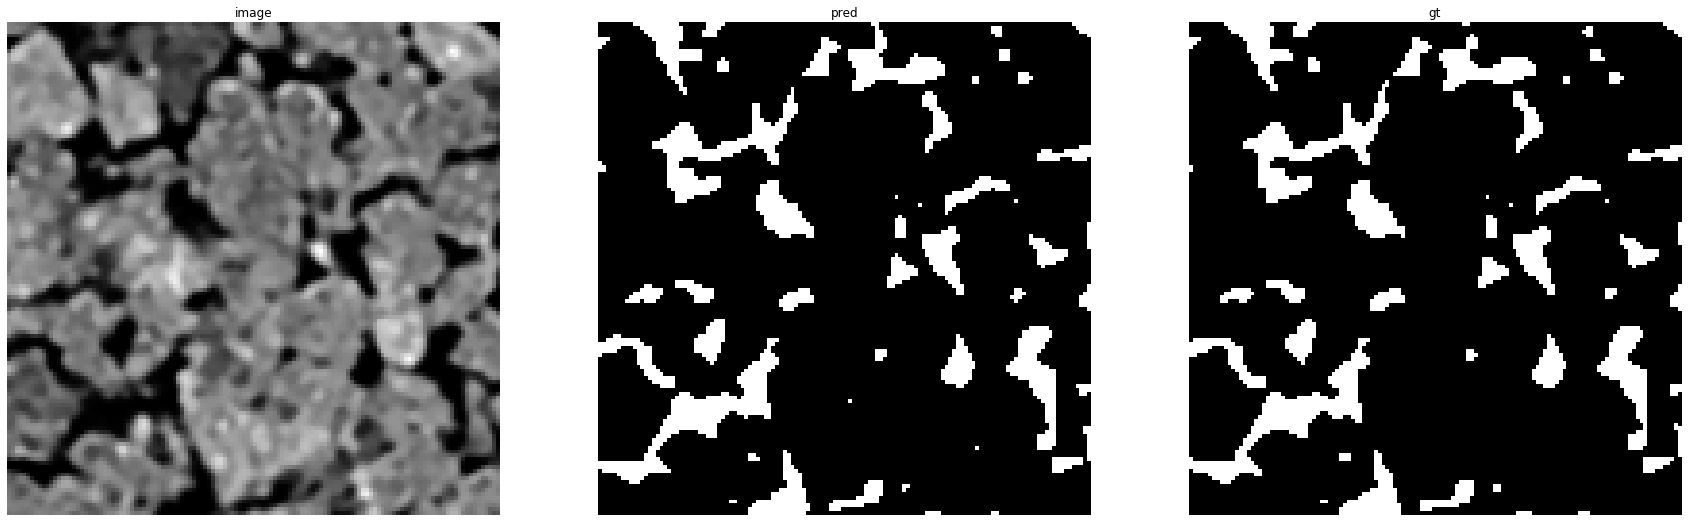

accuracy    : 0.992919921875
precision   : 0.9716701902748415
recall      : 0.9791222837665104
f1          : 0.9753820033955859
pr_auc      : 0.9978533140295653
iou         : 0.951946975973488


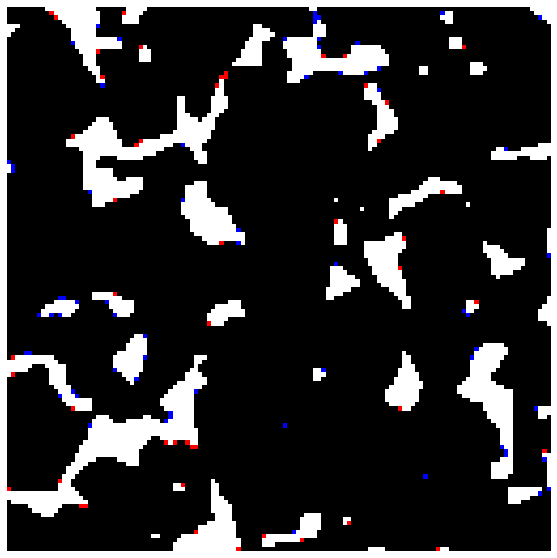

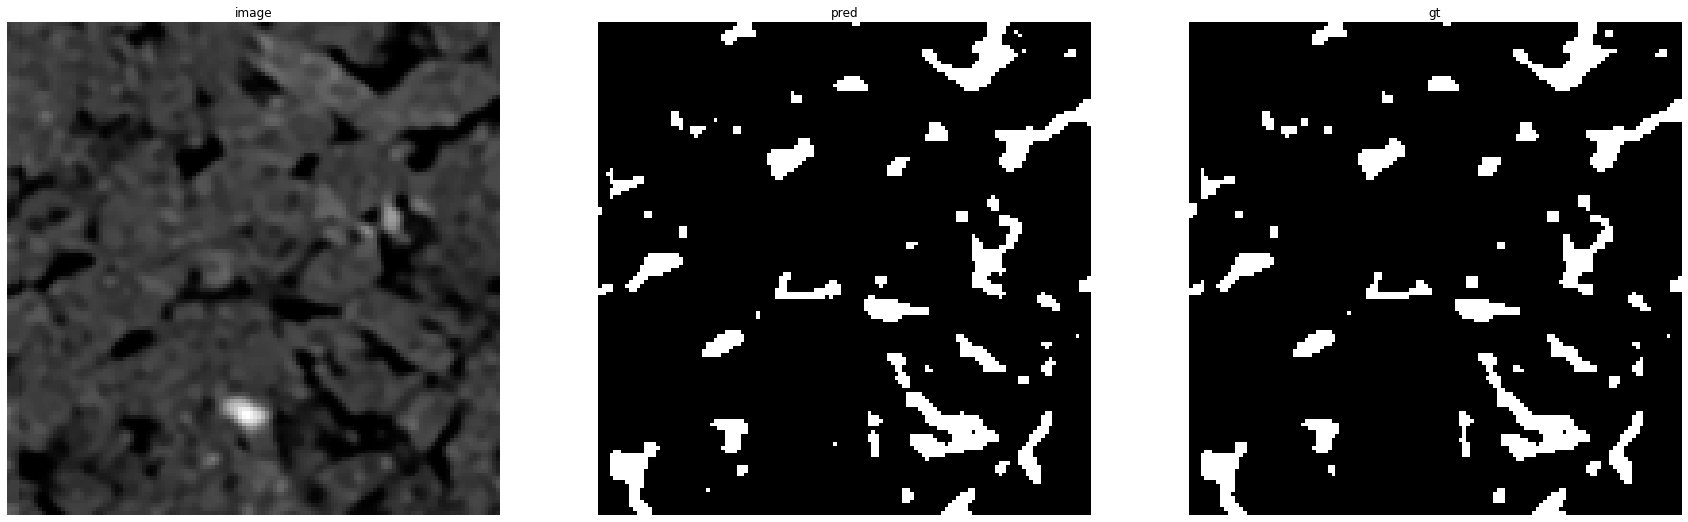

accuracy    : 0.99249267578125
precision   : 0.9604694255713403
recall      : 0.9634448574969021
f1          : 0.9619548407052273
pr_auc      : 0.9955536807289433
iou         : 0.9266984505363528


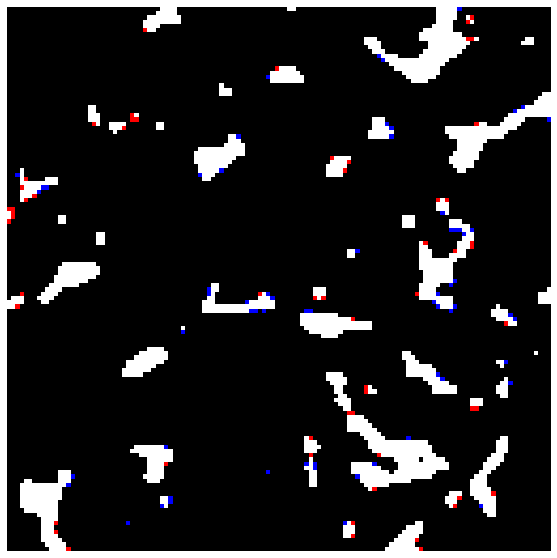

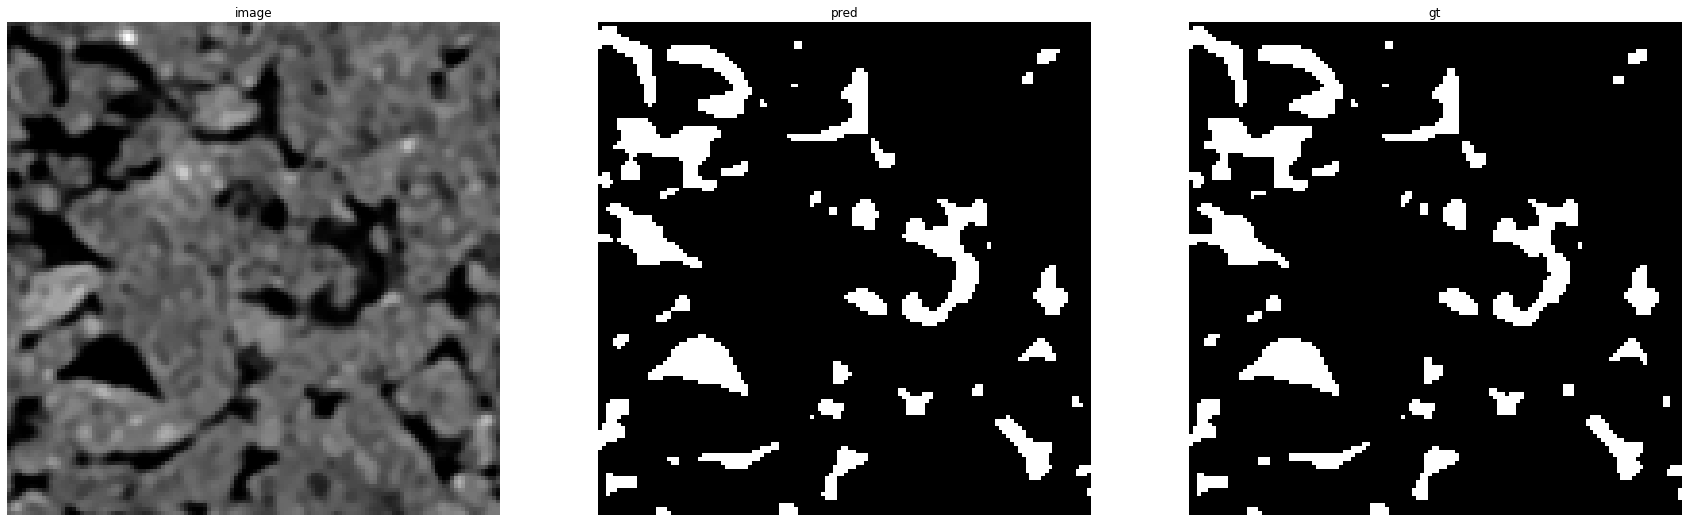

accuracy    : 0.99285888671875
precision   : 0.9684601113172542
recall      : 0.9770706598034627
f1          : 0.9727463312368972
pr_auc      : 0.9976519361395377
iou         : 0.9469387755102041


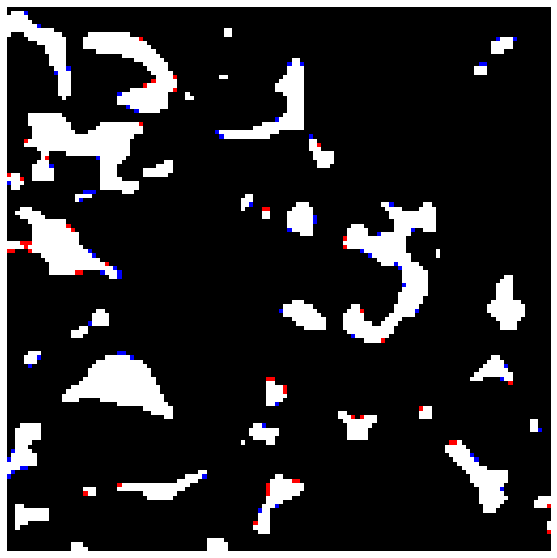

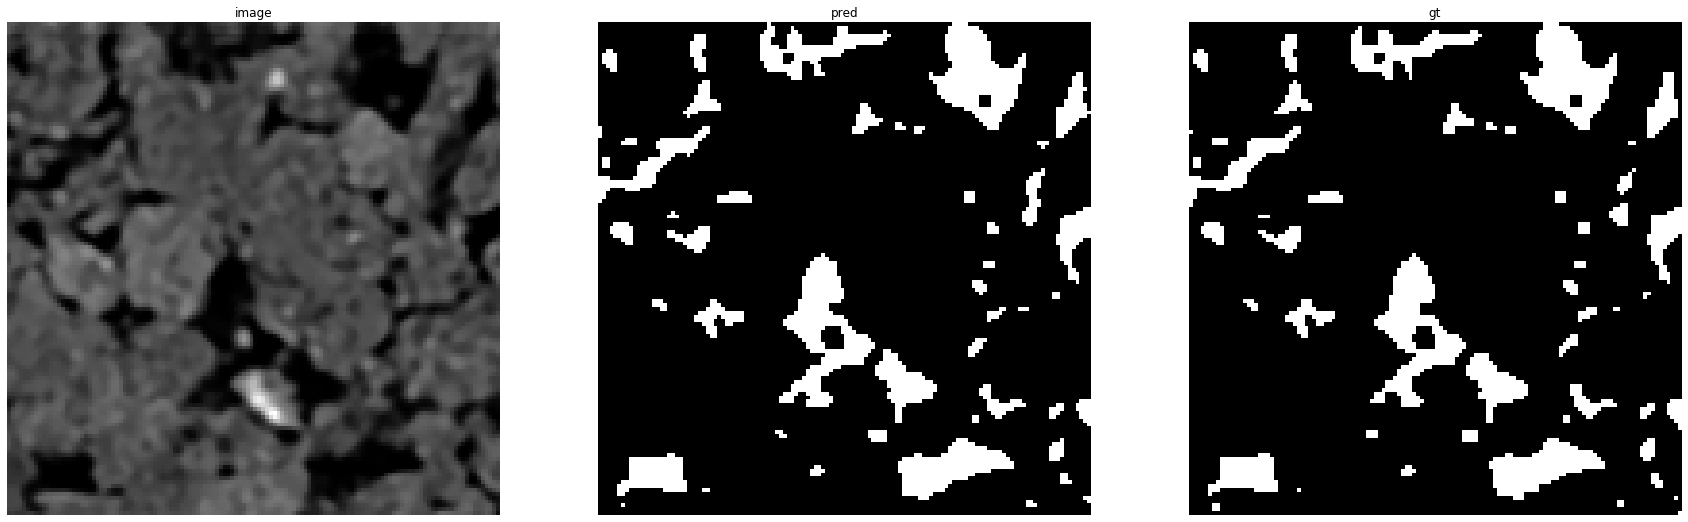

accuracy    : 0.99114990234375
precision   : 0.9646507666098807
recall      : 0.9733562526858617
f1          : 0.9689839572192513
pr_auc      : 0.9970171384268933
iou         : 0.9398340248962656


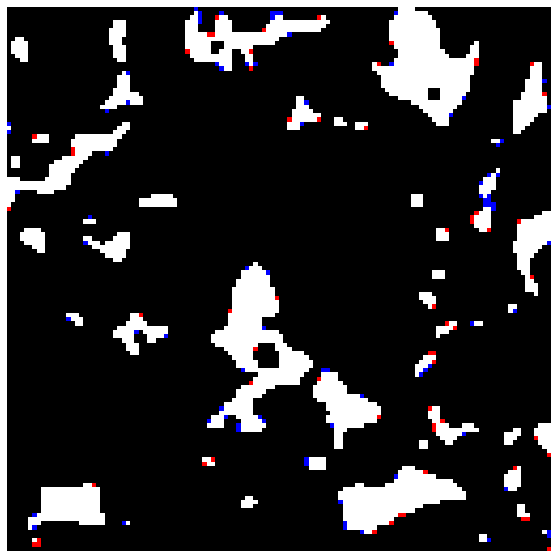

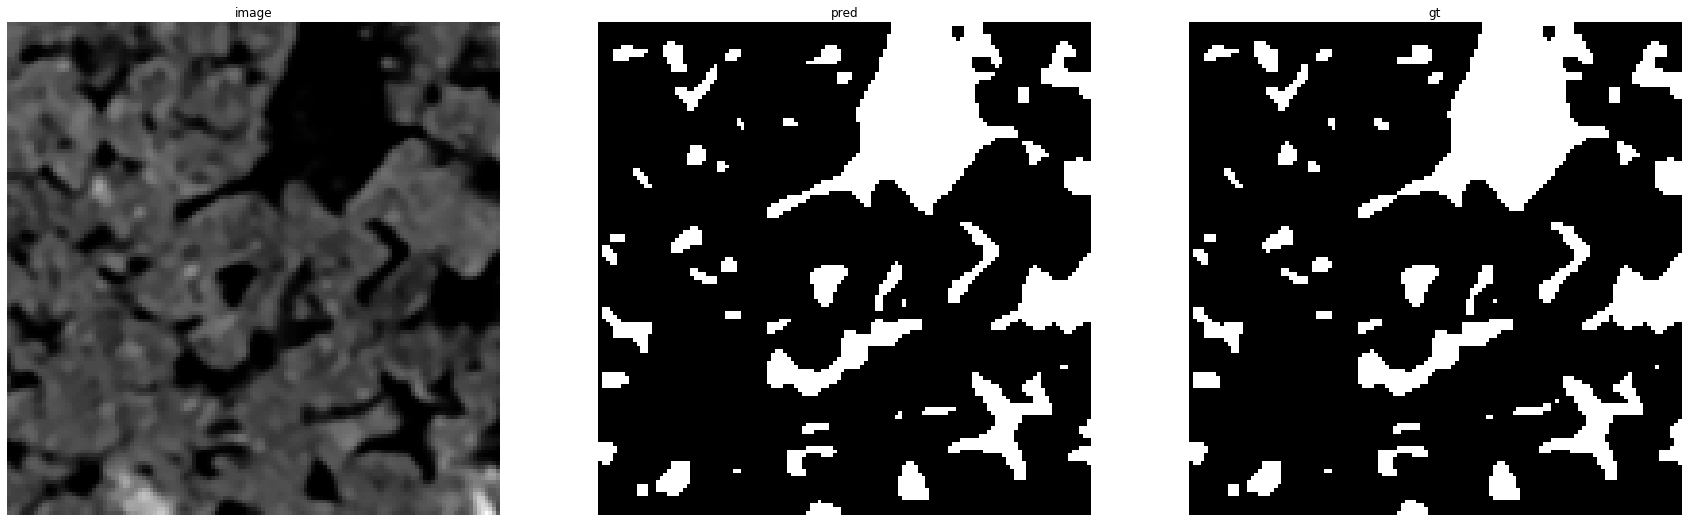

accuracy    : 0.9925537109375
precision   : 0.9826695044086349
recall      : 0.9802851076736427
f1          : 0.9814758578803522
pr_auc      : 0.9988874406586081
iou         : 0.9636255217650567


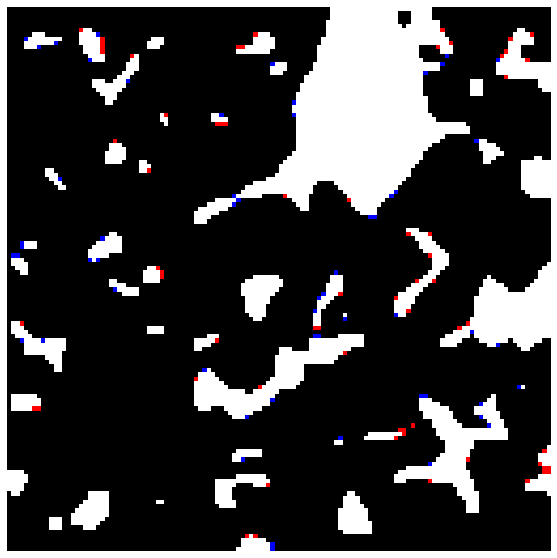

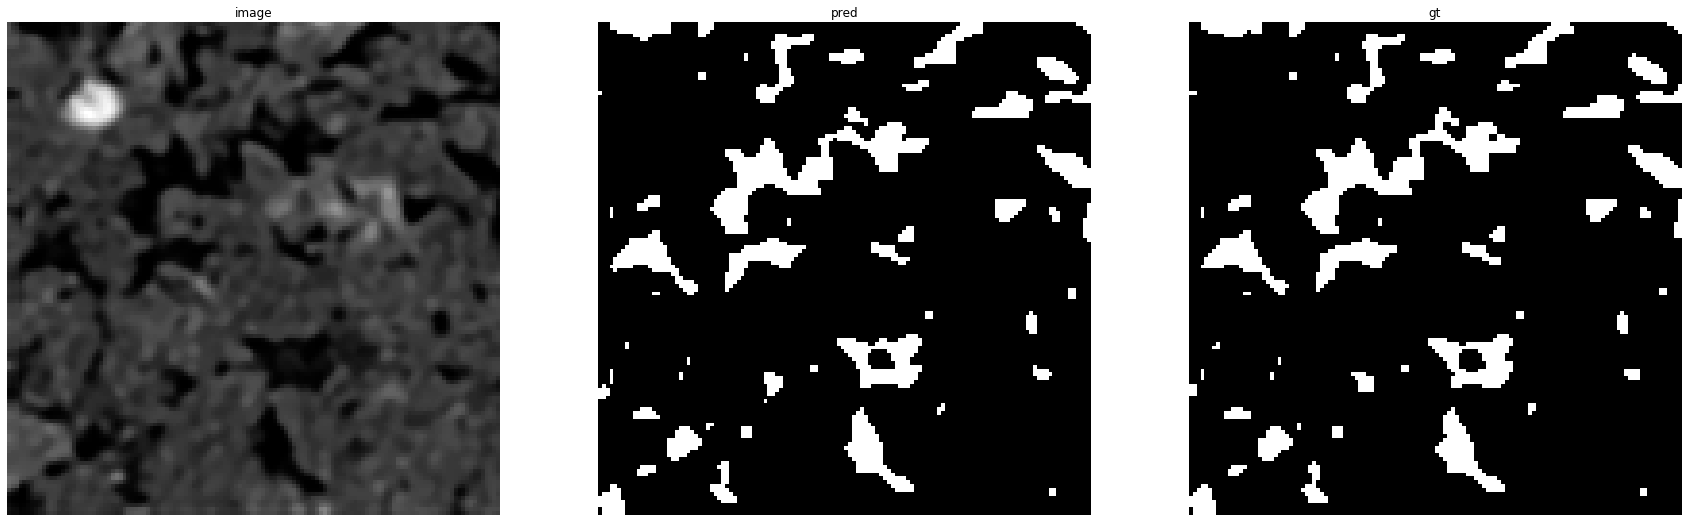

accuracy    : 0.9930419921875
precision   : 0.9670442842430484
recall      : 0.9740663900414938
f1          : 0.9705426356589147
pr_auc      : 0.9974237109684037
iou         : 0.9427710843373494


Prediction for Urna_30:


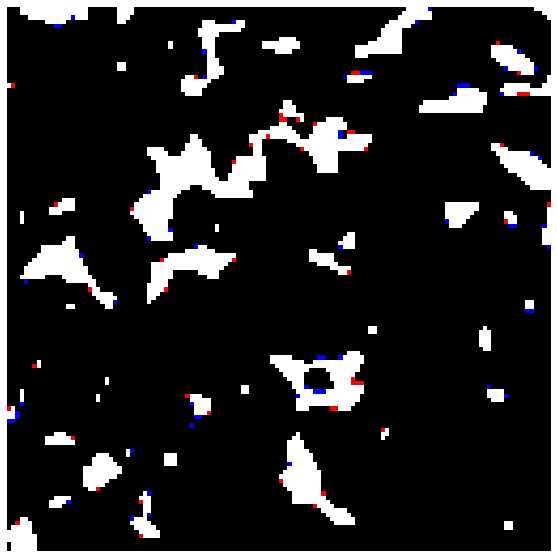

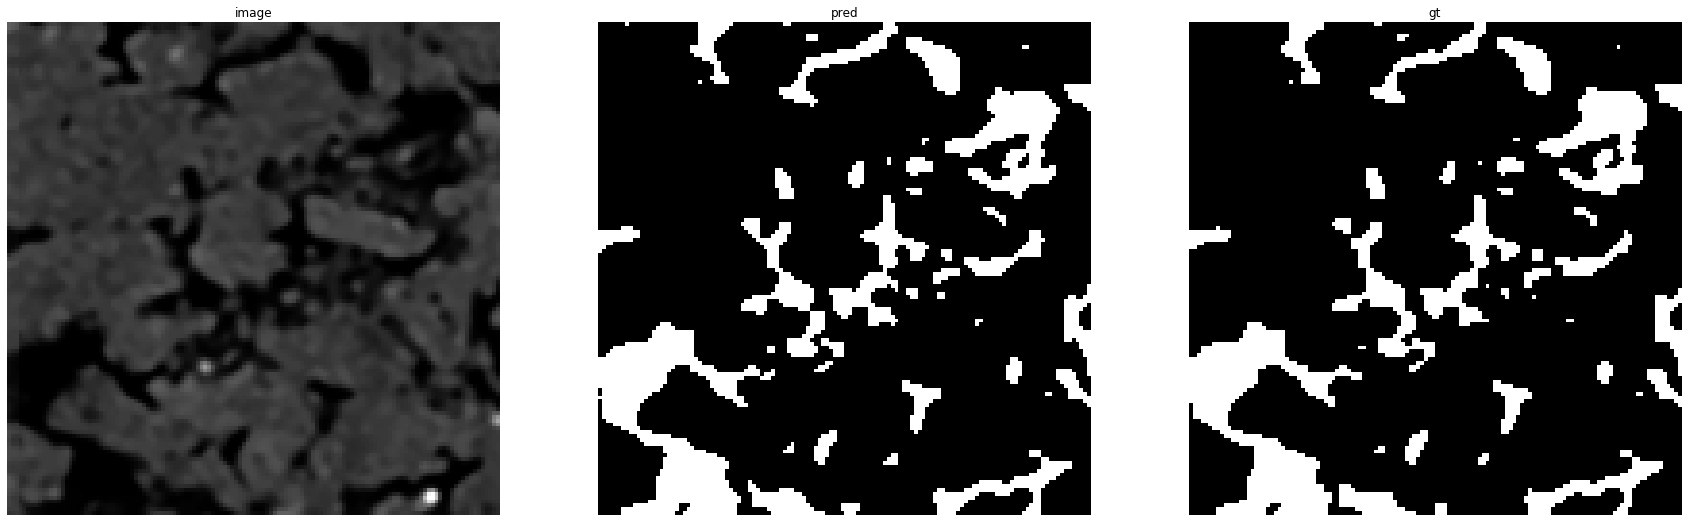

accuracy    : 0.9862060546875
precision   : 0.9552086868001357
recall      : 0.9676864902028188
f1          : 0.9614071038251366
pr_auc      : 0.99599834036215
iou         : 0.9256823413350871


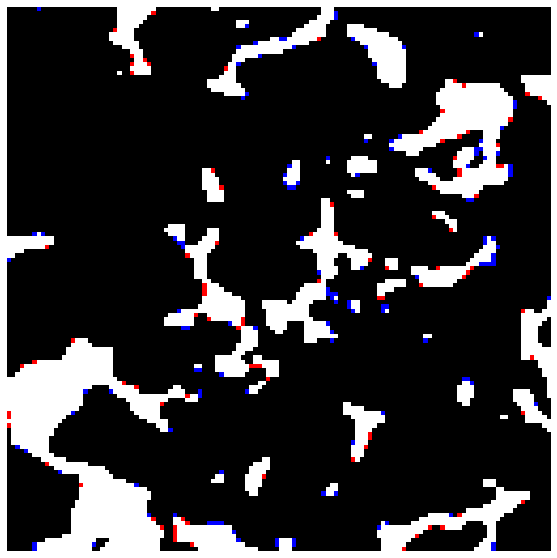

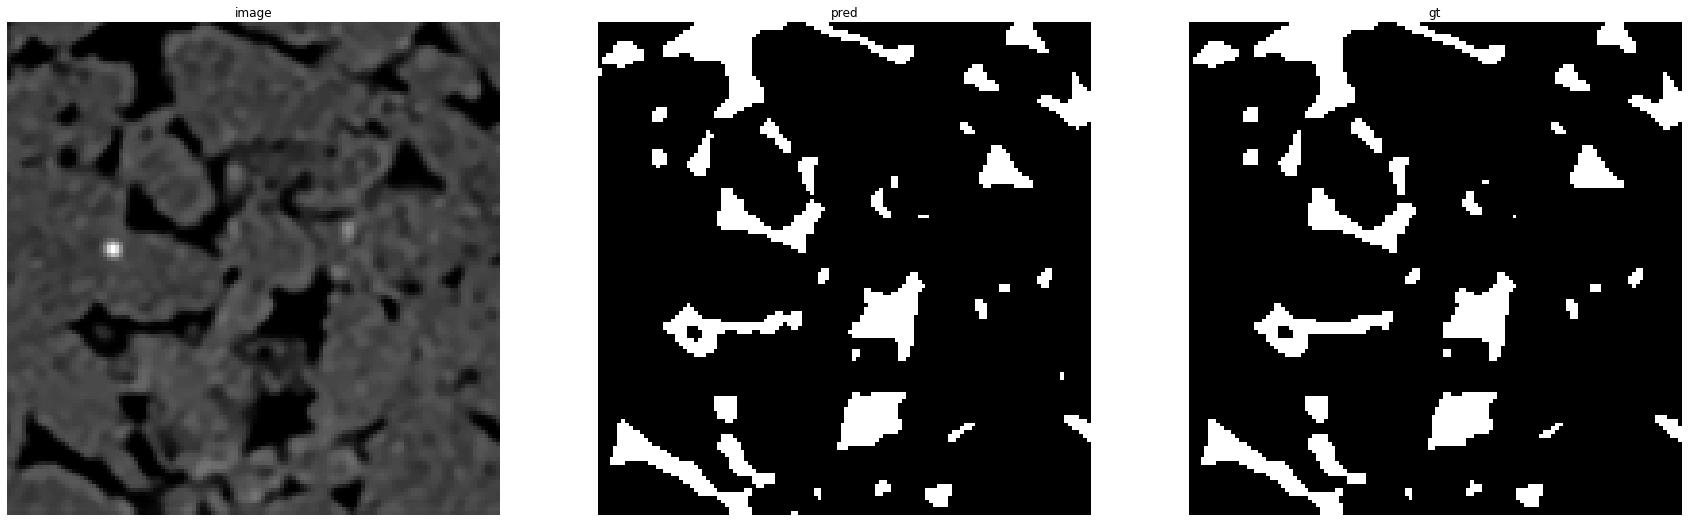

accuracy    : 0.99237060546875
precision   : 0.9731258840169731
recall      : 0.9681050656660413
f1          : 0.9706089818951328
pr_auc      : 0.9975798637117034
iou         : 0.9428962996802193


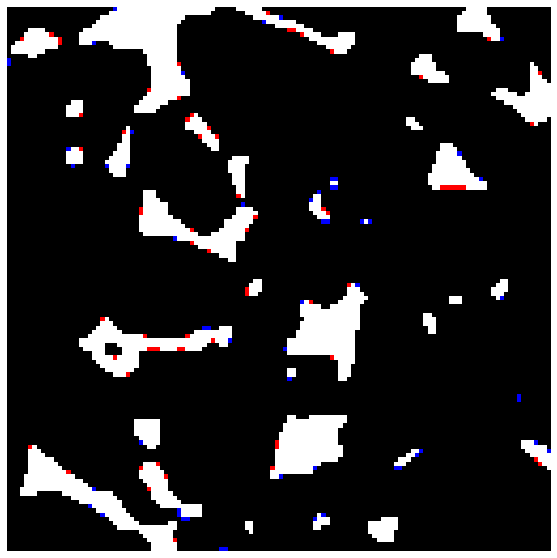

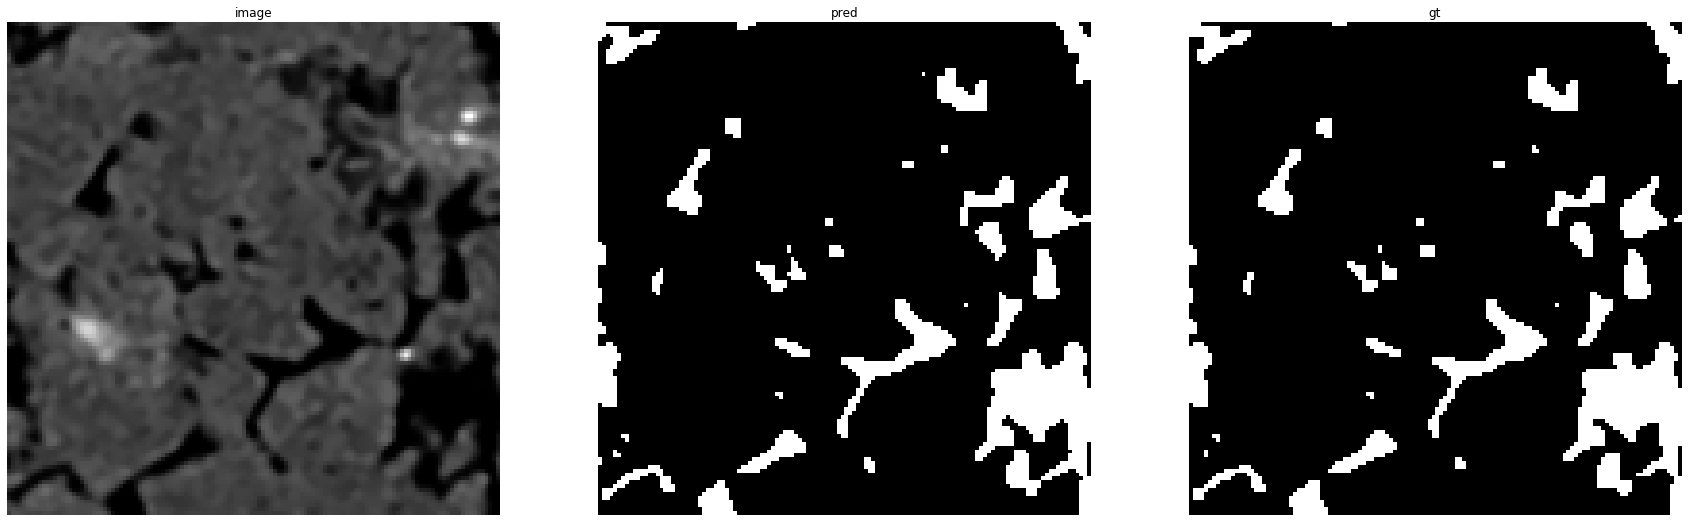

accuracy    : 0.99224853515625
precision   : 0.964233219010289
recall      : 0.973293768545994
f1          : 0.9687423086389367
pr_auc      : 0.9969833425271346
iou         : 0.9393794749403341


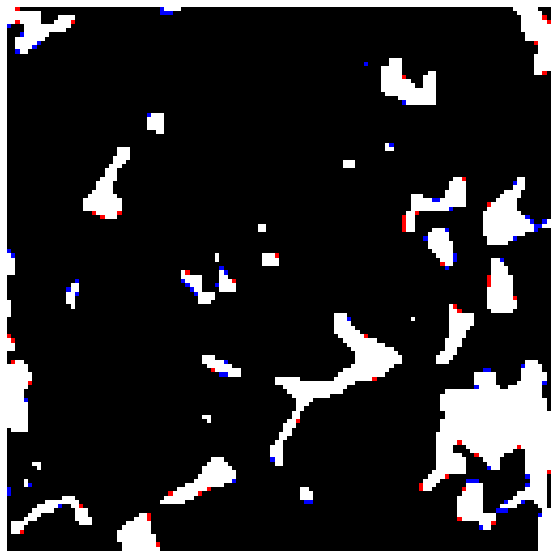

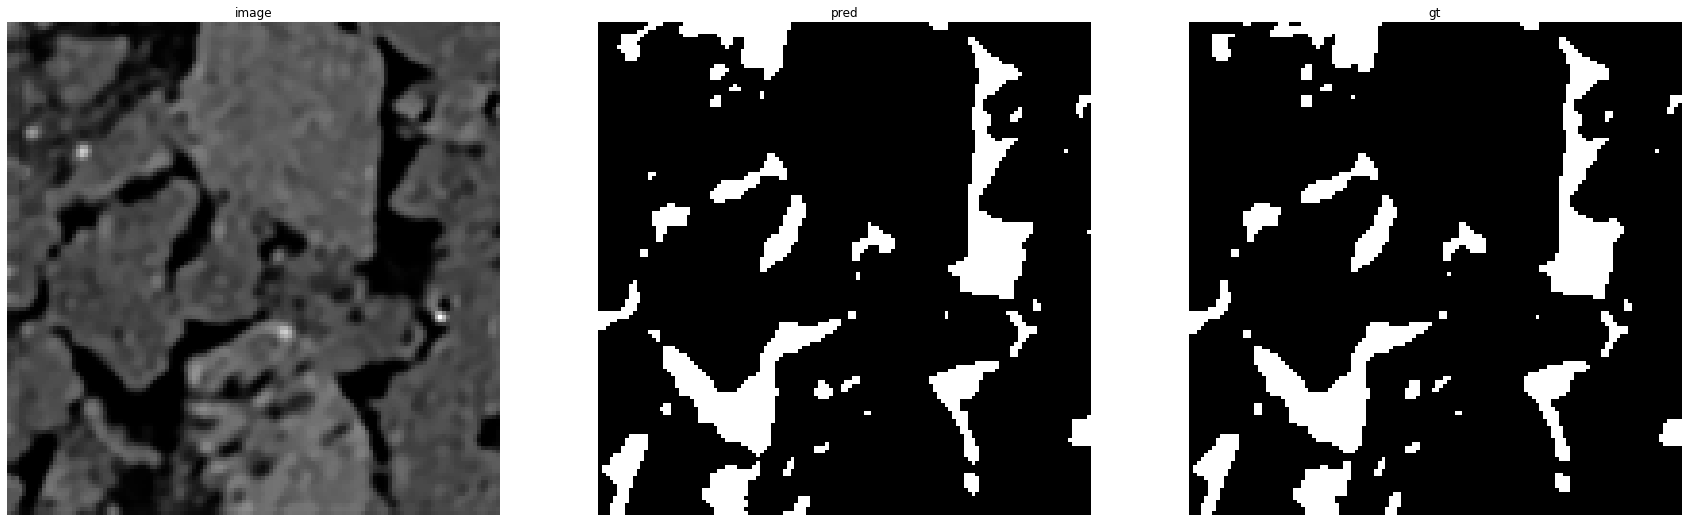

accuracy    : 0.98974609375
precision   : 0.9597628123676408
recall      : 0.9687900812312954
f1          : 0.9642553191489363
pr_auc      : 0.996851990618739
iou         : 0.9309778142974527


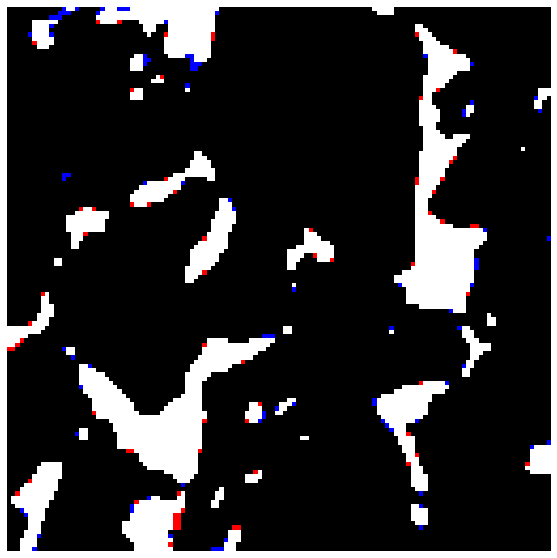

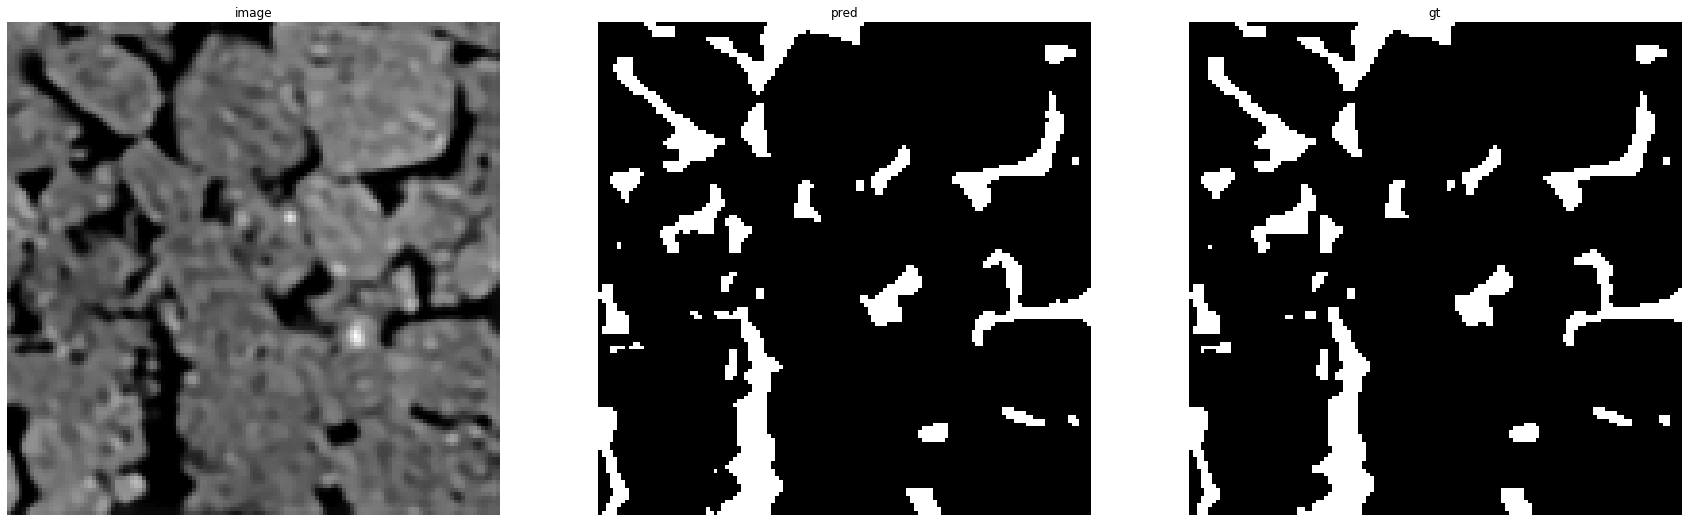

accuracy    : 0.9921875
precision   : 0.9686609686609686
recall      : 0.9705042816365367
f1          : 0.9695817490494296
pr_auc      : 0.9972676796105124
iou         : 0.940959409594096


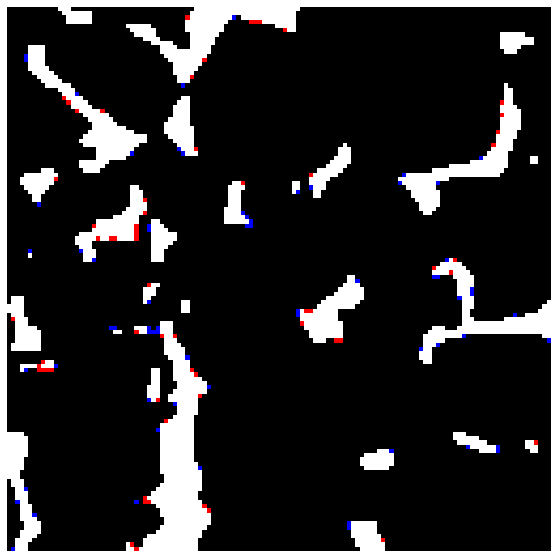

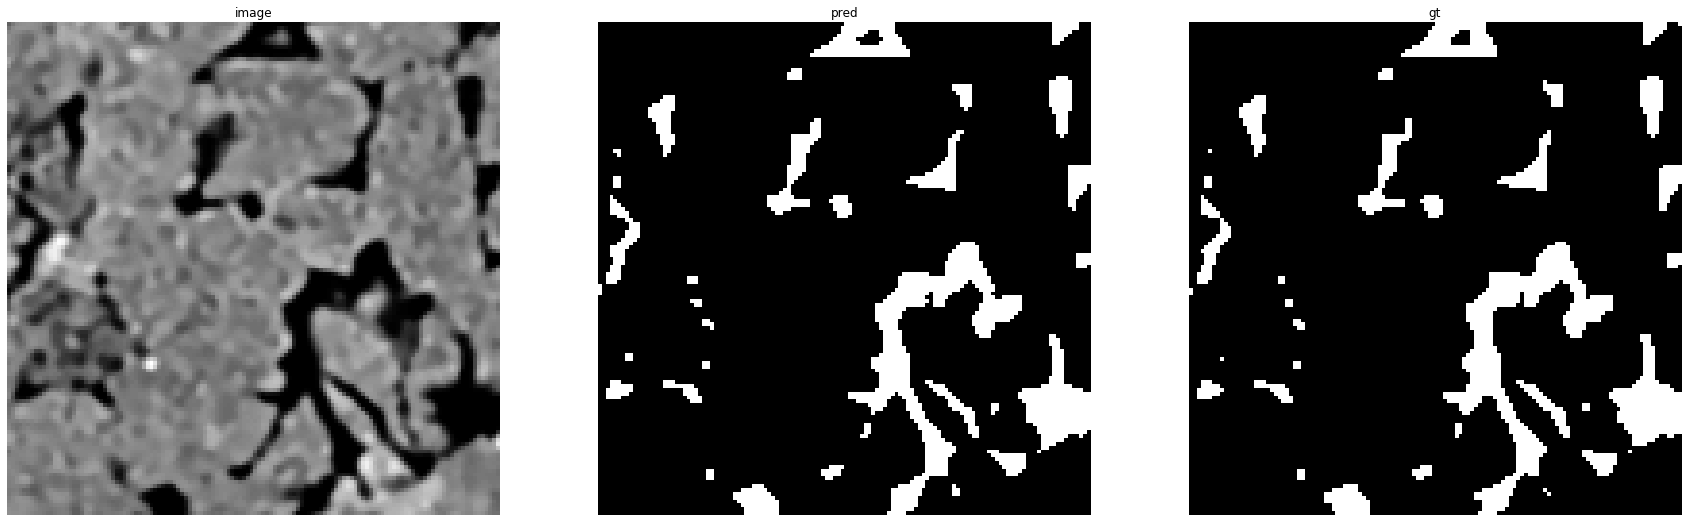

accuracy    : 0.99346923828125
precision   : 0.9751269035532995
recall      : 0.9706922688226377
f1          : 0.9729045327931121
pr_auc      : 0.9979097784137059
iou         : 0.9472386587771203


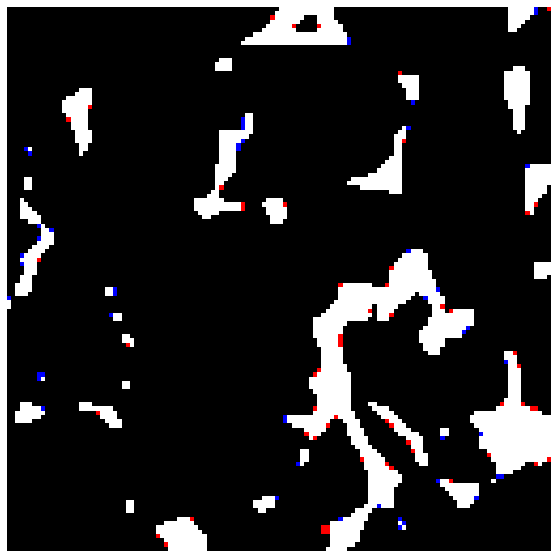

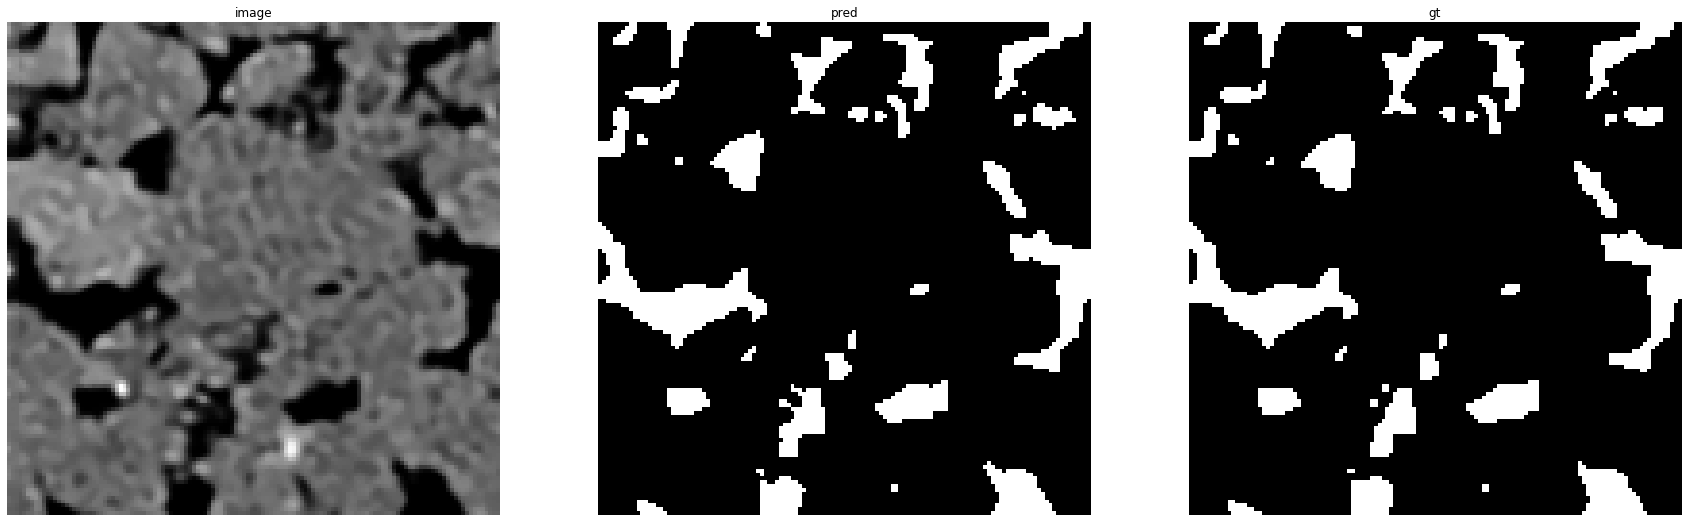

accuracy    : 0.9913330078125
precision   : 0.9651360544217688
recall      : 0.9742489270386266
f1          : 0.9696710807347287
pr_auc      : 0.9974015425947643
iou         : 0.9411276948590381


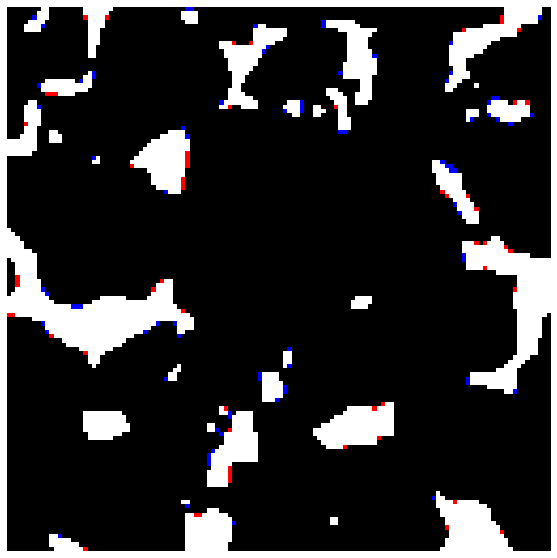

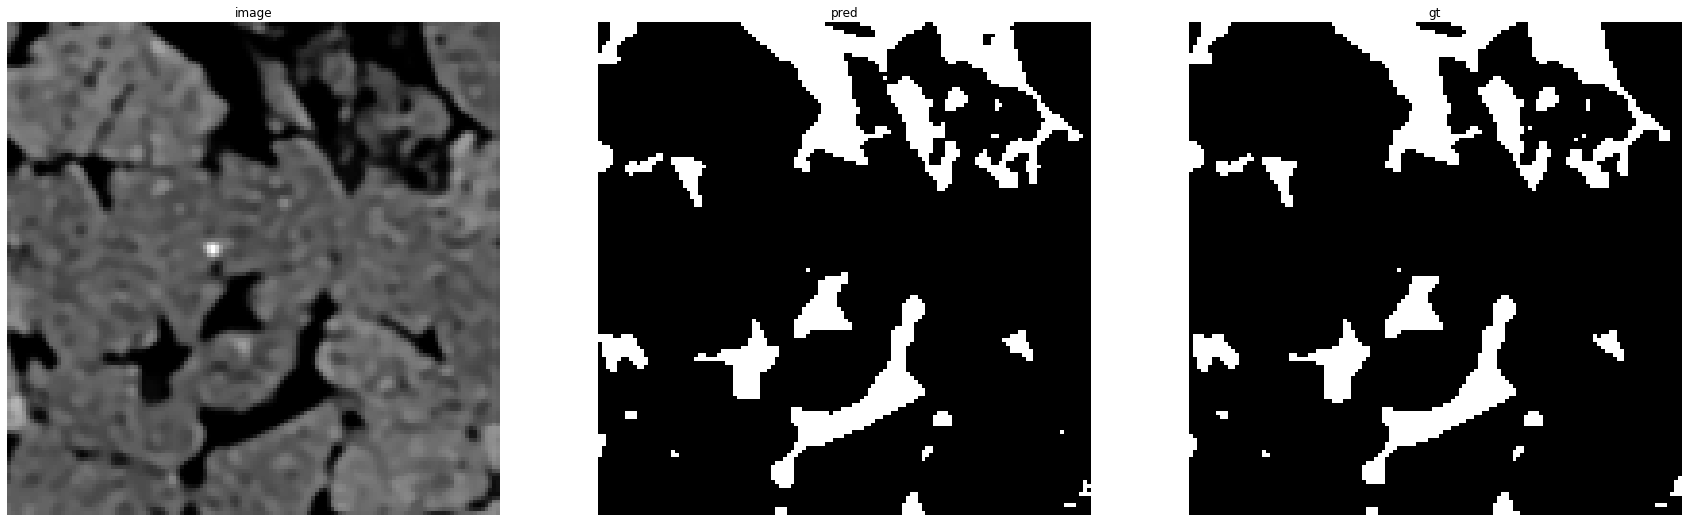

accuracy    : 0.99114990234375
precision   : 0.9719967532467533
recall      : 0.9692432213678672
f1          : 0.9706180344478217
pr_auc      : 0.9976414535387362
iou         : 0.9429133858267716


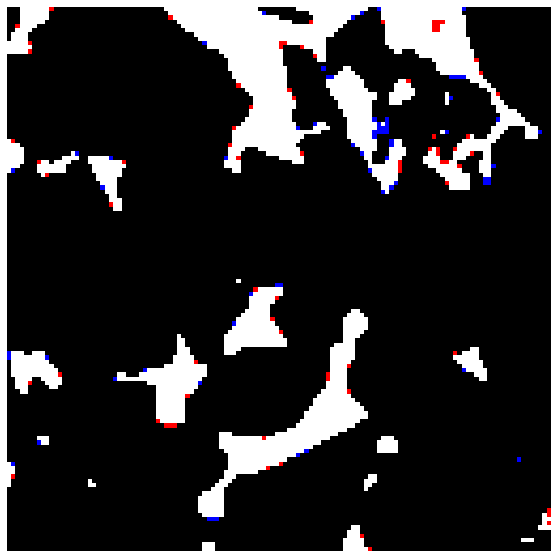

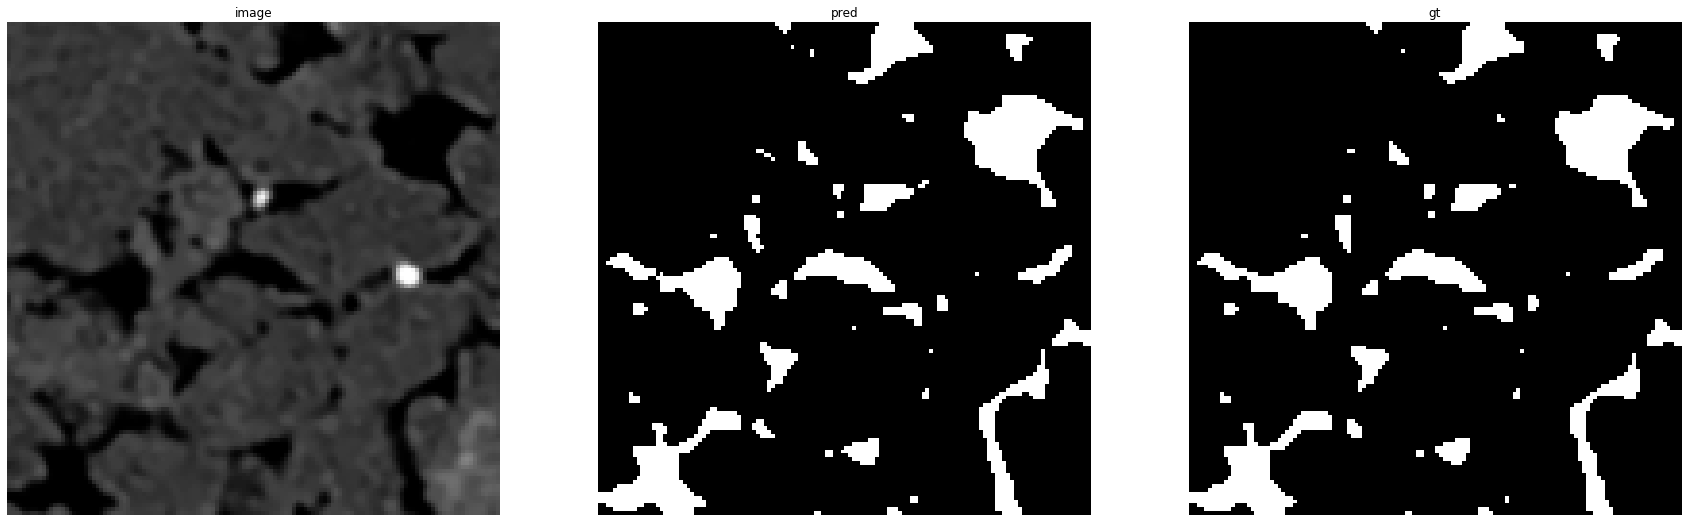

accuracy    : 0.99298095703125
precision   : 0.967631191760667
recall      : 0.9757665677546983
f1          : 0.97168185176065
pr_auc      : 0.9974199306925738
iou         : 0.9449233716475096


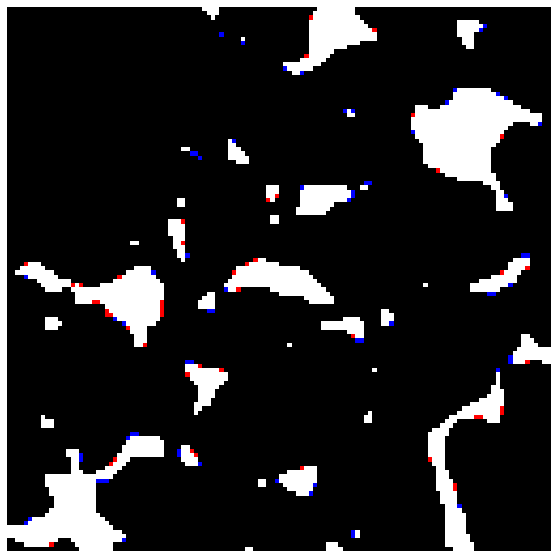

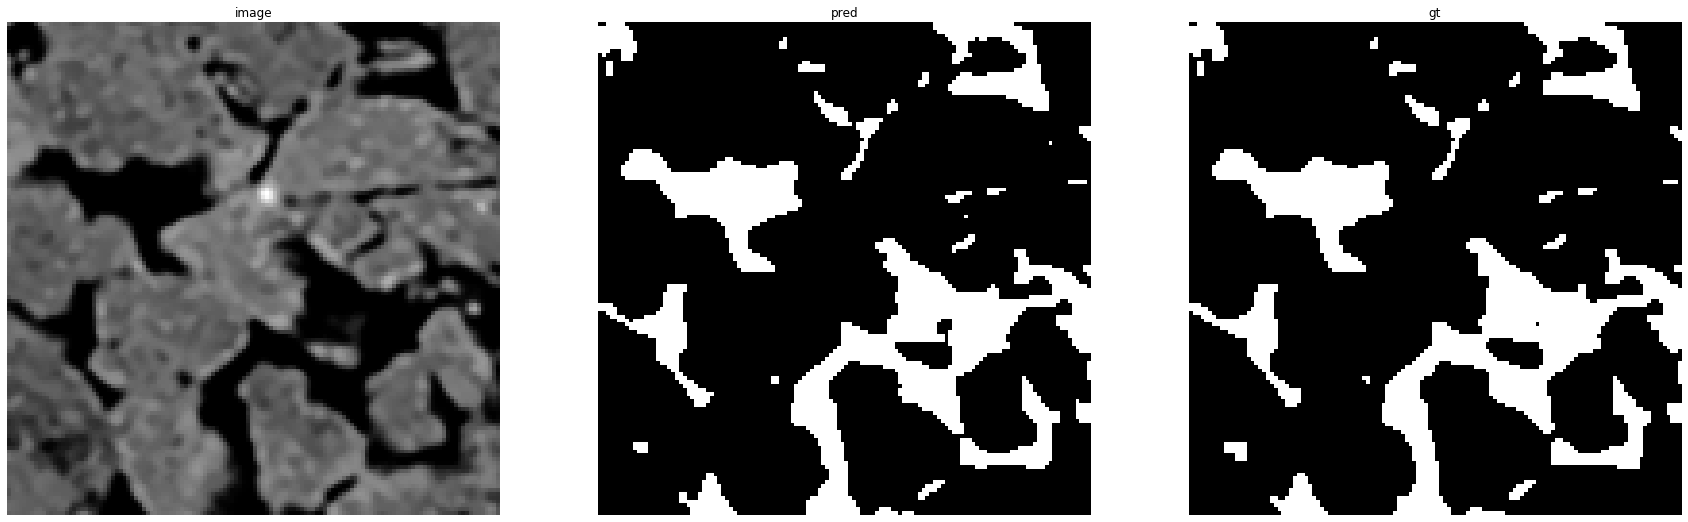

accuracy    : 0.99017333984375
precision   : 0.9807692307692307
recall      : 0.9711395418030349
f1          : 0.9759306323815218
pr_auc      : 0.9983728222557041
iou         : 0.952992700729927


Prediction for Urna_34:


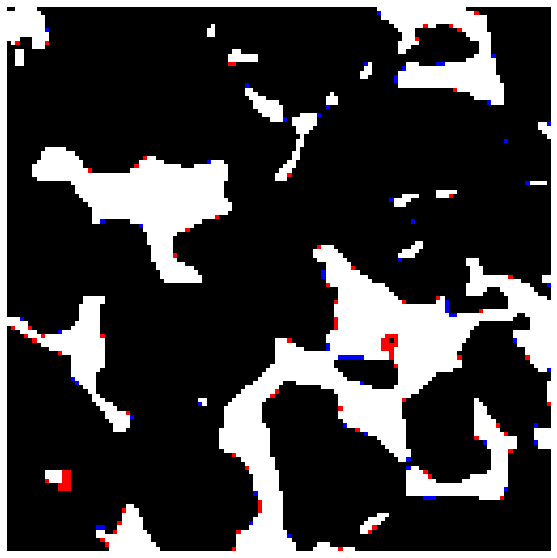

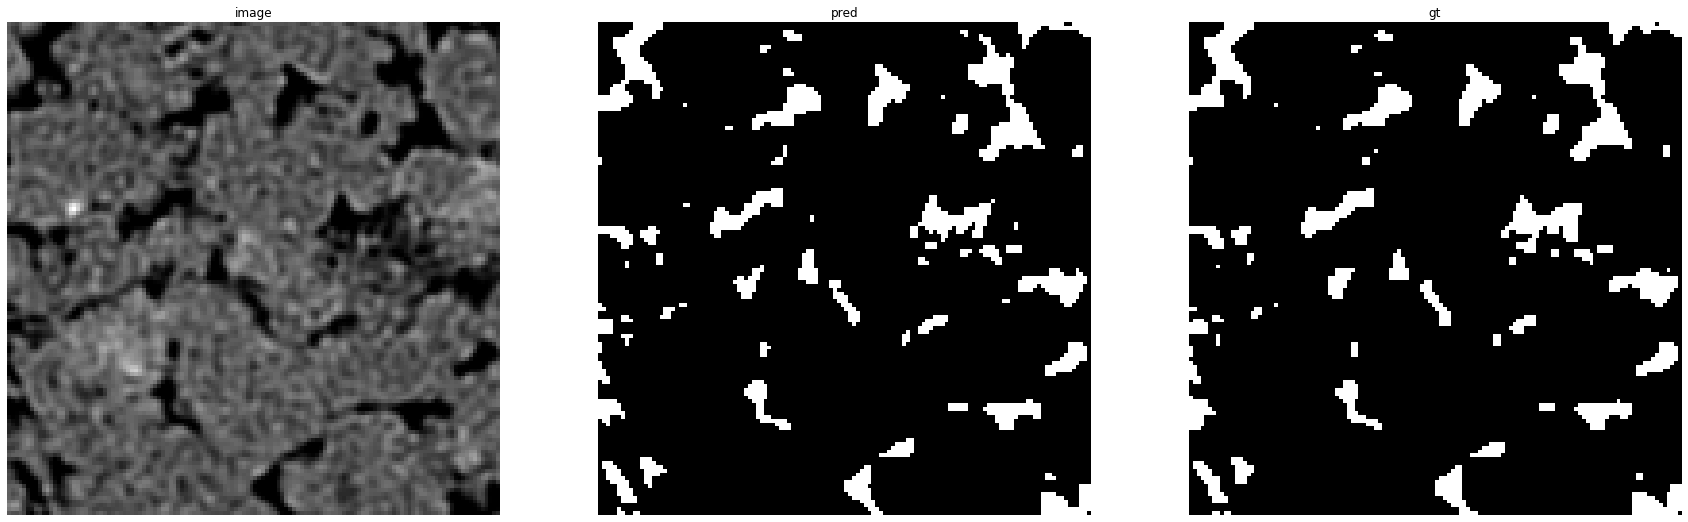

accuracy    : 0.986083984375
precision   : 0.9391304347826087
recall      : 0.9294320137693631
f1          : 0.9342560553633218
pr_auc      : 0.9875738742777578
iou         : 0.8766233766233766


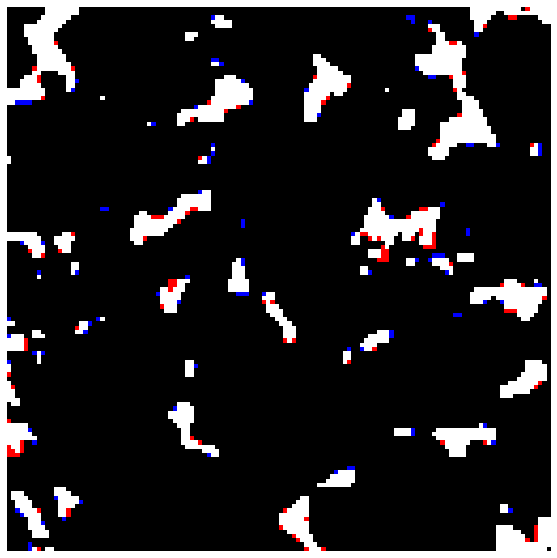

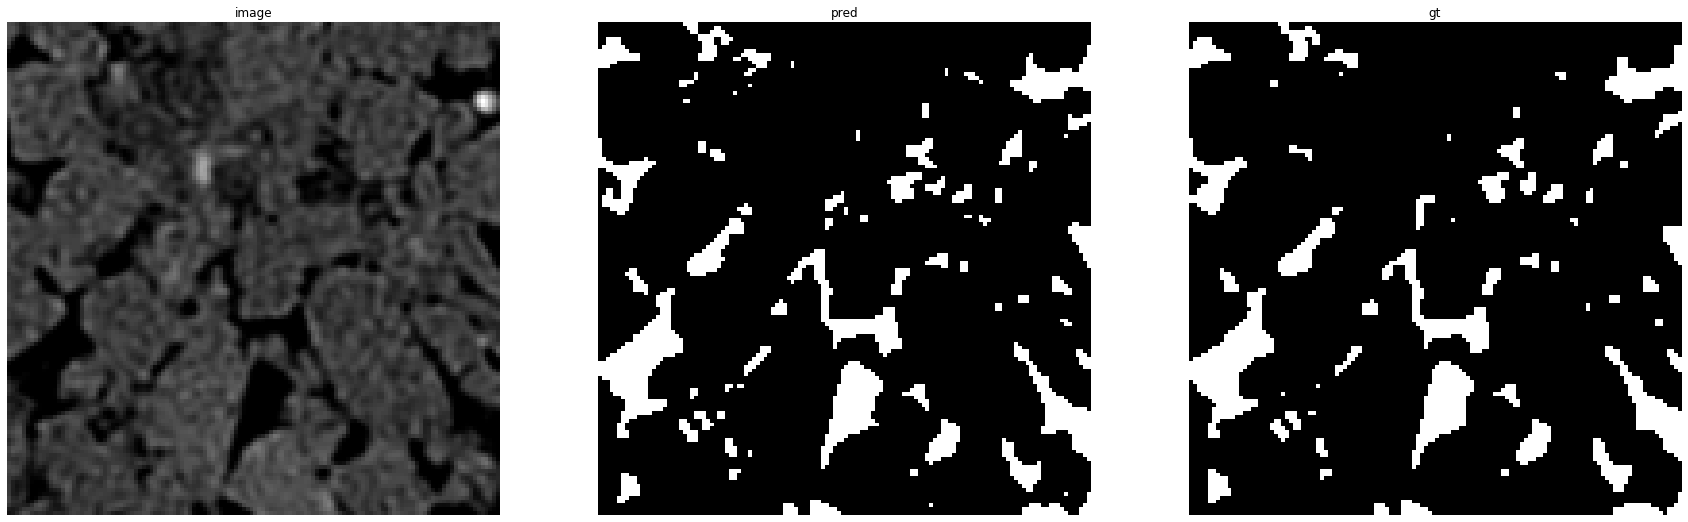

accuracy    : 0.98406982421875
precision   : 0.936768149882904
recall      : 0.940733772342427
f1          : 0.9387467730579676
pr_auc      : 0.9905862551364403
iou         : 0.8845643520566121


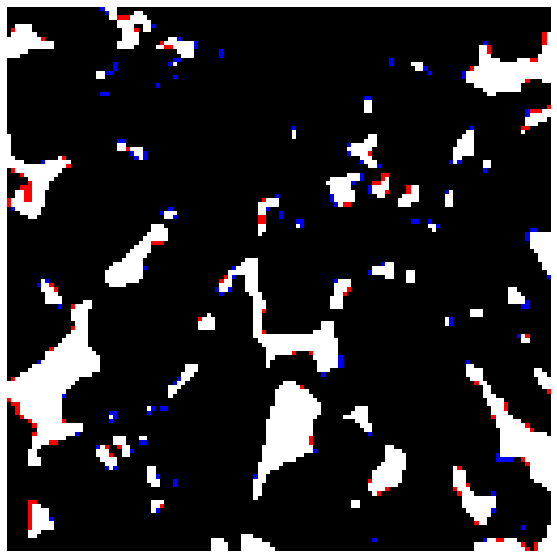

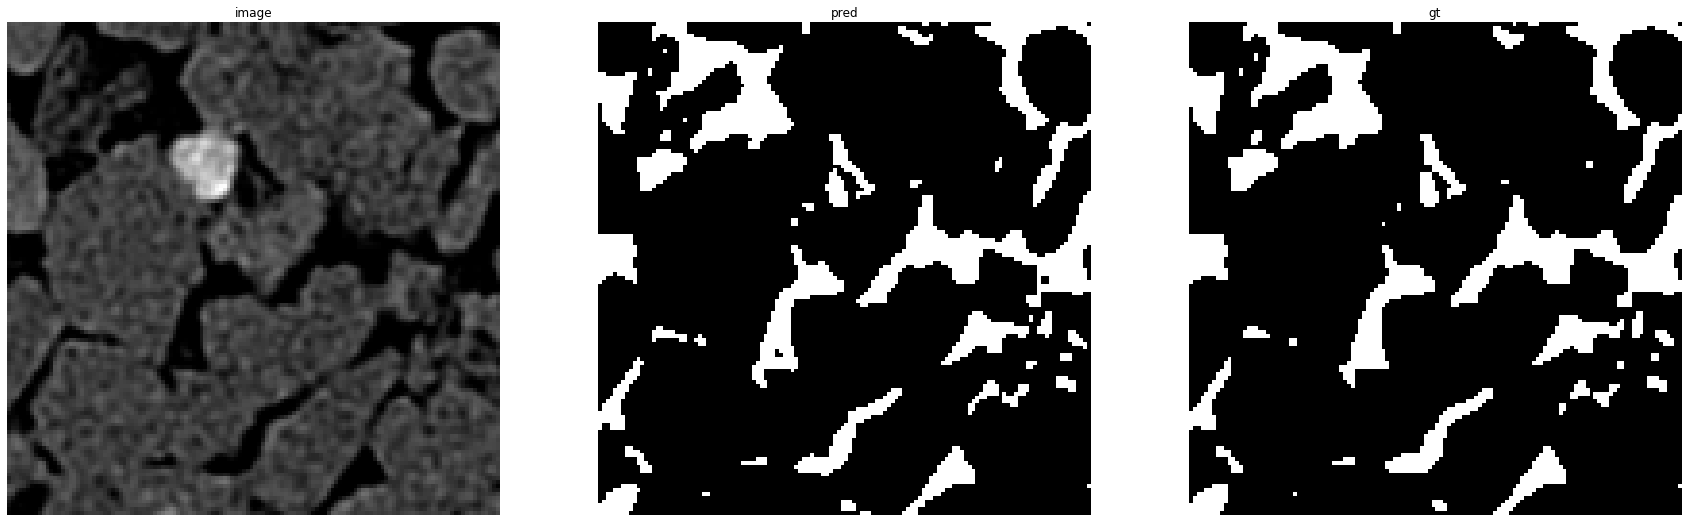

accuracy    : 0.9862060546875
precision   : 0.9655412460842325
recall      : 0.9562219924164082
f1          : 0.9608590232074818
pr_auc      : 0.995585977340357
iou         : 0.9246666666666666


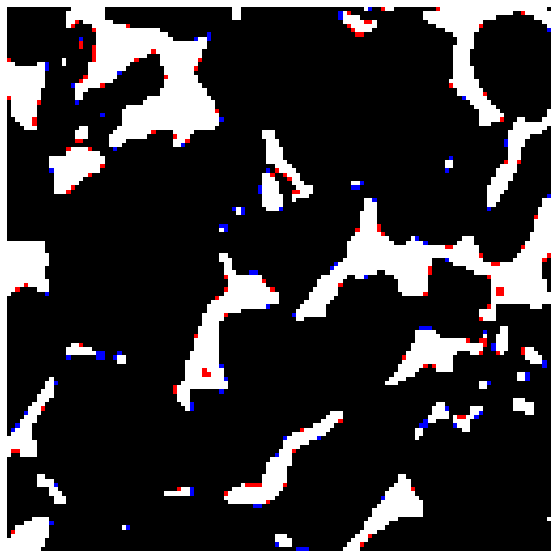

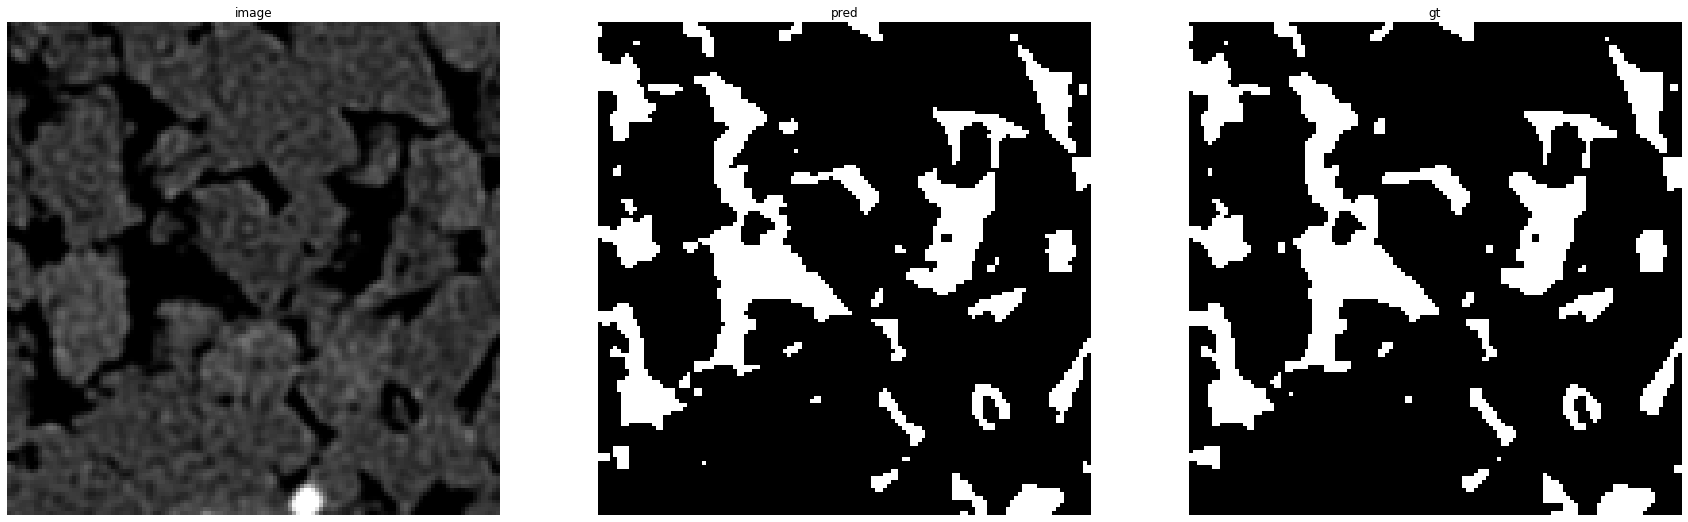

accuracy    : 0.98260498046875
precision   : 0.9669082886857864
recall      : 0.9445812807881774
f1          : 0.9556143902818877
pr_auc      : 0.994997836790626
iou         : 0.9150014912019088


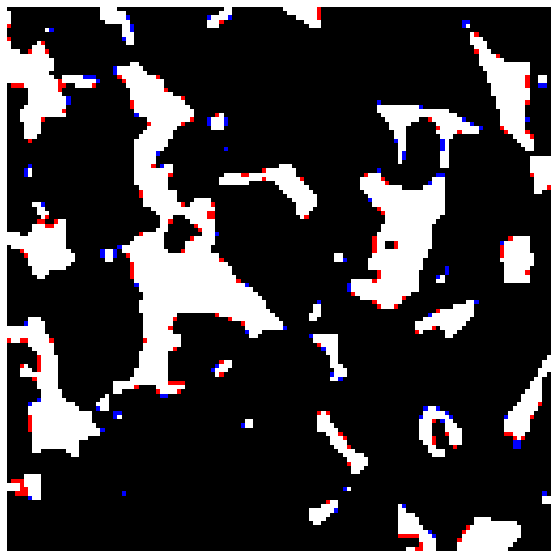

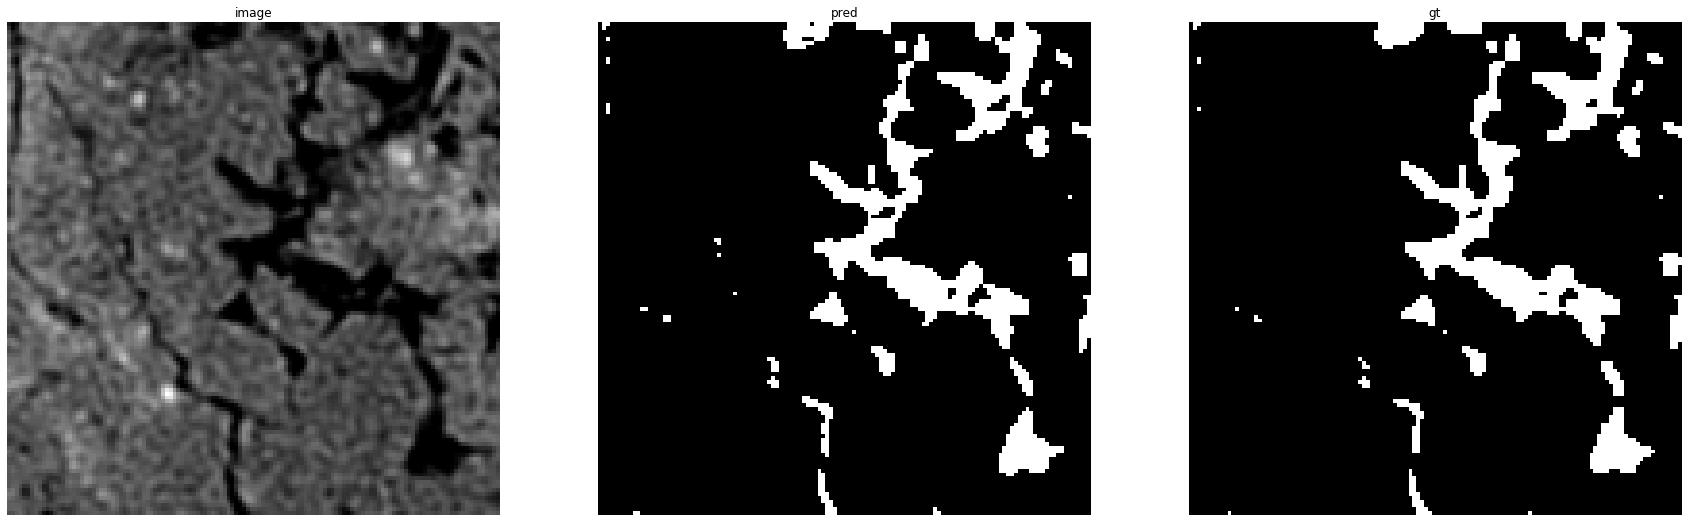

accuracy    : 0.98876953125
precision   : 0.9549295774647887
recall      : 0.9421901056142301
f1          : 0.9485170677112479
pr_auc      : 0.9920385710098466
iou         : 0.902075572112826


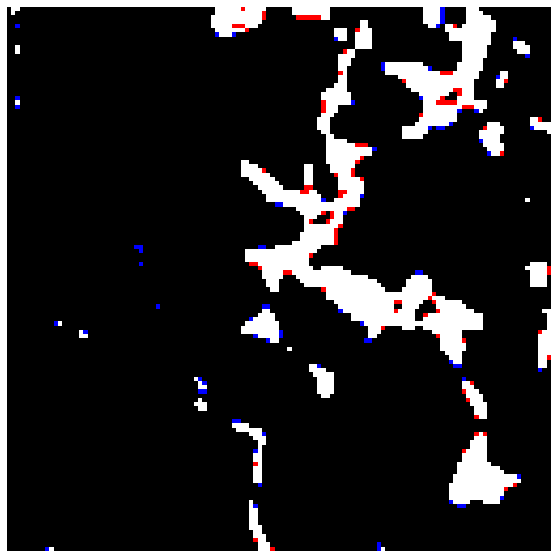

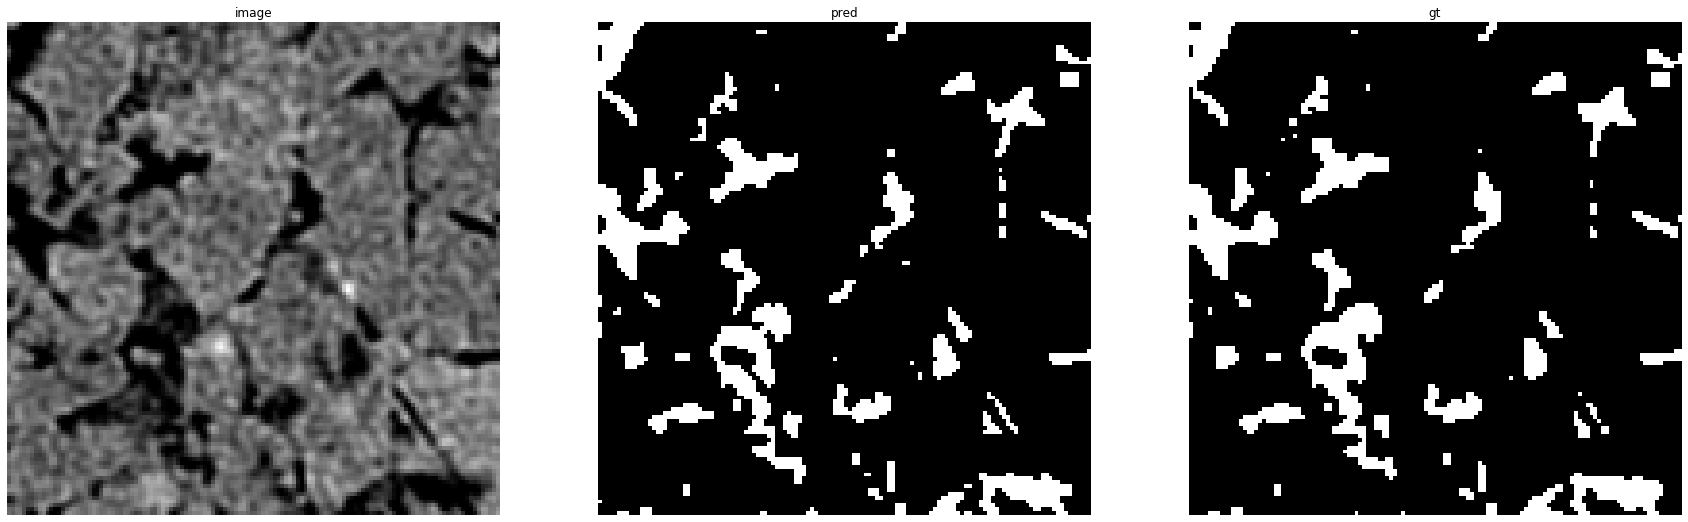

accuracy    : 0.9835205078125
precision   : 0.9401667484060814
recall      : 0.9283292978208233
f1          : 0.9342105263157895
pr_auc      : 0.9886360236102716
iou         : 0.8765432098765432


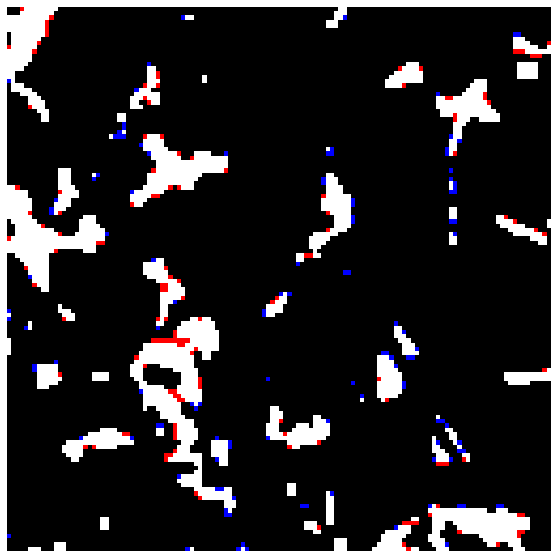

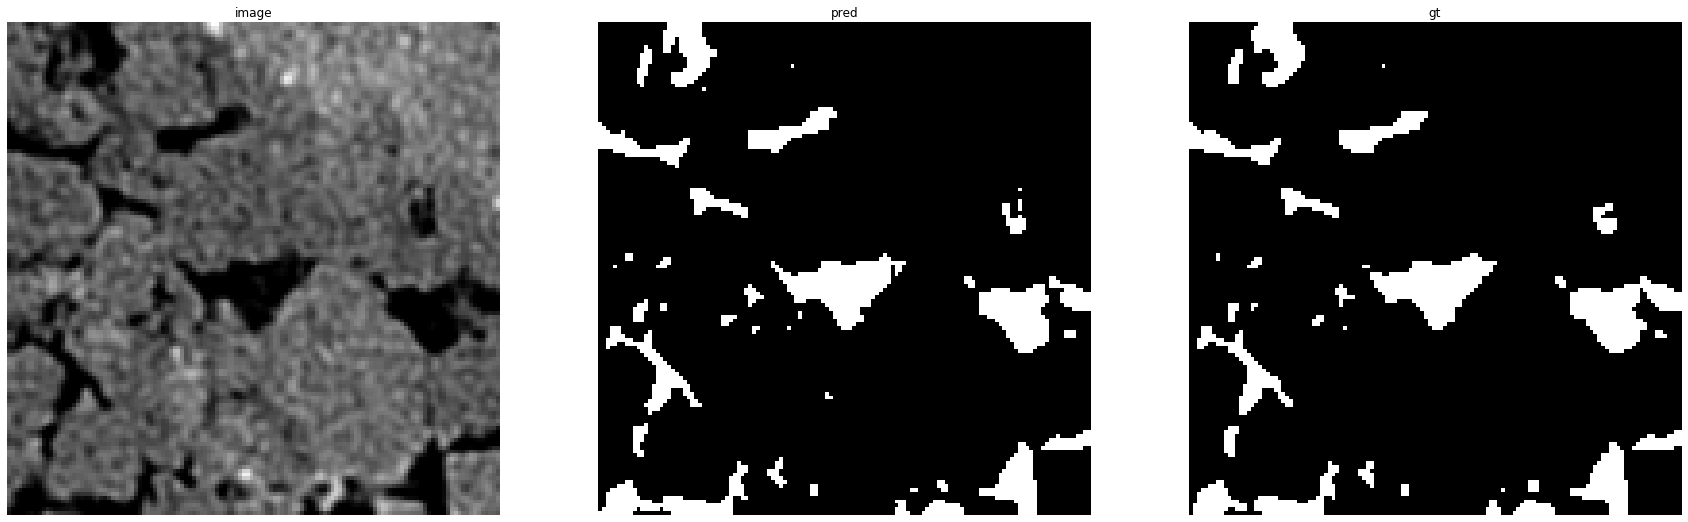

accuracy    : 0.99072265625
precision   : 0.9628554846198492
recall      : 0.9496279336004579
f1          : 0.9561959654178674
pr_auc      : 0.9943070021310035
iou         : 0.9160684704583103


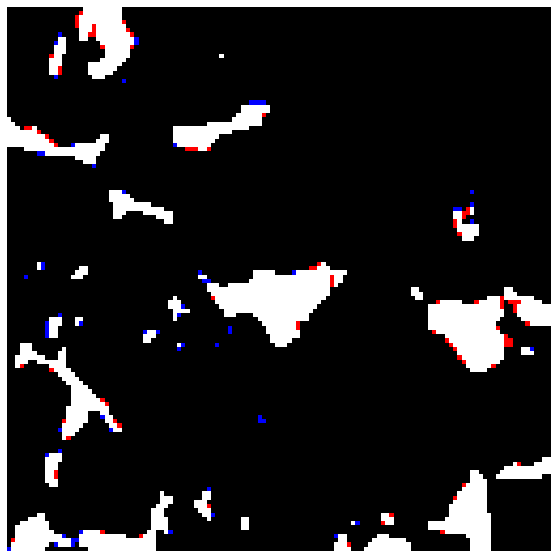

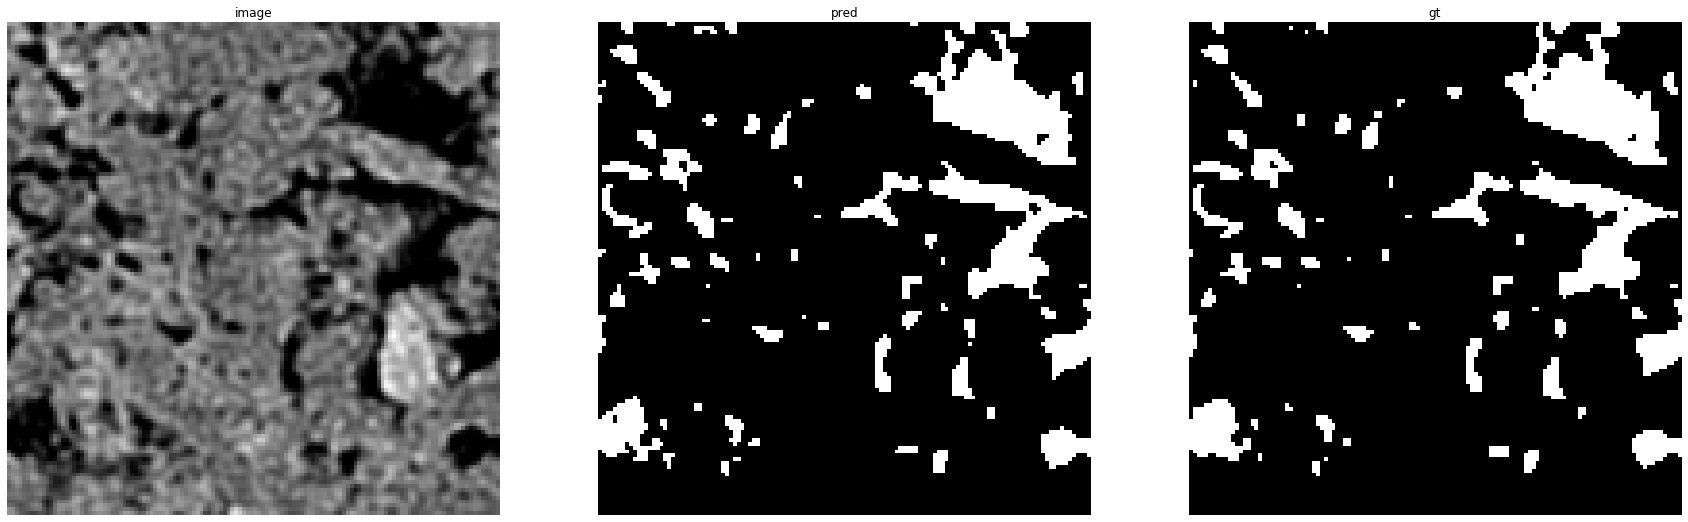

accuracy    : 0.98480224609375
precision   : 0.9463537300922046
recall      : 0.9491382934005885
f1          : 0.9477439664218259
pr_auc      : 0.9918204856348634
iou         : 0.9006781013163143


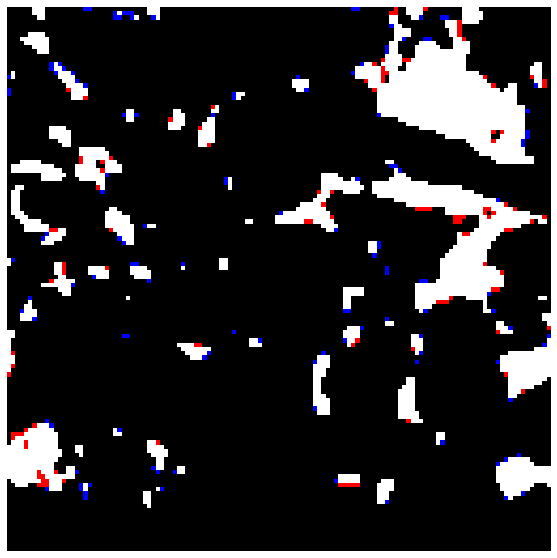

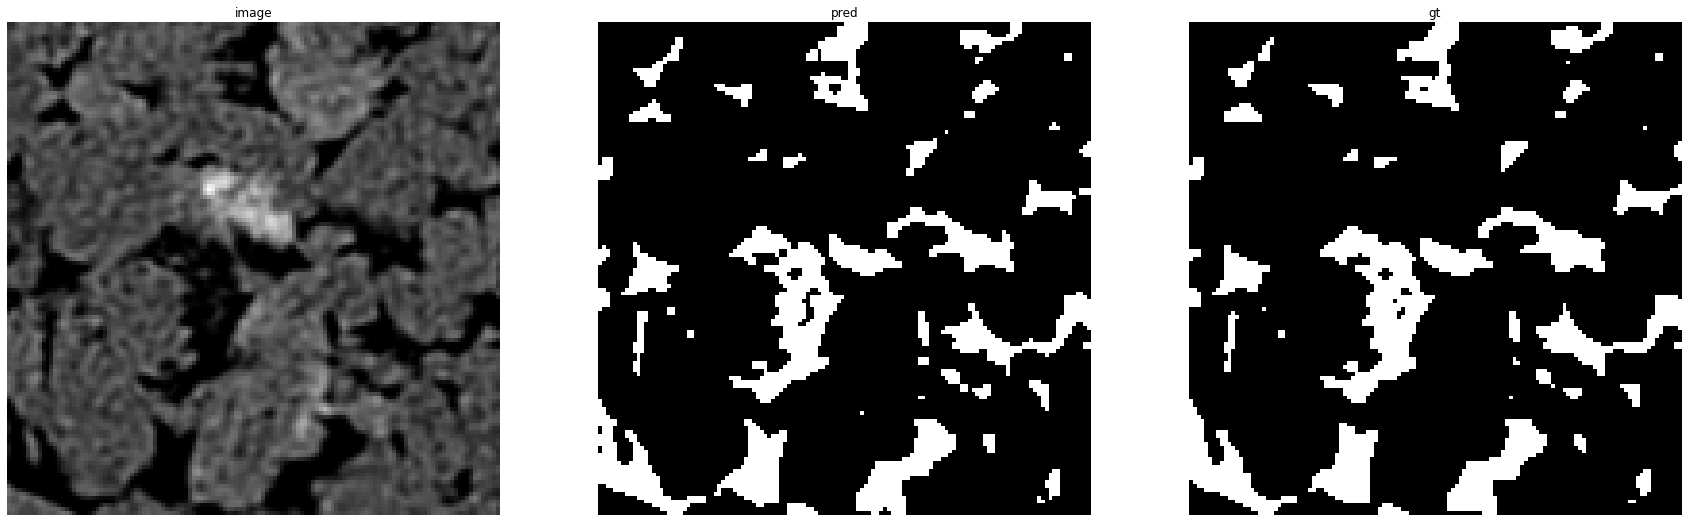

accuracy    : 0.98382568359375
precision   : 0.9554655870445344
recall      : 0.9474452554744526
f1          : 0.9514385193329669
pr_auc      : 0.9933223138440419
iou         : 0.9073750436910172


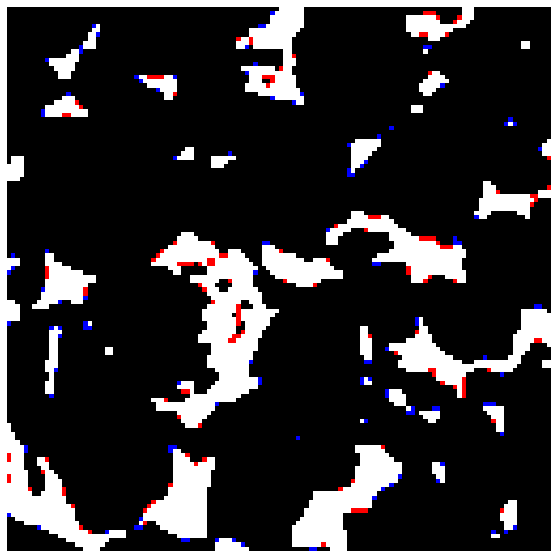

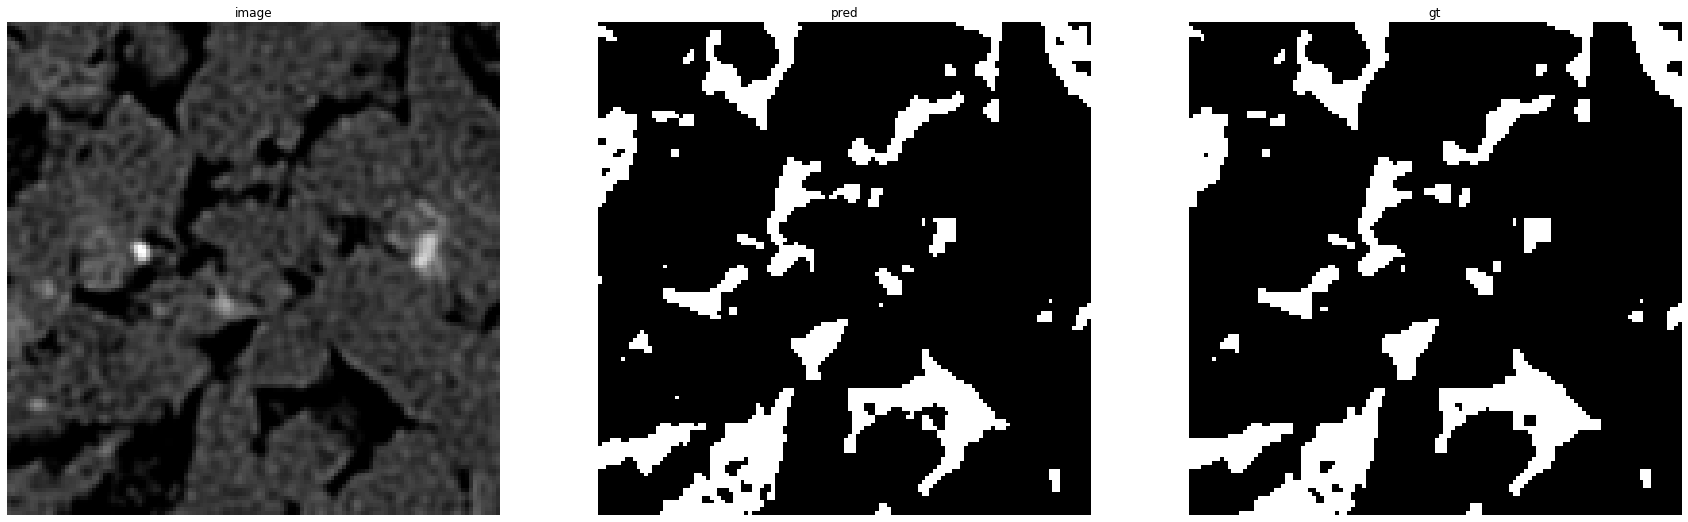

accuracy    : 0.98358154296875
precision   : 0.9672312223858616
recall      : 0.935874599216245
f1          : 0.9512945862755748
pr_auc      : 0.9935811599140368
iou         : 0.9071132596685083




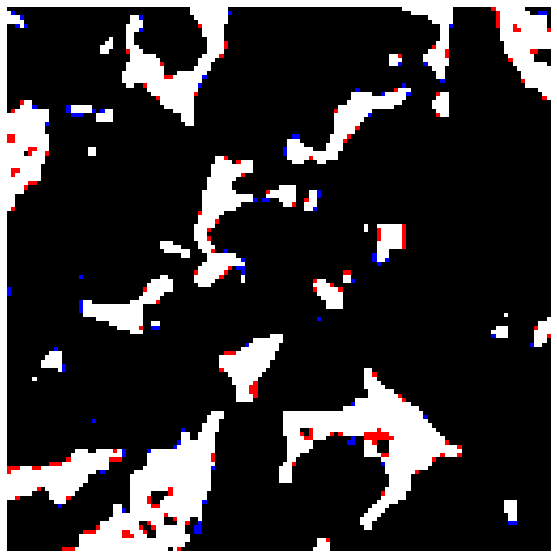

In [27]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [28]:
import pandas as pd

In [29]:
from visualization_utils import make_df

In [30]:
df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.995326   0.943616  0.995248  0.968745  0.998238  0.939384   
1   0.987798   0.921167  0.988256  0.953533  0.989548  0.911193   
2   0.984637   0.941535  0.904799  0.922802  0.984456  0.856668   
3   0.993656   0.996969  0.916938  0.955280  0.997547  0.914389   
4   0.993017   0.980091  0.883966  0.929550  0.990863  0.868373   
5   0.995885   0.947811  0.967091  0.957354  0.994586  0.918196   
6   0.991463   0.993223  0.947182  0.969656  0.998320  0.941099   
7   0.993706   0.991909  0.951898  0.971492  0.998335  0.944564   
8   0.992610   0.966578  0.974944  0.970743  0.997314  0.943149   
9   0.991203   0.971302  0.972238  0.971769  0.997695  0.945089   
10  0.984057   0.958551  0.944617  0.951533  0.993501  0.907546   

                 stack    model  
0            carb96558  Urna_22  
1               carb71  Urna_22  
2              carbRNF  Urna_22  
3   SPE_carb10_58_box3  Urna_22  
4             SoilAh-1  Urna_22  
5              SoilB-2  Urna_22  
6       TeTree_subset1  Urna_22  
7       TiTree_subset2  Urna_22  
8              Urna_22  Urna_22  
9              Urna_30  Urna_22  
10             Urna_34  Urna_22

In [31]:
df.to_html('{}.html'.format(data_conf['conf_name'].replace('-', '_')))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 Urna_22_exp/Urna_22.html Urna_22_exp/Urna_22.png


## Make prediction for particular stack

In [33]:
stack_name = 'Urna_30'

In [34]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

710it [00:00, 784.07it/s]
100%|██████████| 710/710 [00:07<00:00, 99.70it/s] 


In [35]:
model.eval();

In [46]:
predicted_stack_1 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 259673.37it/s]
25560it [02:02, 209.00it/s]
100%|██████████| 25560/25560 [00:08<00:00, 3162.10it/s]


In [47]:
predicted_stack_2 = stack.apply(
    model, 
    model_config,
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 117520.74it/s]
25560it [02:03, 206.49it/s]
100%|██████████| 25560/25560 [00:01<00:00, 16065.20it/s]


In [48]:
predicted_stack_3 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device=device,
    threshold=0.5)

25560it [00:00, 230192.52it/s]
25560it [02:04, 204.98it/s]
100%|██████████| 25560/25560 [00:01<00:00, 15076.94it/s]


In [49]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.9425491703400469

In [50]:
iou(np.where(predicted_stack_2.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8636871594693208

In [51]:
iou(np.where(predicted_stack_3.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8667919230639054

In [52]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.903532319207894

In [43]:
average_stack = Stack(predicted_stack_1.features, 
                      predicted_stack_1.targets, 
                      (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3)

In [44]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        model_config=model_config,
        patch_sizes=ps, 
        bs=32, num_workers=8, device=device,
        threshold=None)
    predicted_stack.dump('../segmented_stacks/{}_{}'.format(stack_name, d), 
                         features=False, 
                         targets=True, 
                         preds=True)

25560it [00:00, 235559.98it/s]
25560it [02:04, 205.96it/s]
100%|██████████| 710/710 [00:07<00:00, 95.22it/s]
25560it [00:00, 247902.46it/s]
25560it [02:04, 204.86it/s]
100%|██████████| 710/710 [00:07<00:00, 91.96it/s]
25560it [00:00, 236652.47it/s]
25560it [02:03, 206.55it/s]
100%|██████████| 710/710 [00:07<00:00, 92.48it/s]


In [45]:
average_stack.dump('../segmented_stacks/{}_average'.format(stack_name), 
                   features=False, 
                   targets=True, 
                   preds=True)

100%|██████████| 710/710 [00:07<00:00, 98.04it/s]
